In [ ]:
%pip install selenium

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv
from math import ceil

In [2]:
# Creates a new .csv file that the data will be written to
csv_file = open('airline_reviews.csv', 'w', encoding="utf-8")
writer = csv.writer(csv_file)

# Define the variables (future data frame columns) to be scraped
writer.writerow(['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended'])

path = r"C:/Users/hp/Downloads/chromedriver_win32/chromedriver.exe"
#path = "/Users/Athena Zhang/Downloads/chromedriver"
#driver = webdriver.Edge(path)
driver = webdriver.Chrome(path)
driver.get("https://www.airlinequality.com/")

In [3]:
# US_airlines is a list of all the webpage endings corresponding to the pages for the airlines I want to get reviews for
US_airlines = ["southwest-airlines/"]

# Get the actual URLs with a list comprehension using the above list
US_airline_pages = ["http://www.airlinequality.com/airline-reviews/" + airline for airline in US_airlines]
#driver.get("http://www.airlinequality.com/review-pages/a-z-airline-reviews/")

In [4]:
# This outer 'for loop' iterates through the different airline websites
# The sleep time has been set to 10secs since loading entirely new pages has proven to take longer
# than iterating through the pages of reviews within a single airline
for page in US_airline_pages:
    driver.get(page)
    time.sleep(10)
    try:
        print("="*40)   #Shows in terminal when a new airline is being scraped 
        print("Scraping " + page)

# Find total number of reviews for the airline
# Turn value into a float
# Each page defaults to showing 10 reviews, so take the ceiling of the total number of reviews divided by 10 
# to get the number of pages of reviews for the airline
        review_count = driver.find_element_by_xpath('//div[@class = "rating-totals"]//span[@itemprop = "reviewCount"]').text
        review_count = float(review_count)
        n = int(ceil(review_count/10))

        # Iterate through all the pages of reviews for the airline in question
        index = 1
        while index <= n:
            driver.get(page + "page/" + str(index) +'/')
            time.sleep(5)

            try:
                print("Scraping Page number " + str(index)) 	# Shows in terminal when a new page of reviews is being scraped
                index = index + 1

               #Find all the reviews:
                reviews = driver.find_elements_by_xpath('//article[@itemprop = "review"]')
                for review in reviews:

                    # Initialize an empty dictionary for each review
                    review_dict = {}

# Find xpaths of the fields desired as columns in future data frame
# We use the try/except statements to account for the fact that the reviews are not required to have 
# all the fields listed below, and if a review does not have a certain field we wish to make the 
# corresponding field blank in that particular row, rather than quit upon receiving an error. 
                    try:
                        airline = review.find_element_by_xpath('//div[@class = "review-heading"]//h1[@itemprop = "name"]').text
                    except:
                        airline = page
                    try:
                        overall = review.find_element_by_xpath('.//span[@itemprop = "ratingValue"]').text
                    except: 
                        overall = ""
                    try:
                        author = review.find_element_by_xpath('.//h3[@class = "text_sub_header userStatusWrapper"]//span[@itemprop = "name"]').text
                    except:
                        author = ""
                    try:
                        review_date = review.find_element_by_xpath('.//time[@itemprop = "datePublished"]').text
                    except:
                        review_date = ""
                    try:
                        customer_review = review.find_element_by_xpath('.//div[@itemprop = "reviewBody"]').text
                    except: 
                        customer_review = ""
                    try:
                        aircraft_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header aircraft "]')
                        aircraft = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header aircraft "]/following-sibling::td').text
                    except:
                        aircraft = ""
                    try:
                        traveller_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header type_of_traveller "]')
                        traveller_type = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header type_of_traveller "]/following-sibling::td').text
                    except:
                        traveller_type = ""
                    try:
                        cabin_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header cabin_flown "]')
                        cabin = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header cabin_flown "]/following-sibling::td').text
                    except:
                        cabin = ""
                    try:
                        route_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header route "]')
                        route = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header route "]/following-sibling::td').text
                    except:
                        route = ""
                    try:
                        date_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header date_flown "]')
                        date_flown = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header date_flown "]/following-sibling::td').text
                    except:
                        date_flown = ""
                    try:
                        seat_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header seat_comfort"]')
                        seat_comfort = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header seat_comfort"]/following-sibling::td/span[@class = "star fill"][last()]').text
                    except:
                        seat_comfort = ""
                    try:
                        cabin_service_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header cabin_staff_service"]')
                        cabin_service = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header cabin_staff_service"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        cabin_service = ""
                    try:
                        food_bev_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header food_and_beverages"]')
                        food_bev = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header food_and_beverages"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        food_bev = ""
                    try:
                        entertainment_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header inflight_entertainment"]')
                        entertainment = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header inflight_entertainment"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        entertainment = ""
                    try:
                        ground_service_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header ground_service"]')
                        ground_service = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header ground_service"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        ground_service = ""
                    try:
                        wifi_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header wifi_and_connectivity"]')
                        wifi = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header wifi_and_connectivity"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        wifi = ""
                    try:
                        value_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header value_for_money"]')
                        value_for_money = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header value_for_money"]/following-sibling::td//span[@class = "star fill"][last()]').text
                    except:
                        value_for_money = ""
                    try:
                        recommended_label = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header recommended"]')
                        recommended = review.find_element_by_xpath('.//table[@class = "review-ratings"]//td[@class = "review-rating-header recommended"]/following-sibling::td').text
                    except:
                        recommended = ""

# Write the results of the above to a dictionary. Note that each overall review will have its
# own dictionary, but all dictionaries for all the rows will all have the same keys. This
# allows Selenium to write the contents of these dictionaries into a coherent .csv file
                    review_dict['airline'] = airline
                    review_dict['overall'] = overall
                    review_dict['author'] = author
                    review_dict['review_date'] = review_date
                    review_dict['customer_review'] = customer_review
                    review_dict['aircraft'] = aircraft
                    review_dict['traveller_type'] = traveller_type
                    review_dict['cabin'] = cabin
                    review_dict['route'] = route
                    review_dict['date_flown'] = date_flown
                    review_dict['seat_comfort'] = seat_comfort
                    review_dict['cabin_service'] = cabin_service
                    review_dict['food_bev'] = food_bev
                    review_dict['entertainment'] = entertainment
                    review_dict['ground_service'] = ground_service
                    review_dict['value_for_money'] = value_for_money
                    review_dict['recommended'] = recommended
                    writer.writerow(review_dict.values())

# If an error is thrown unrelated to the above variables, print the error to the terminal
# console, close the .csv file, and break the while loop.
            except Exception as e:
                print(e)
                csv_file.close()
                #driver.close()
                break
                
    # If an error is thrown between airline pages, print the error to the terminal
    # console, close the .csv file, and break the while loop.
    except Exception as e:
                print(e)
                sv_file.close()
                #driver.close()
                break

# Always close your files! 
csv_file.close()

# Optional: close the browser once scraping has completed.
#driver.close()

Scraping http://www.airlinequality.com/airline-reviews/southwest-airlines/
Scraping Page number 1
Scraping Page number 2
Scraping Page number 3
Scraping Page number 4
Scraping Page number 5
Scraping Page number 6
Scraping Page number 7
Scraping Page number 8
Scraping Page number 9
Scraping Page number 10
Scraping Page number 11
Scraping Page number 12
Scraping Page number 13
Scraping Page number 14
Scraping Page number 15
Scraping Page number 16
Scraping Page number 17
Scraping Page number 18
Scraping Page number 19
Scraping Page number 20
Scraping Page number 21
Scraping Page number 22
Scraping Page number 23
Scraping Page number 24
Scraping Page number 25
Scraping Page number 26
Scraping Page number 27
Scraping Page number 28
Scraping Page number 29
Scraping Page number 30
Scraping Page number 31
Scraping Page number 32
Scraping Page number 33
Scraping Page number 34
Scraping Page number 35
Scraping Page number 36
Scraping Page number 37
Scraping Page number 38
Scraping Page number 3

In [5]:
csv_file.close()
driver.close()
driver.quit()

In [ ]:
driver.quit()

# Skytrax data exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\All Airlines.csv")

In [3]:
df.shape

(11573, 18)

In [4]:
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,0,United Airlines,1.0,Zachary Christensen,21st May 2022,✅ Trip Verified | Worst experience I have ever...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",22-May,1.0,1.0,NaN,NaN,1.0,1.0,no
1,1,United Airlines,2.0,Barbara Contente,21st May 2022,✅ Trip Verified | Very displeased with the fac...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,22-May,1.0,3.0,2.0,3.0,3.0,2.0,no
2,2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified | Absolutely terrible experience....,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
3,3,United Airlines,1.0,N Geale,21st May 2022,✅ Trip Verified | We were scheduled to leave P...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,22-May,3.0,3.0,NaN,NaN,1.0,1.0,no
4,4,United Airlines,8.0,R Gonzaga,19th May 2022,✅ Trip Verified | First leg of trip to KUL. Dr...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,22-May,2.0,4.0,3.0,NaN,2.0,4.0,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       11573 non-null  int64  
 1   airline          11572 non-null  object 
 2   overall          11493 non-null  float64
 3   author           11572 non-null  object 
 4   review_date      11572 non-null  object 
 5   customer_review  11572 non-null  object 
 6   aircraft         2378 non-null   object 
 7   traveller_type   9880 non-null   object 
 8   cabin            11568 non-null  object 
 9   route            9816 non-null   object 
 10  date_flown       9251 non-null   object 
 11  seat_comfort     10996 non-null  float64
 12  cabin_service    10995 non-null  float64
 13  food_bev         8477 non-null   float64
 14  entertainment    7265 non-null   float64
 15  ground_service   9556 non-null   float64
 16  value_for_money  11558 non-null  float64
 17  recommended 

In [6]:
df.describe()

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,11573.000000,11493.000000,10996.000000,10995.000000,8477.000000,7265.000000,9556.000000,11558.000000
mean,3180.069818,3.022796,2.259913,2.482037,2.171051,2.141225,1.949456,2.011594
std,2090.621809,3.069732,1.361164,1.522890,1.364710,1.439640,1.425586,1.425258
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1446.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2893.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,4716.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,7609.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [8]:
df.airline.unique()

array(['United Airlines', nan, 'Southwest Airlines', 'Delta Air Lines',
       'Alaska Airlines', 'American Airlines'], dtype=object)

In [3]:
df_United_Airlines = df[df["airline"] == 'United Airlines']
df_Southwest_Airlines = df[df["airline"] == 'Southwest Airlines']
df_Delta_Airlines = df[df["airline"] == 'Delta Air Lines']
df_Alaska_Airlines = df[df["airline"] == 'Alaska Airlines']
df_American_Airlines = df[df["airline"] == 'American Airlines']

# United Airlines -EDA

In [10]:
df_United_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,0,United Airlines,1.0,Zachary Christensen,21st May 2022,✅ Trip Verified | Worst experience I have ever...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",22-May,1.0,1.0,NaN,NaN,1.0,1.0,no
1,1,United Airlines,2.0,Barbara Contente,21st May 2022,✅ Trip Verified | Very displeased with the fac...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,22-May,1.0,3.0,2.0,3.0,3.0,2.0,no
2,2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified | Absolutely terrible experience....,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
3,3,United Airlines,1.0,N Geale,21st May 2022,✅ Trip Verified | We were scheduled to leave P...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,22-May,3.0,3.0,NaN,NaN,1.0,1.0,no
4,4,United Airlines,8.0,R Gonzaga,19th May 2022,✅ Trip Verified | First leg of trip to KUL. Dr...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,22-May,2.0,4.0,3.0,NaN,2.0,4.0,yes


In [11]:
# We have around 4730 reviews for United Airlines
df_United_Airlines.shape

(4730, 18)

In [12]:
df_United_Airlines.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [13]:
df_United_Airlines.recommended.nunique()

2

In [14]:
df_United_Airlines.recommended.value_counts()

no     3880
yes     850
Name: recommended, dtype: int64

In [15]:
import seaborn as sns

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='recommended'>

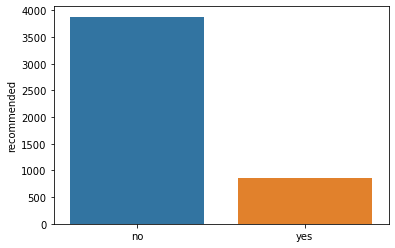

In [16]:
sns.barplot(df_United_Airlines.recommended.value_counts().index,df_United_Airlines.recommended.value_counts())

In [17]:
# Overall scores given for the airline
df_United_Airlines.overall.value_counts()

1.0     2755
2.0      587
3.0      302
10.0     276
8.0      189
9.0      157
7.0      142
4.0      137
5.0      111
6.0       73
Name: overall, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='overall'>

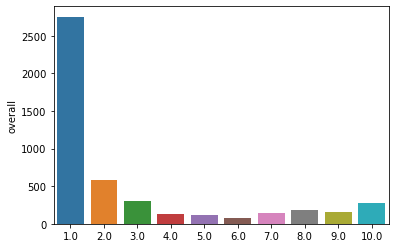

In [18]:
sns.barplot(df_United_Airlines.overall.value_counts().index,df_United_Airlines.overall.value_counts())

### United Airlines unfortunately has a lot of negative scores.

In [19]:
df_United_Airlines.aircraft.nunique()

205

### United Airlines has more than 200 unique aircrafts

In [20]:
df_United_Airlines.aircraft.unique()

array([nan, 'Boeing 737-900Max', 'Boeing 757-200', 'Boeing 737-800',
       'Boeing 767-400', 'Boeing 737', 'Boeing 787-9', 'Boeing 738',
       'Boeing 787', 'Boeing 747', 'Boeing 767-300er', 'A320',
       'Allentown to Washington', 'Canadair crj-200', 'Boeing 777-200',
       'CRJ-550', 'Boeing 777-300ER', 'Boeing 737 MAX 9',
       'Boeing 737-800, Boeing 767', 'Boeing 767-300ER', 'Boeing 737-900',
       'Boeing 777-300', 'Boeing 737-700W', 'B787-10', 'BOEING 737 MAX 8',
       'Embraer 170', 'Boeing 737 Max / Boeing 737-900', 'Boeing 787-10',
       'Boeing 737-700', 'Boeing 767-300', 'Boeing 777', 'CRJ-200',
       'Boeing 757', 'Canadair', 'Embraer', 'CRJ550', 'Boeing 767',
       'A319', 'E70', 'Embraer E170', 'Boeing 737 800', 'CRJ',
       'Embraer 175', 'Boeing 767-233ER', 'Various', 'E175',
       'Boeing 737-800W', 'B787', 'CRJ200', 'EMB145-XR', 'BA9402', 'E145',
       'Boeing 737 / 757', 'Boeing 777-300 ER', 'Embraer ERJ-135',
       'Boeing 737-800NG', 'E170', 'Boeing 

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aircraft'>

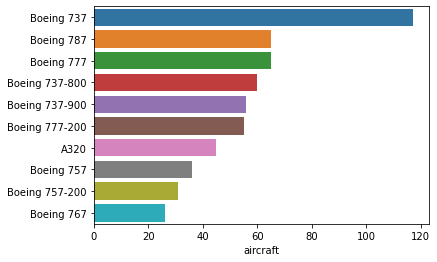

In [21]:
sns.barplot(df_United_Airlines.aircraft.value_counts()[:10],df_United_Airlines.aircraft.value_counts()[:10].index,orient = "h")

### United Airlines has a lot of Boeing 737s, 787s and 777s.

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='traveller_type'>

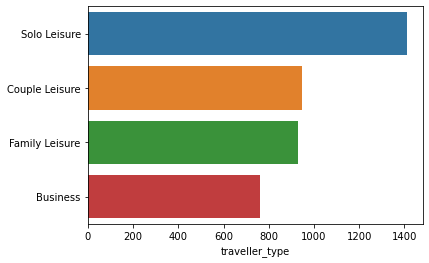

In [22]:
sns.barplot(df_United_Airlines.traveller_type.value_counts(),df_United_Airlines.traveller_type.value_counts().index)

### Most of the flights of United Airlines are for leisure purposes.  

In [23]:
df_United_Airlines.cabin.value_counts()

Economy Class      3731
Premium Economy     370
Business Class      362
First Class         265
Name: cabin, dtype: int64

### The economy class forms a major section of the flights

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabin'>

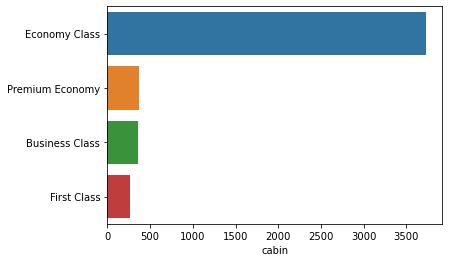

In [24]:
sns.barplot(df_United_Airlines.cabin.value_counts(),df_United_Airlines.cabin.value_counts().index)


In [25]:
df_United_Airlines.route.nunique()

2480

### United Airlines has nearly 2500 unique routes

In [26]:
df_United_Airlines.route.value_counts()[:10]

Honolulu to San Francisco     14
Newark to Orlando             14
Chicago to Los Angeles        12
Los Angeles to Newark         11
San Francisco to Singapore    11
Newark to London              10
San Francisco to Newark        9
Newark to Los Angeles          9
Chicago to Tampa               9
Denver to Los Angeles          9
Name: route, dtype: int64

### Honolulu to San Francisco and Newark to Orlando seem to be the 2 most commoly found routes in the dataset.

In [27]:
df_United_Airlines[["seat_comfort",'cabin_service', 'food_bev', 'entertainment','ground_service', 'value_for_money']].describe()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,4496.000000,4492.000000,3524.000000,3264.000000,3906.000000,4727.000000
mean,2.141237,2.386687,2.019012,2.099877,1.912186,1.887667
std,1.315376,1.472022,1.298236,1.417184,1.380575,1.338842
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='seat_comfort'>

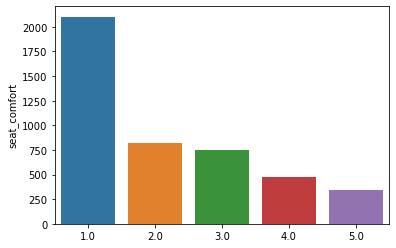

In [28]:
sns.barplot(df_United_Airlines.seat_comfort.value_counts().index,df_United_Airlines.seat_comfort.value_counts())

### The seat comfort does not seem to be very good

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='cabin_service'>

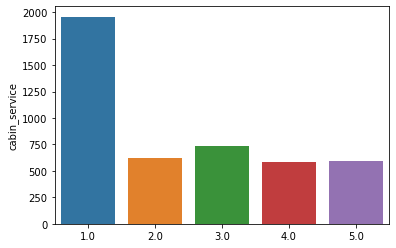

In [29]:
sns.barplot(df_United_Airlines.cabin_service.value_counts().index,df_United_Airlines.cabin_service.value_counts())

### The cabin service seems to be quite bad

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='food_bev'>

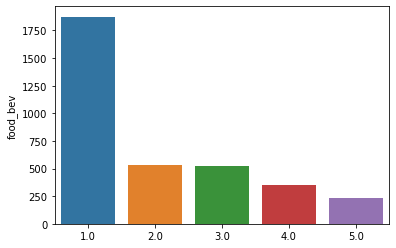

In [30]:
sns.barplot(df_United_Airlines.food_bev.value_counts().index,df_United_Airlines.food_bev.value_counts())

### The food seems to be bad too

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='entertainment'>

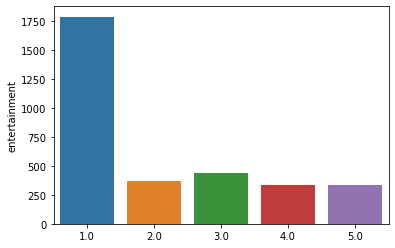

In [31]:
sns.barplot(df_United_Airlines.entertainment.value_counts().index,df_United_Airlines.entertainment.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='ground_service'>

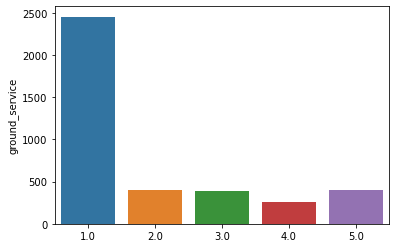

In [32]:
sns.barplot(df_United_Airlines.ground_service.value_counts().index,df_United_Airlines.ground_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='value_for_money'>

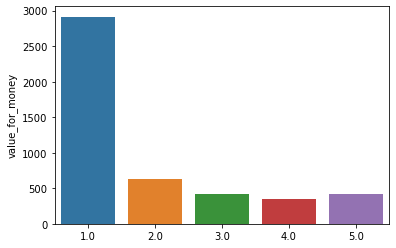

In [33]:
sns.barplot(df_United_Airlines.value_for_money.value_counts().index,df_United_Airlines.value_for_money.value_counts())

# NLP part

In [34]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

2022-06-01 20:42:45,850 loading file C:\Users\hp\.flair\models\sentiment-en-mix-distillbert_4.pt


In [35]:
def sentiment_value(x):
    sentence = Sentence(x)
    classifier.predict(sentence)
    
    
    return sentence.labels[0].to_dict()["value"]
    
    

In [36]:
def sentiment_confidence(x):
    sentence = Sentence(x)
    classifier.predict(sentence)
    
    
    return sentence.labels[0].to_dict()["confidence"]

In [37]:
df_United_Airlines["flair_sentiment_score"] = df_United_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))

<ipython-input-37-505a90b20783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_United_Airlines["flair_sentiment_score"] = df_United_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))


In [38]:
df_United_Airlines["flair_sentiment_sentiment"] = df_United_Airlines.customer_review.apply(lambda x: sentiment_value(x))

<ipython-input-38-b460e463da94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_United_Airlines["flair_sentiment_sentiment"] = df_United_Airlines.customer_review.apply(lambda x: sentiment_value(x))


In [39]:
df_United_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,flair_sentiment_score,flair_sentiment_sentiment
0,0,United Airlines,1.0,Zachary Christensen,21st May 2022,✅ Trip Verified | Worst experience I have ever...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",22-May,1.0,1.0,NaN,NaN,1.0,1.0,no,0.999991,NEGATIVE
1,1,United Airlines,2.0,Barbara Contente,21st May 2022,✅ Trip Verified | Very displeased with the fac...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,22-May,1.0,3.0,2.0,3.0,3.0,2.0,no,0.999981,NEGATIVE
2,2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified | Absolutely terrible experience....,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",22-May,1.0,1.0,1.0,1.0,1.0,1.0,no,0.999997,NEGATIVE
3,3,United Airlines,1.0,N Geale,21st May 2022,✅ Trip Verified | We were scheduled to leave P...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,22-May,3.0,3.0,NaN,NaN,1.0,1.0,no,0.999913,NEGATIVE
4,4,United Airlines,8.0,R Gonzaga,19th May 2022,✅ Trip Verified | First leg of trip to KUL. Dr...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,22-May,2.0,4.0,3.0,NaN,2.0,4.0,yes,0.999965,NEGATIVE


In [40]:
df_United_Airlines.describe()

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,flair_sentiment_score
count,4730.000000,4729.000000,4496.000000,4492.000000,3524.000000,3264.000000,3906.000000,4727.000000,4730.000000
mean,2364.500000,2.760626,2.141237,2.386687,2.019012,2.099877,1.912186,1.887667,0.988783
std,1365.577717,2.862731,1.315376,1.472022,1.298236,1.417184,1.380575,1.338842,0.052722
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500499
25%,1182.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999651
50%,2364.500000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.999965
75%,3546.750000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,0.999990
max,4729.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.999999


In [41]:
df_United_Airlines["recommended_new"] = df_United_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)

<ipython-input-41-02926c26511a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_United_Airlines["recommended_new"] = df_United_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)


In [42]:
df_United_Airlines["flair_sentiment_sentiment_new"] = df_United_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)

<ipython-input-42-340cc9991733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_United_Airlines["flair_sentiment_sentiment_new"] = df_United_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(df_United_Airlines["flair_sentiment_sentiment_new"], df_United_Airlines["recommended_new"])

array([[3849,  290],
       [  31,  560]], dtype=int64)

In [45]:
df_United_Airlines["flair_sentiment_sentiment_new"].corr(df_United_Airlines["recommended_new"])

0.7557079605621133

## NLP - ngrams (United Airlines)

In [4]:
customer_review_corpus_United_Airlines = ""

for i,row in df_United_Airlines.iterrows():
    
    customer_review_corpus_United_Airlines += str(row["customer_review"])

In [11]:
import re

In [12]:
customer_review_corpus_United_Airlines = re.sub(r'[^A-Za-z0-9 ]+', '', customer_review_corpus_United_Airlines.lower())
#re.sub(r'[^A-Za-z0-9 ]+', '', s)
#customer_review_corpus_United_Airlines = re.sub('[,\.!?â€™]', '', customer_review_corpus_United_Airlines.lower())

In [12]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize

In [14]:
customer_review_corpus_word_tokens_United_Airlines = word_tokenize(customer_review_corpus_United_Airlines)

In [15]:
filtered_customer_review_corpus_word_tokens_United_Airlines = [w for w in customer_review_corpus_word_tokens_United_Airlines if not w.lower() in stop_words]

In [16]:
filtered_customer_review_corpus_word_tokens_string_United_Airlines = " ".join(filtered_customer_review_corpus_word_tokens_United_Airlines)

In [17]:
filtered_customer_review_corpus_word_tokens_string_United_Airlines = re.sub('[!()-;[]{}:\,<>./?@#$%^&*_~]', '', filtered_customer_review_corpus_word_tokens_string_United_Airlines)


In [18]:
filtered_customer_review_corpus_word_tokens_string_United_Airlines = re.sub('":()', '', filtered_customer_review_corpus_word_tokens_string_United_Airlines)

In [19]:
filtered_customer_review_corpus_word_tokens_string_United_Airlines = re.sub("'", '', filtered_customer_review_corpus_word_tokens_string_United_Airlines)

In [20]:
filtered_customer_review_corpus_word_tokens_string_United_Airlines = re.sub("[:()<>]", '', filtered_customer_review_corpus_word_tokens_string_United_Airlines)

In [11]:
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [22]:
filtered_customer_review_corpus_word_tokens_string_United_Airlines = " ".join(lemma.lemmatize(word) for word in filtered_customer_review_corpus_word_tokens_string_United_Airlines.split())

In [21]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [20]:
from wordcloud import STOPWORDS
from collections import defaultdict

In [25]:
unigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_United_Airlines):
    unigrams_dye[word] += 1
df_unigrams = pd.DataFrame(sorted(unigrams_dye.items(), key=lambda x: x[1])[::-1])
bigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_United_Airlines, n_gram=2):
    bigrams_dye[word] += 1
df_bigrams = pd.DataFrame(sorted(bigrams_dye.items(), key=lambda x: x[1])[::-1])
trigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_United_Airlines, n_gram=3):
    trigrams_dye[word] += 1
df_trigrams = pd.DataFrame(sorted(trigrams_dye.items(), key=lambda x: x[1])[::-1])
fourgrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_United_Airlines, n_gram=4):
    fourgrams_dye[word] += 1
df_fourgrams = pd.DataFrame(sorted(fourgrams_dye.items(), key=lambda x: x[1])[::-1])

In [26]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,30)})
sns.set(font_scale = 3)

In [27]:
N = 10

<AxesSubplot:>

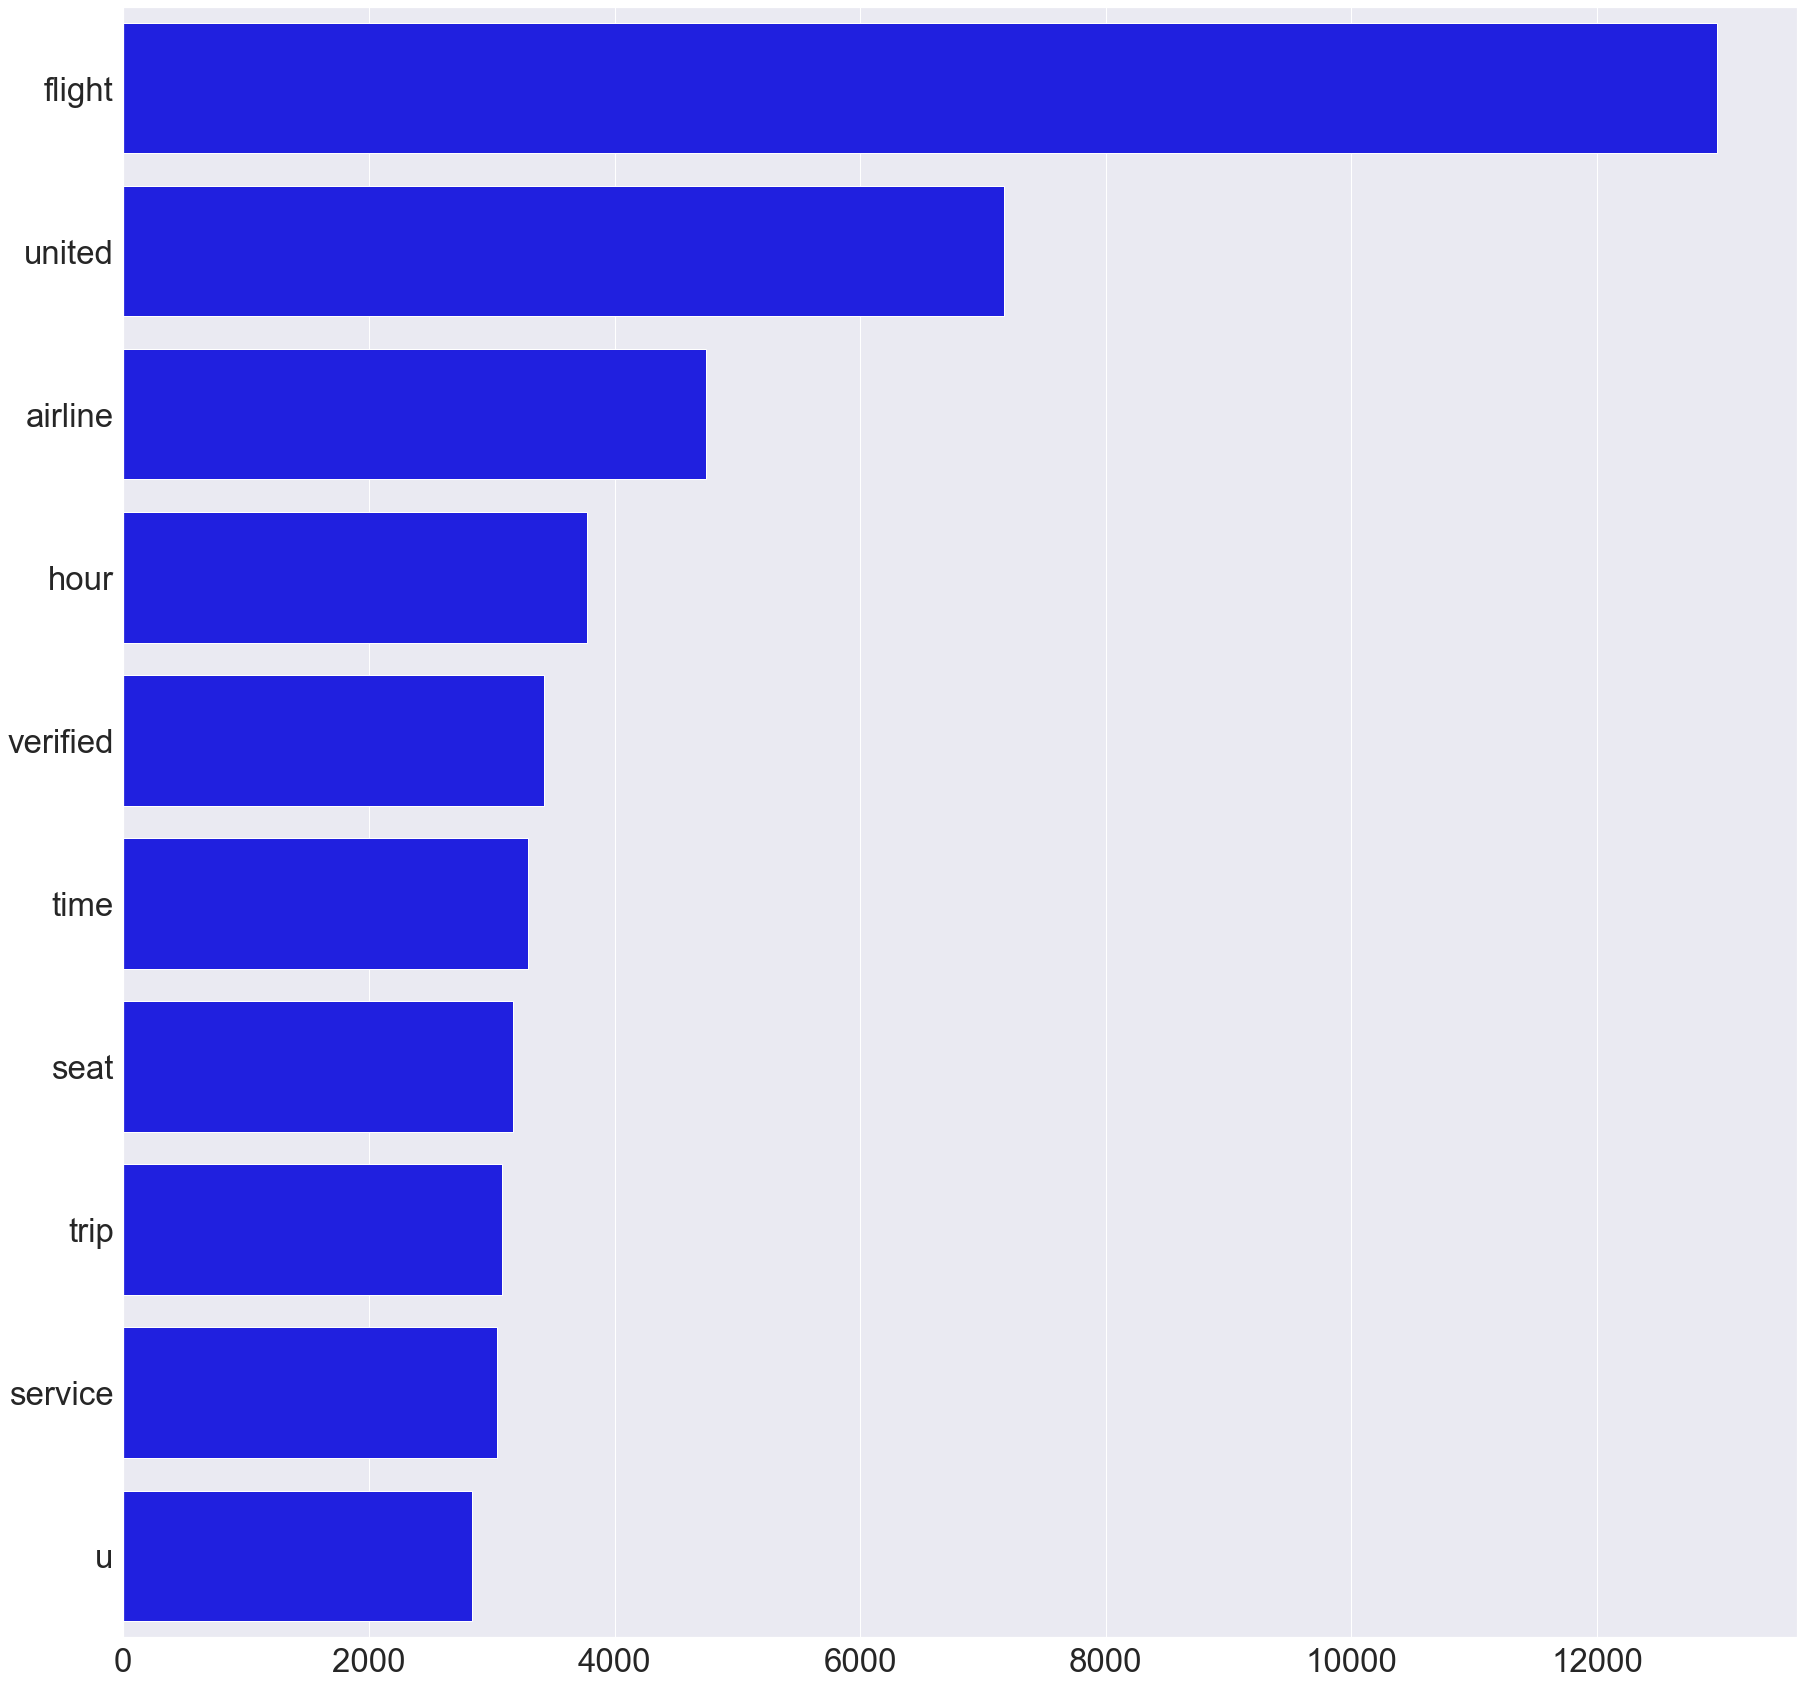

In [28]:
sns.barplot(y=df_unigrams[0].values[:N], x=df_unigrams[1].values[:N], color='blue')

<AxesSubplot:>

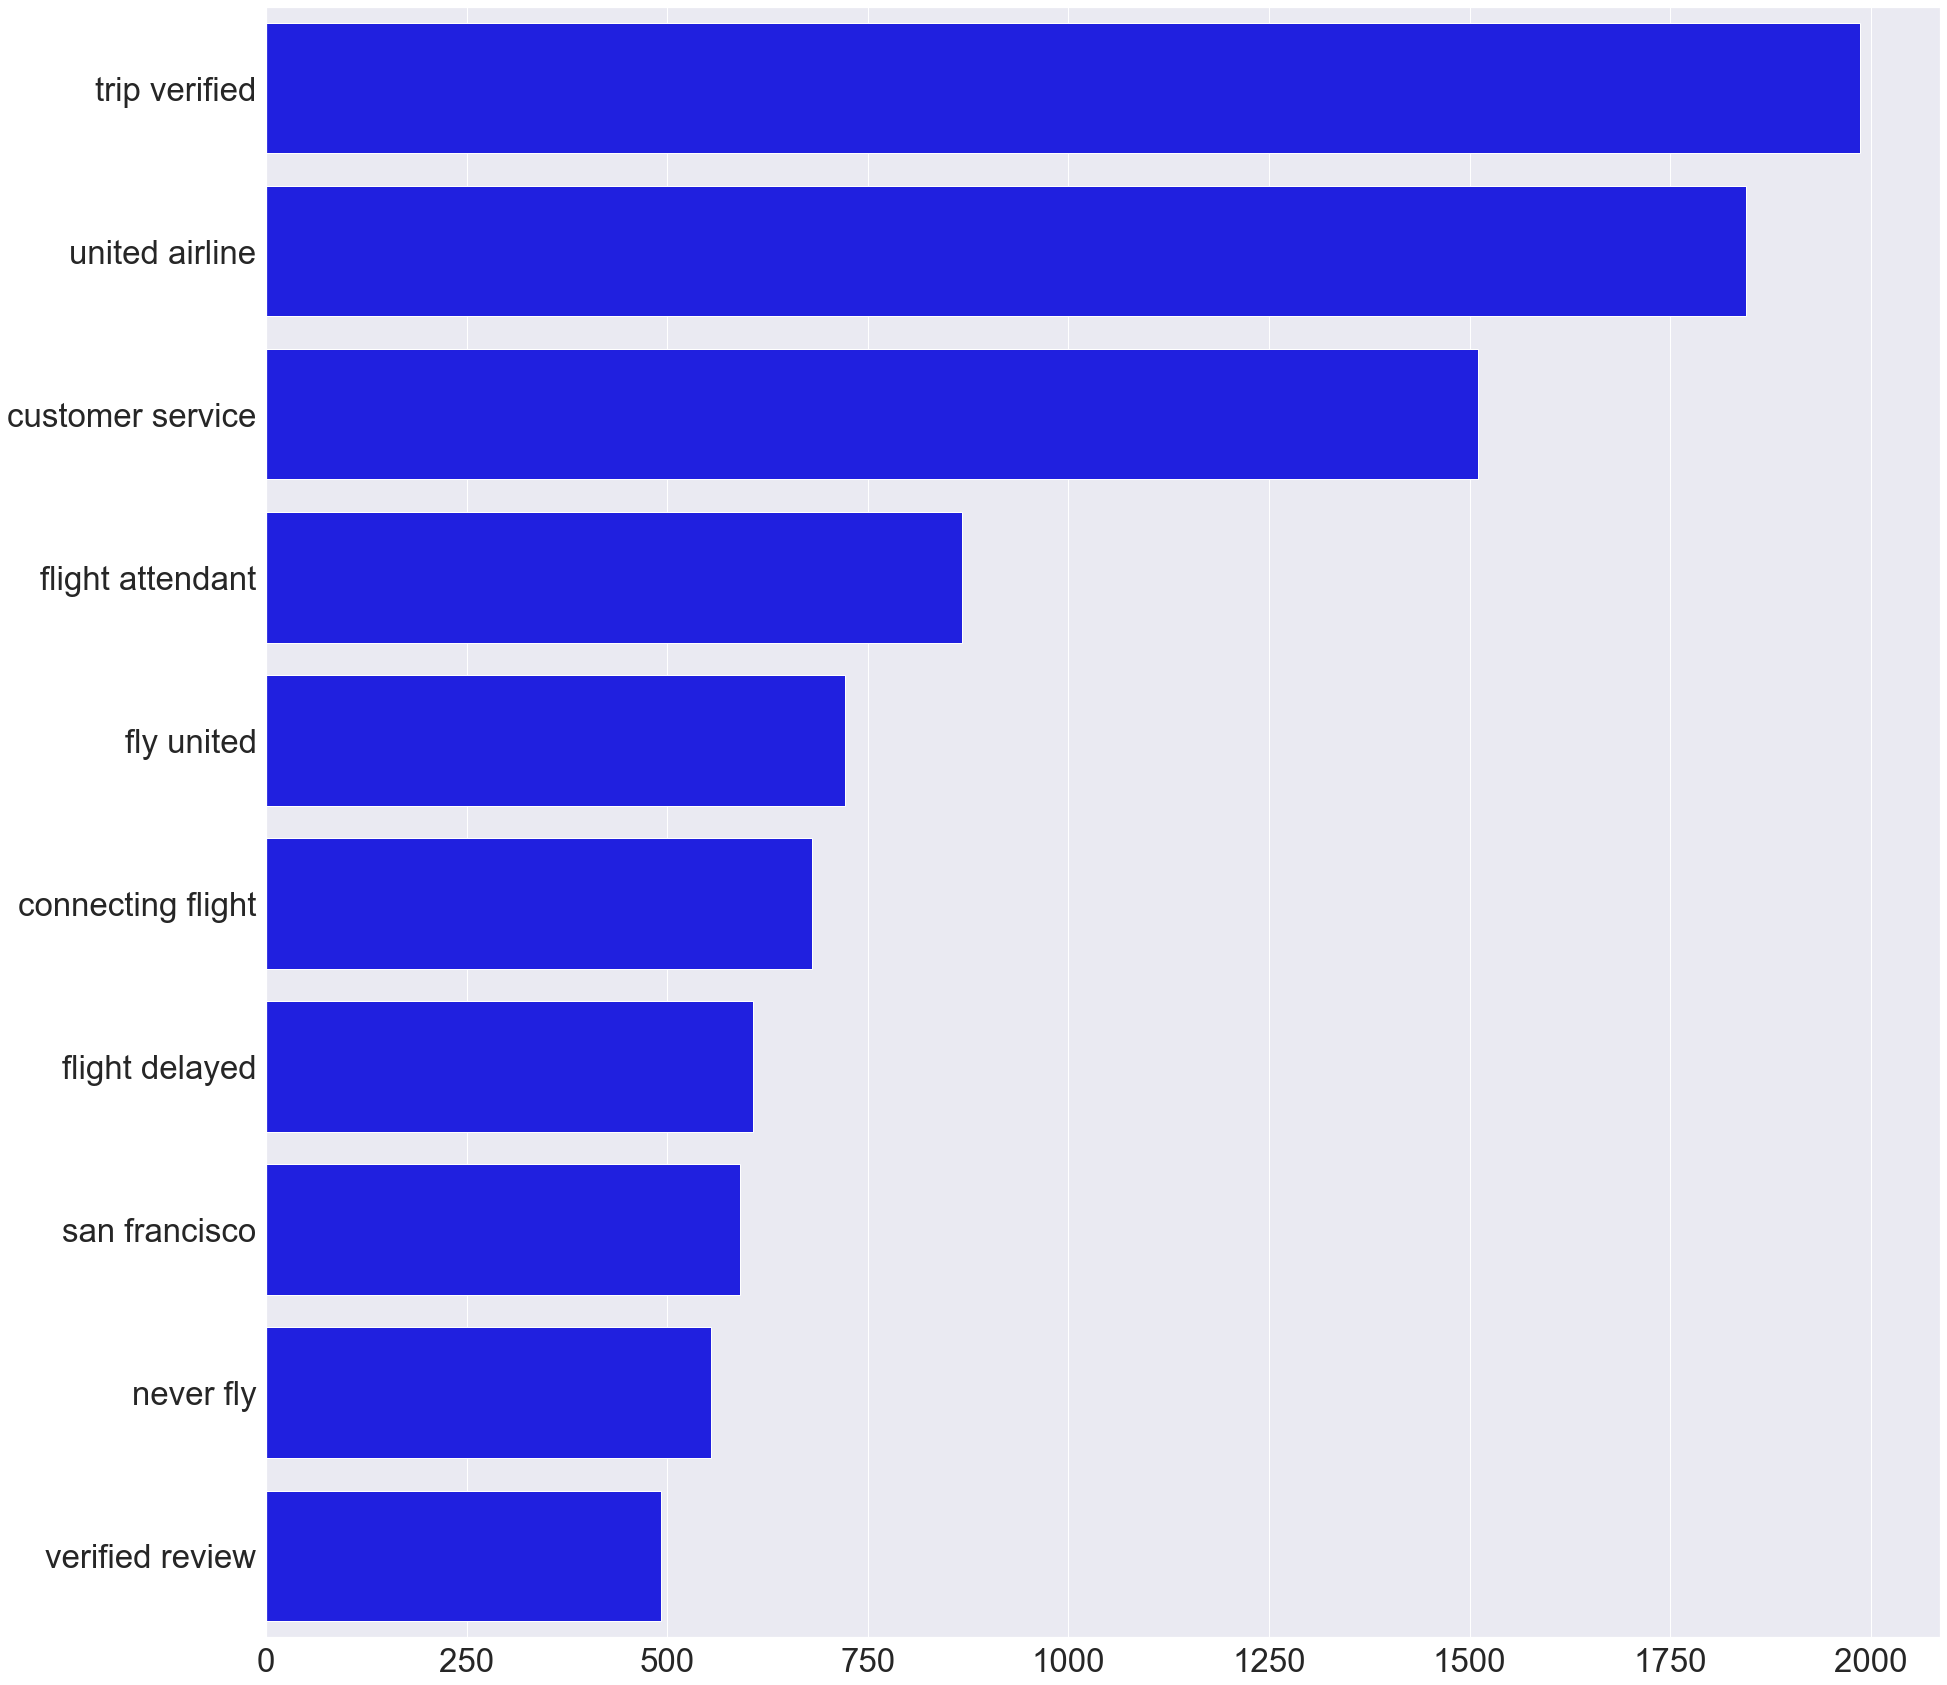

In [29]:
sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N], color='blue')

<AxesSubplot:>

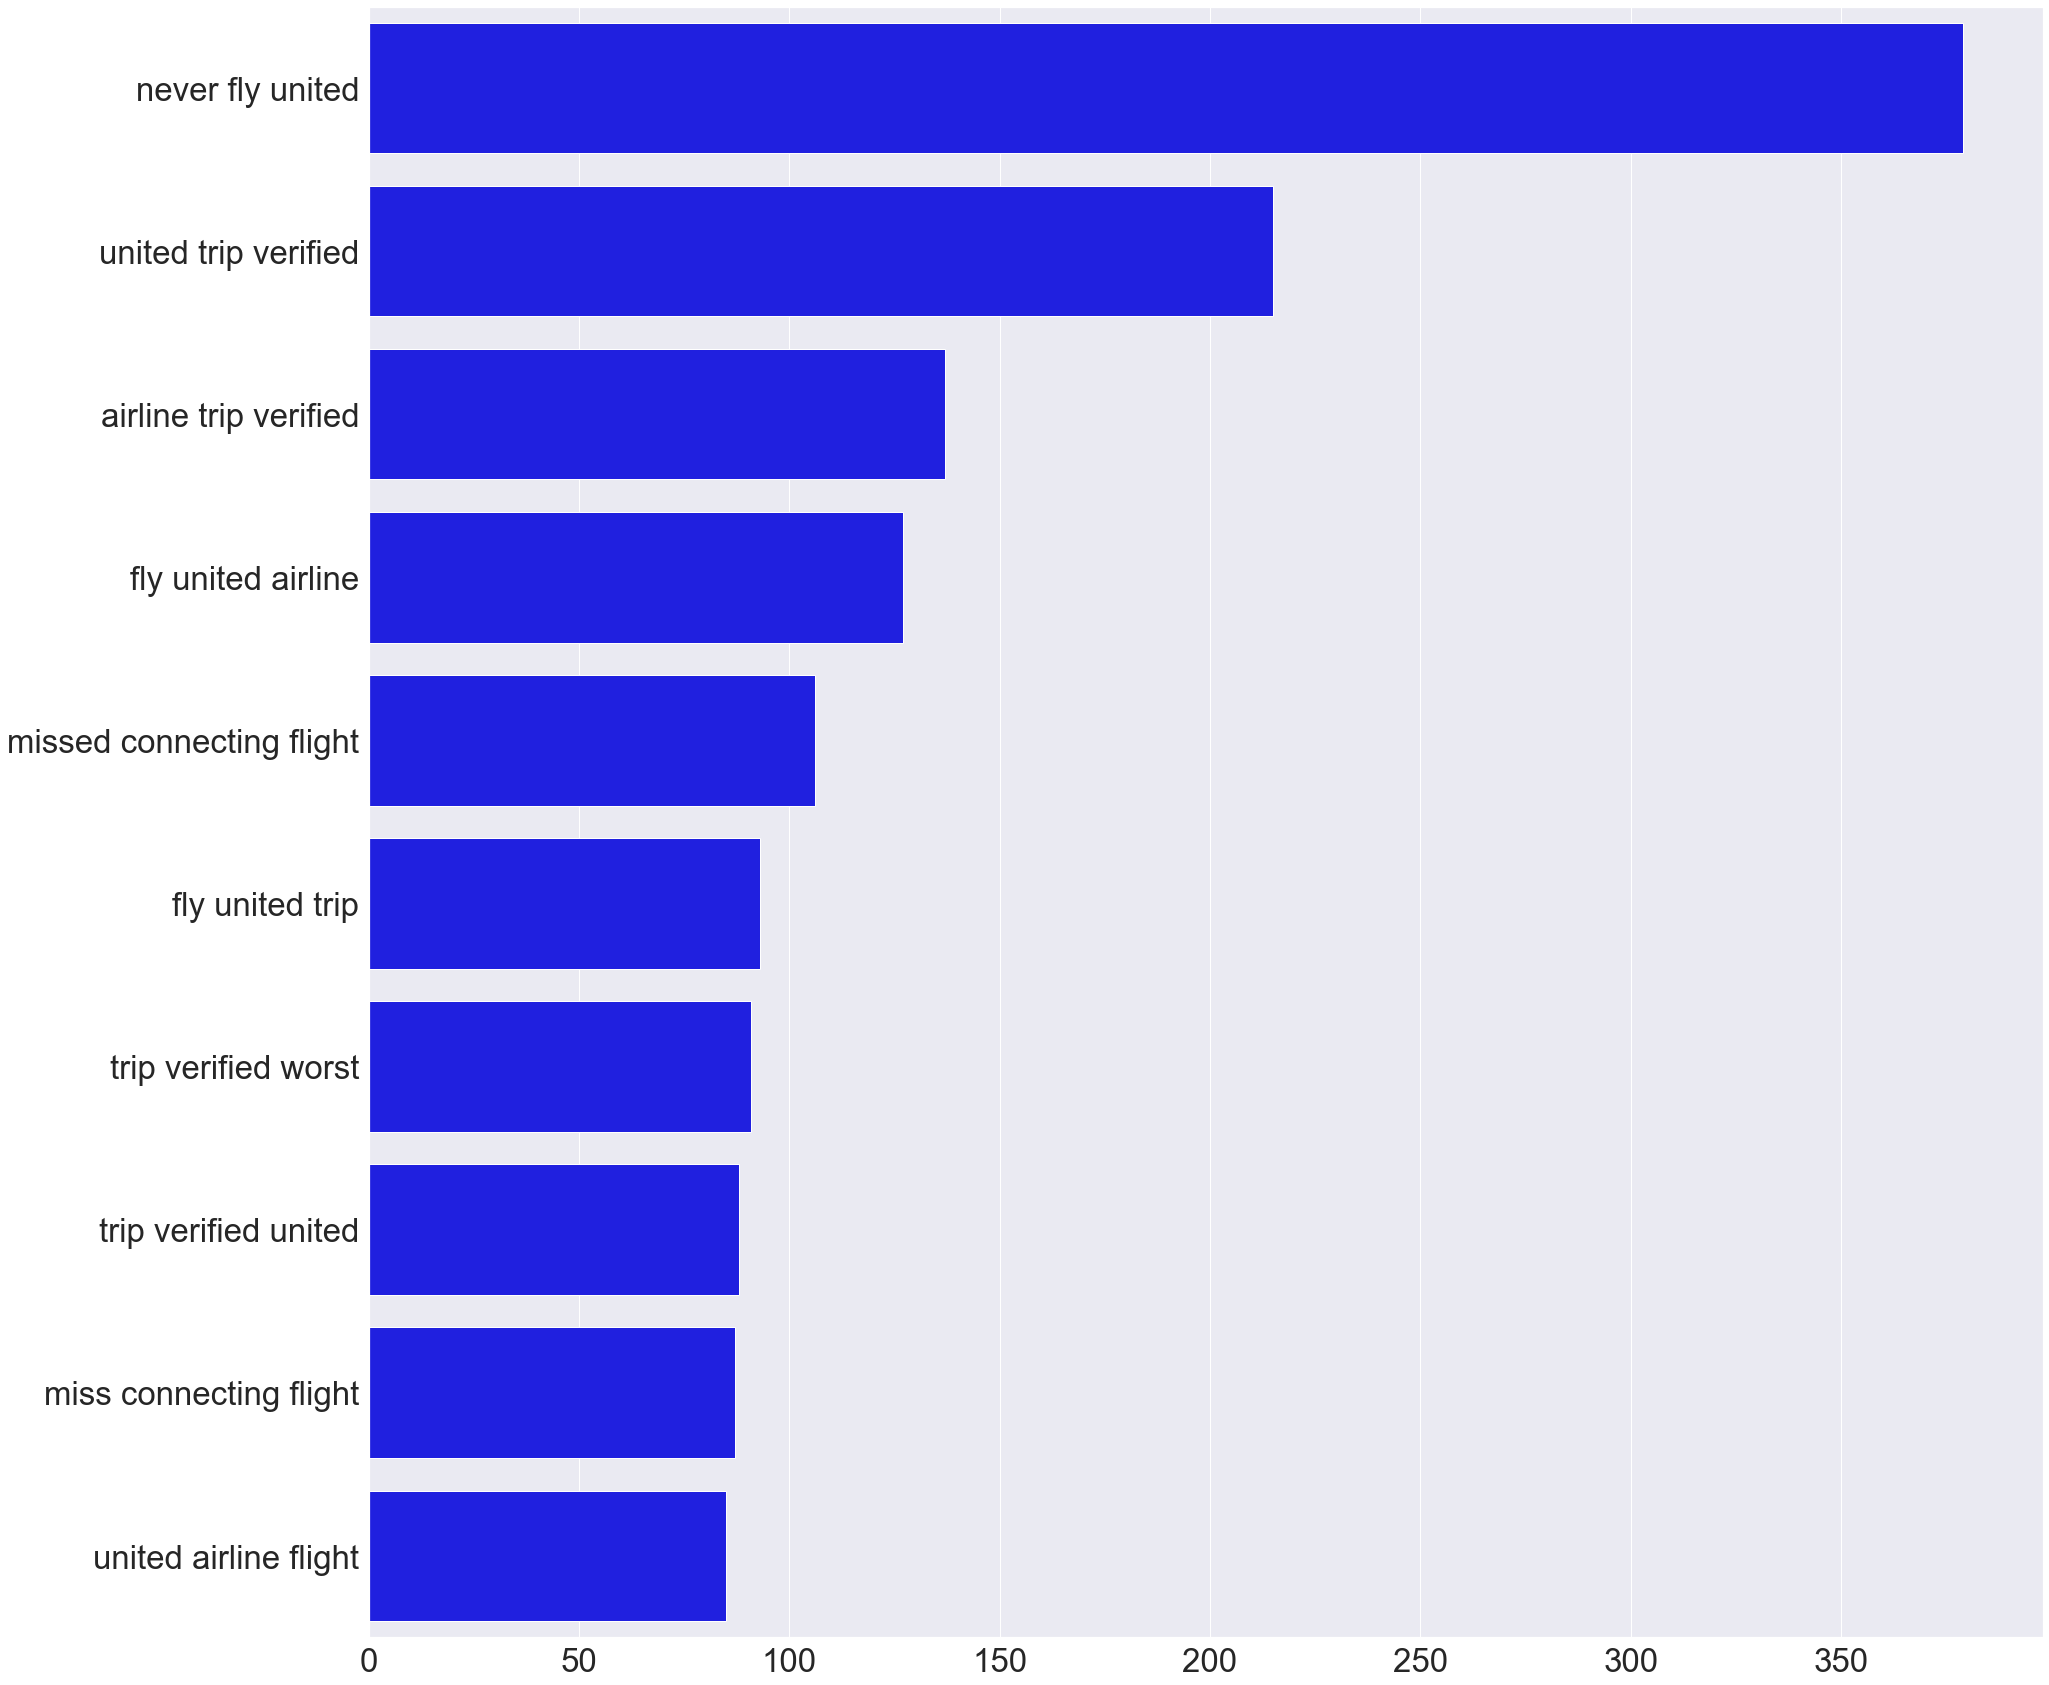

In [30]:
sns.barplot(y=df_trigrams[0].values[0:N], x=df_trigrams[1].values[0:N], color='blue')

<AxesSubplot:>

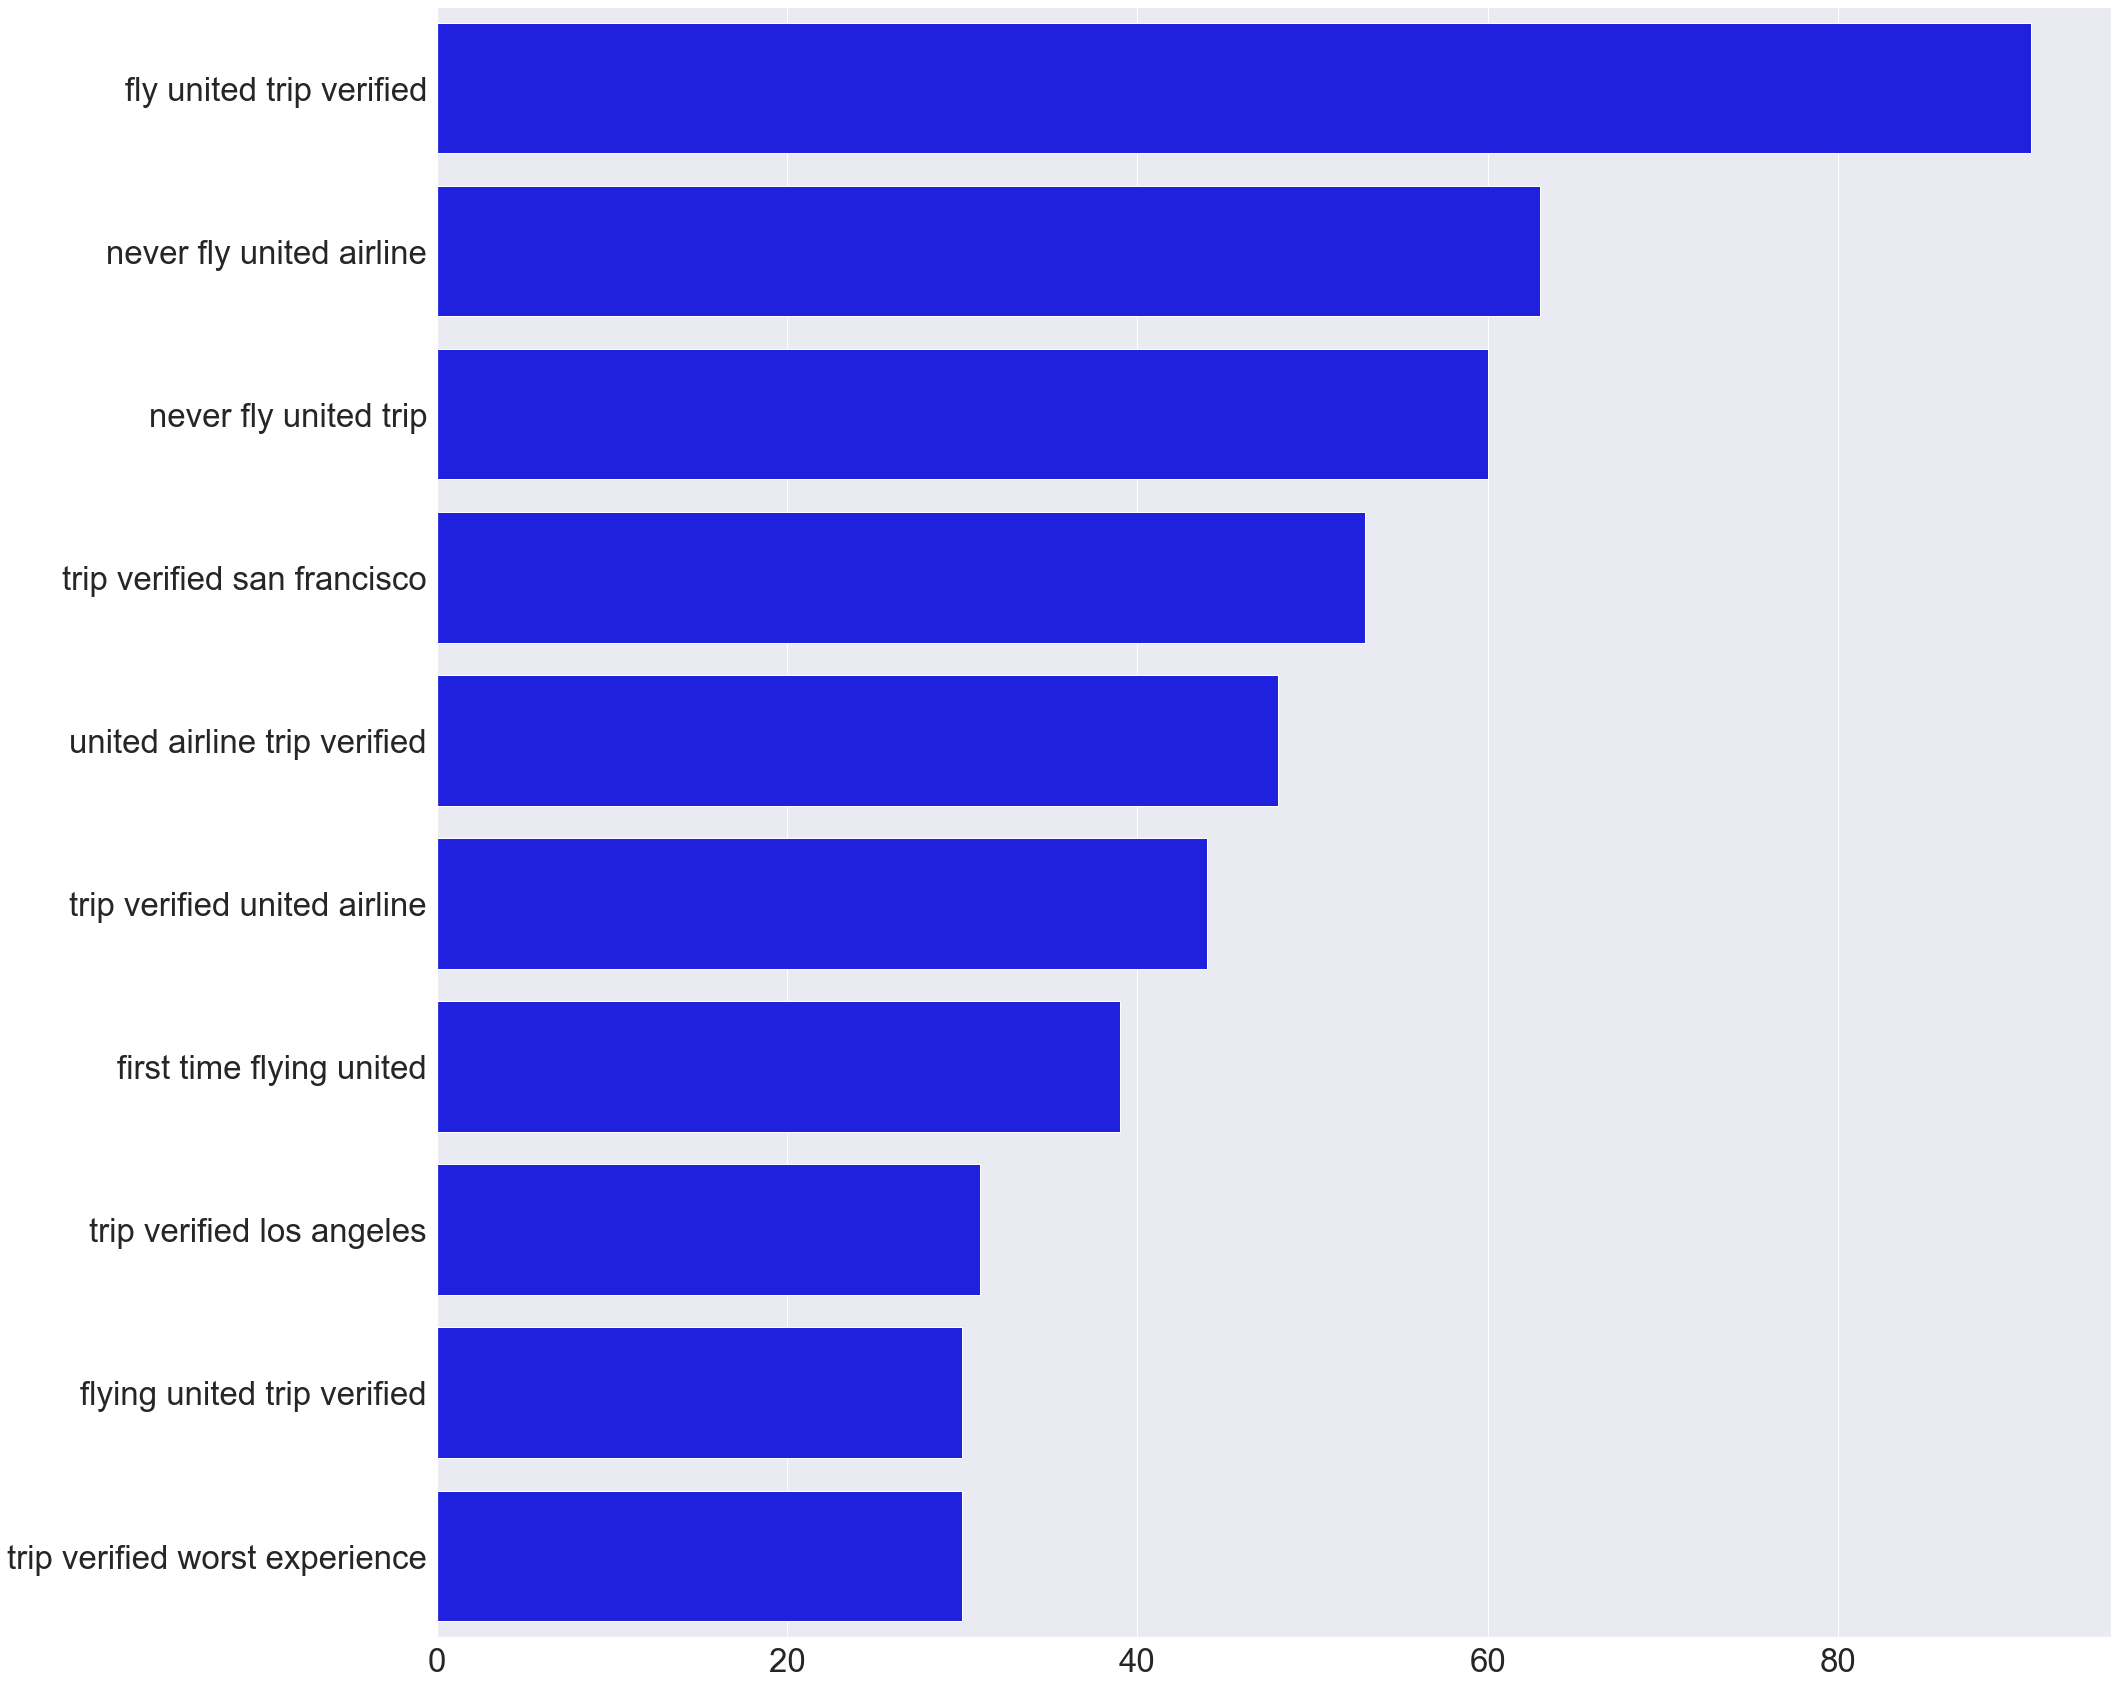

In [31]:
sns.barplot(y=df_fourgrams[0].values[0:N], x=df_fourgrams[1].values[0:N], color='blue')

In [32]:
from textblob import TextBlob

In [33]:
comments_United_Airlines = TextBlob(filtered_customer_review_corpus_word_tokens_string_United_Airlines)

In [35]:
import tqdm

In [ ]:
cleaned = list()
for phrase in tqdm(comments_United_Airlines.noun_phrases):
    count = 0
    for word in phrase.split():
        # Count the number of small words and words without an English definition
        if len(word) <= 2 or (not Word(word).definitions):
            count += 1
    # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
    # it to the cleaned list, effectively pruning the ones not added.
    if count < len(phrase.split())*0.4:
        cleaned.append(phrase)
        
print("After compactness pruning:\nFeature Size:")
len(cleaned)

In [ ]:
for phrase in cleaned:    
    match = list()
    temp = list()
    word_match = list()
    for word in phrase.split():
        # Find common words among all phrases
        word_match = [p for p in cleaned if re.search(word, p) and p not in word_match]
        # If the size of matched phrases set is smaller than 30% of the cleaned phrases, 
        # then consider the phrase as non-redundant.
        if len(word_match) <= len(cleaned)*0.3 :
            temp.append(word)
            match += word_match
            
    phrase = ' '.join(temp)
#     print("Match for " + phrase + ": " + str(match))

    if len(match) >= len(cleaned)*0.1 :
        # Redundant feature set, since it contains more than 10% of the number of phrases. 
        # Prune all matched features.
        for feature in match:
            if feature in cleaned:
                cleaned.remove(feature)
            
        # Add largest length phrase as feature
        cleaned.append(max(match, key=len))
        

print("After redundancy pruning:\nFeature Size:" + str(len(cleaned)))
print("Cleaned features:")
cleaned

In [ ]:
from nltk.corpus import stopwords
feature_count = dict()
for phrase in cleaned:
    count = 0
    for word in phrase.split():
        if word not in stopwords.words('english'):
            count += comments_United_Airlines.words.count(word)
    
    print(phrase + ": " + str(count))
    feature_count[phrase] = count

In [ ]:
# Select frequent feature threshold as (max_count)/100 
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments_United_Airlines.noun_phrases)/100
#threshold=66

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
print(' Features:')
frequent_features=frequent_features[0:5]
frequent_features

In [ ]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
#b=dataset.values.T.tolist()
#print(b)
nltk_results = [nltk_sentiment(row) for row in frequent_features]
#print(nltk_results)
results_df = pd.DataFrame(nltk_results)
#print(results_df)
text_df = pd.DataFrame(frequent_features)
#print(text_df)
nltk_df = text_df.join(results_df)
#nltk_df1=nltk_df[[0,'neu']]
#print(nltk_df)

In [ ]:
nltk_df.head(5)

In [ ]:
newdf=nltk_df[0]
newdf=pd.DataFrame({'features':nltk_df[0],'pos':nltk_df['pos'],'neg':nltk_df['neg']})
newdf.pos=newdf.pos+0.2
newdf.neg=newdf.neg-0.2
newdf

# Southwest Airlines - EDA

In [68]:
df_Southwest_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
4731,4731,Southwest Airlines,1.0,N Beale,21st May 2022,✅ Trip Verified | They cancelled my flight fro...,NaN,Family Leisure,Economy Class,Colorado Springs to Denver via Detroit,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
4732,4732,Southwest Airlines,1.0,R Yates,21st May 2022,✅ Trip Verified | Waited for over an hour with...,Boeing 737,Business,Economy Class,New York to Pittsburgh,22-May,2.0,1.0,NaN,NaN,1.0,1.0,no
4733,4733,Southwest Airlines,1.0,T Cam,15th May 2022,✅ Trip Verified | Lihue to Los Angeles. Litera...,NaN,Solo Leisure,Economy Class,Lihue to Los Angeles,22-May,2.0,4.0,1.0,1.0,1.0,3.0,no
4734,4734,Southwest Airlines,2.0,Scott Szczerbiak,14th May 2022,✅ Trip Verified | I have flown Southwest Airli...,Boeing 737,Solo Leisure,Economy Class,Baltimore to Buffalo,22-May,3.0,3.0,2.0,4.0,2.0,3.0,no
4735,4735,Southwest Airlines,3.0,Tommy Brown,13th May 2022,✅ Trip Verified | As the pilot is doing his sa...,NaN,Business,Economy Class,Nashville to Charleston,21-Jun,3.0,1.0,3.0,NaN,5.0,3.0,no


In [69]:
df_Southwest_Airlines.shape

(1455, 18)

In [70]:
df_Southwest_Airlines.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [71]:
df_Southwest_Airlines.recommended.nunique()

2

In [72]:
df_Southwest_Airlines.recommended.value_counts()

no     941
yes    514
Name: recommended, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='recommended'>

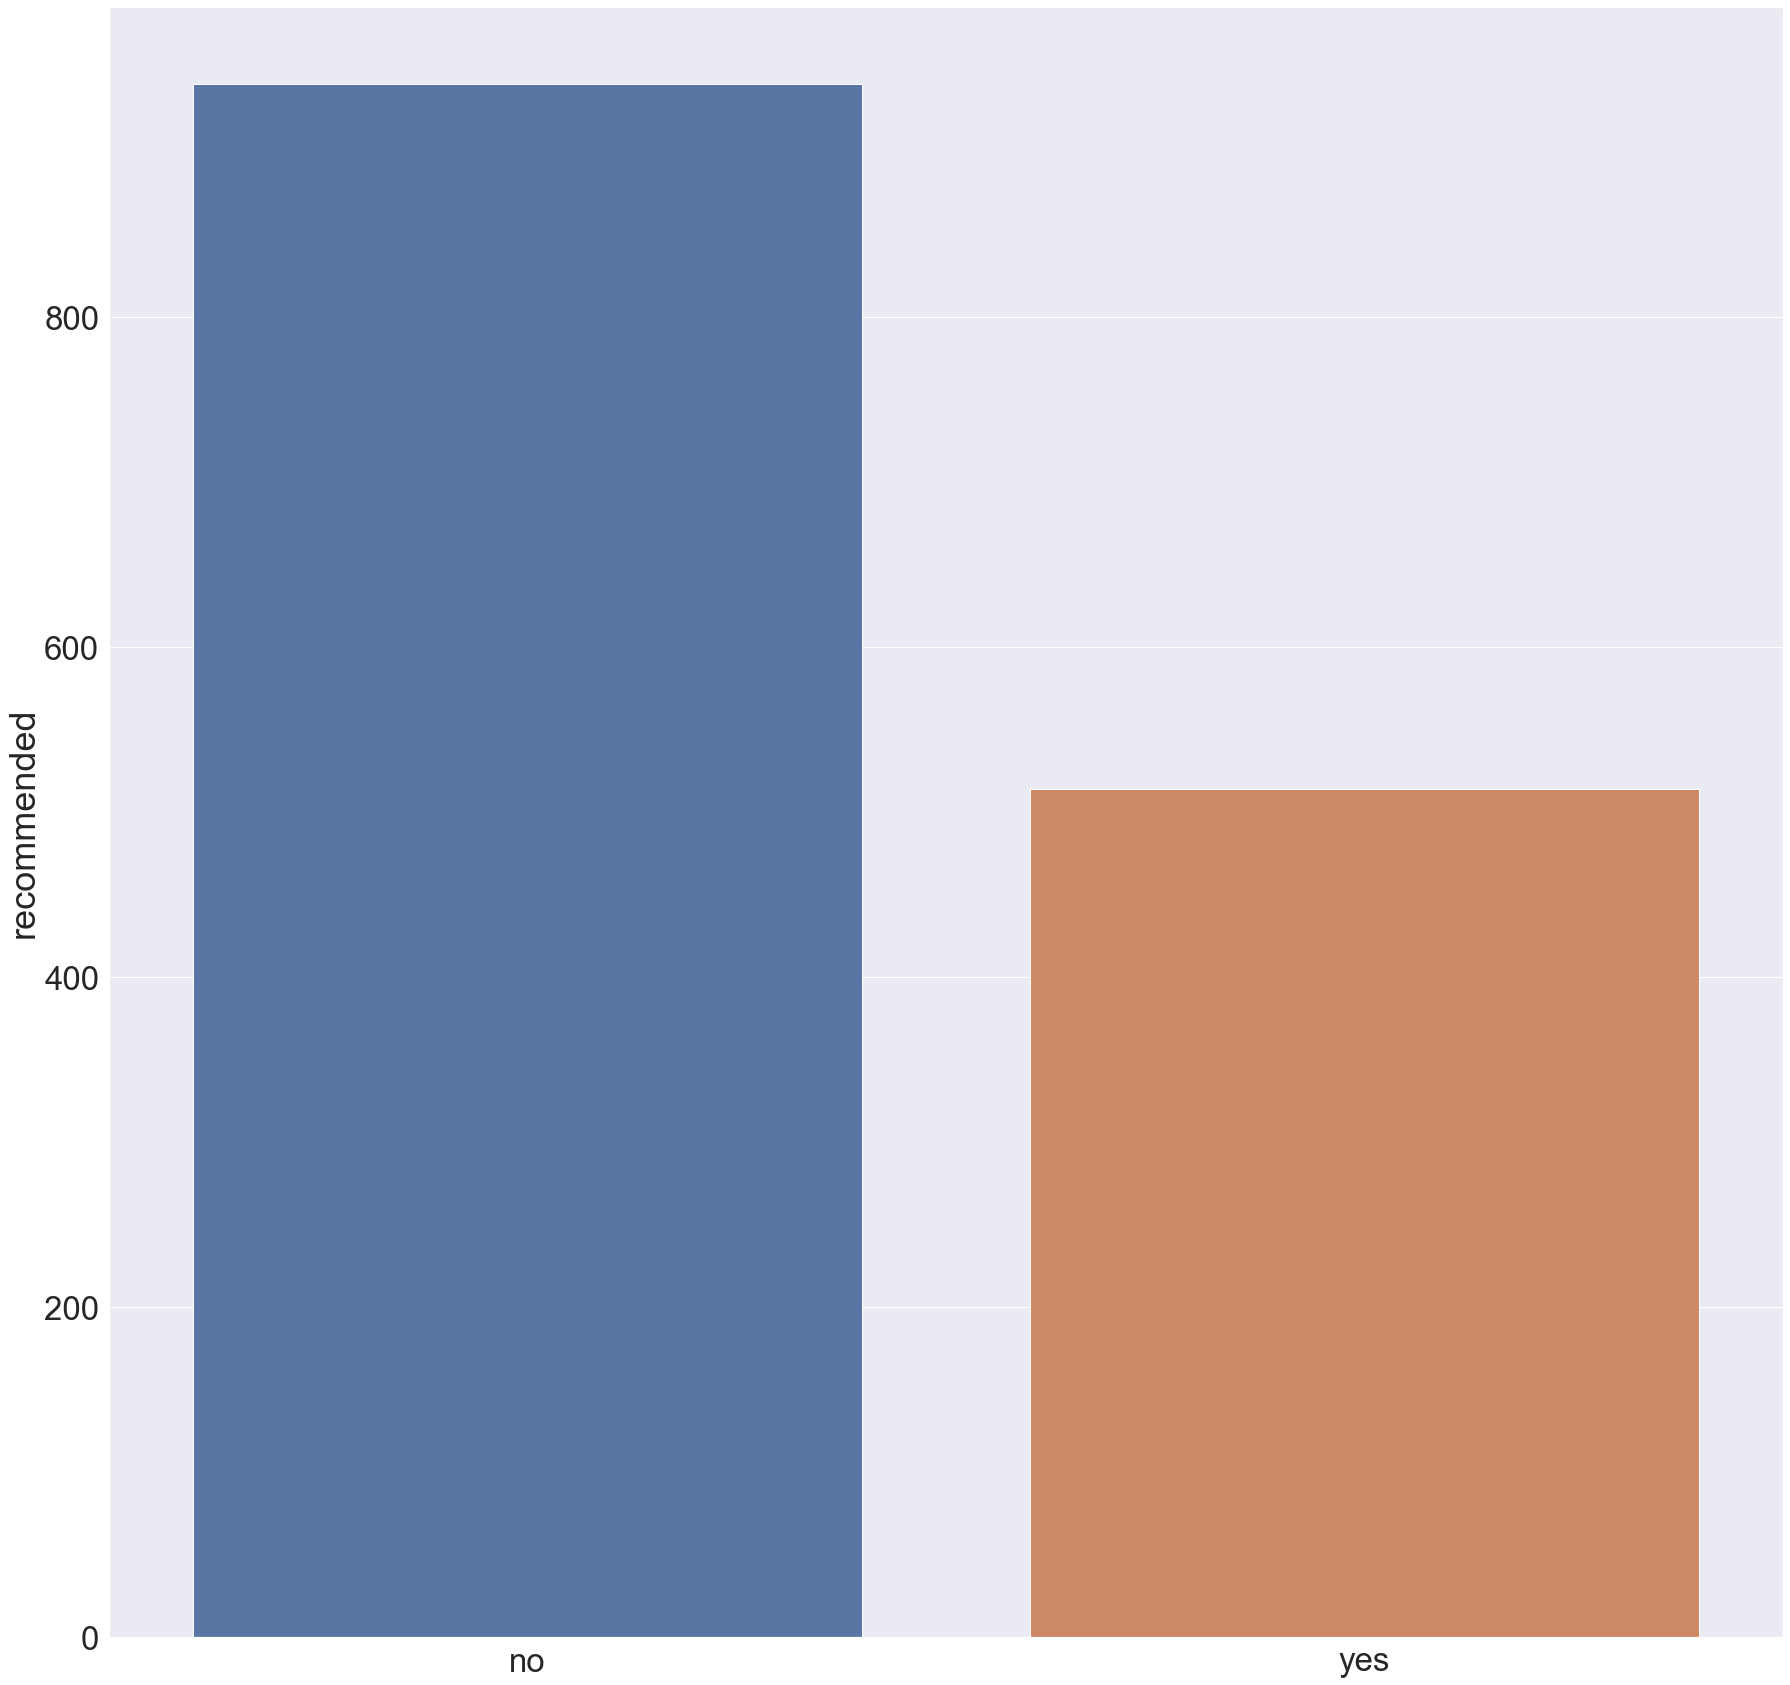

In [73]:
sns.barplot(df_Southwest_Airlines.recommended.value_counts().index,df_Southwest_Airlines.recommended.value_counts())

In [74]:
df_Southwest_Airlines.overall.value_counts()

1.0     535
10.0    259
2.0     185
9.0     104
3.0      96
4.0      60
5.0      53
8.0      51
7.0      38
6.0      21
Name: overall, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='overall'>

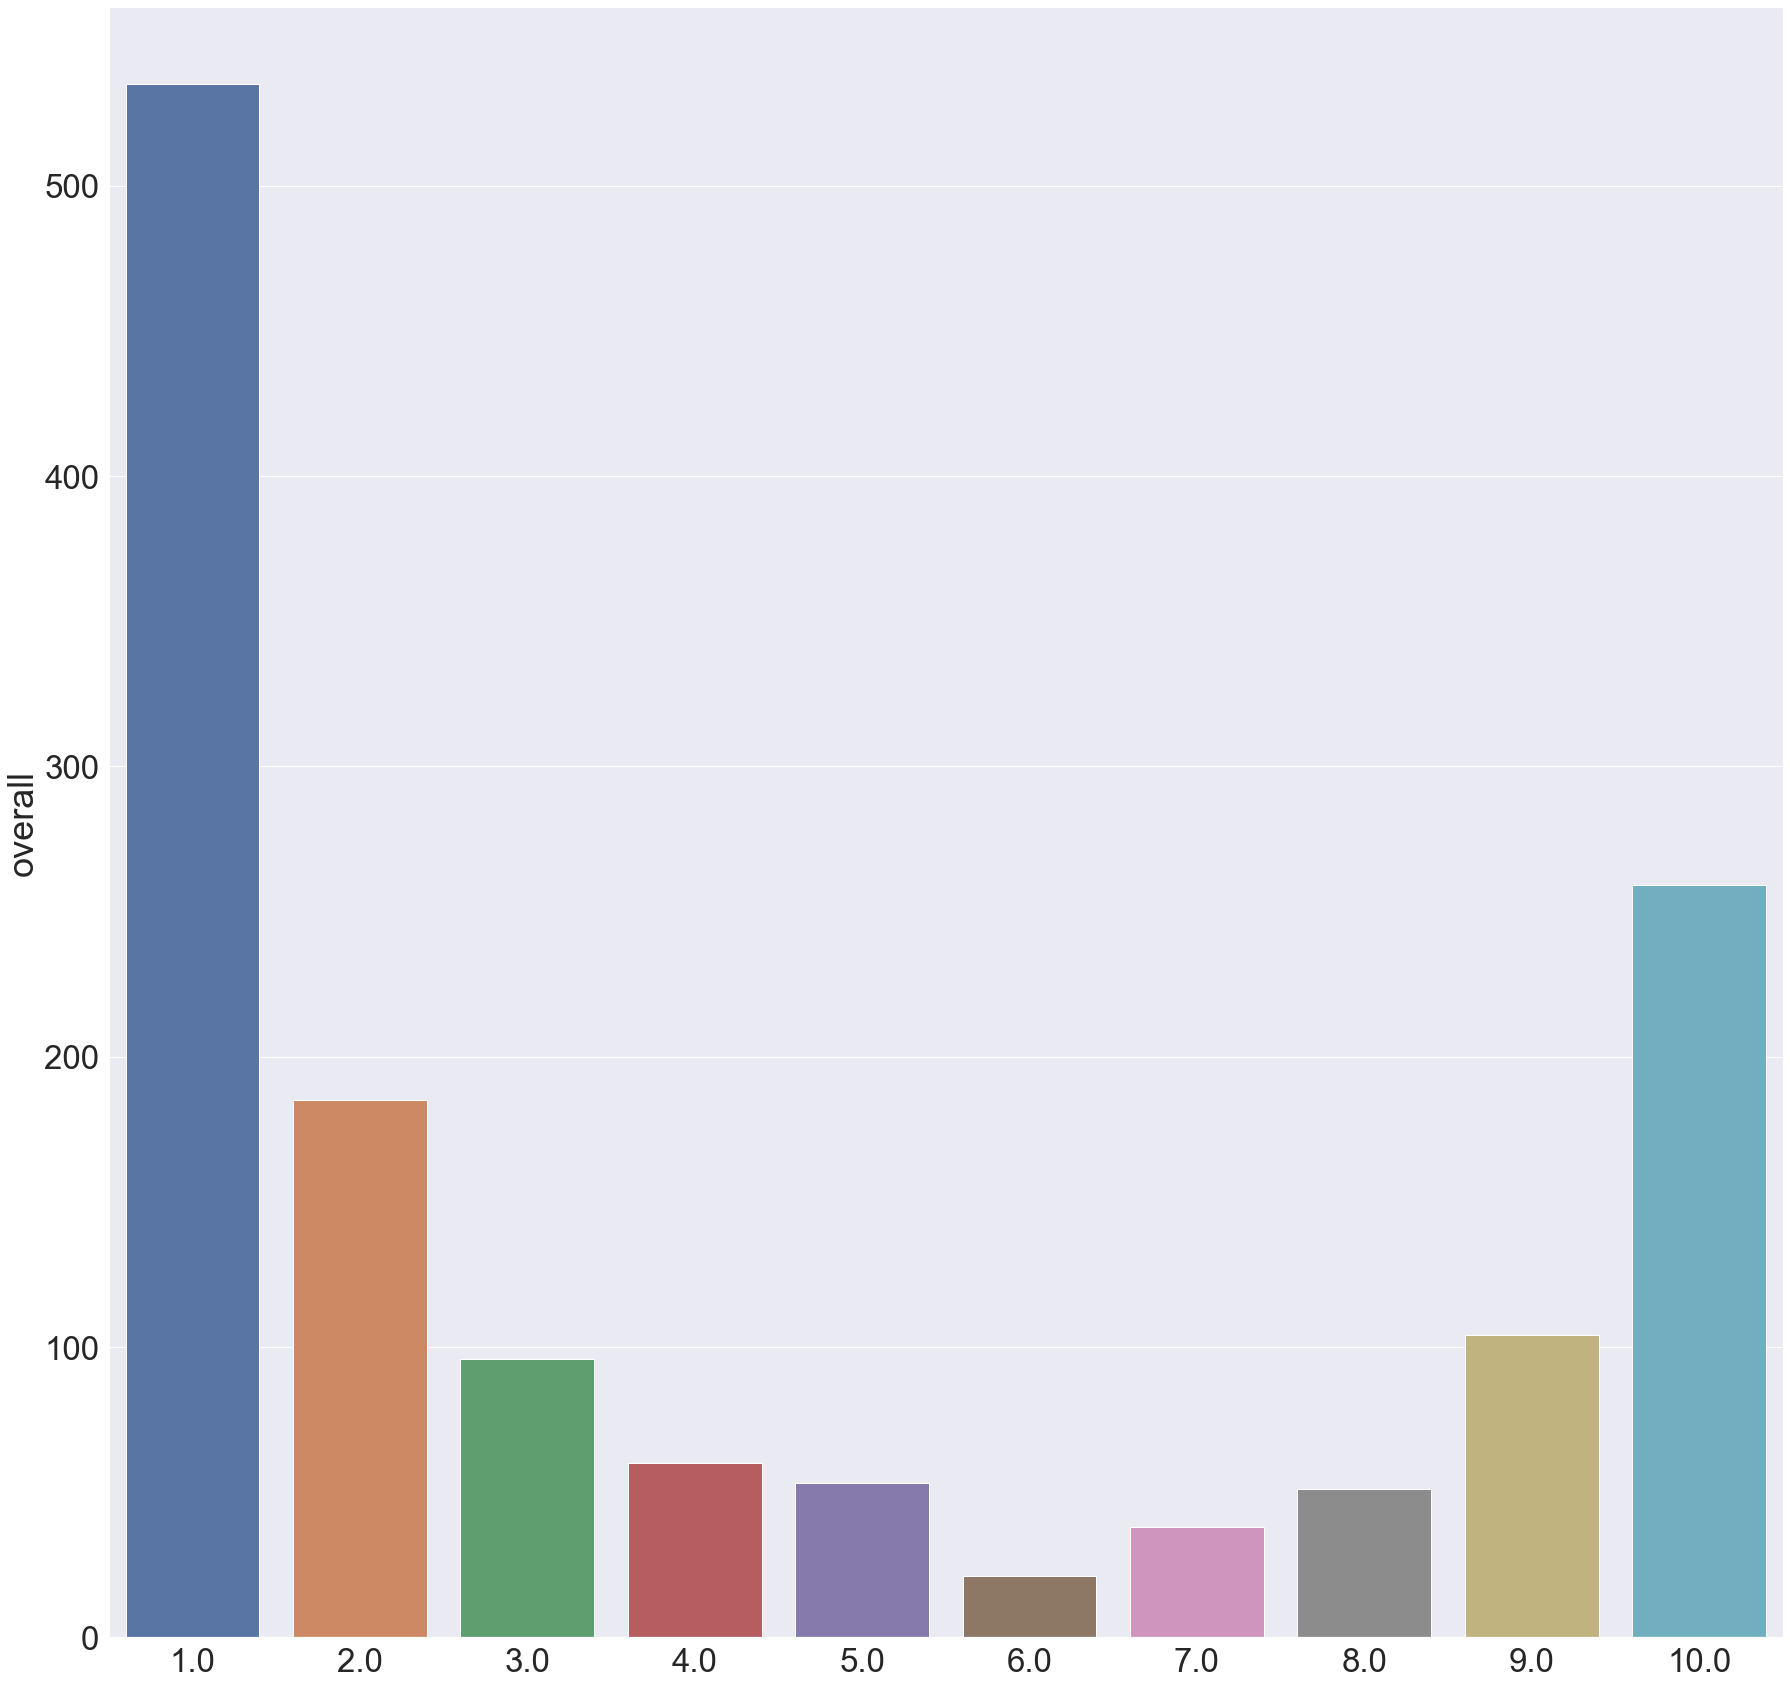

In [75]:
sns.barplot(df_Southwest_Airlines.overall.value_counts().index,df_Southwest_Airlines.overall.value_counts())

In [76]:
df_Southwest_Airlines.aircraft.nunique()

34

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aircraft'>

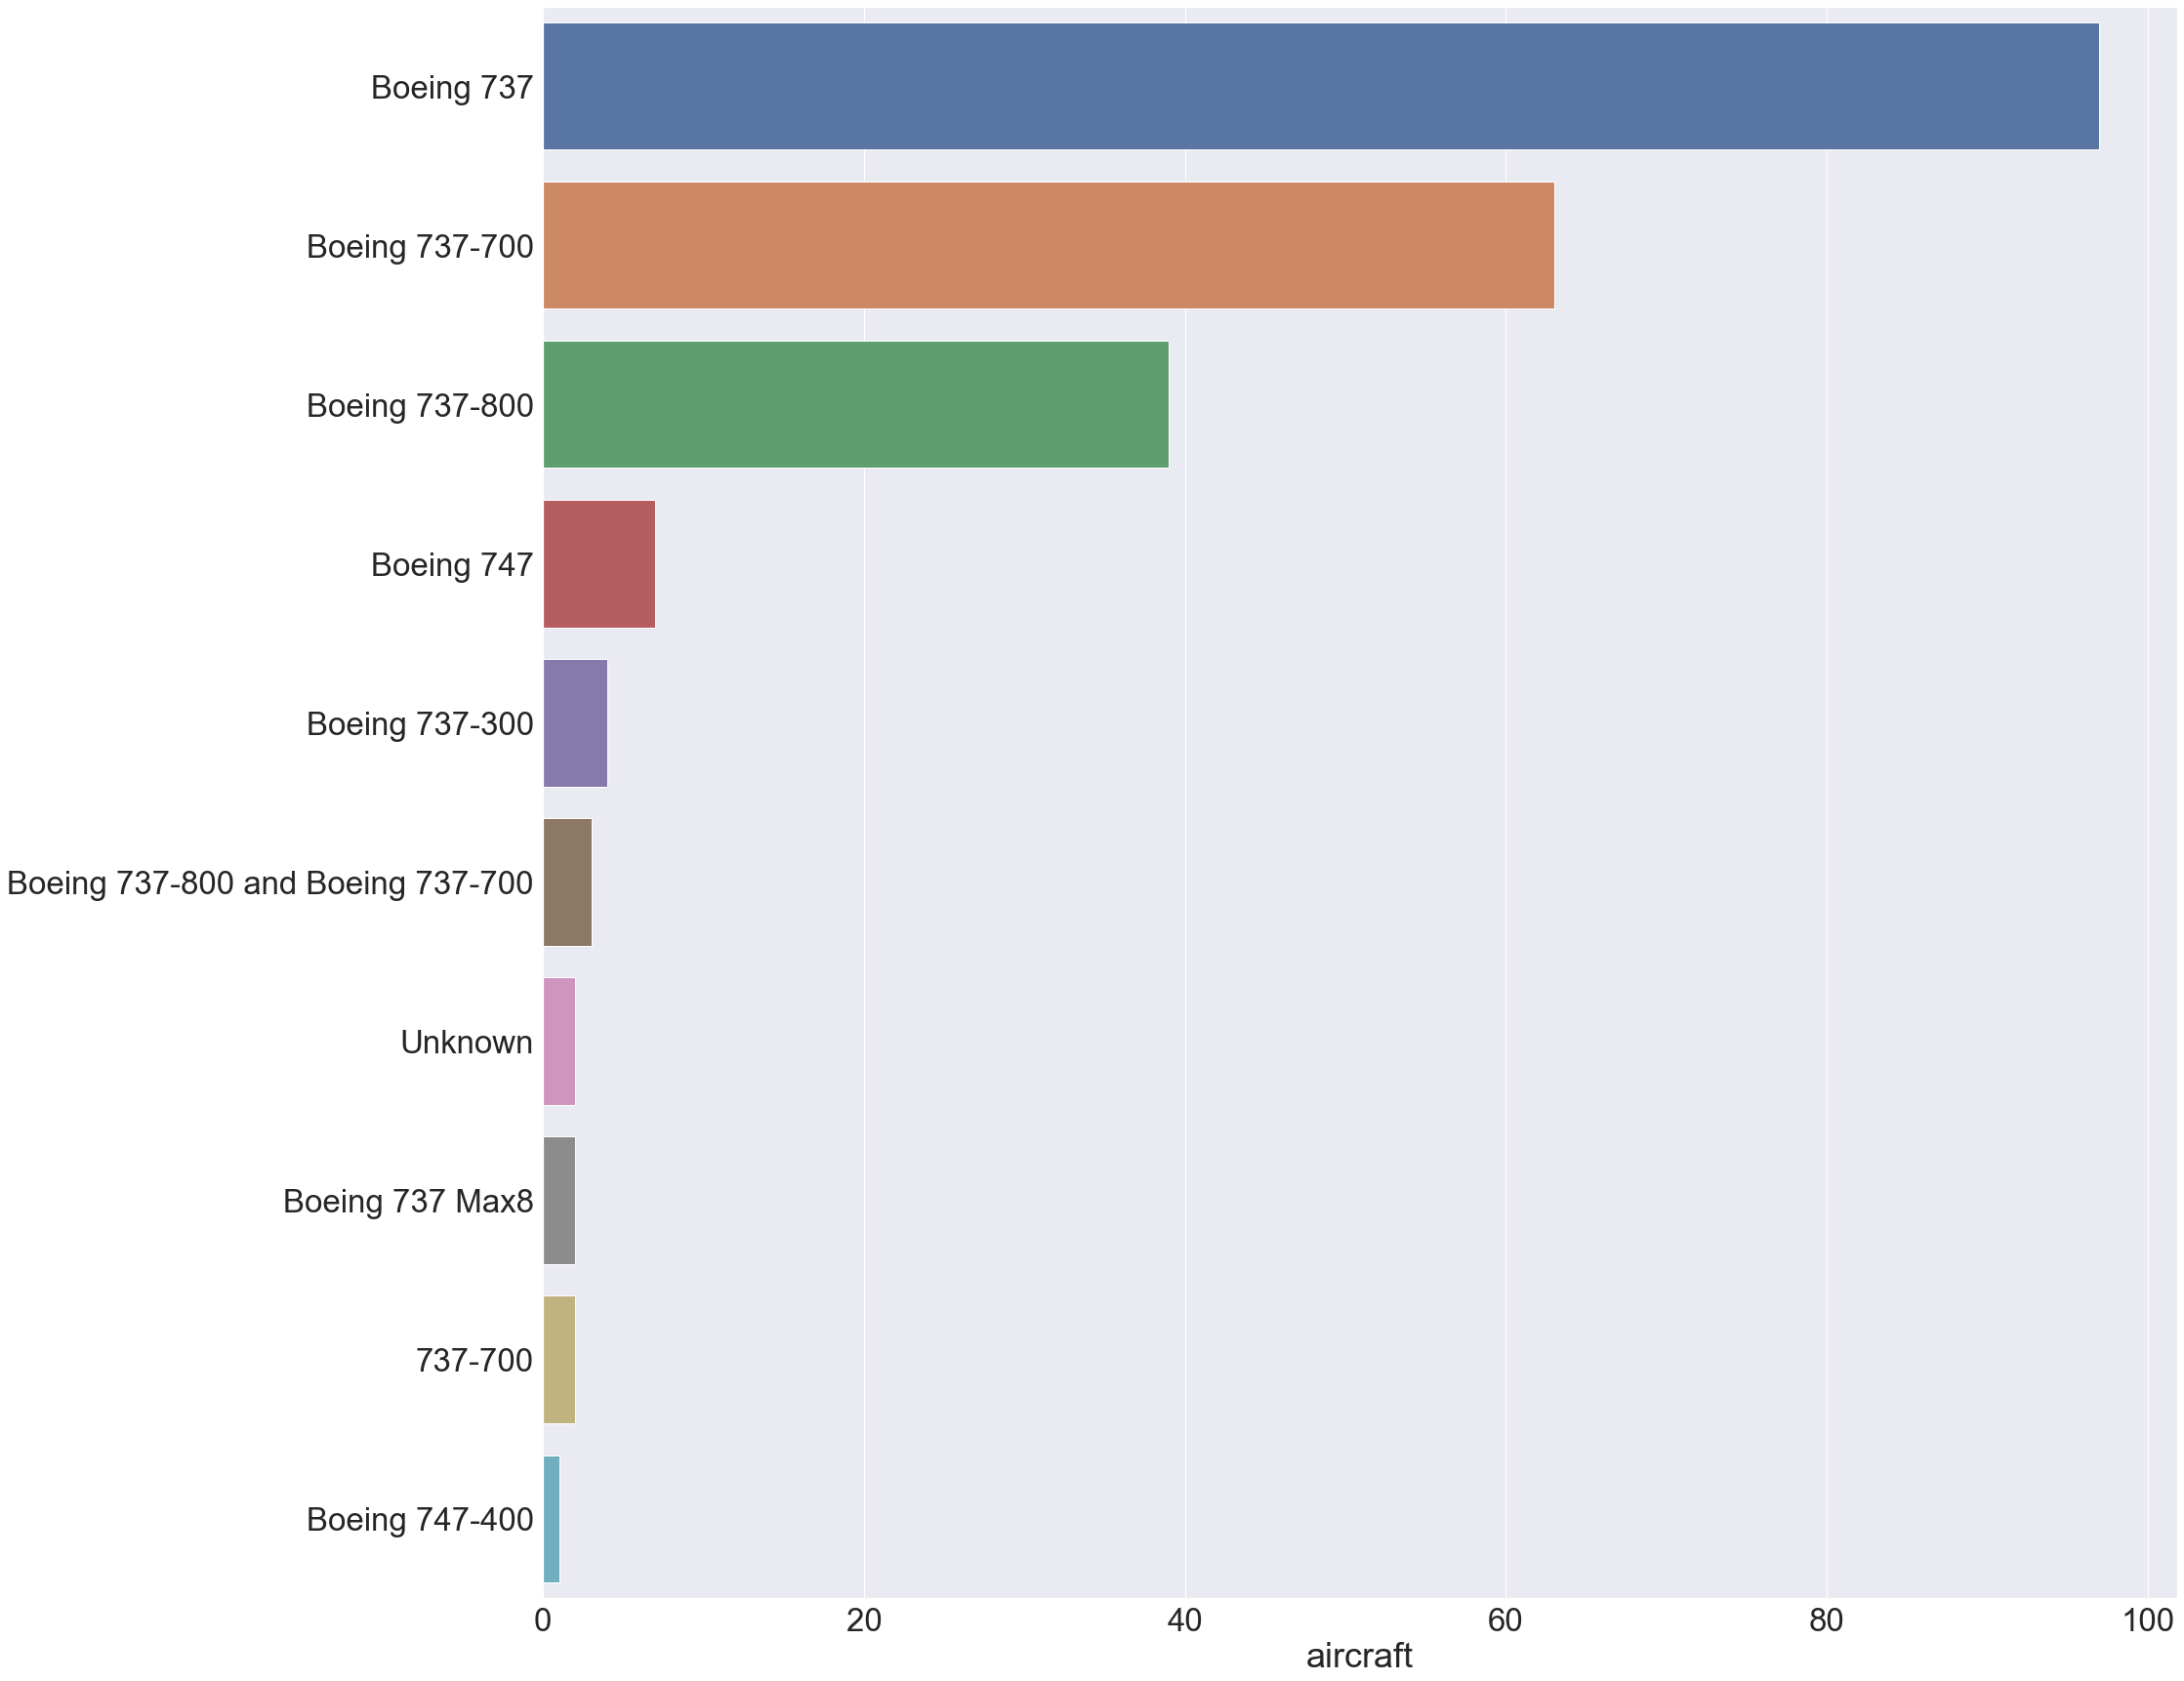

In [77]:
sns.barplot(df_Southwest_Airlines.aircraft.value_counts()[:10],df_Southwest_Airlines.aircraft.value_counts()[:10].index,orient = "h")

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='traveller_type'>

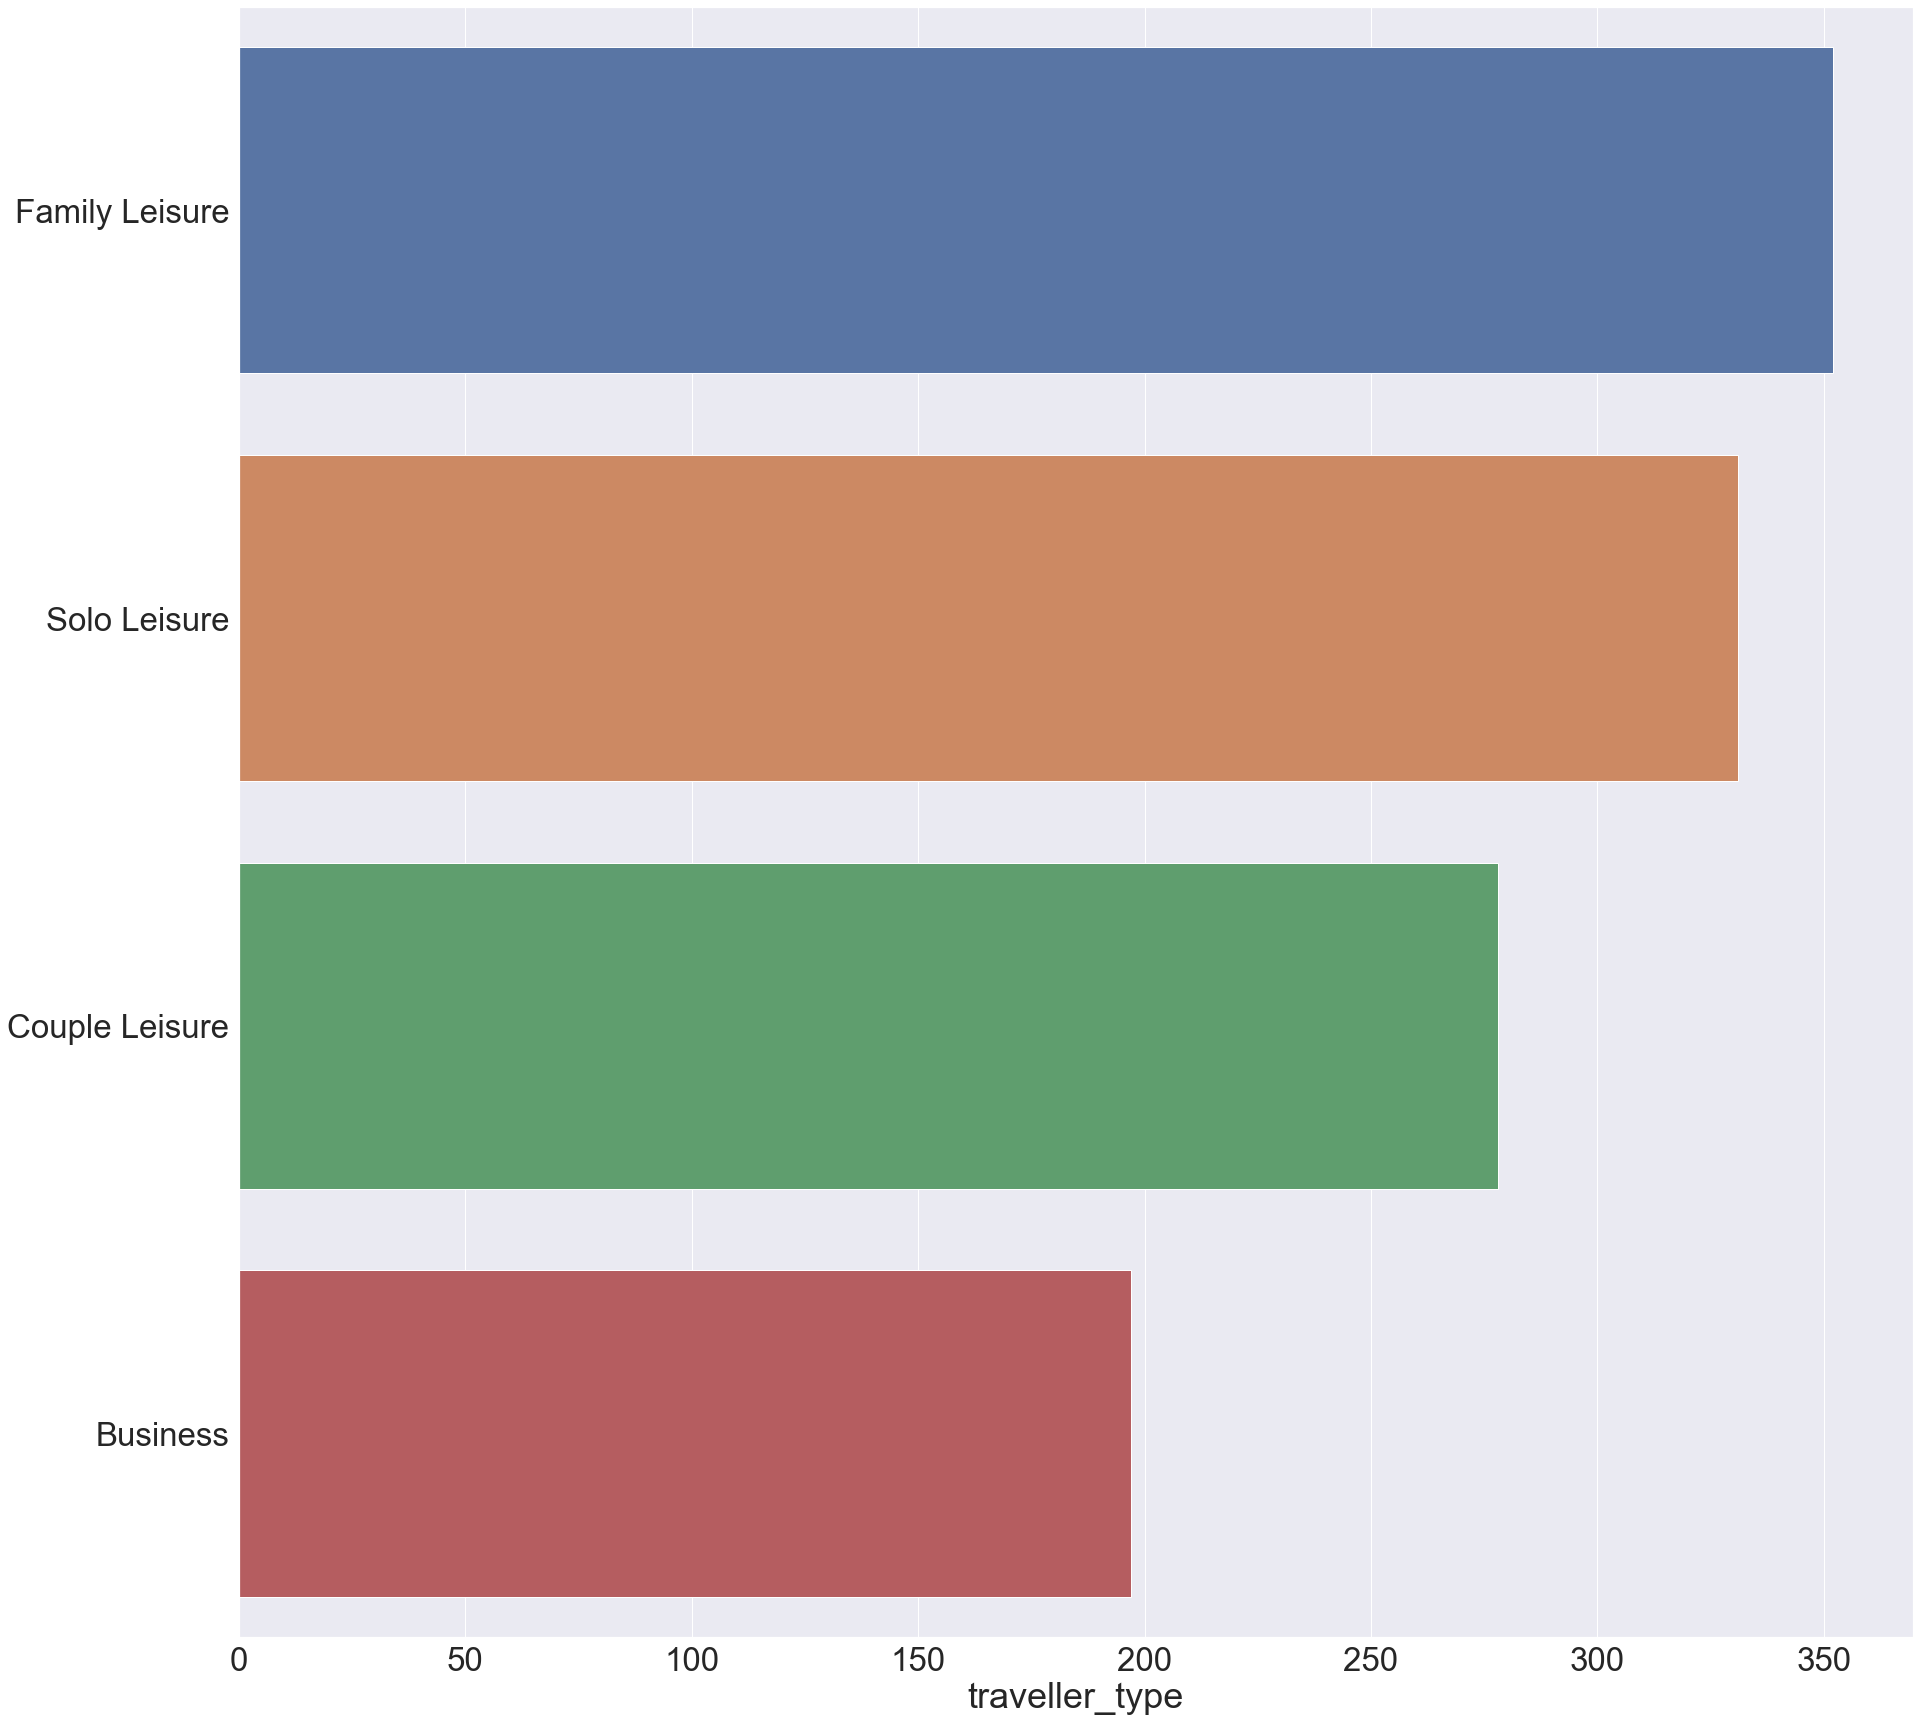

In [78]:
sns.barplot(df_Southwest_Airlines.traveller_type.value_counts(),df_Southwest_Airlines.traveller_type.value_counts().index)

In [79]:
df_Southwest_Airlines.cabin.value_counts()

Economy Class      1418
Business Class       22
Premium Economy      14
Name: cabin, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabin'>

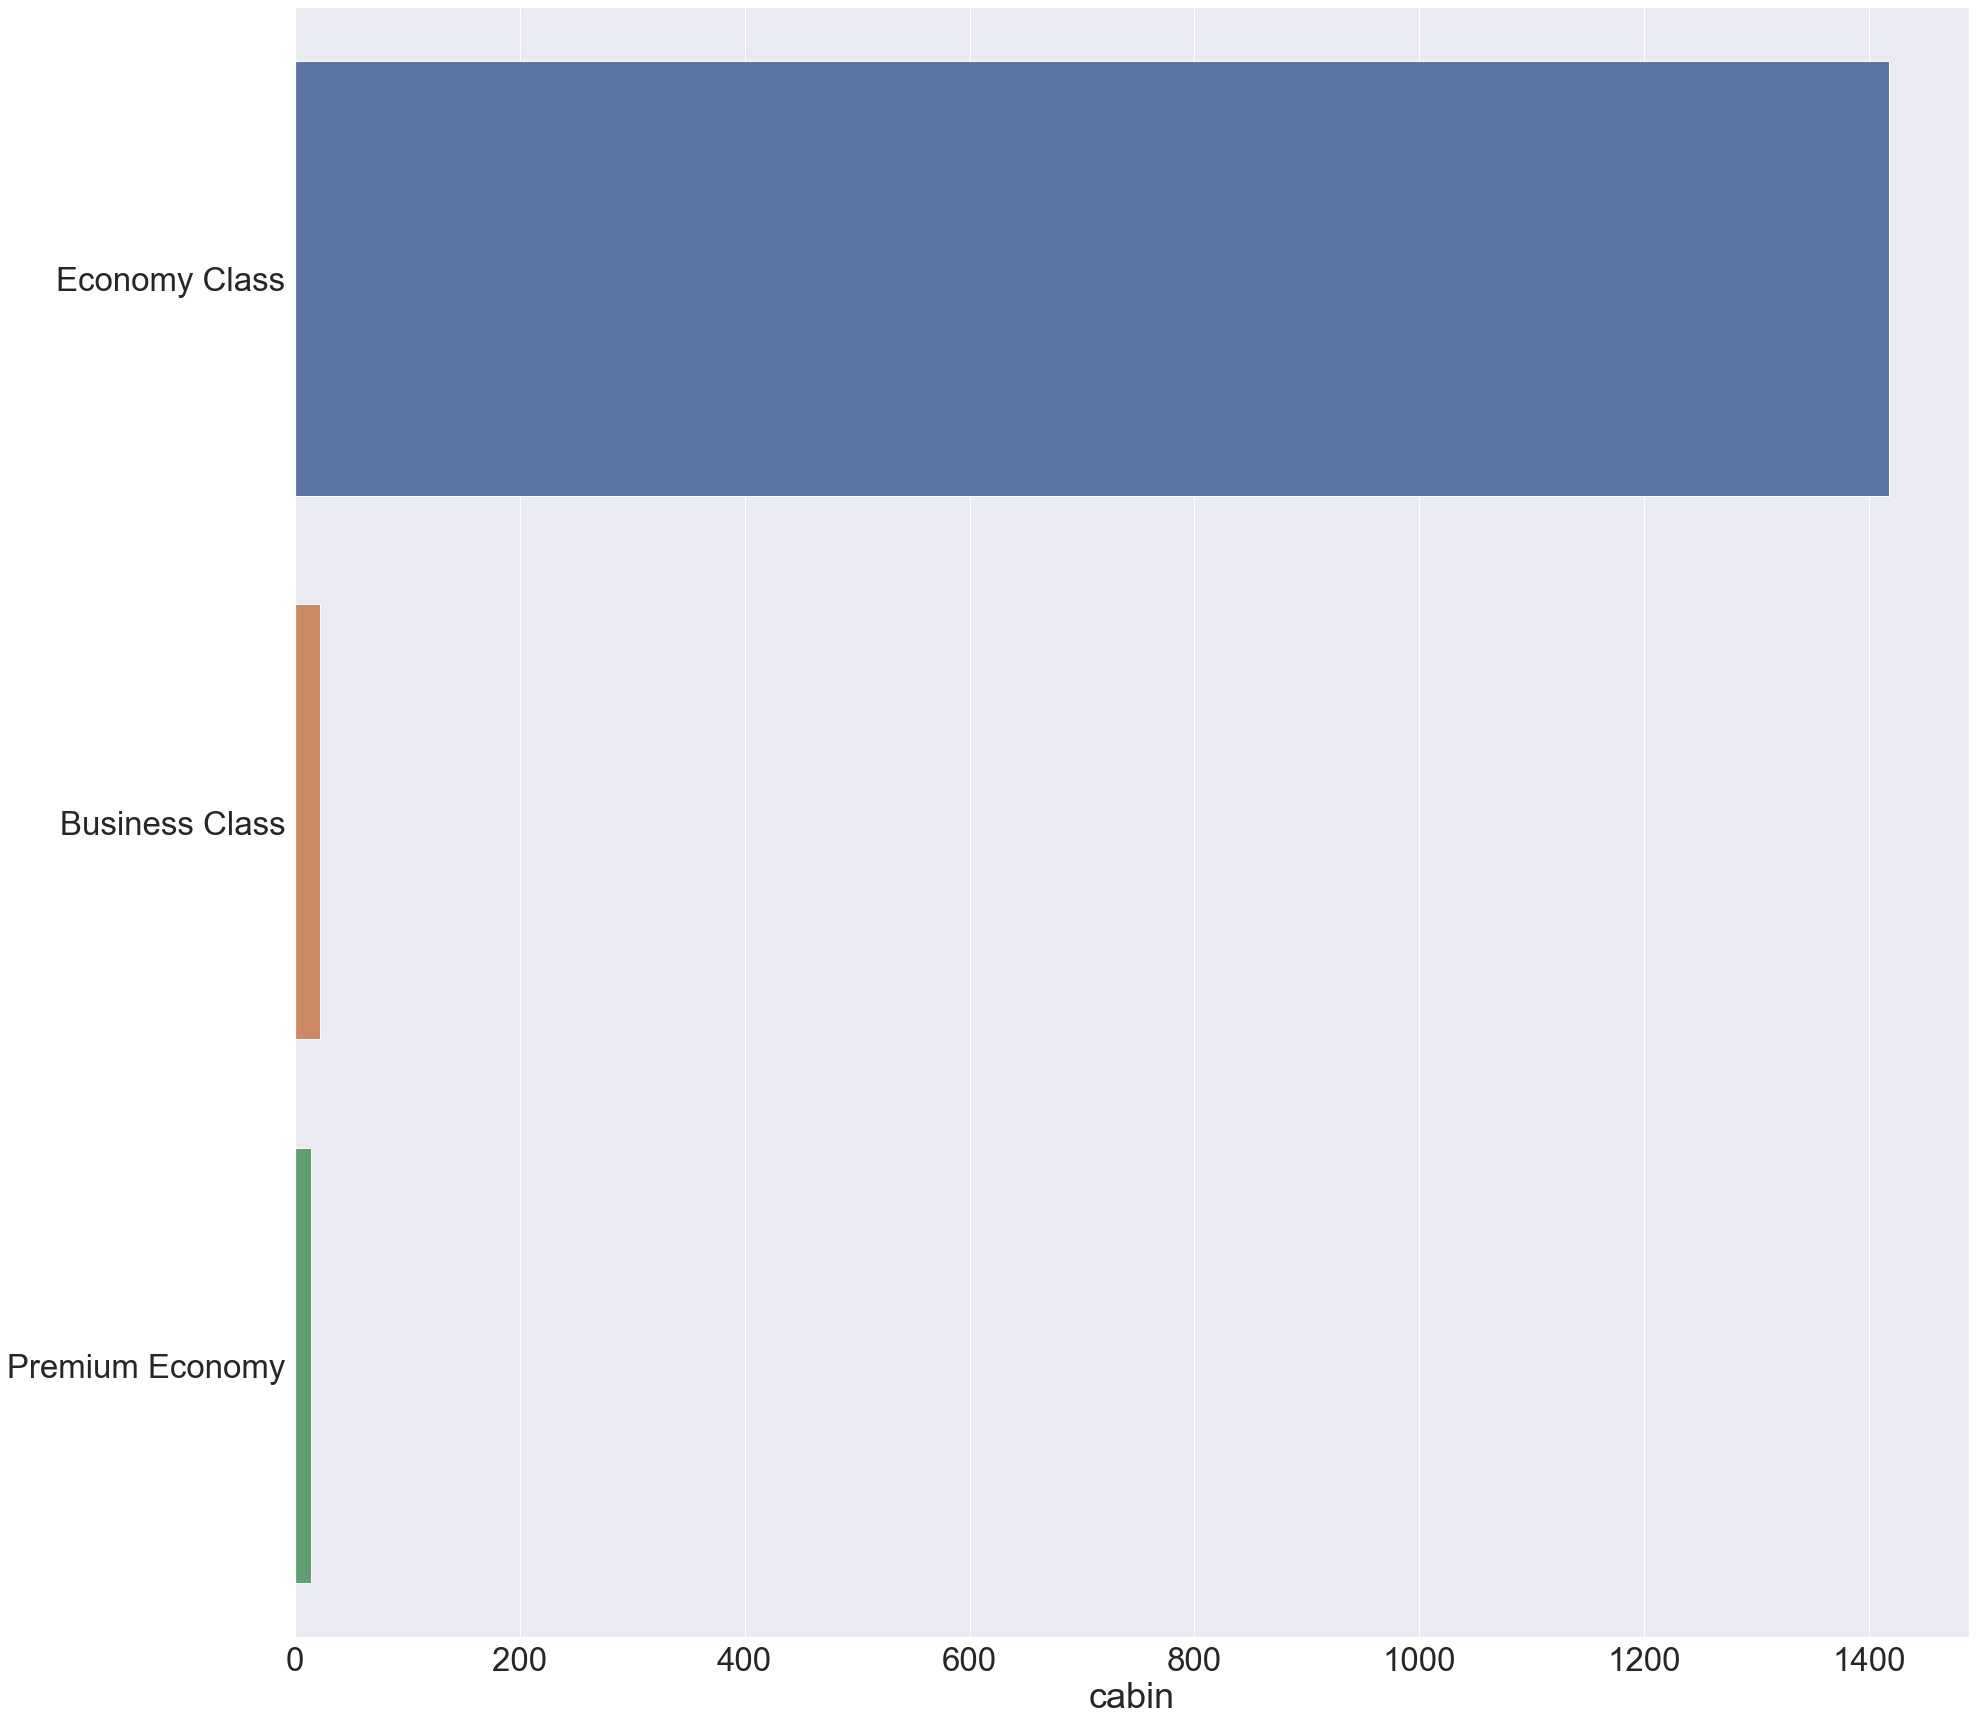

In [80]:
sns.barplot(df_Southwest_Airlines.cabin.value_counts(),df_Southwest_Airlines.cabin.value_counts().index)

In [81]:
df_Southwest_Airlines.route.nunique()

979

In [82]:
df_Southwest_Airlines.route.value_counts()[:10]

Denver to Houston         6
Phoenix to Los Angeles    5
Orlando to Baltimore      5
Raleigh to Orlando        4
Phoenix to Chicago        4
Denver to Portland        4
Las Vegas to Orlando      4
RNO to LAS                4
Orlando to Las Vegas      3
Oakland to Las Vegas      3
Name: route, dtype: int64

In [83]:
df_Southwest_Airlines[["seat_comfort",'cabin_service', 'food_bev', 'entertainment','ground_service', 'value_for_money']].describe()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,1355.000000,1363.000000,1019.000000,543.000000,1096.000000,1450.000000
mean,2.688561,3.038885,2.755643,2.296501,2.429745,2.653103
std,1.424250,1.615122,1.468114,1.548278,1.644859,1.630564
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='seat_comfort'>

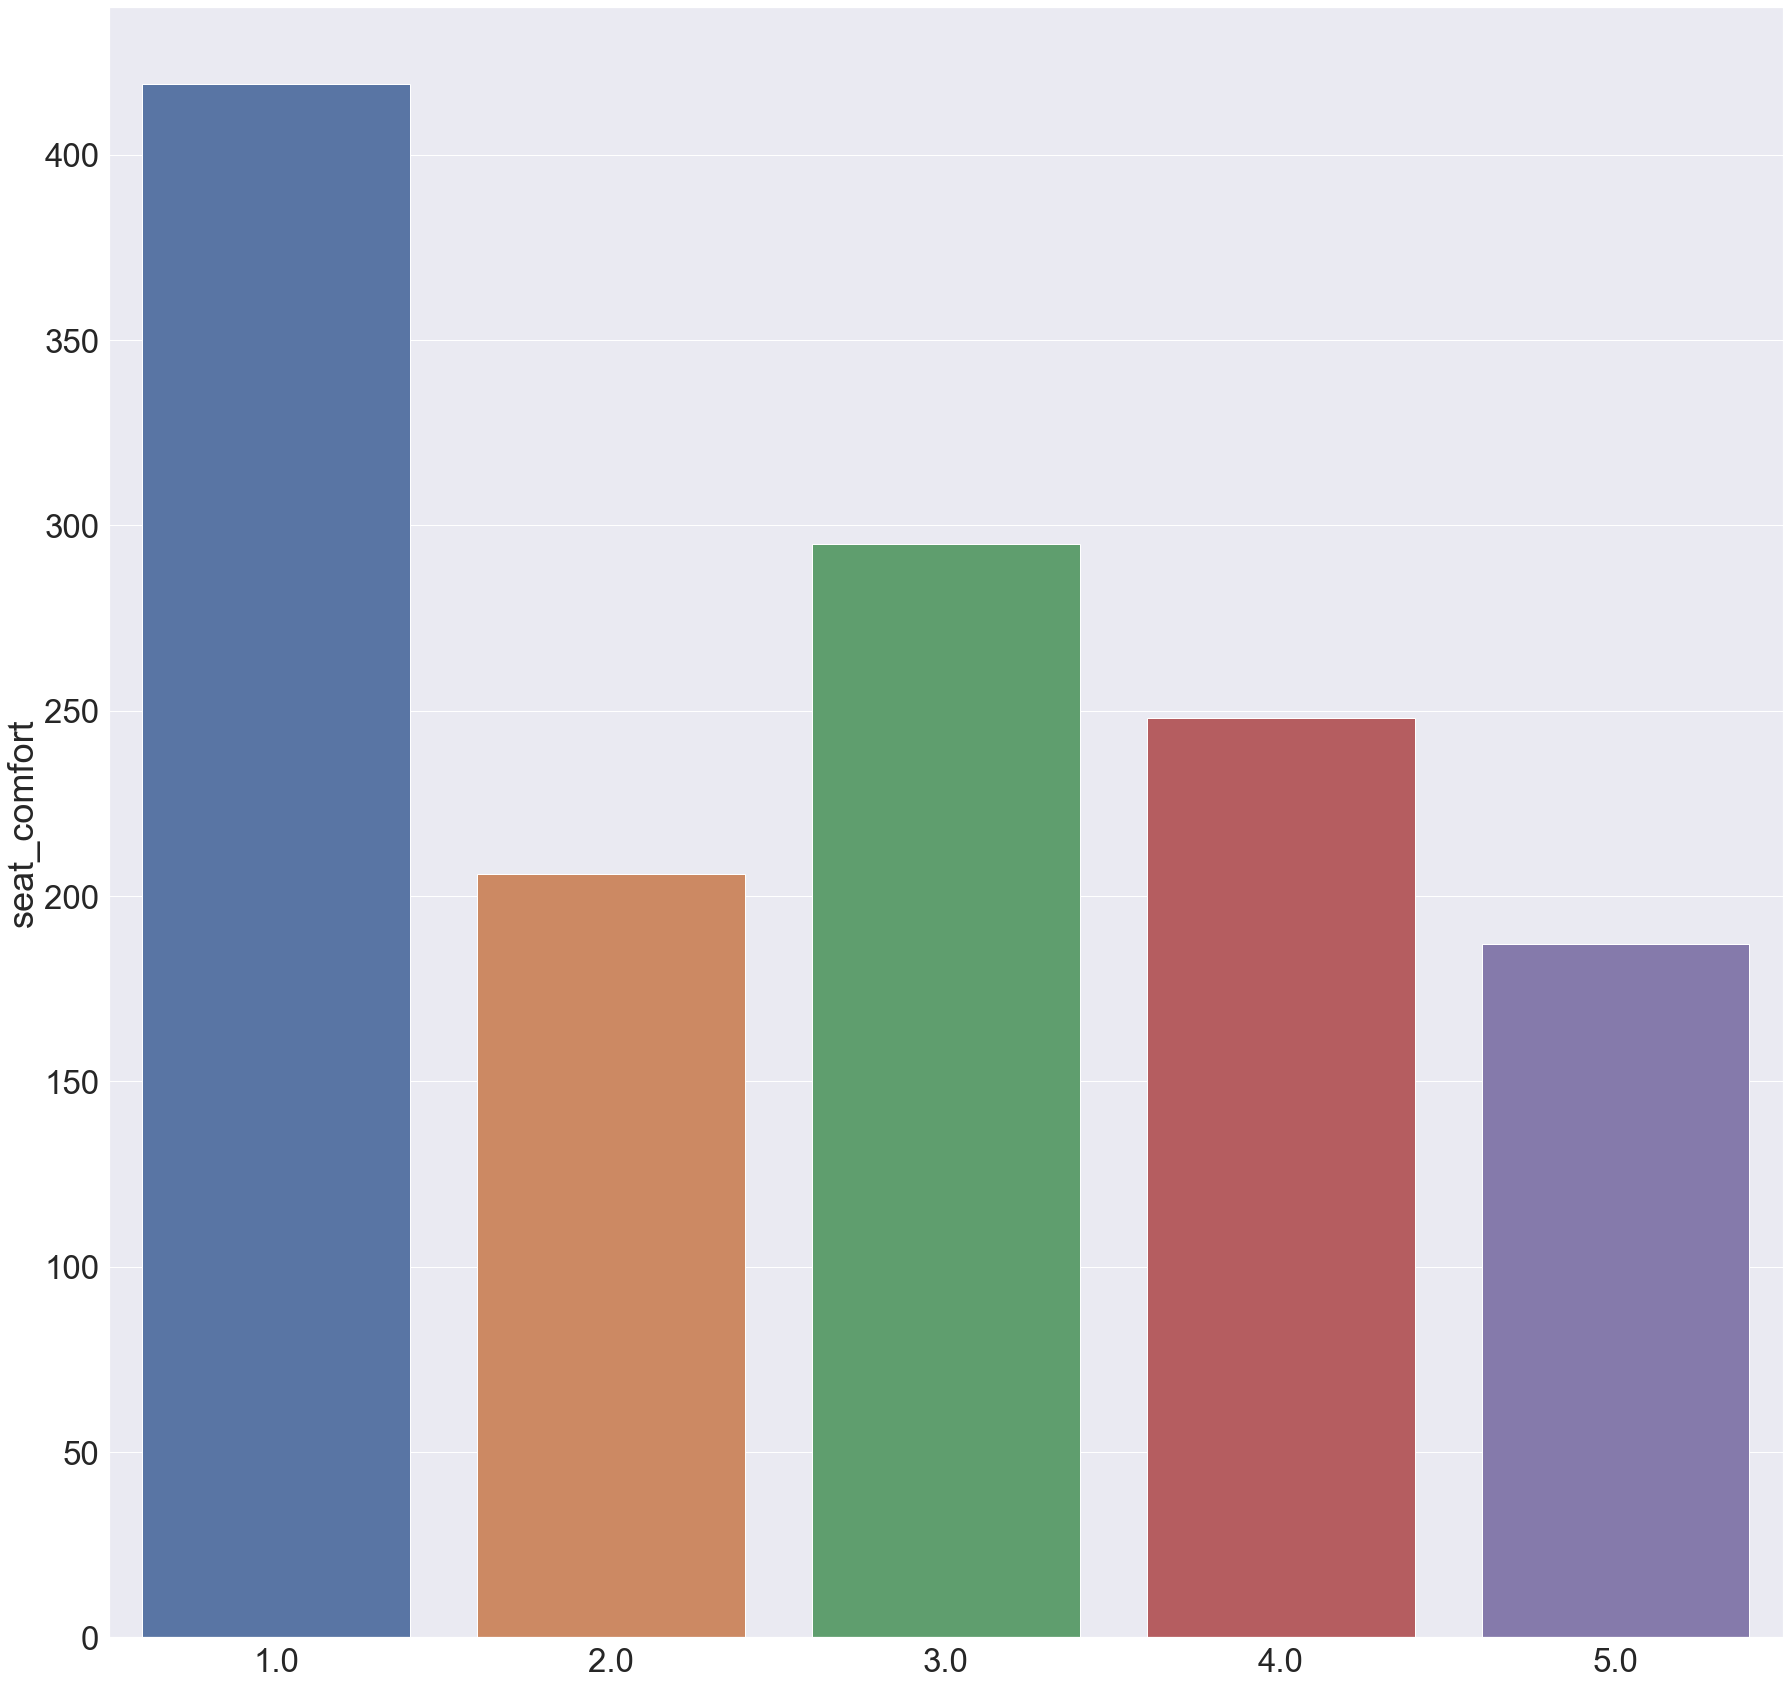

In [84]:
sns.barplot(df_Southwest_Airlines.seat_comfort.value_counts().index,df_Southwest_Airlines.seat_comfort.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='cabin_service'>

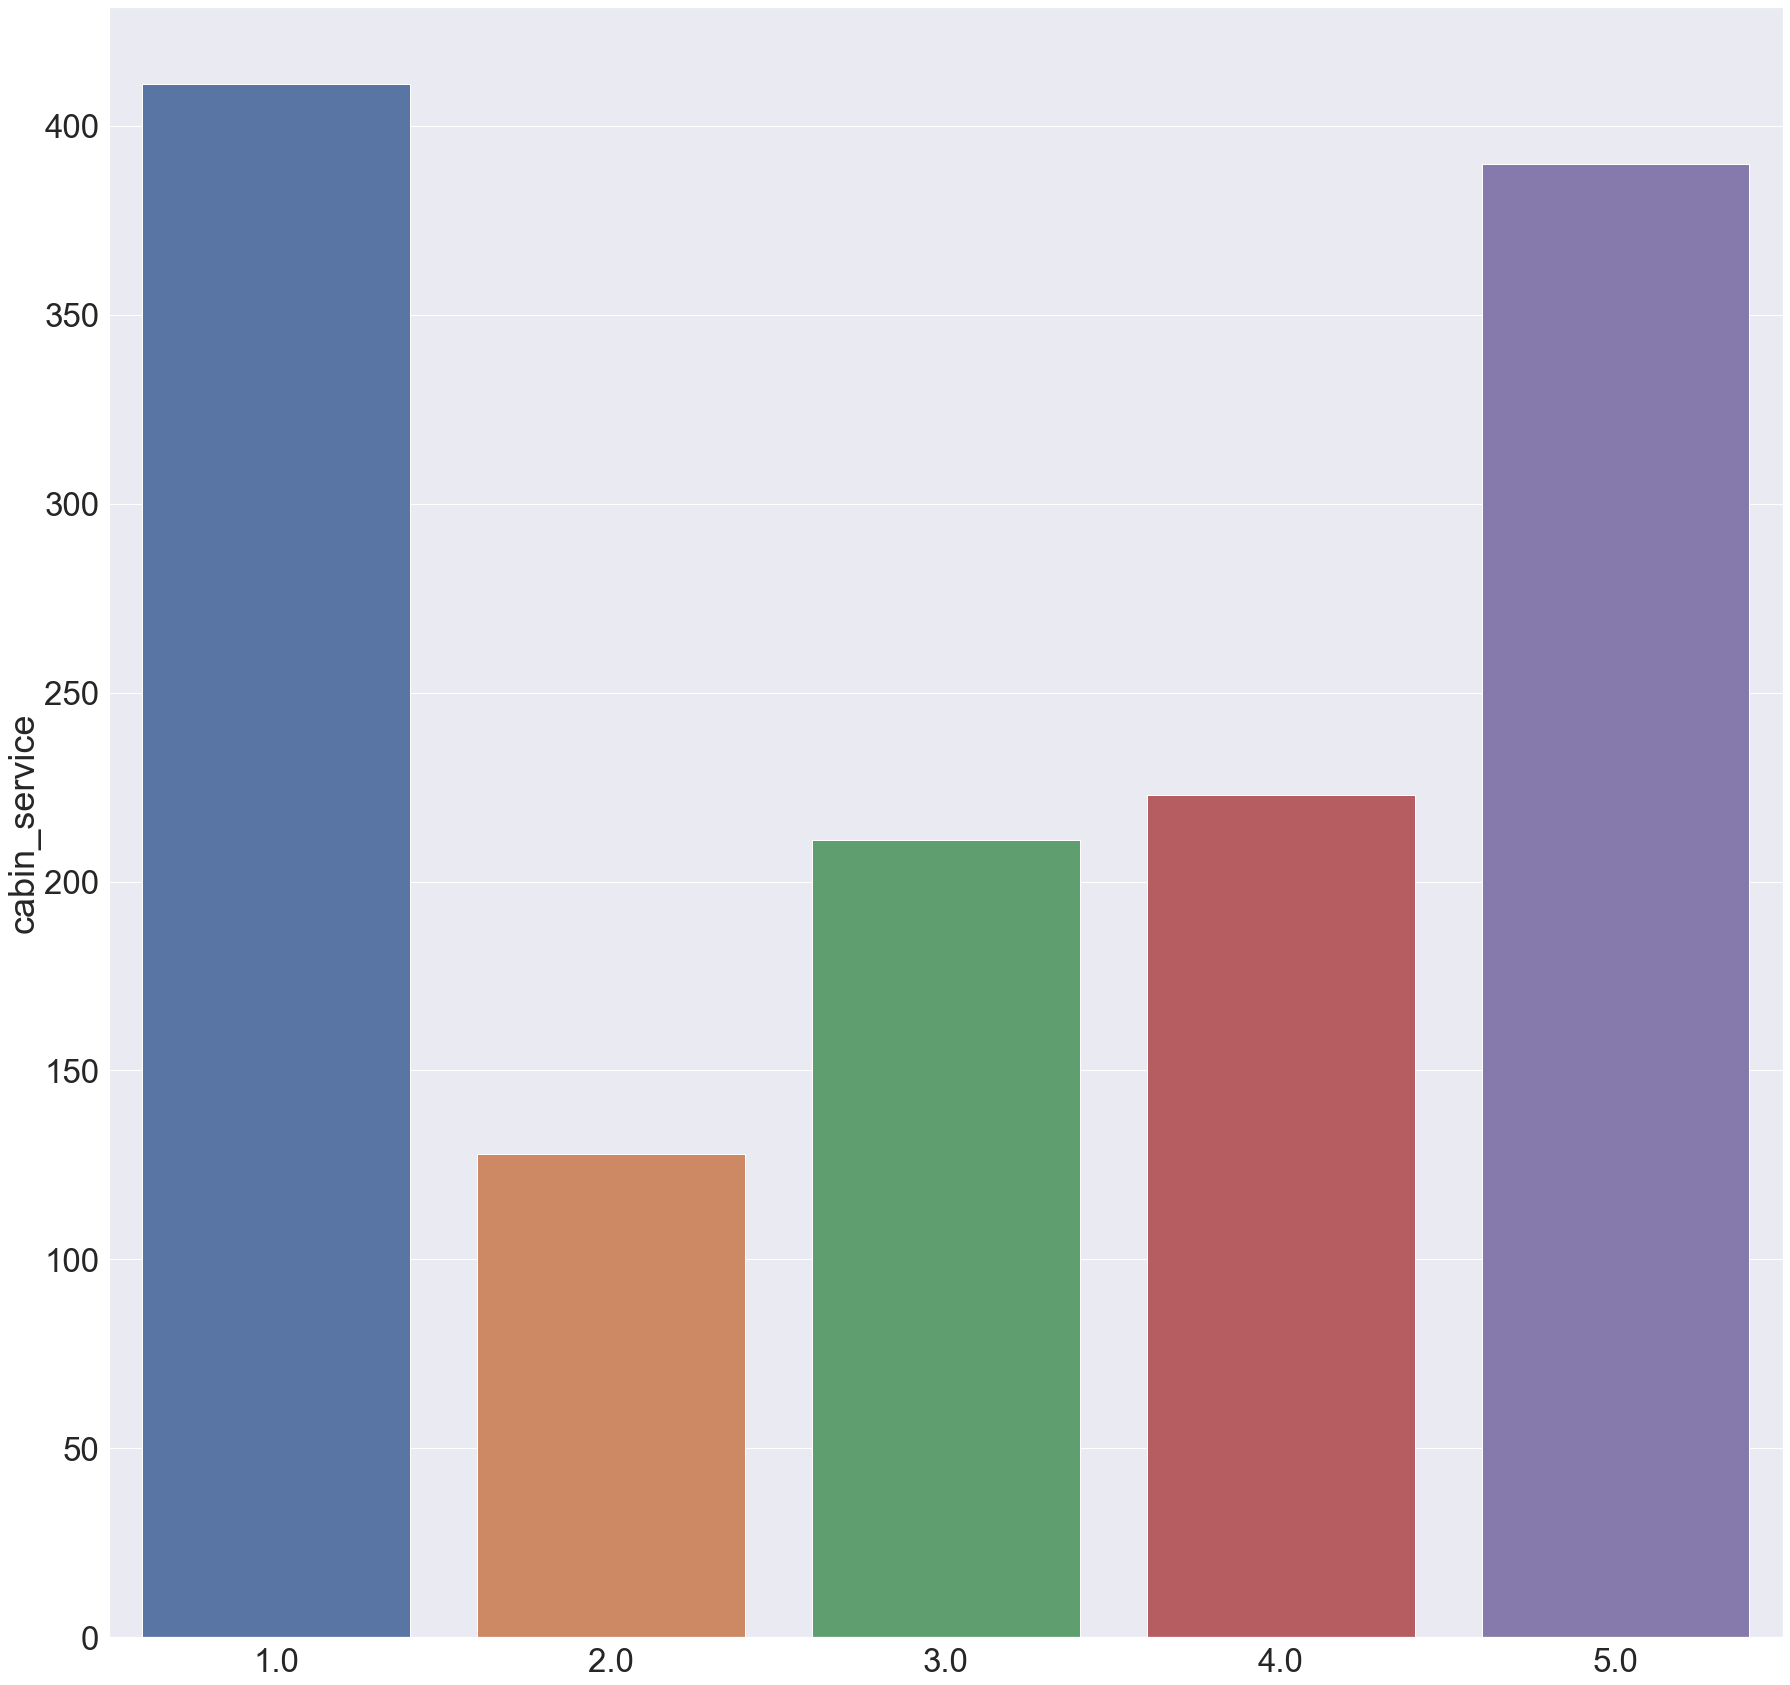

In [85]:
sns.barplot(df_Southwest_Airlines.cabin_service.value_counts().index,df_Southwest_Airlines.cabin_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='food_bev'>

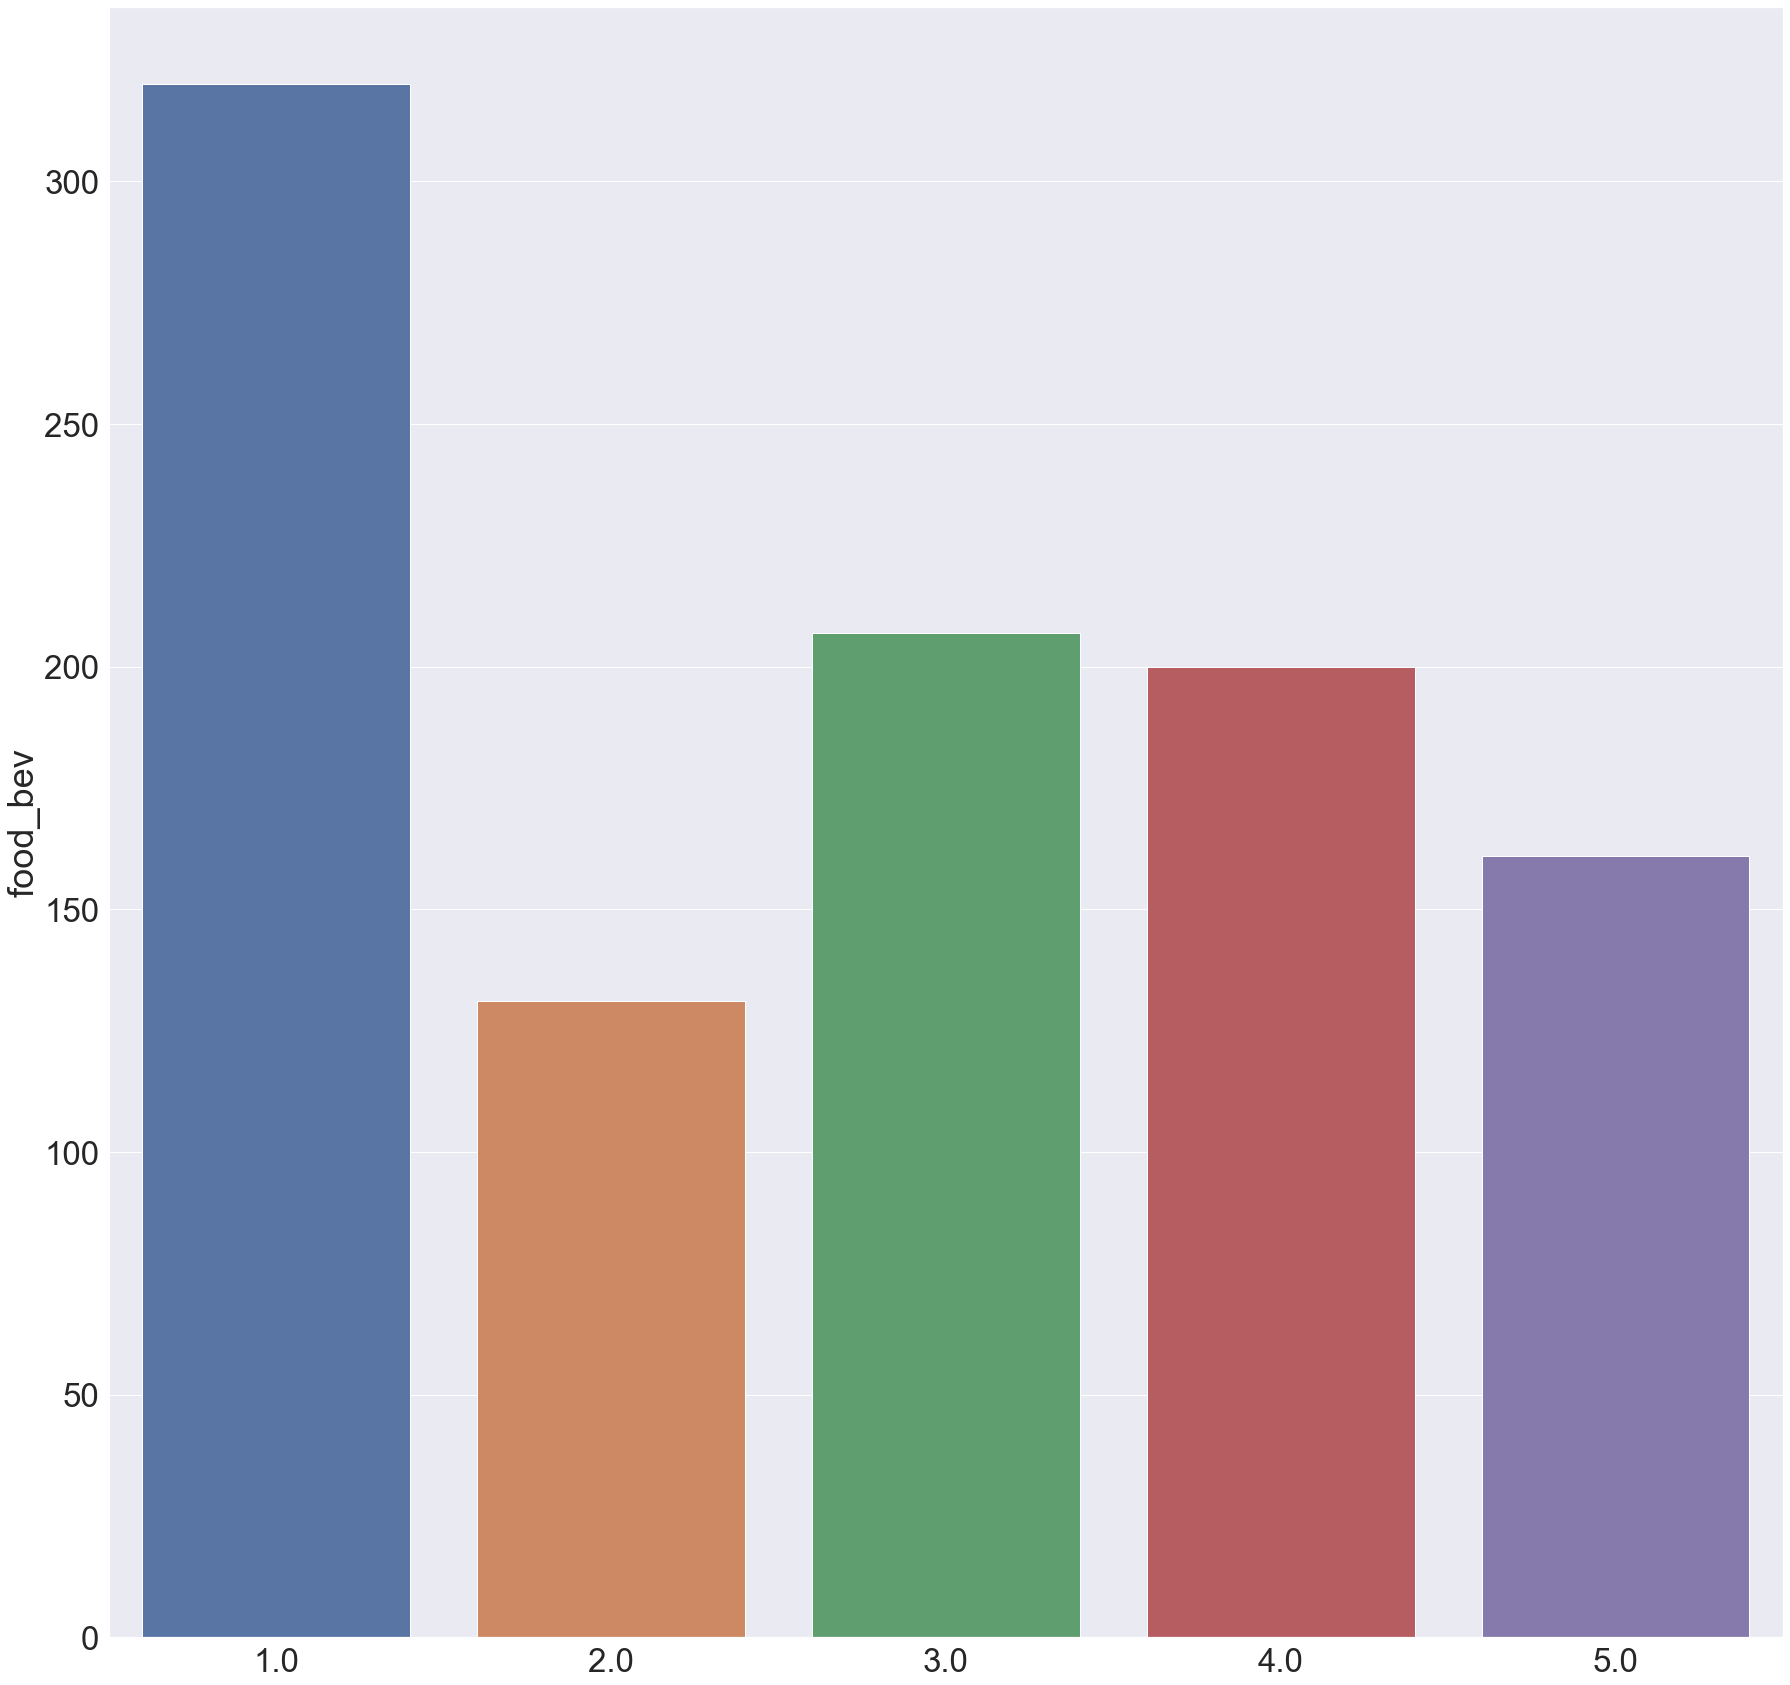

In [86]:
sns.barplot(df_Southwest_Airlines.food_bev.value_counts().index,df_Southwest_Airlines.food_bev.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='entertainment'>

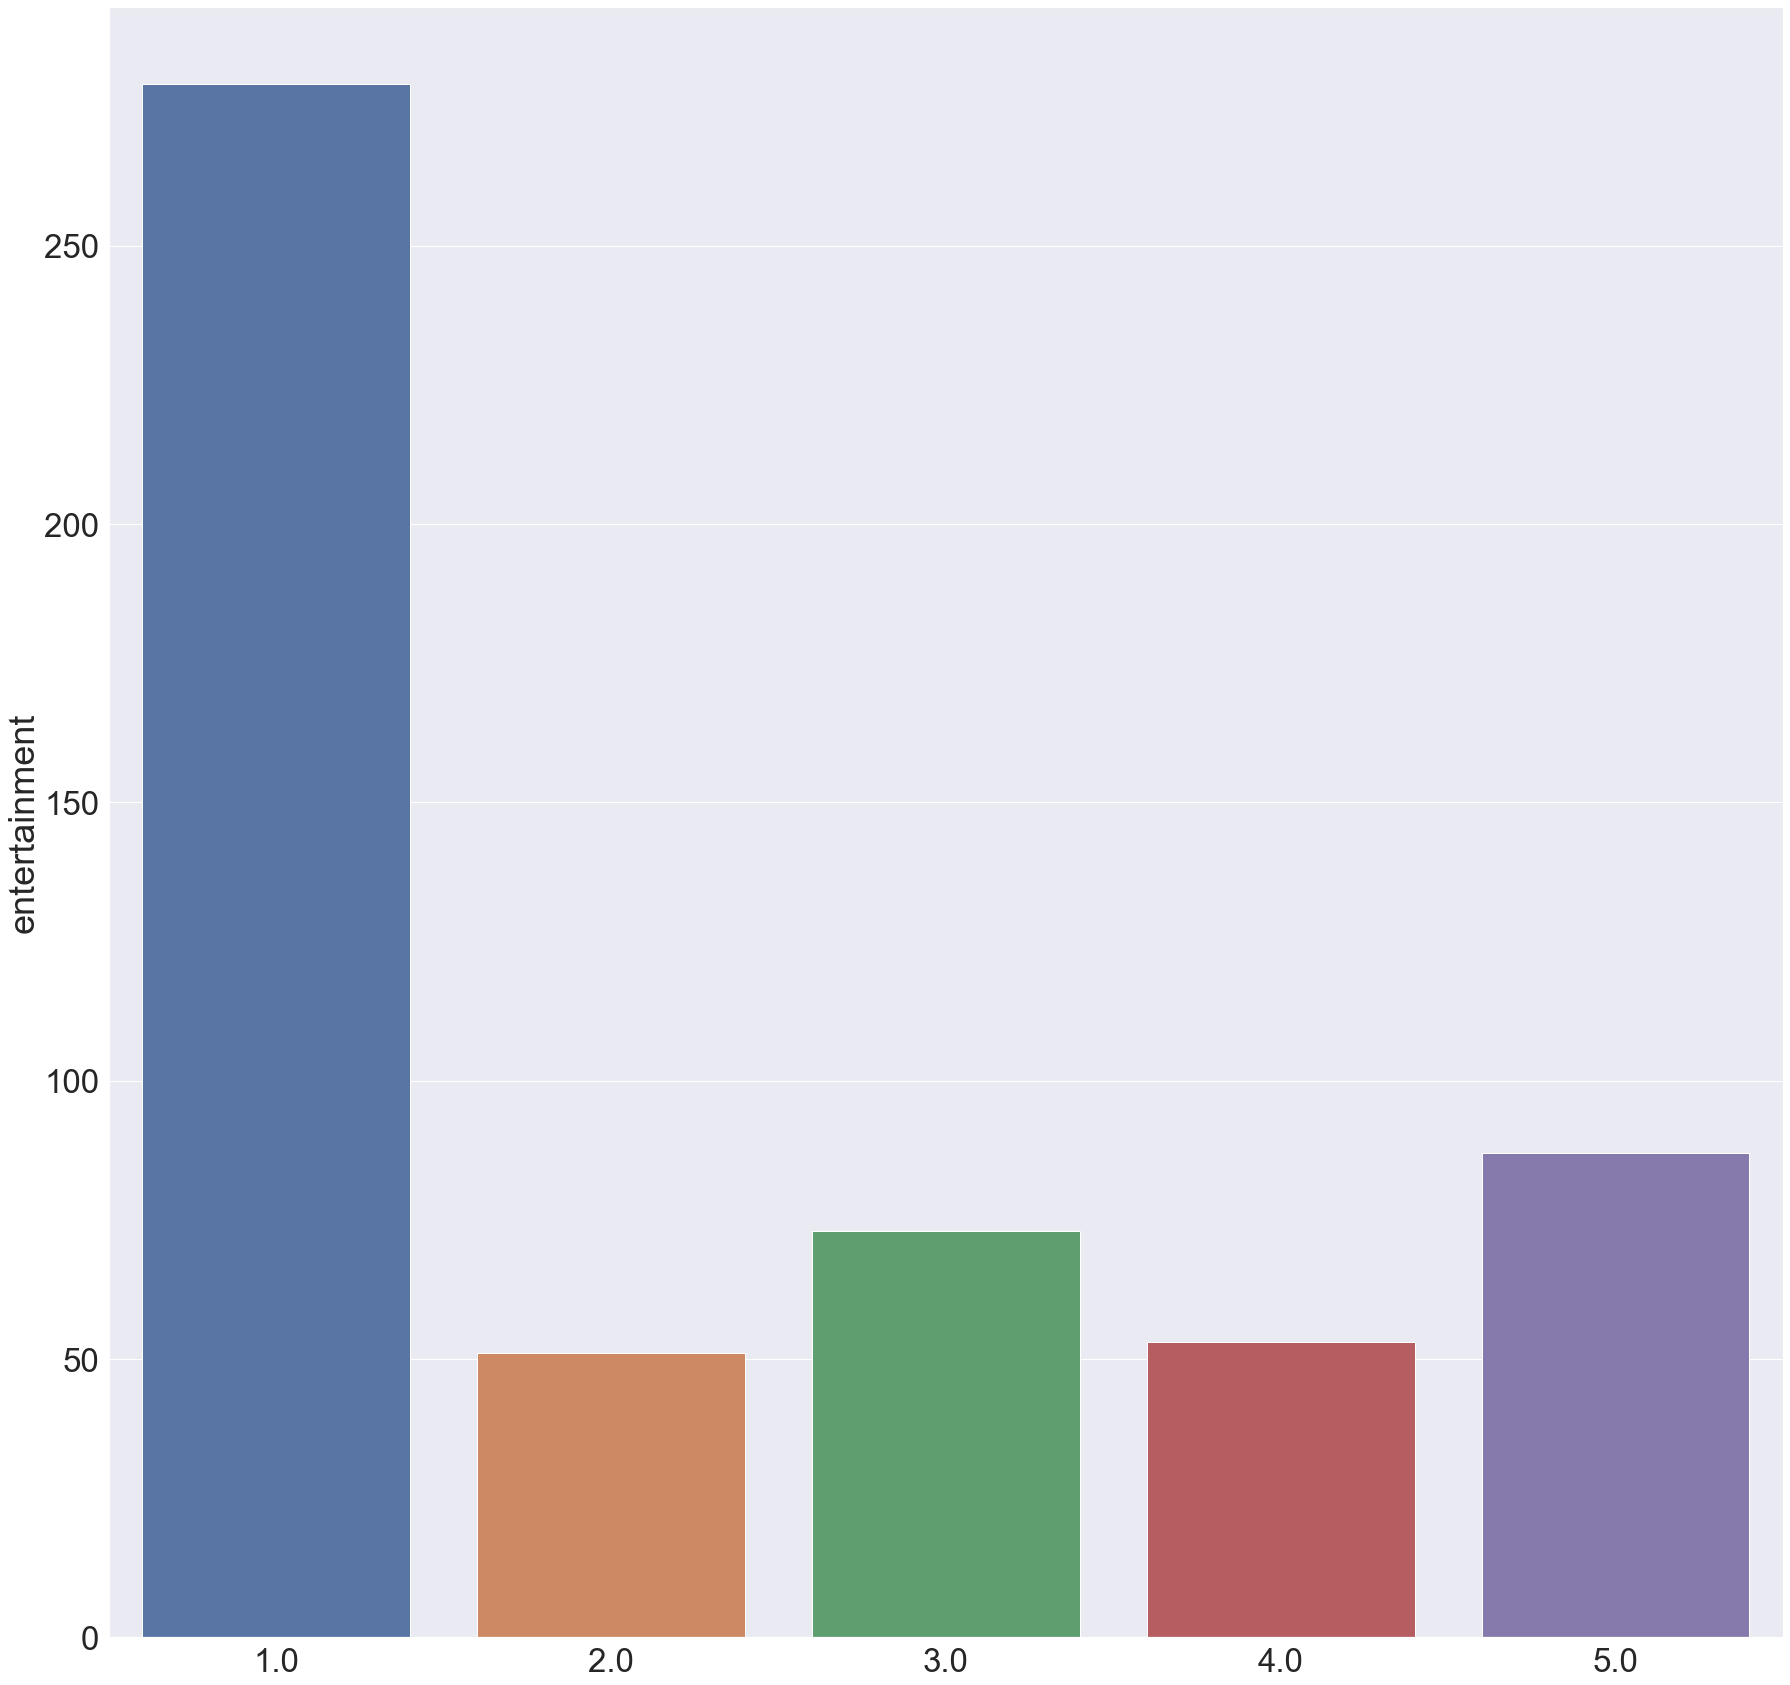

In [87]:
sns.barplot(df_Southwest_Airlines.entertainment.value_counts().index,df_Southwest_Airlines.entertainment.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='ground_service'>

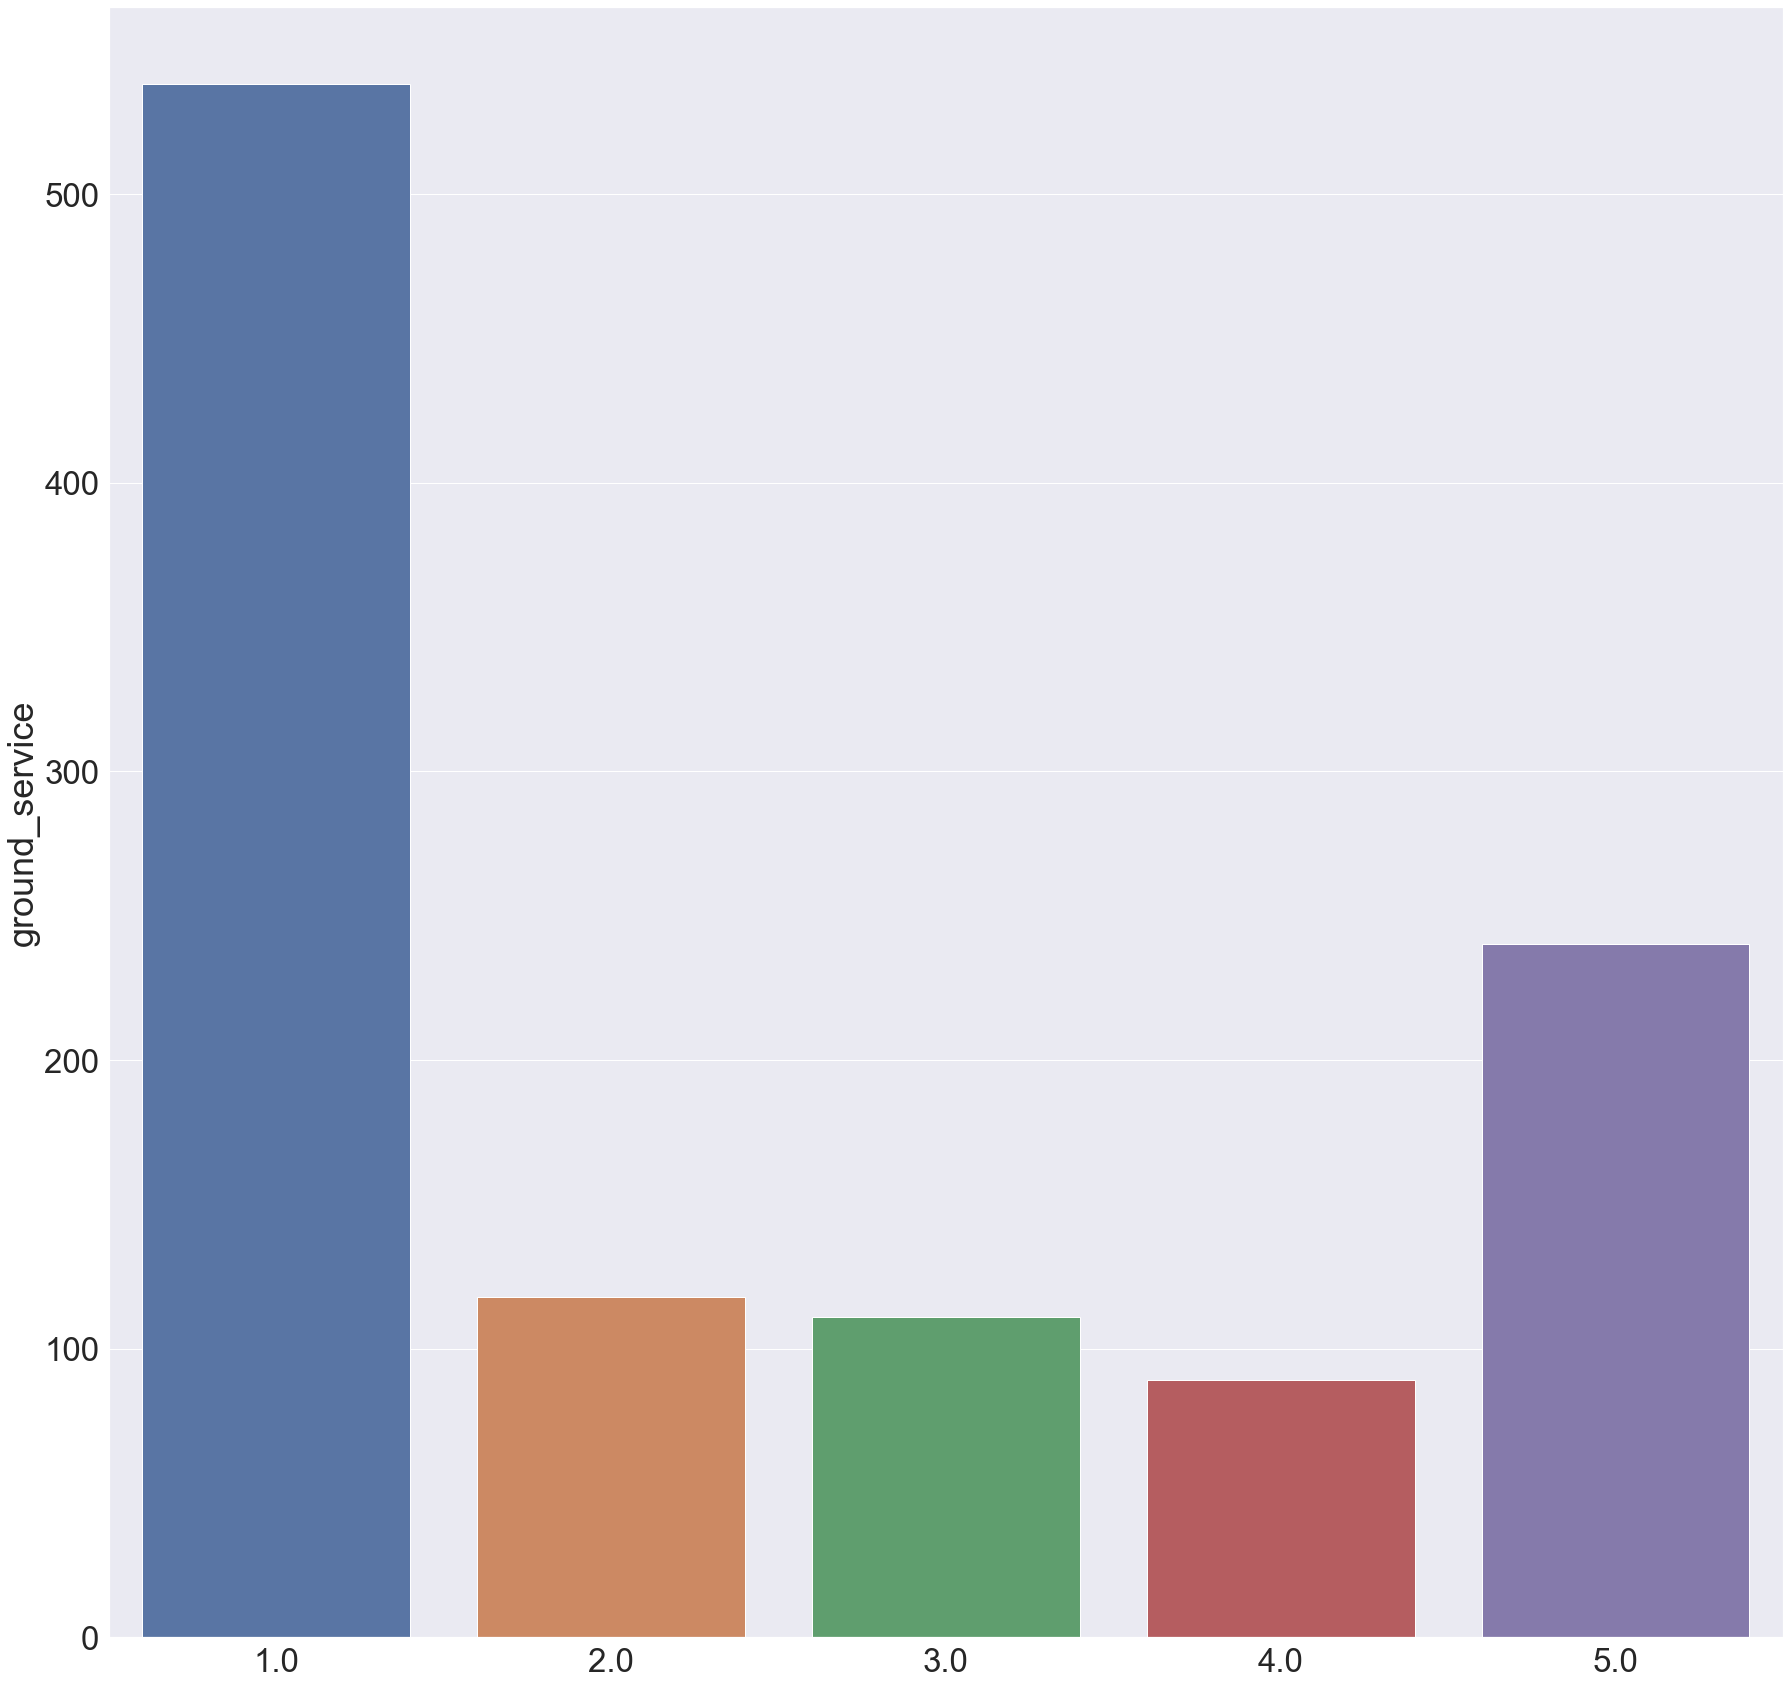

In [88]:
sns.barplot(df_Southwest_Airlines.ground_service.value_counts().index,df_Southwest_Airlines.ground_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='value_for_money'>

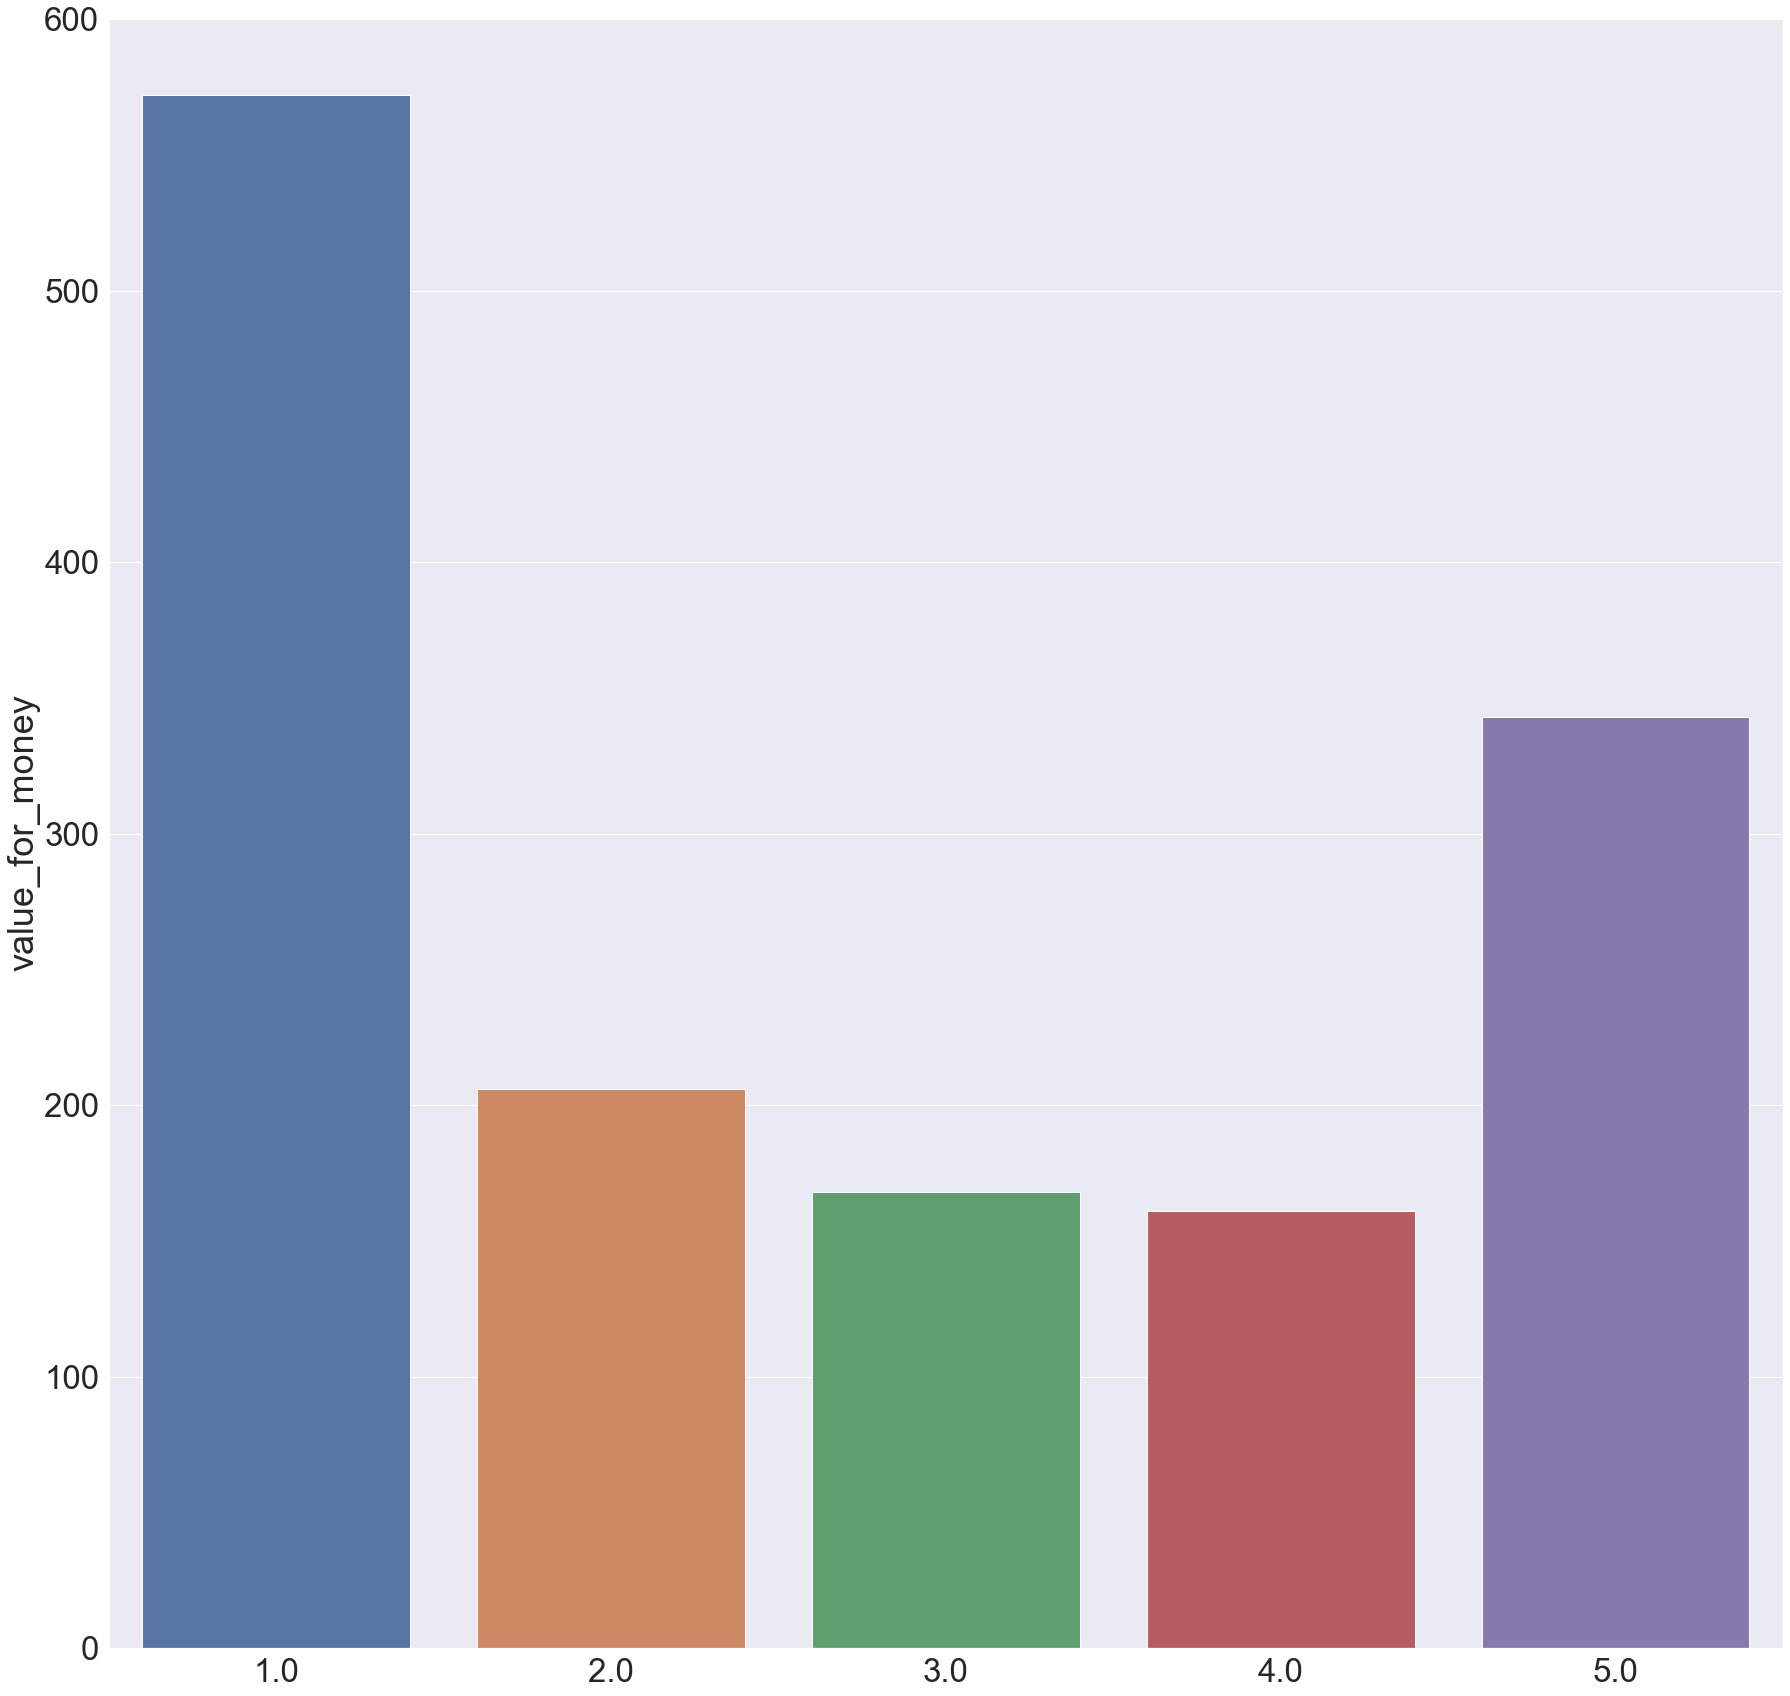

In [89]:
sns.barplot(df_Southwest_Airlines.value_for_money.value_counts().index,df_Southwest_Airlines.value_for_money.value_counts())

In [90]:
df_Southwest_Airlines["flair_sentiment_score"] = df_Southwest_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))

<ipython-input-90-bf5361ff50b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Southwest_Airlines["flair_sentiment_score"] = df_Southwest_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))


In [91]:
df_Southwest_Airlines["flair_sentiment_sentiment"] = df_Southwest_Airlines.customer_review.apply(lambda x: sentiment_value(x))

<ipython-input-91-2e59e6431c8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Southwest_Airlines["flair_sentiment_sentiment"] = df_Southwest_Airlines.customer_review.apply(lambda x: sentiment_value(x))


In [92]:
df_Southwest_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,flair_sentiment_score,flair_sentiment_sentiment
4731,4731,Southwest Airlines,1.0,N Beale,21st May 2022,✅ Trip Verified | They cancelled my flight fro...,NaN,Family Leisure,Economy Class,Colorado Springs to Denver via Detroit,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no,0.999730,NEGATIVE
4732,4732,Southwest Airlines,1.0,R Yates,21st May 2022,✅ Trip Verified | Waited for over an hour with...,Boeing 737,Business,Economy Class,New York to Pittsburgh,22-May,2.0,1.0,NaN,NaN,1.0,1.0,no,0.999995,NEGATIVE
4733,4733,Southwest Airlines,1.0,T Cam,15th May 2022,✅ Trip Verified | Lihue to Los Angeles. Litera...,NaN,Solo Leisure,Economy Class,Lihue to Los Angeles,22-May,2.0,4.0,1.0,1.0,1.0,3.0,no,0.999783,NEGATIVE
4734,4734,Southwest Airlines,2.0,Scott Szczerbiak,14th May 2022,✅ Trip Verified | I have flown Southwest Airli...,Boeing 737,Solo Leisure,Economy Class,Baltimore to Buffalo,22-May,3.0,3.0,2.0,4.0,2.0,3.0,no,0.999969,NEGATIVE
4735,4735,Southwest Airlines,3.0,Tommy Brown,13th May 2022,✅ Trip Verified | As the pilot is doing his sa...,NaN,Business,Economy Class,Nashville to Charleston,21-Jun,3.0,1.0,3.0,NaN,5.0,3.0,no,0.999991,NEGATIVE


In [93]:
df_Southwest_Airlines.describe()

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,flair_sentiment_score
count,1455.000000,1402.000000,1355.000000,1363.000000,1019.000000,543.000000,1096.000000,1450.000000,1455.000000
mean,5458.000000,4.296719,2.688561,3.038885,2.755643,2.296501,2.429745,2.653103,0.984529
std,420.166634,3.657984,1.424250,1.615122,1.468114,1.548278,1.644859,1.630564,0.061915
min,4731.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.508544
25%,5094.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998608
50%,5458.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.999890
75%,5821.500000,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,0.999983
max,6185.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.999999


In [94]:
df_Southwest_Airlines["recommended_new"] = df_Southwest_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)

<ipython-input-94-b91f35e83232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Southwest_Airlines["recommended_new"] = df_Southwest_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)


In [95]:
df_Southwest_Airlines["flair_sentiment_sentiment_new"] = df_Southwest_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)

<ipython-input-95-15aac81b232d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Southwest_Airlines["flair_sentiment_sentiment_new"] = df_Southwest_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)


In [96]:
confusion_matrix(df_Southwest_Airlines["flair_sentiment_sentiment_new"], df_Southwest_Airlines["recommended_new"])

array([[930, 165],
       [ 11, 349]], dtype=int64)

In [97]:
df_Southwest_Airlines["flair_sentiment_sentiment_new"].corr(df_Southwest_Airlines["recommended_new"])

0.7391597292885638

## NLP - ngrams (Southwest Airlines)

In [5]:
customer_review_corpus_Southwest_Airlines = ""

for i,row in df_Southwest_Airlines.iterrows():
    
    customer_review_corpus_Southwest_Airlines += str(row["customer_review"])

In [7]:
import re

In [8]:
customer_review_corpus_Southwest_Airlines = re.sub('[,\.!?â€™]', '', customer_review_corpus_Southwest_Airlines.lower())

In [9]:
customer_review_corpus_Southwest_Airlines = re.sub(r'[^A-Za-z0-9 ]+', '', customer_review_corpus_Southwest_Airlines.lower())

In [13]:
customer_review_corpus_word_tokens_Southwest_Airlines = word_tokenize(customer_review_corpus_Southwest_Airlines)
filtered_customer_review_corpus_word_tokens_Southwest_Airlines = [w for w in customer_review_corpus_word_tokens_Southwest_Airlines if not w.lower() in stop_words]
filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines = " ".join(filtered_customer_review_corpus_word_tokens_Southwest_Airlines)
filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines = re.sub('[!()-;[]{}:\,<>./?@#$%^&*_~]', '', filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines)
filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines = re.sub('":()', '', filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines)
filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines = re.sub("'", '', filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines)
filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines = re.sub("[:()<>]", '', filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines)

In [14]:
filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines = " ".join(lemma.lemmatize(word) for word in filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines.split())

In [16]:
from collections import defaultdict

In [22]:
unigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines):
    unigrams_dye[word] += 1
df_unigrams = pd.DataFrame(sorted(unigrams_dye.items(), key=lambda x: x[1])[::-1])
bigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines, n_gram=2):
    bigrams_dye[word] += 1
df_bigrams = pd.DataFrame(sorted(bigrams_dye.items(), key=lambda x: x[1])[::-1])
trigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines, n_gram=3):
    trigrams_dye[word] += 1
df_trigrams = pd.DataFrame(sorted(trigrams_dye.items(), key=lambda x: x[1])[::-1])
fourgrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Southwest_Airlines, n_gram=4):
    fourgrams_dye[word] += 1
df_fourgrams = pd.DataFrame(sorted(fourgrams_dye.items(), key=lambda x: x[1])[::-1])

In [24]:
import seaborn as sns

In [26]:
N = 10

<AxesSubplot:>

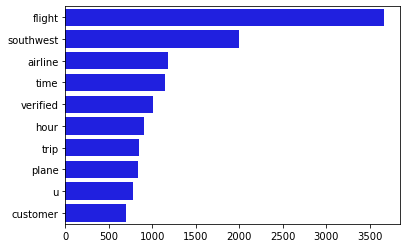

In [27]:
sns.barplot(y=df_unigrams[0].values[:N], x=df_unigrams[1].values[:N], color='blue')

<AxesSubplot:>

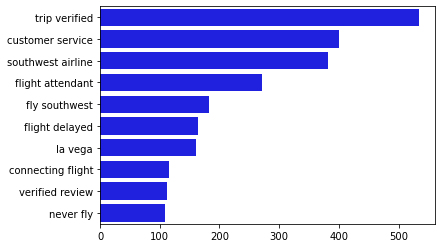

In [28]:
sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N], color='blue')

<AxesSubplot:>

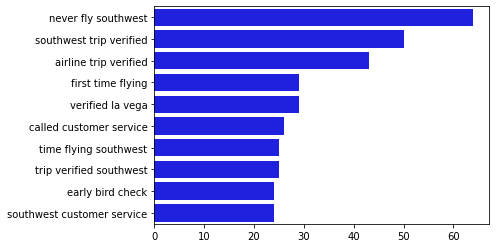

In [31]:
sns.barplot(y=df_trigrams[0].values[0:N], x=df_trigrams[1].values[0:N], color='blue')

<AxesSubplot:>

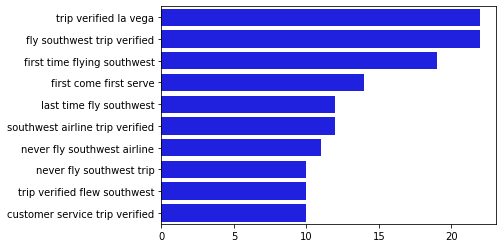

In [32]:
sns.barplot(y=df_fourgrams[0].values[0:N], x=df_fourgrams[1].values[0:N], color='blue')

# Delta Airlines - EDA

In [107]:
df_Delta_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
6186,6186,Delta Air Lines,1.0,J Tyler,23rd May 2022,Not Verified | Imagine not scheduling pilots f...,NaN,Solo Leisure,Economy Class,Atlanta to Omaha,NaN,1.0,3.0,2.0,1.0,1.0,1.0,no
6187,6187,Delta Air Lines,1.0,Alan Lappy,23rd May 2022,Not Verified | Something changed since I used ...,NaN,Couple Leisure,Economy Class,Jamaica to Detroit via New York,NaN,5.0,4.0,2.0,5.0,1.0,1.0,no
6188,6188,Delta Air Lines,1.0,R Heale,22nd May 2022,"✅ Trip Verified | On Saturday, May 21, at 12 n...",NaN,Couple Leisure,First Class,Fort Myers to Detroit,NaN,1.0,1.0,NaN,NaN,1.0,1.0,no
6189,6189,Delta Air Lines,1.0,Rosonna Comers,22nd May 2022,Not Verified | Delta canceled my flight with l...,NaN,Family Leisure,Economy Class,Huntsville to Milwaukee via Atlantia,NaN,NaN,NaN,NaN,NaN,2.0,1.0,no
6190,6190,Delta Air Lines,1.0,J Rayne,22nd May 2022,✅ Trip Verified | Sad to say that Delta isn't ...,NaN,Couple Leisure,First Class,La Guardia to Milwaukee,NaN,4.0,3.0,1.0,1.0,1.0,1.0,no


In [108]:
df_Delta_Airlines.shape

(618, 18)

In [109]:
df_Delta_Airlines.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [110]:
df_Delta_Airlines.recommended.nunique()

2

In [111]:
df_Delta_Airlines.recommended.value_counts()

no     498
yes    120
Name: recommended, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='recommended'>

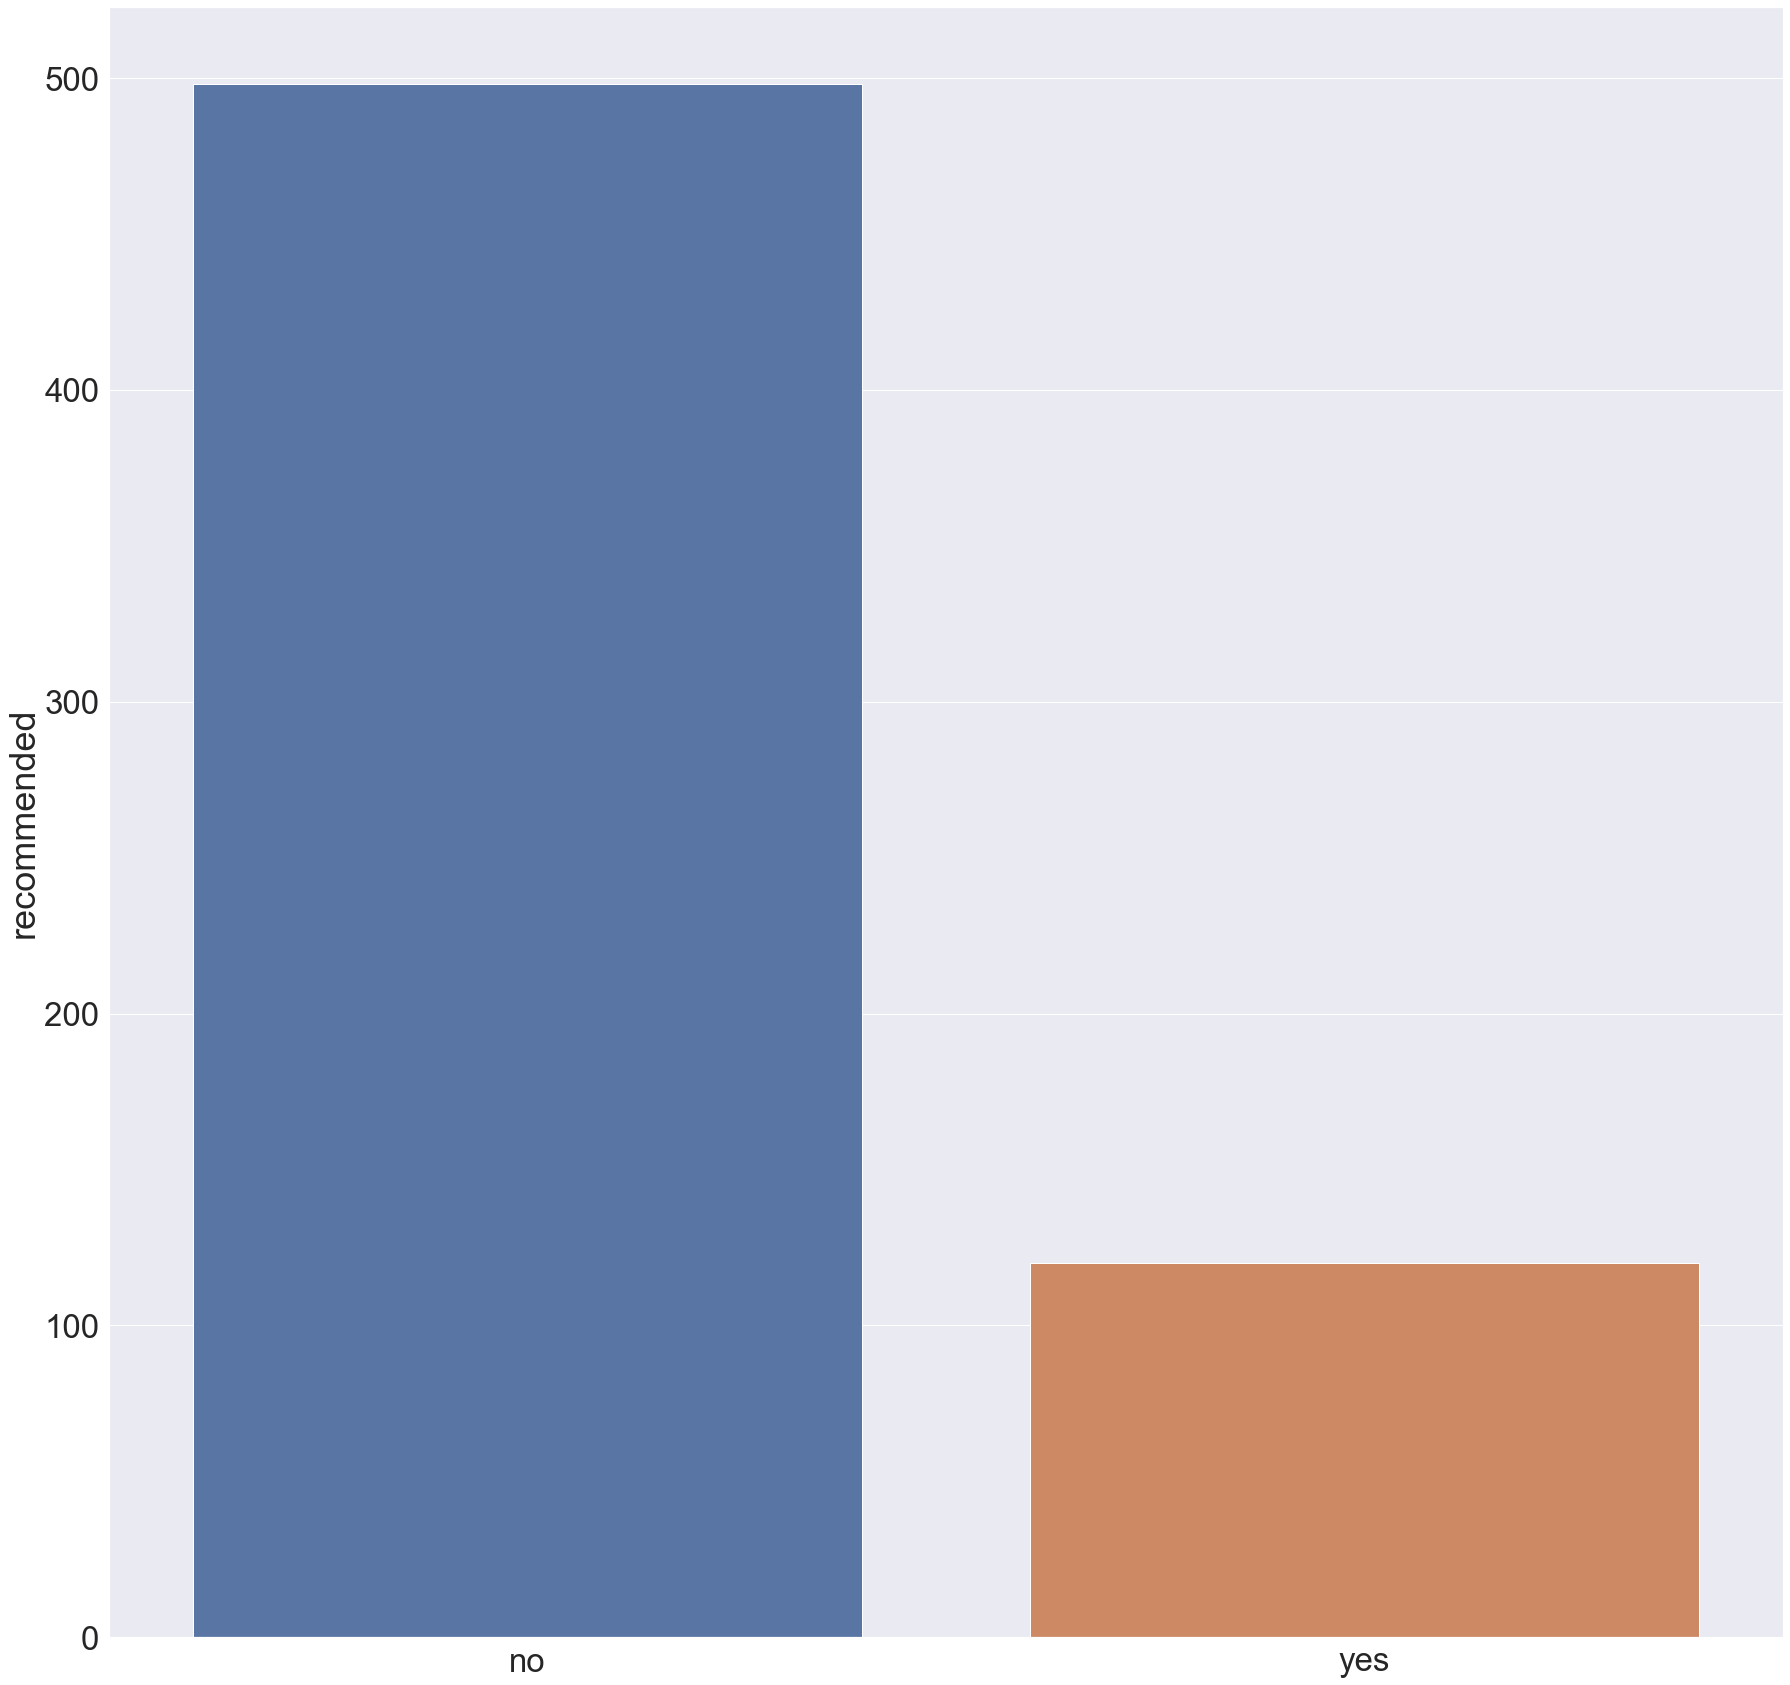

In [112]:
sns.barplot(df_Delta_Airlines.recommended.value_counts().index,df_Delta_Airlines.recommended.value_counts())

In [113]:
df_Delta_Airlines.overall.value_counts()

1.0     377
2.0      67
10.0     52
3.0      37
9.0      24
8.0      18
7.0      13
4.0      13
5.0      12
6.0       5
Name: overall, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='overall'>

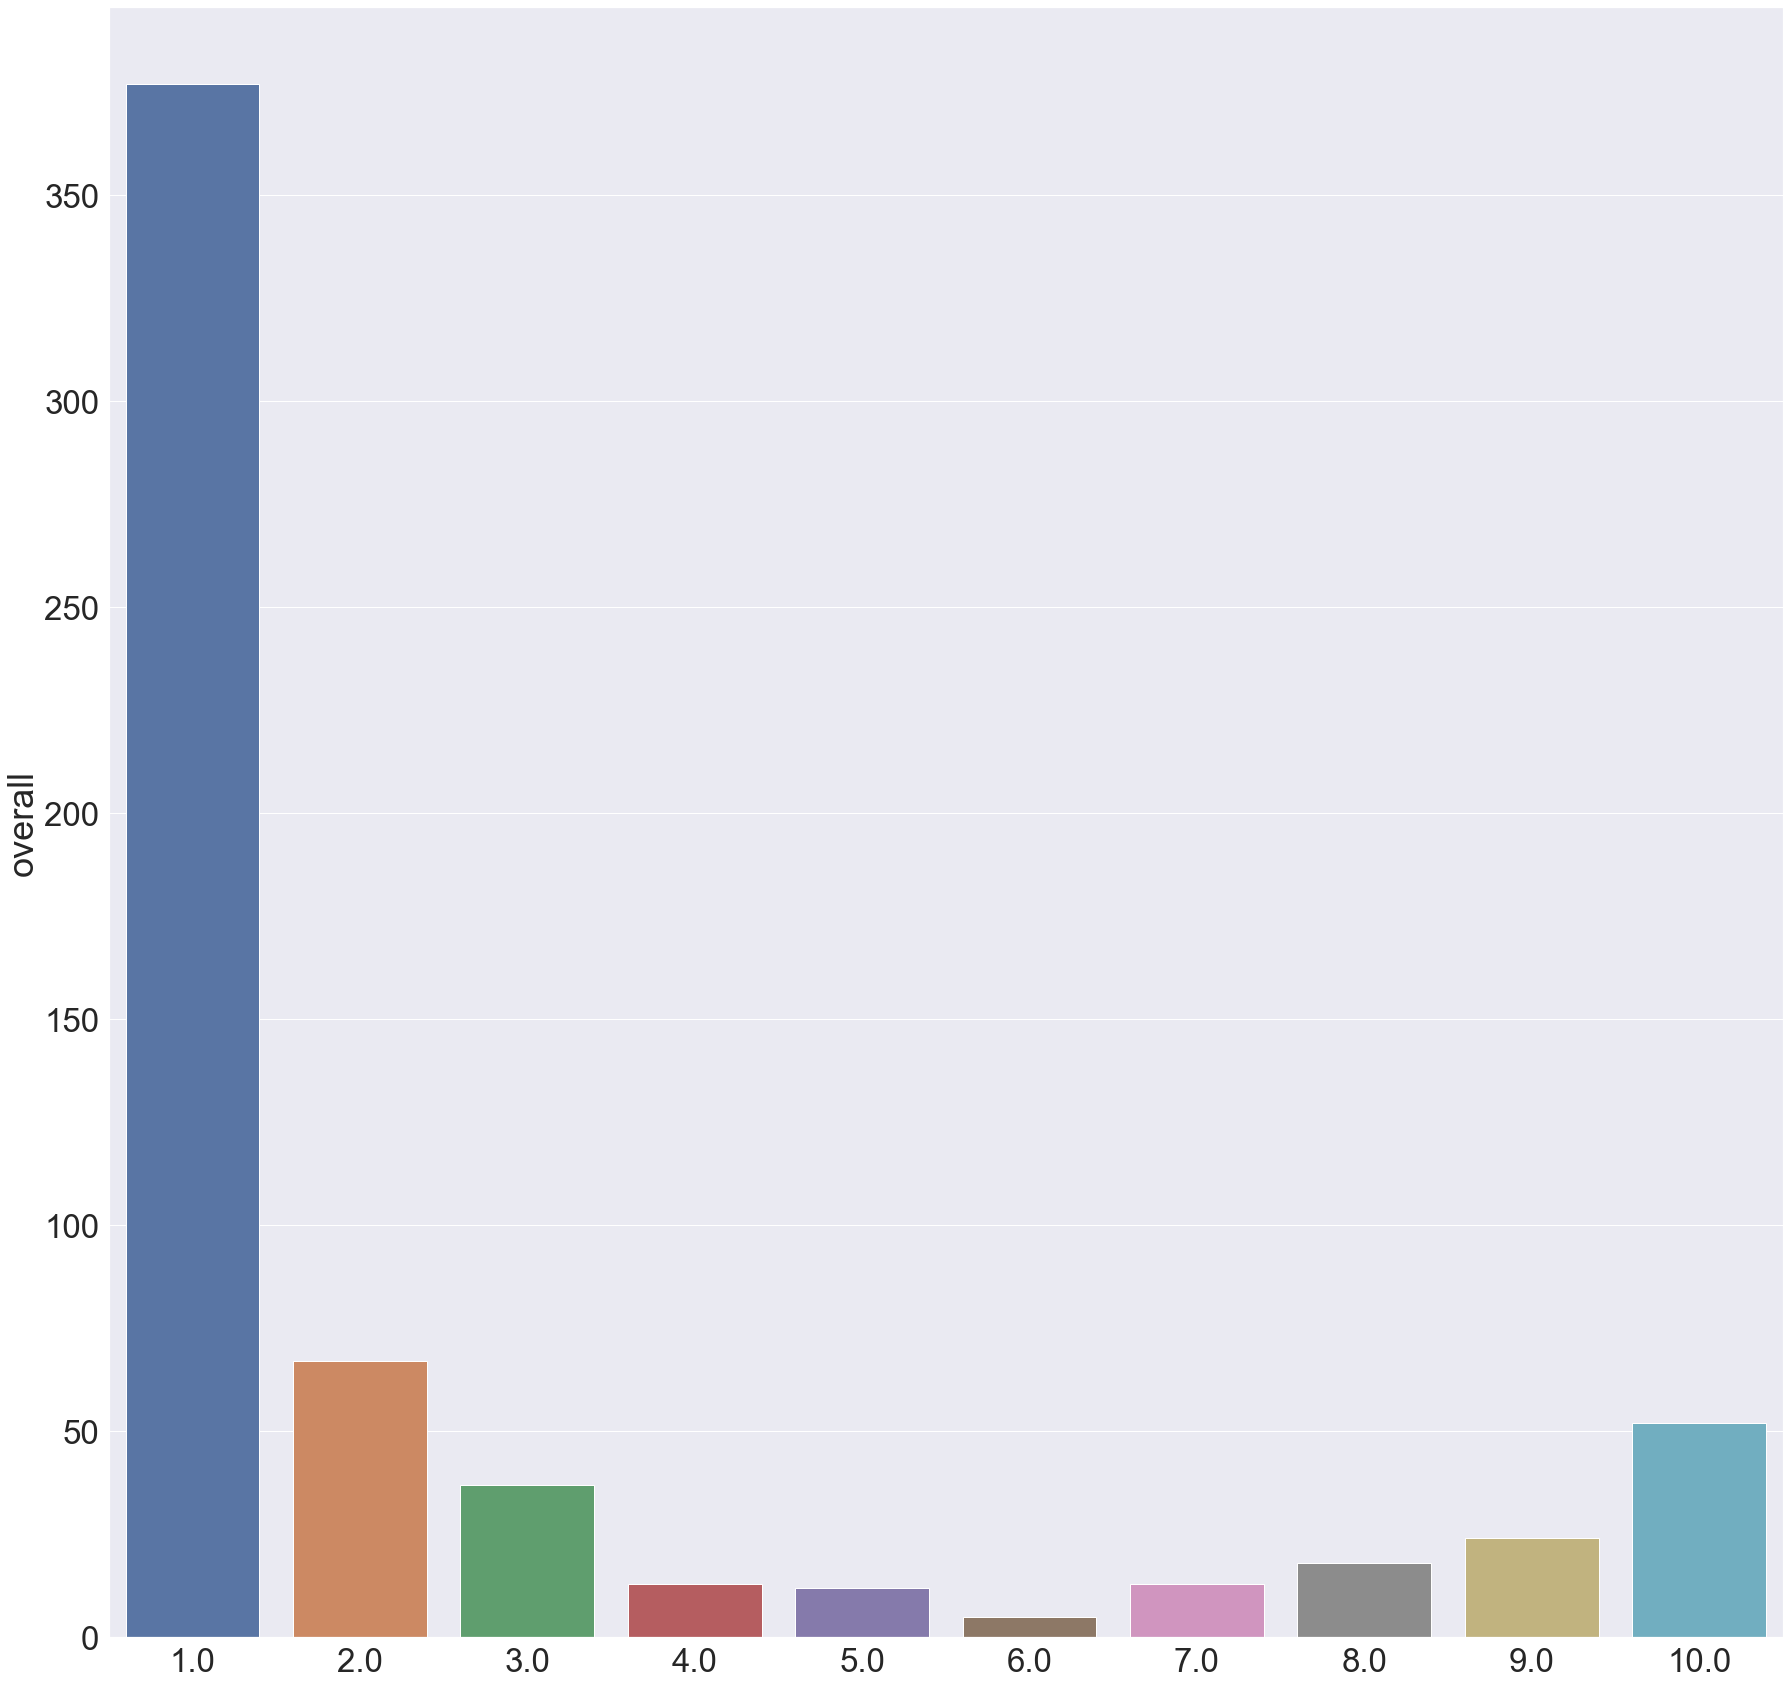

In [114]:
sns.barplot(df_Delta_Airlines.overall.value_counts().index,df_Delta_Airlines.overall.value_counts())

In [115]:
df_Delta_Airlines.aircraft.nunique()

53

In [116]:
df_Delta_Airlines.aircraft.unique()

array([nan, 'Boeing 717-200', 'unknown', 'Boeing 767-300',
       'Boeing 737-800', 'A350 / A330-900NEO', 'Boeing 757', 'A321-200',
       'A321 / Boeing 717-200', 'Boeing 777-300 ER', 'Boeing 717', 'A321',
       'A350-900', 'E175', 'A330 neo-900', 'A330', 'Boeing 757-200',
       'Boeing 787-10', 'Boeing 737', 'A330-900', 'ERJ-175',
       'Embraer 175', 'E M175', 'A340', 'Boeing 737-900', 'B8/900',
       'Boeing 737-800/900', 'Boeing 737-9', 'A320', 'B787', 'Boeing 767',
       'Boeing 787-9', 'Boeing 777-200', 'Embraer', 'CRJ200', 'EMB145-XR',
       'Boeing 777', 'Boeing 787', 'BA9402', 'Boeing 777-300ER', 'E145',
       'Boeing 737 / 757', 'Boeing 737-800W', 'Embraer ERJ-135',
       'Boeing 737-800NG', 'E170', 'Boeing 787-10 / 777-300ER',
       'Boeing 767-322 (ER)', 'Cj200', 'A319', 'Boeing 737-700',
       'Boeing 757-300', 'CRJ-700', 'Airbus'], dtype=object)

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aircraft'>

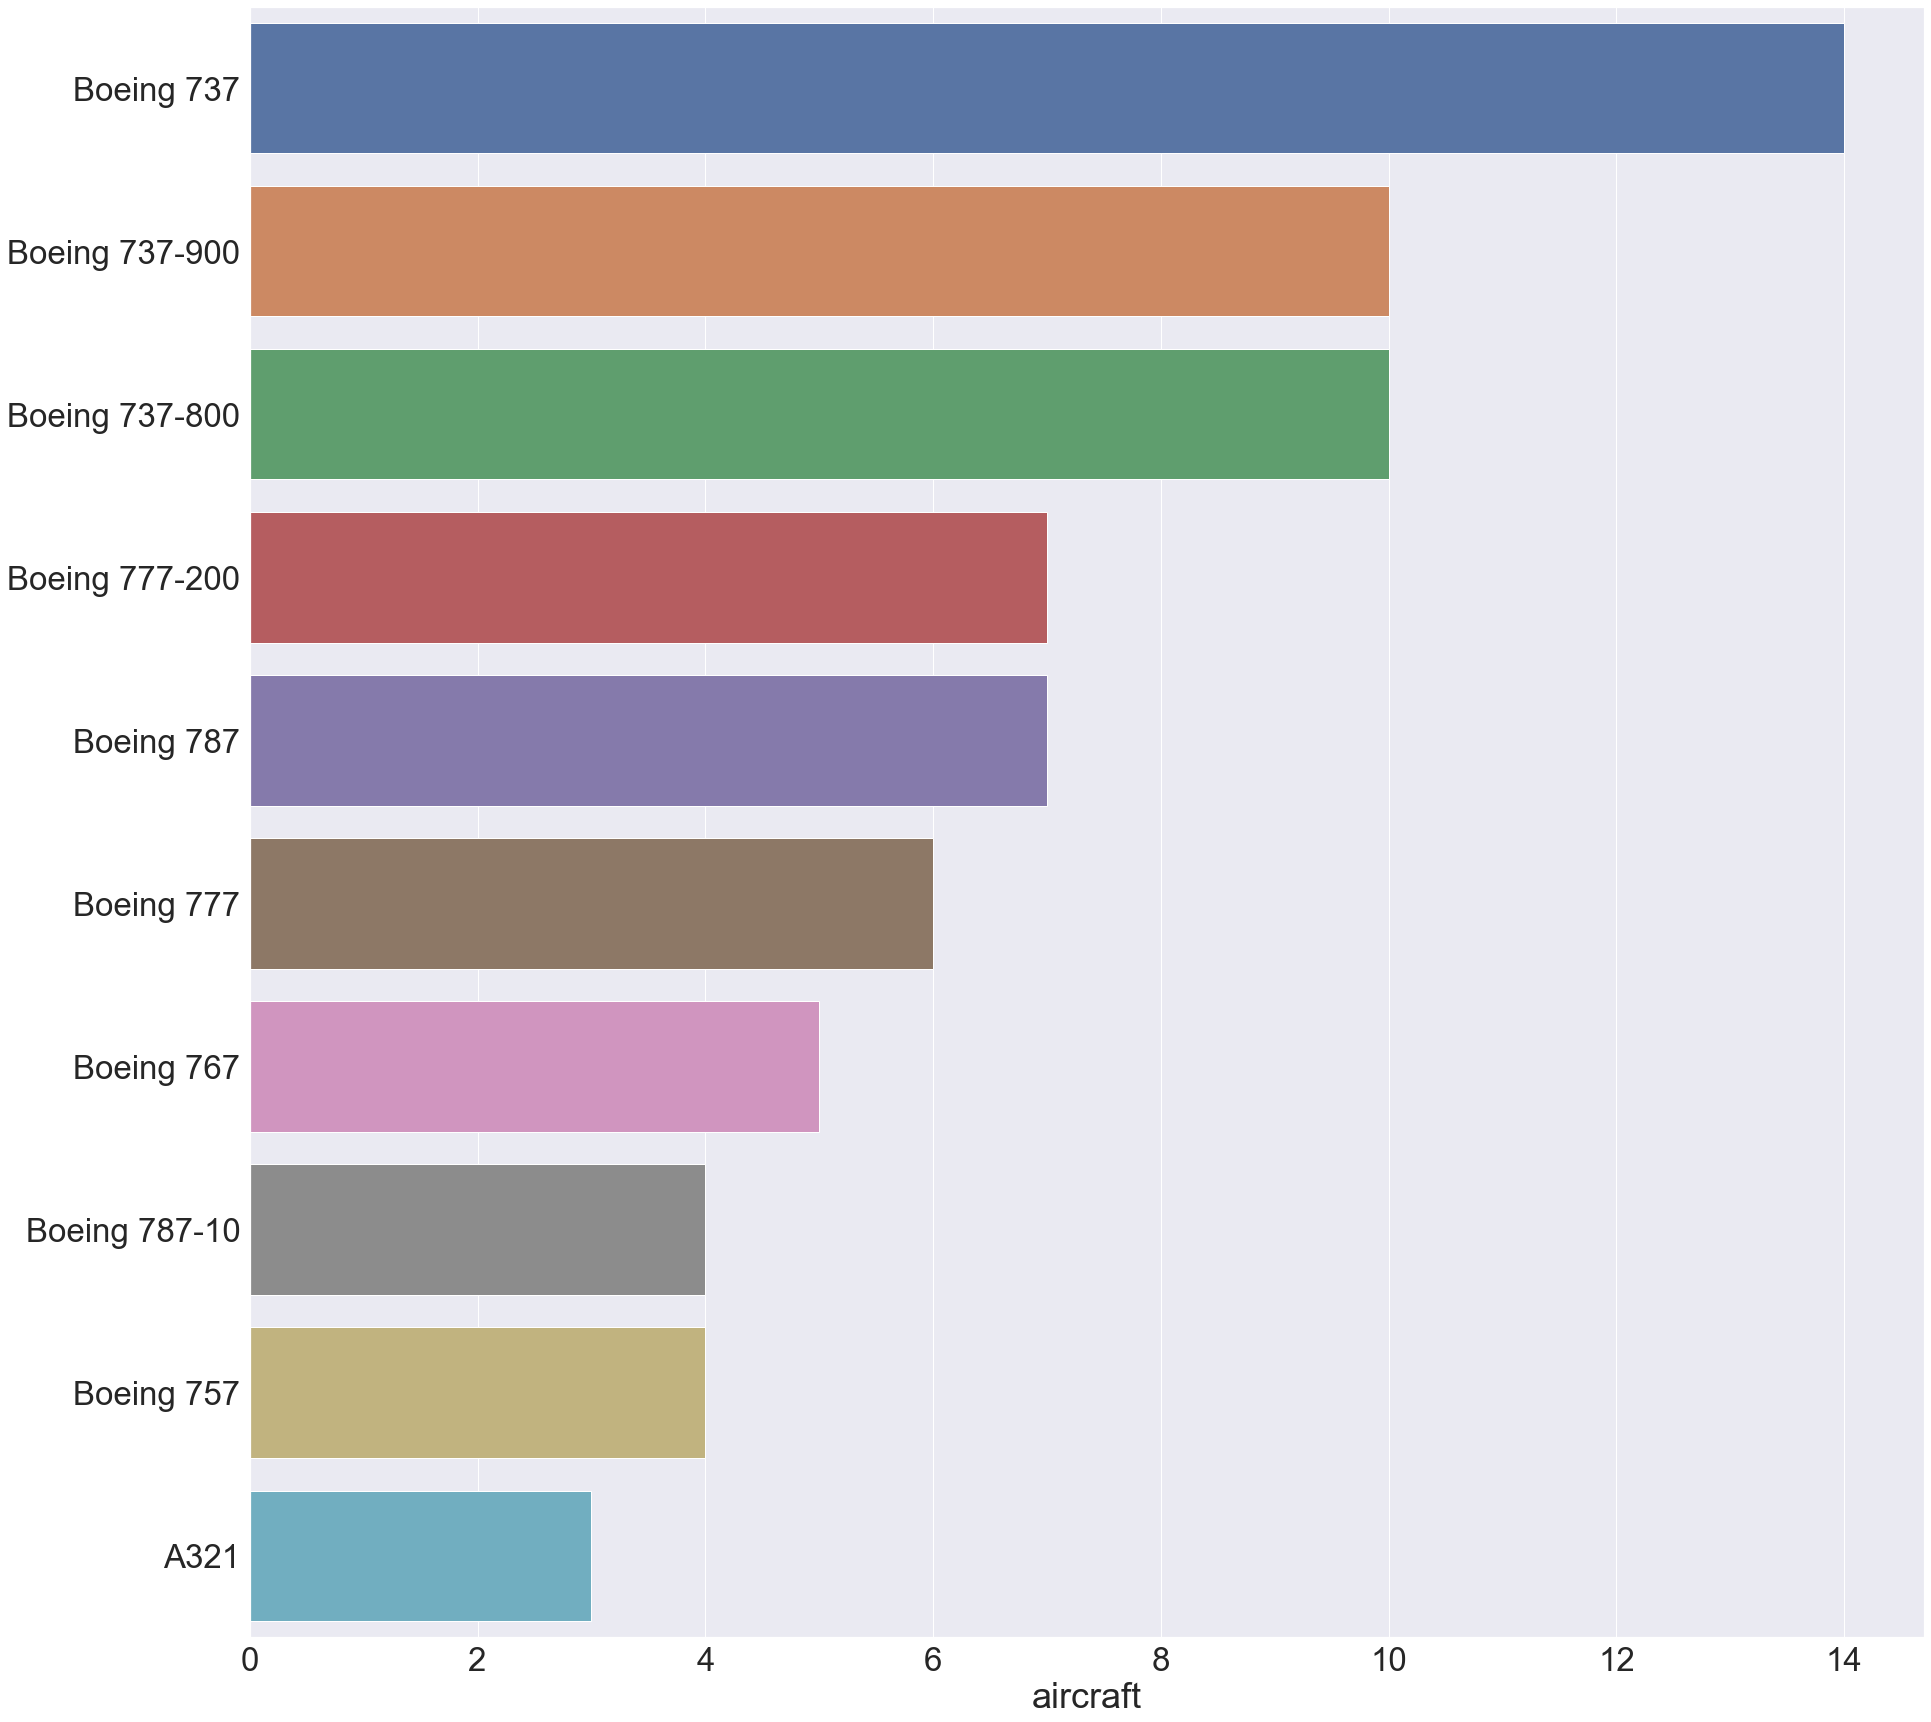

In [117]:
sns.barplot(df_Delta_Airlines.aircraft.value_counts()[:10],df_Delta_Airlines.aircraft.value_counts()[:10].index,orient = "h")

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='traveller_type'>

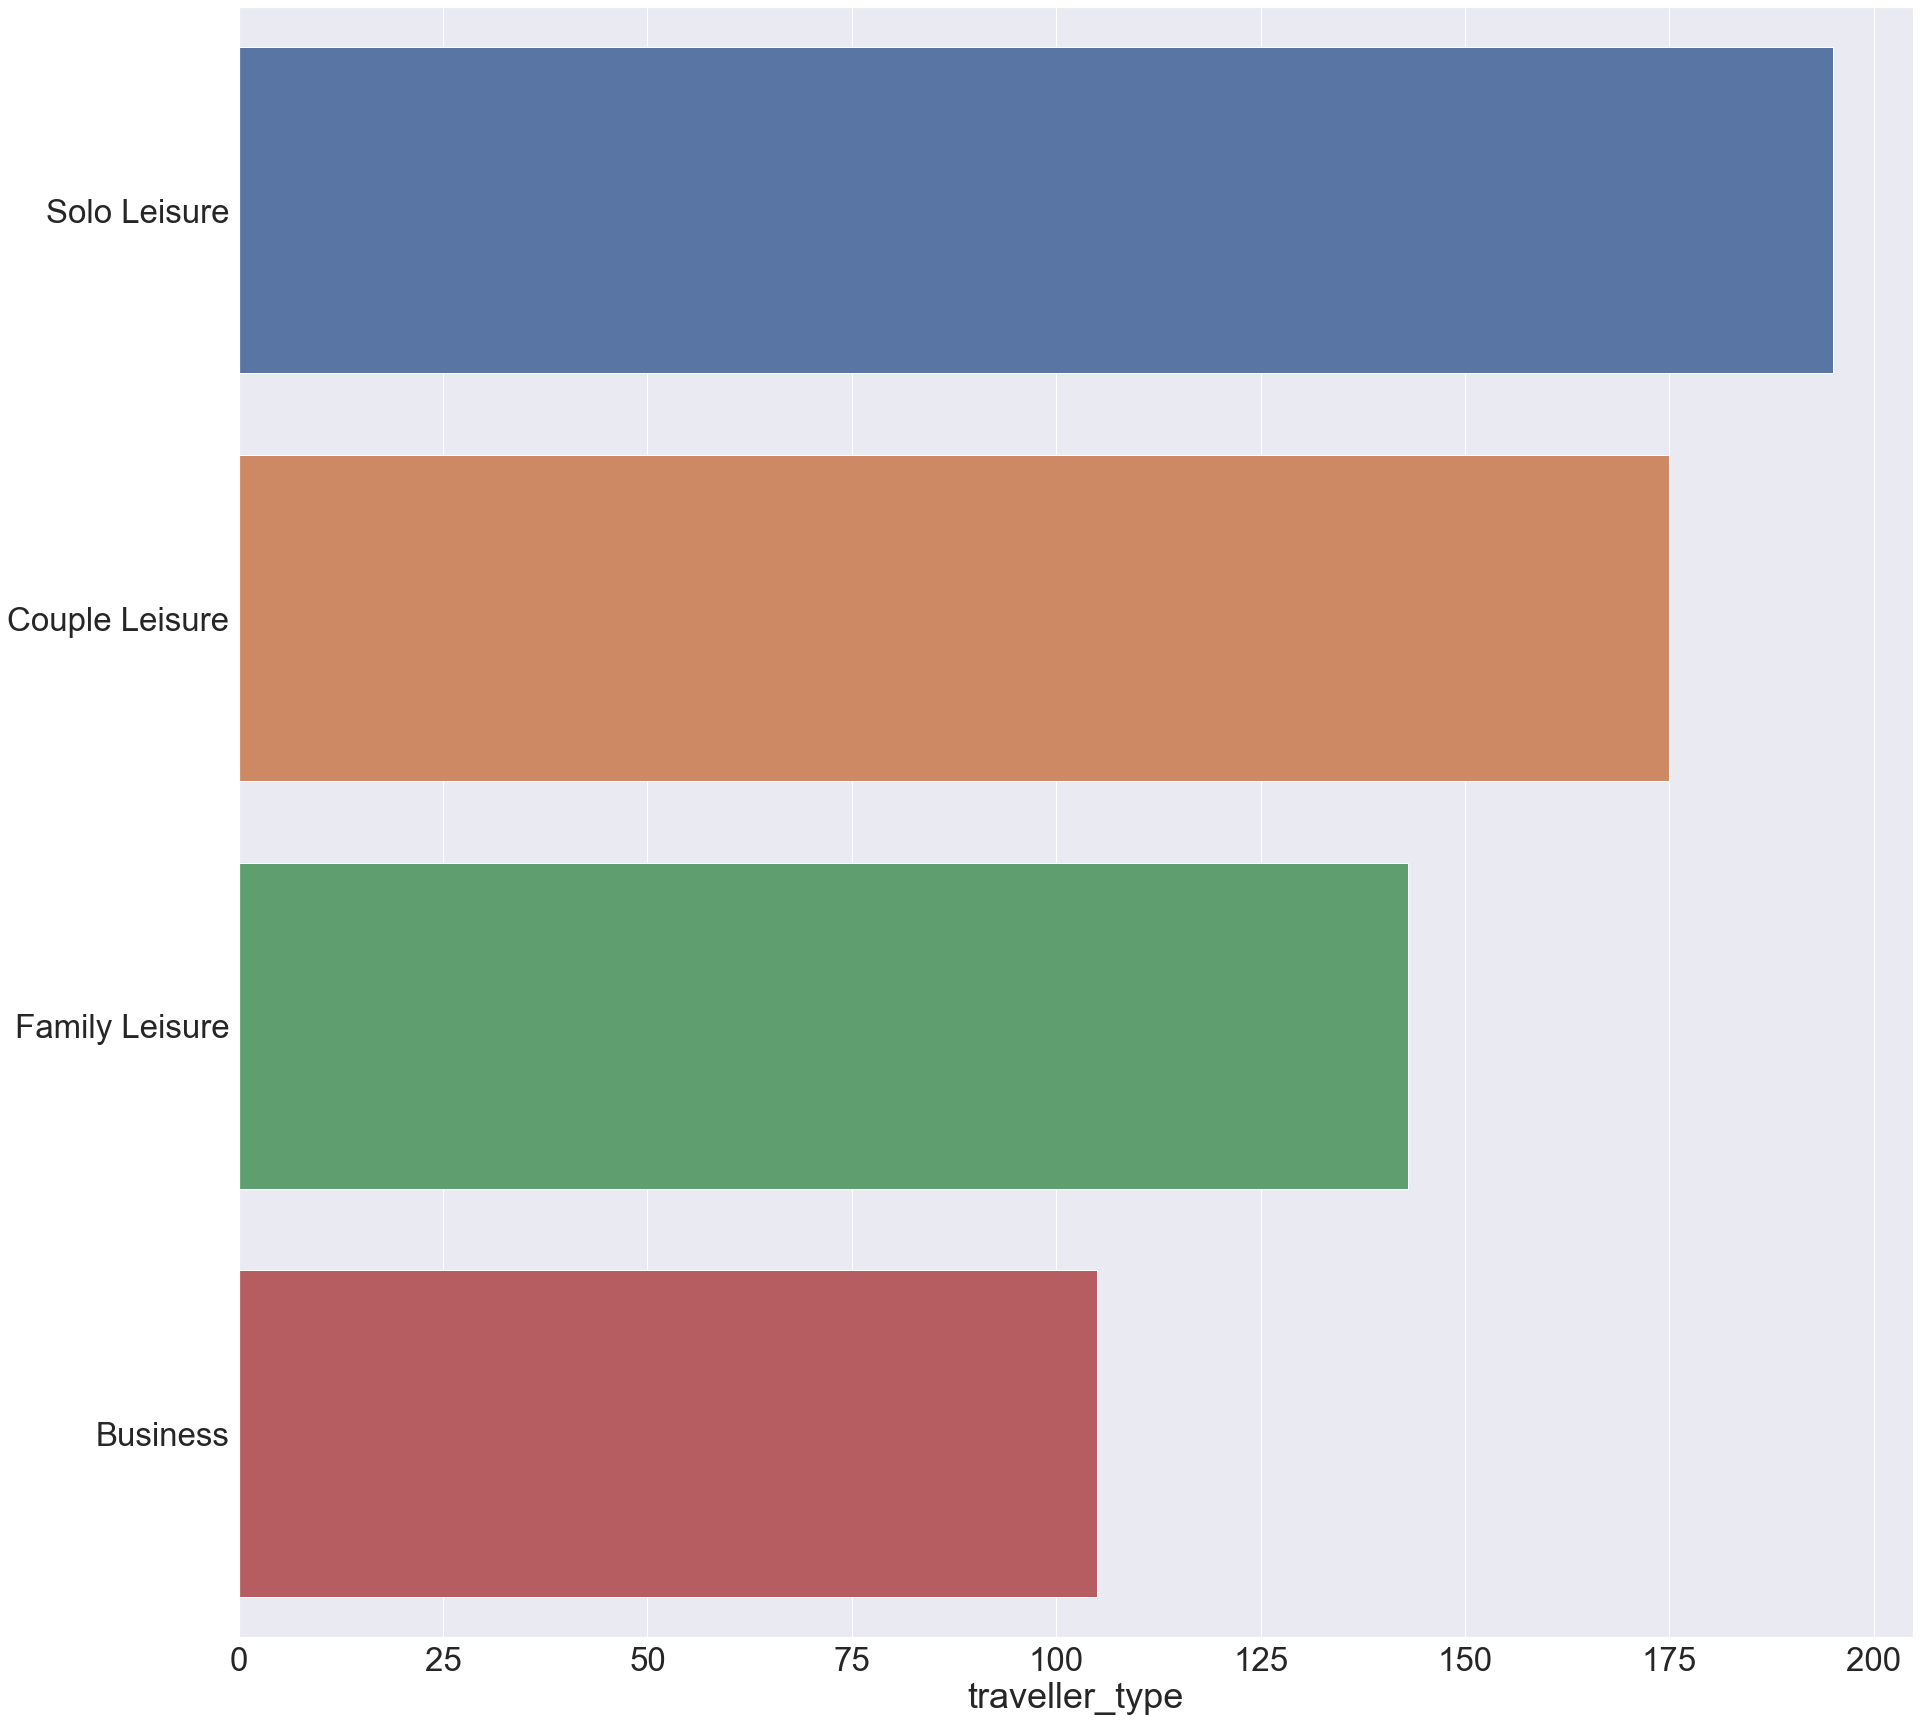

In [118]:
sns.barplot(df_Delta_Airlines.traveller_type.value_counts(),df_Delta_Airlines.traveller_type.value_counts().index)

In [119]:
df_Delta_Airlines.cabin.value_counts()

Economy Class      490
Premium Economy     53
First Class         42
Business Class      33
Name: cabin, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabin'>

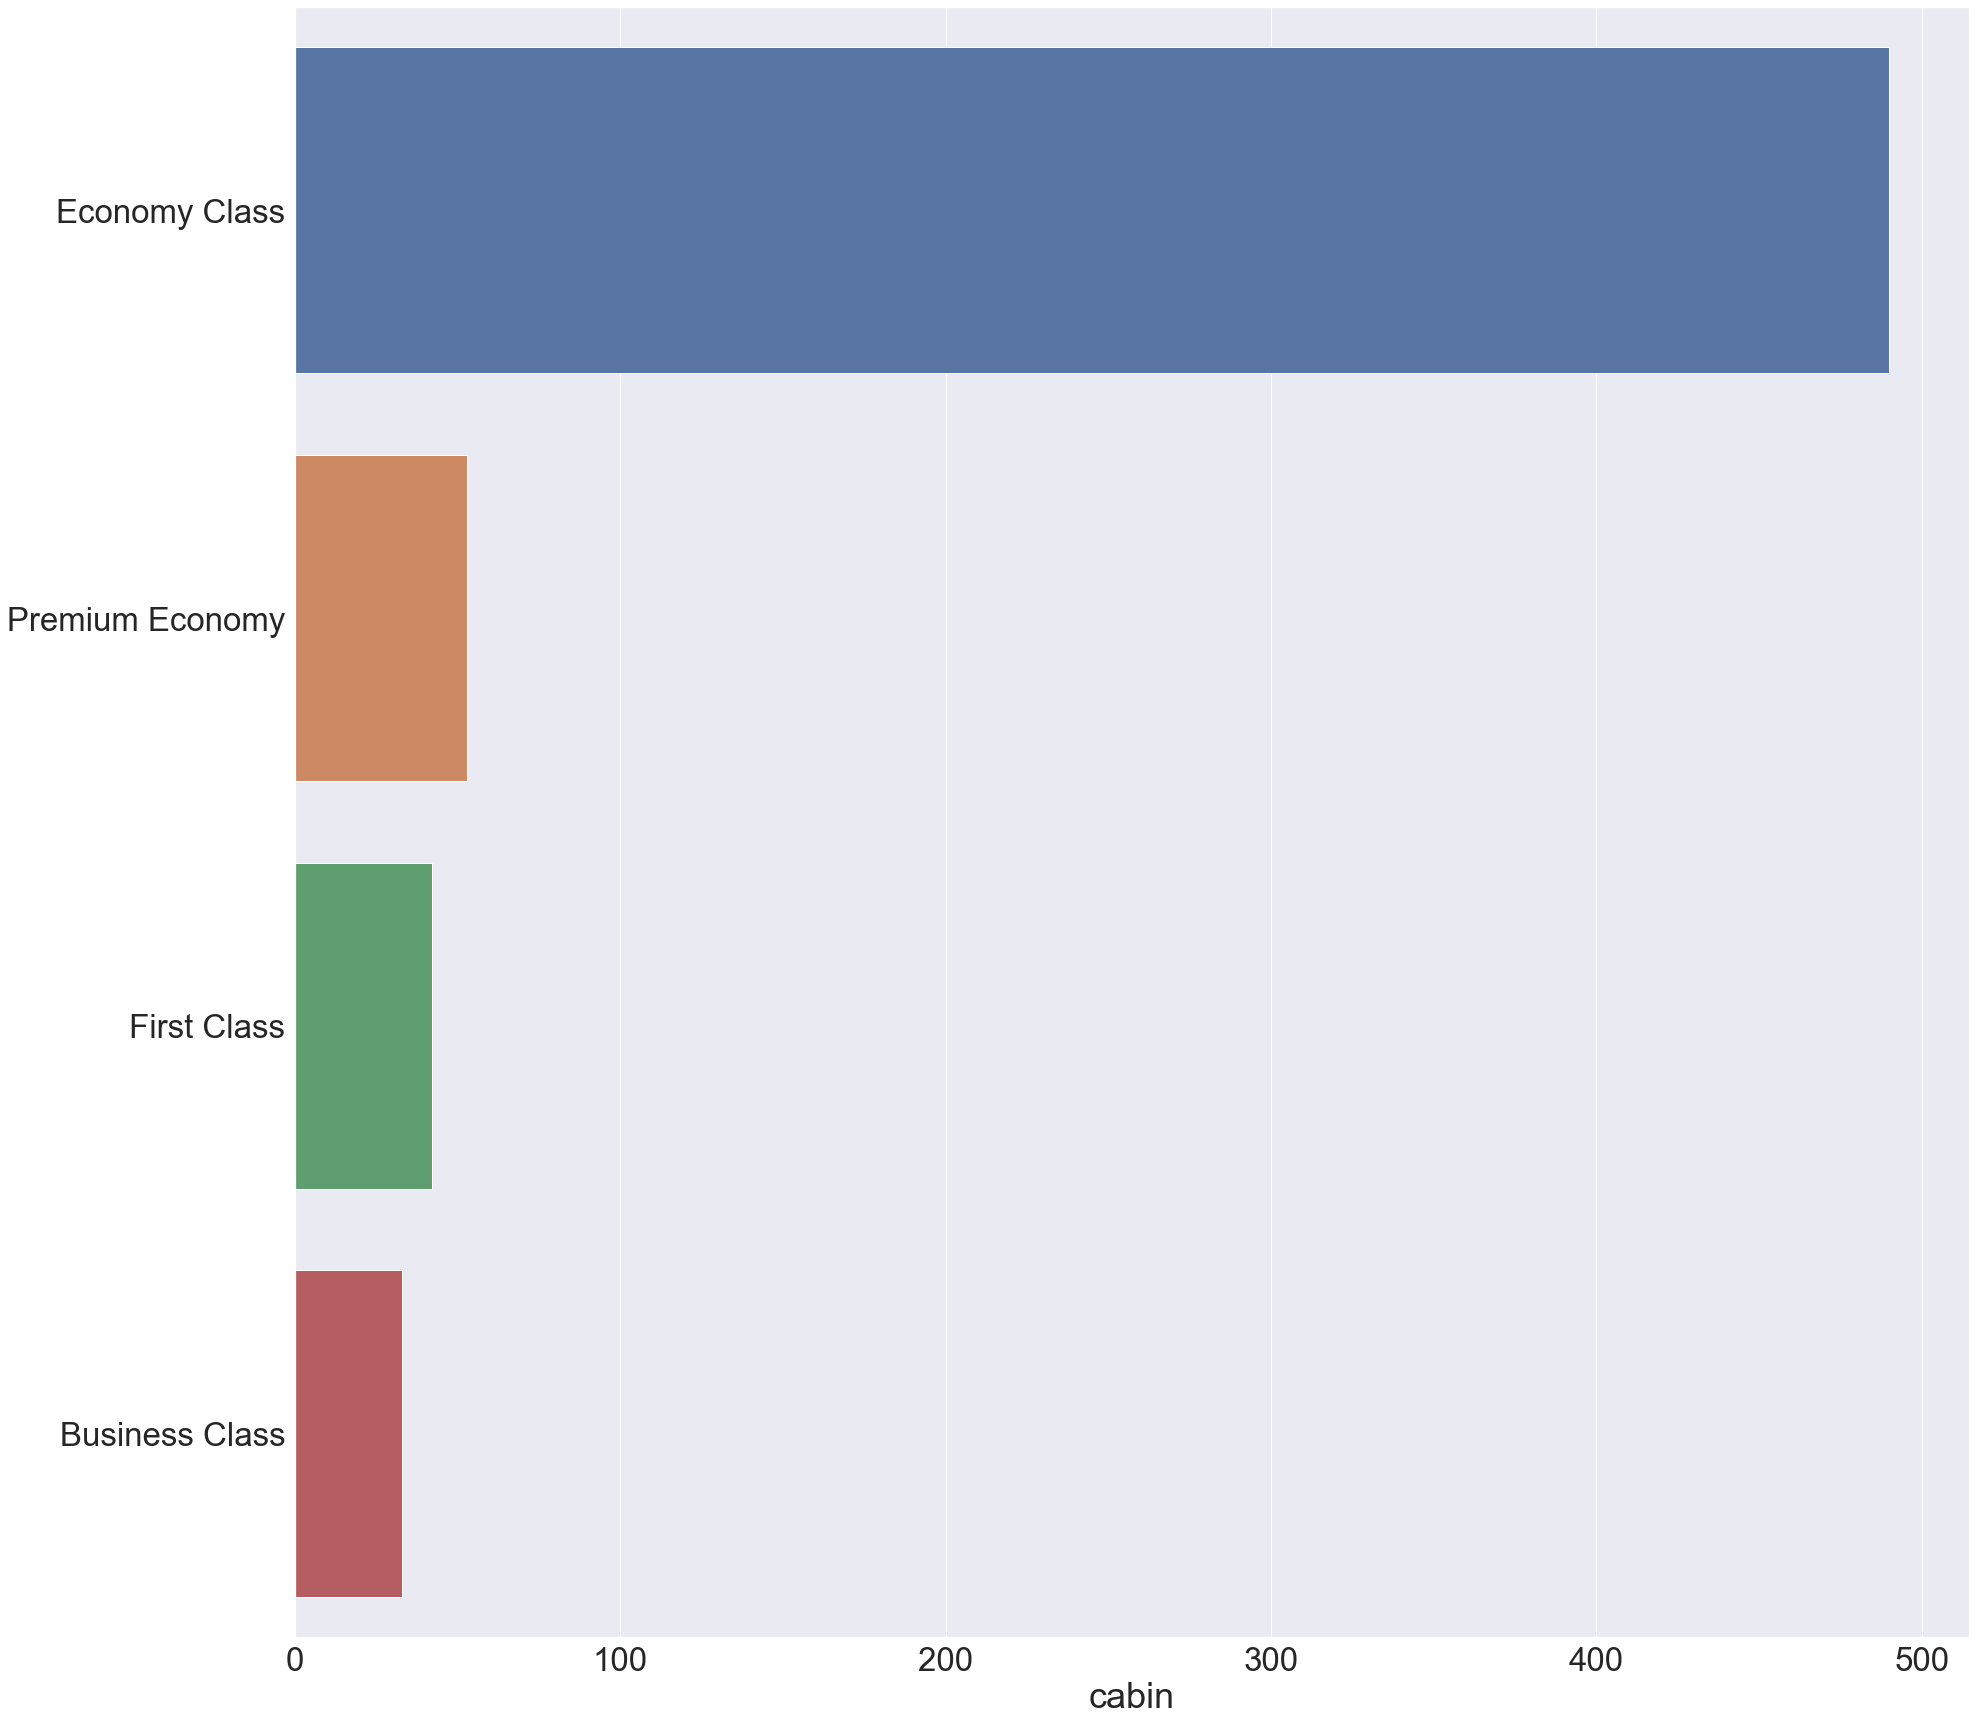

In [120]:
sns.barplot(df_Delta_Airlines.cabin.value_counts(),df_Delta_Airlines.cabin.value_counts().index)

In [121]:
df_Delta_Airlines.route.nunique()

566

In [122]:
df_Delta_Airlines.route.value_counts()[:10]

San Francisco to Singapore    5
Portland to Denver            3
Denver to Oklahoma City       3
Seattle to Denver             3
San Francisco to Newark       3
Newark to Los Angeles         3
San Diego to San Francisco    3
Honolulu to San Francisco     3
Houston to Pittsburgh         2
Newark to West Palm Beach     2
Name: route, dtype: int64

In [123]:
df_Delta_Airlines[["seat_comfort",'cabin_service', 'food_bev', 'entertainment','ground_service', 'value_for_money']].describe()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,577.000000,577.000000,408.000000,387.000000,590.000000,617.000000
mean,2.225303,2.469671,2.200980,2.439276,1.988136,1.904376
std,1.398605,1.557753,1.398068,1.561621,1.474697,1.397678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
75%,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='seat_comfort'>

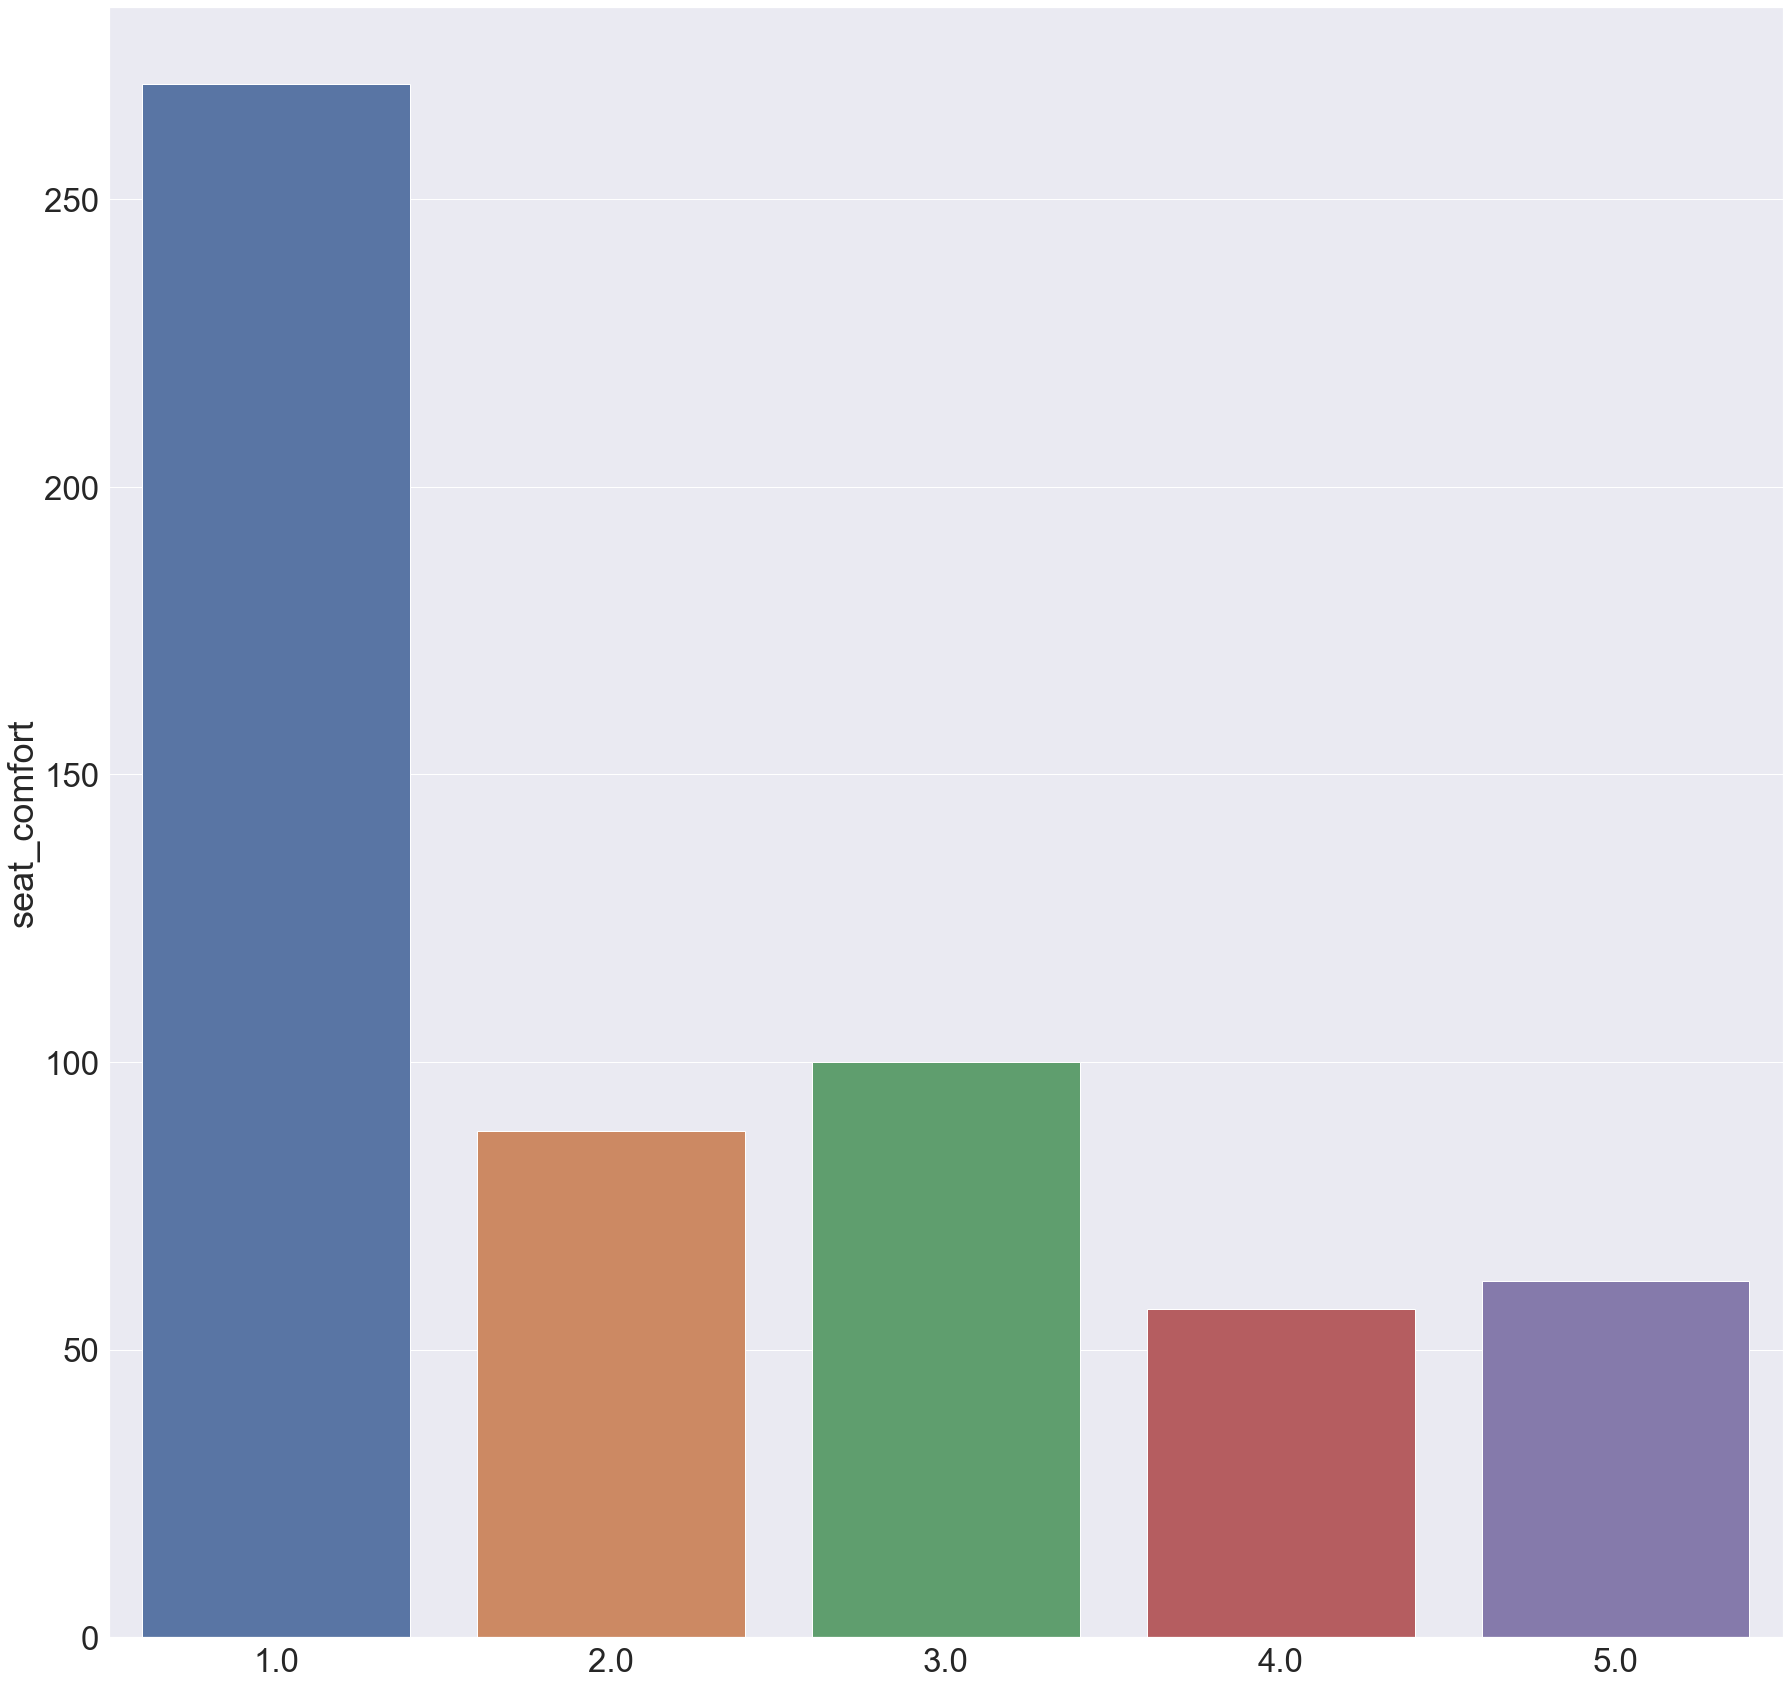

In [124]:
sns.barplot(df_Delta_Airlines.seat_comfort.value_counts().index,df_Delta_Airlines.seat_comfort.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='cabin_service'>

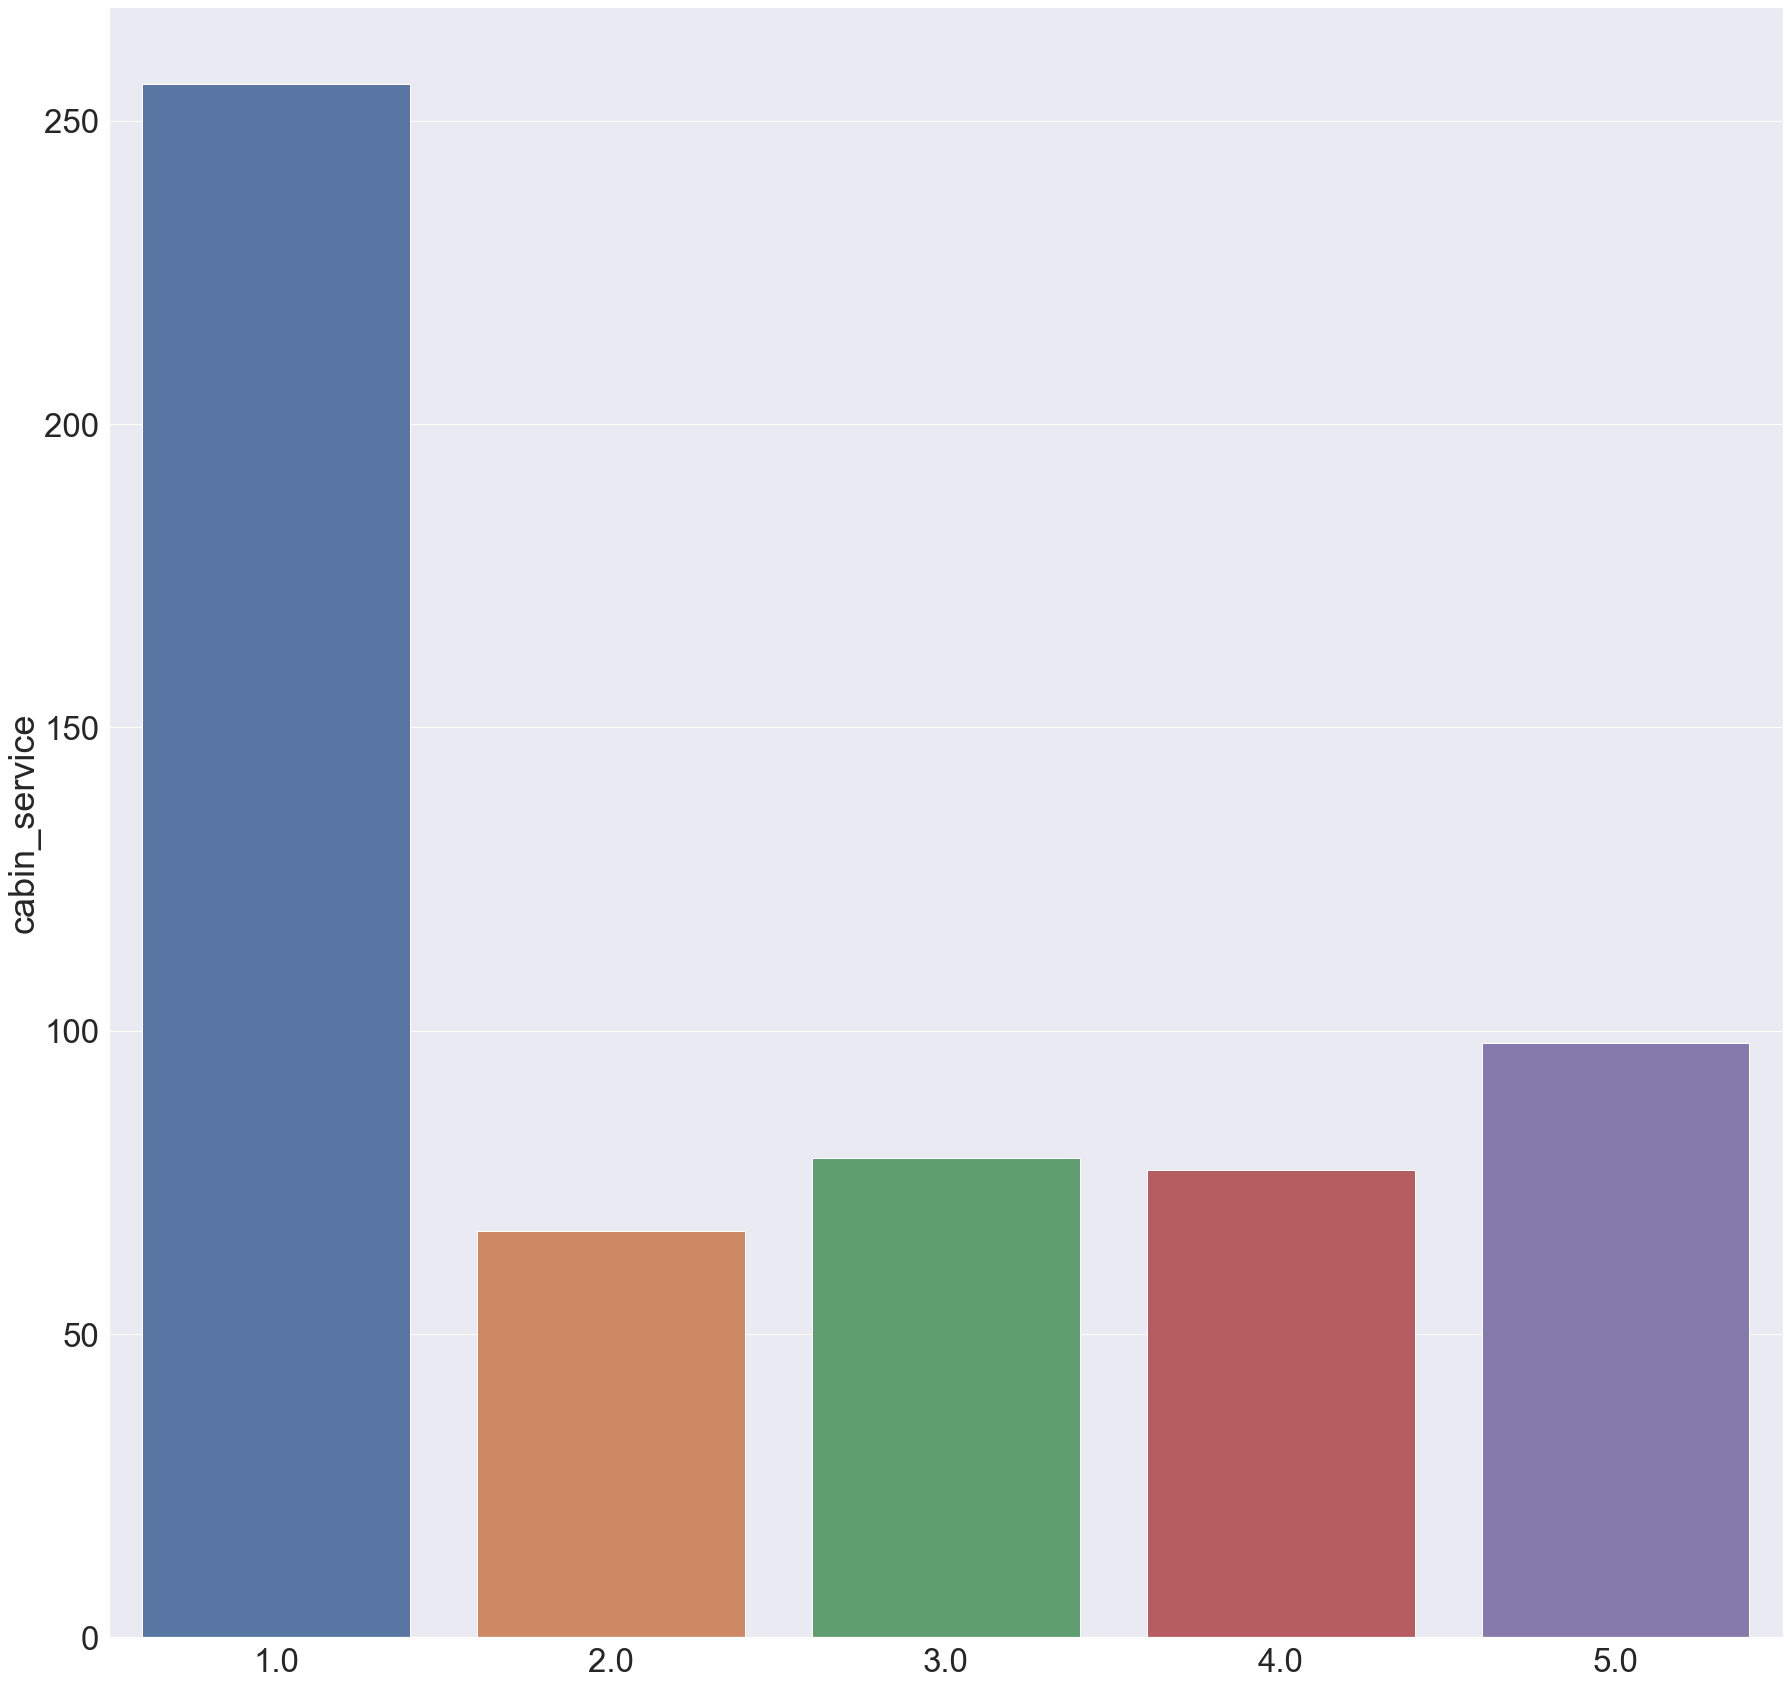

In [125]:
sns.barplot(df_Delta_Airlines.cabin_service.value_counts().index,df_Delta_Airlines.cabin_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='food_bev'>

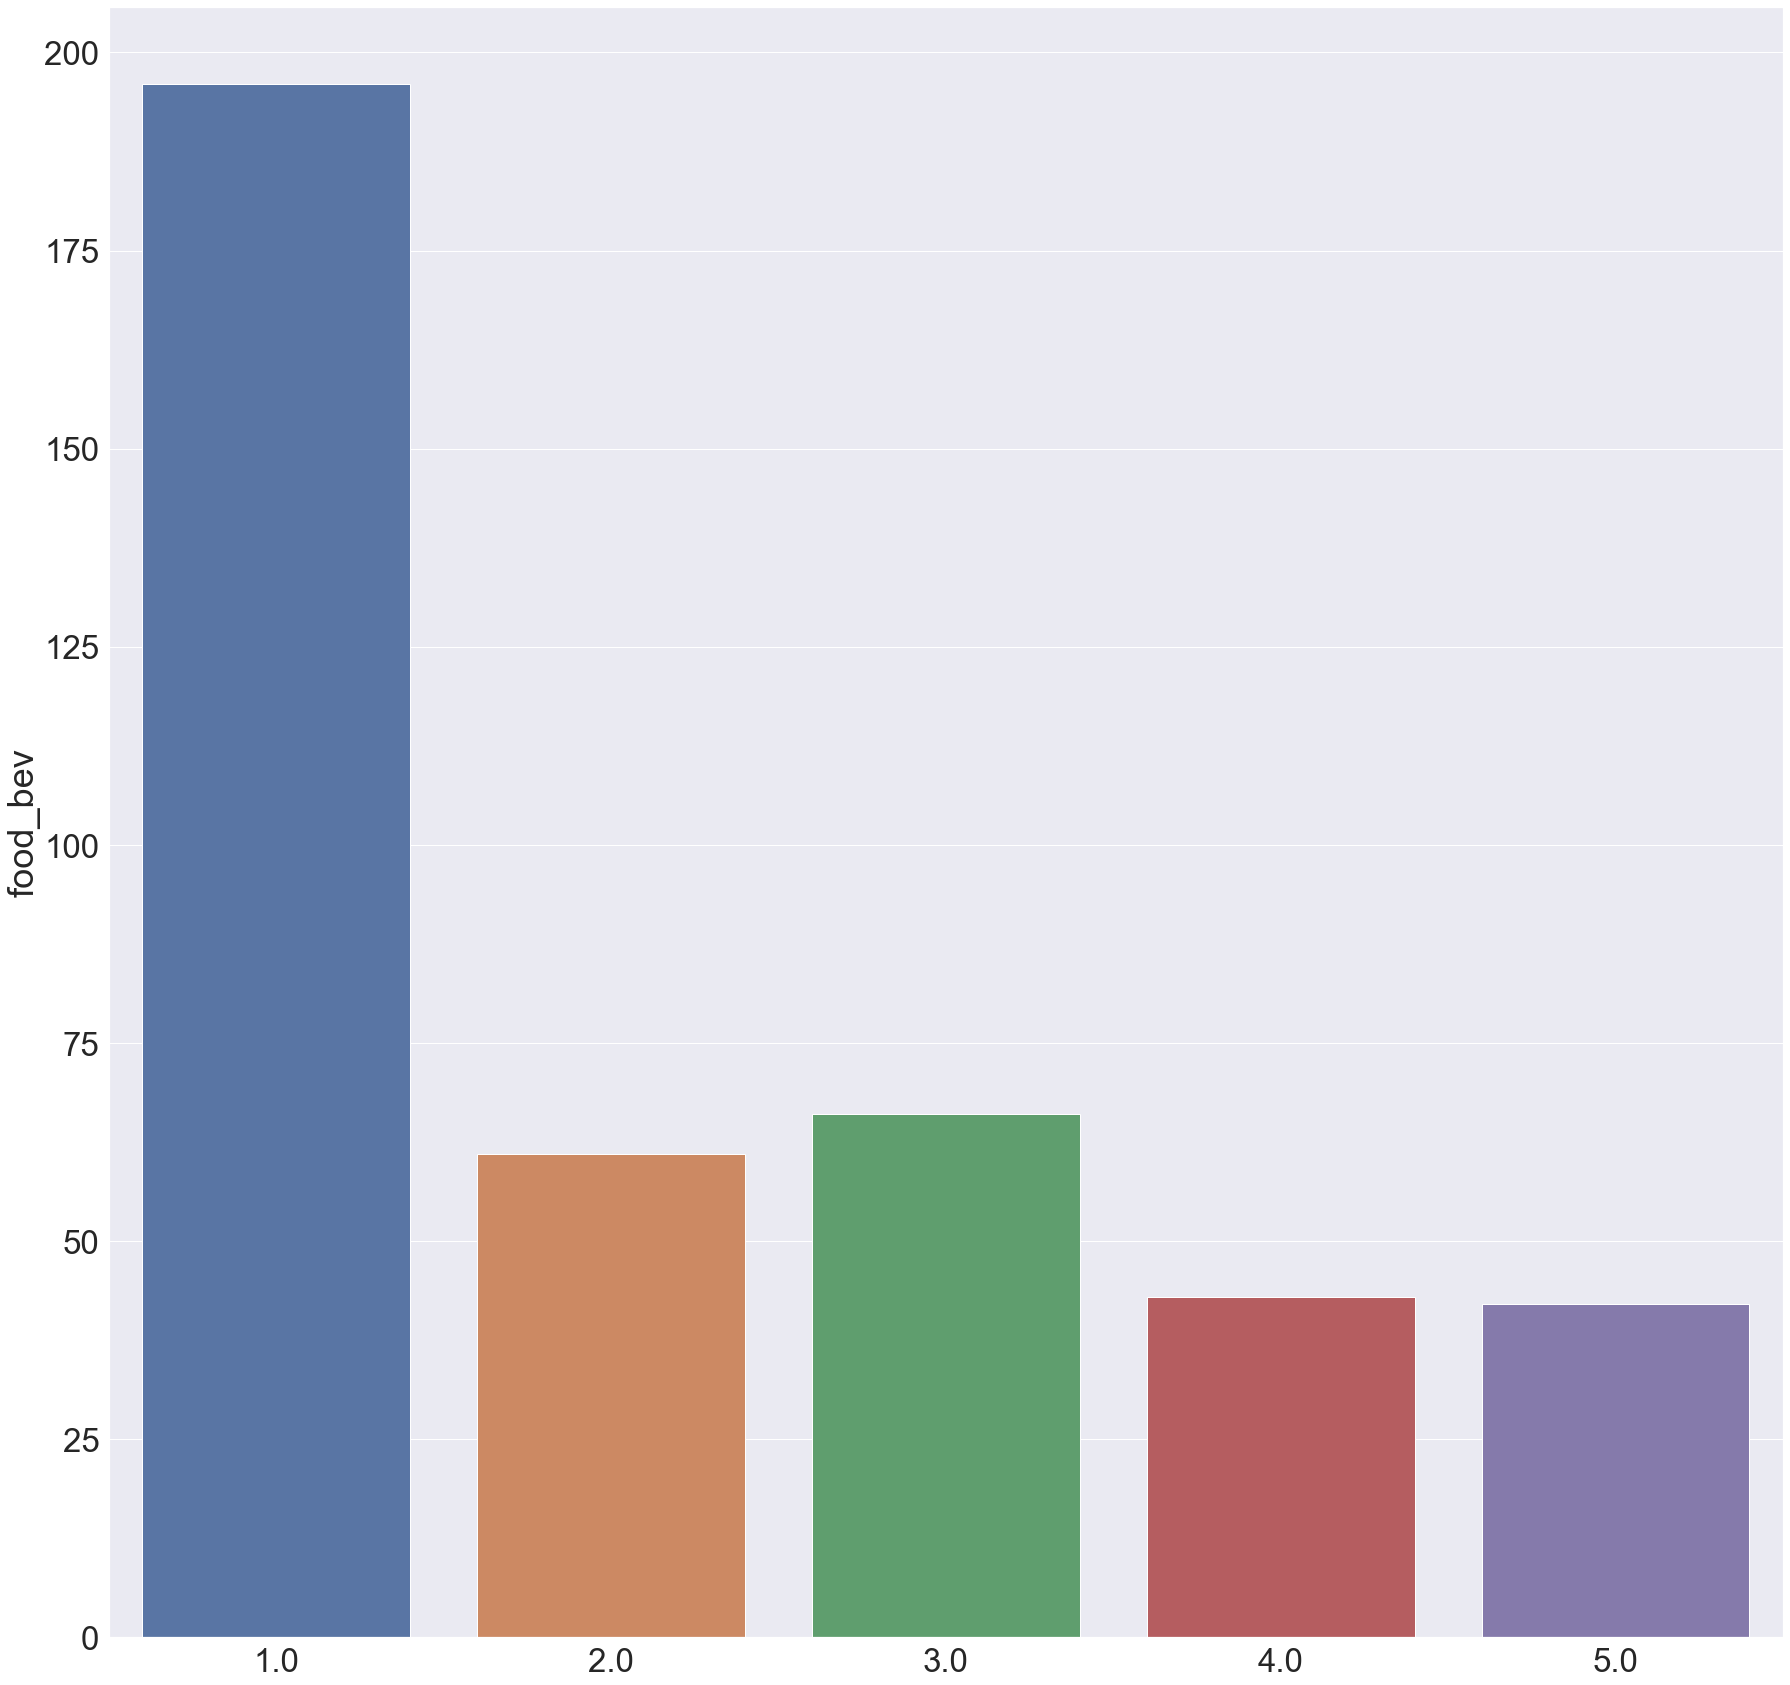

In [126]:
sns.barplot(df_Delta_Airlines.food_bev.value_counts().index,df_Delta_Airlines.food_bev.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='entertainment'>

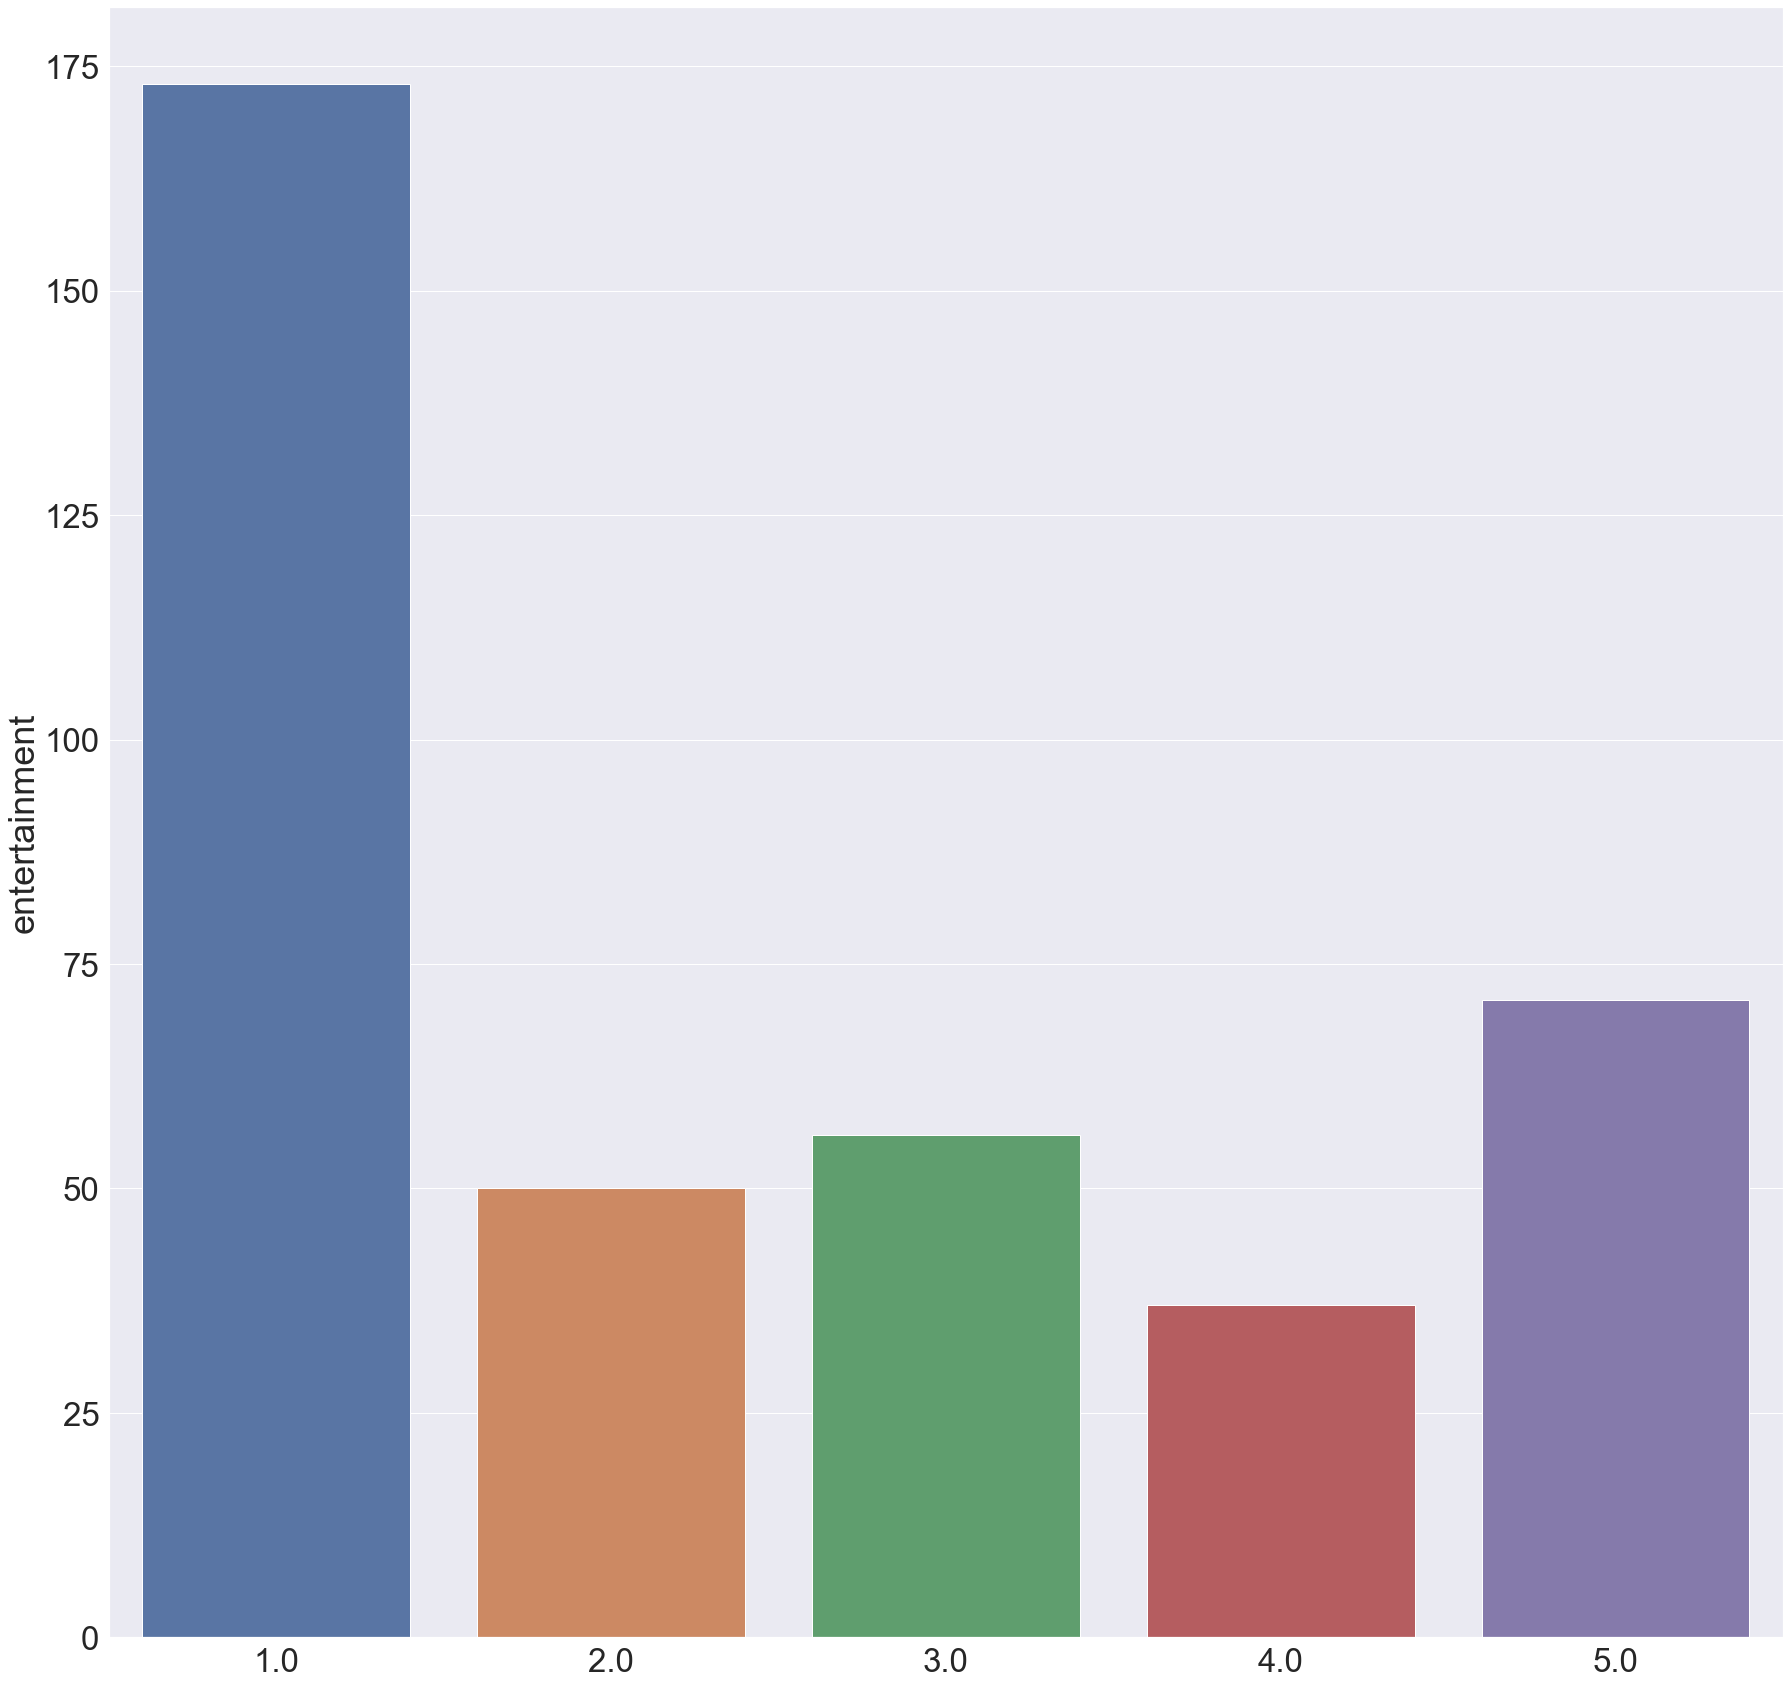

In [127]:
sns.barplot(df_Delta_Airlines.entertainment.value_counts().index,df_Delta_Airlines.entertainment.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='ground_service'>

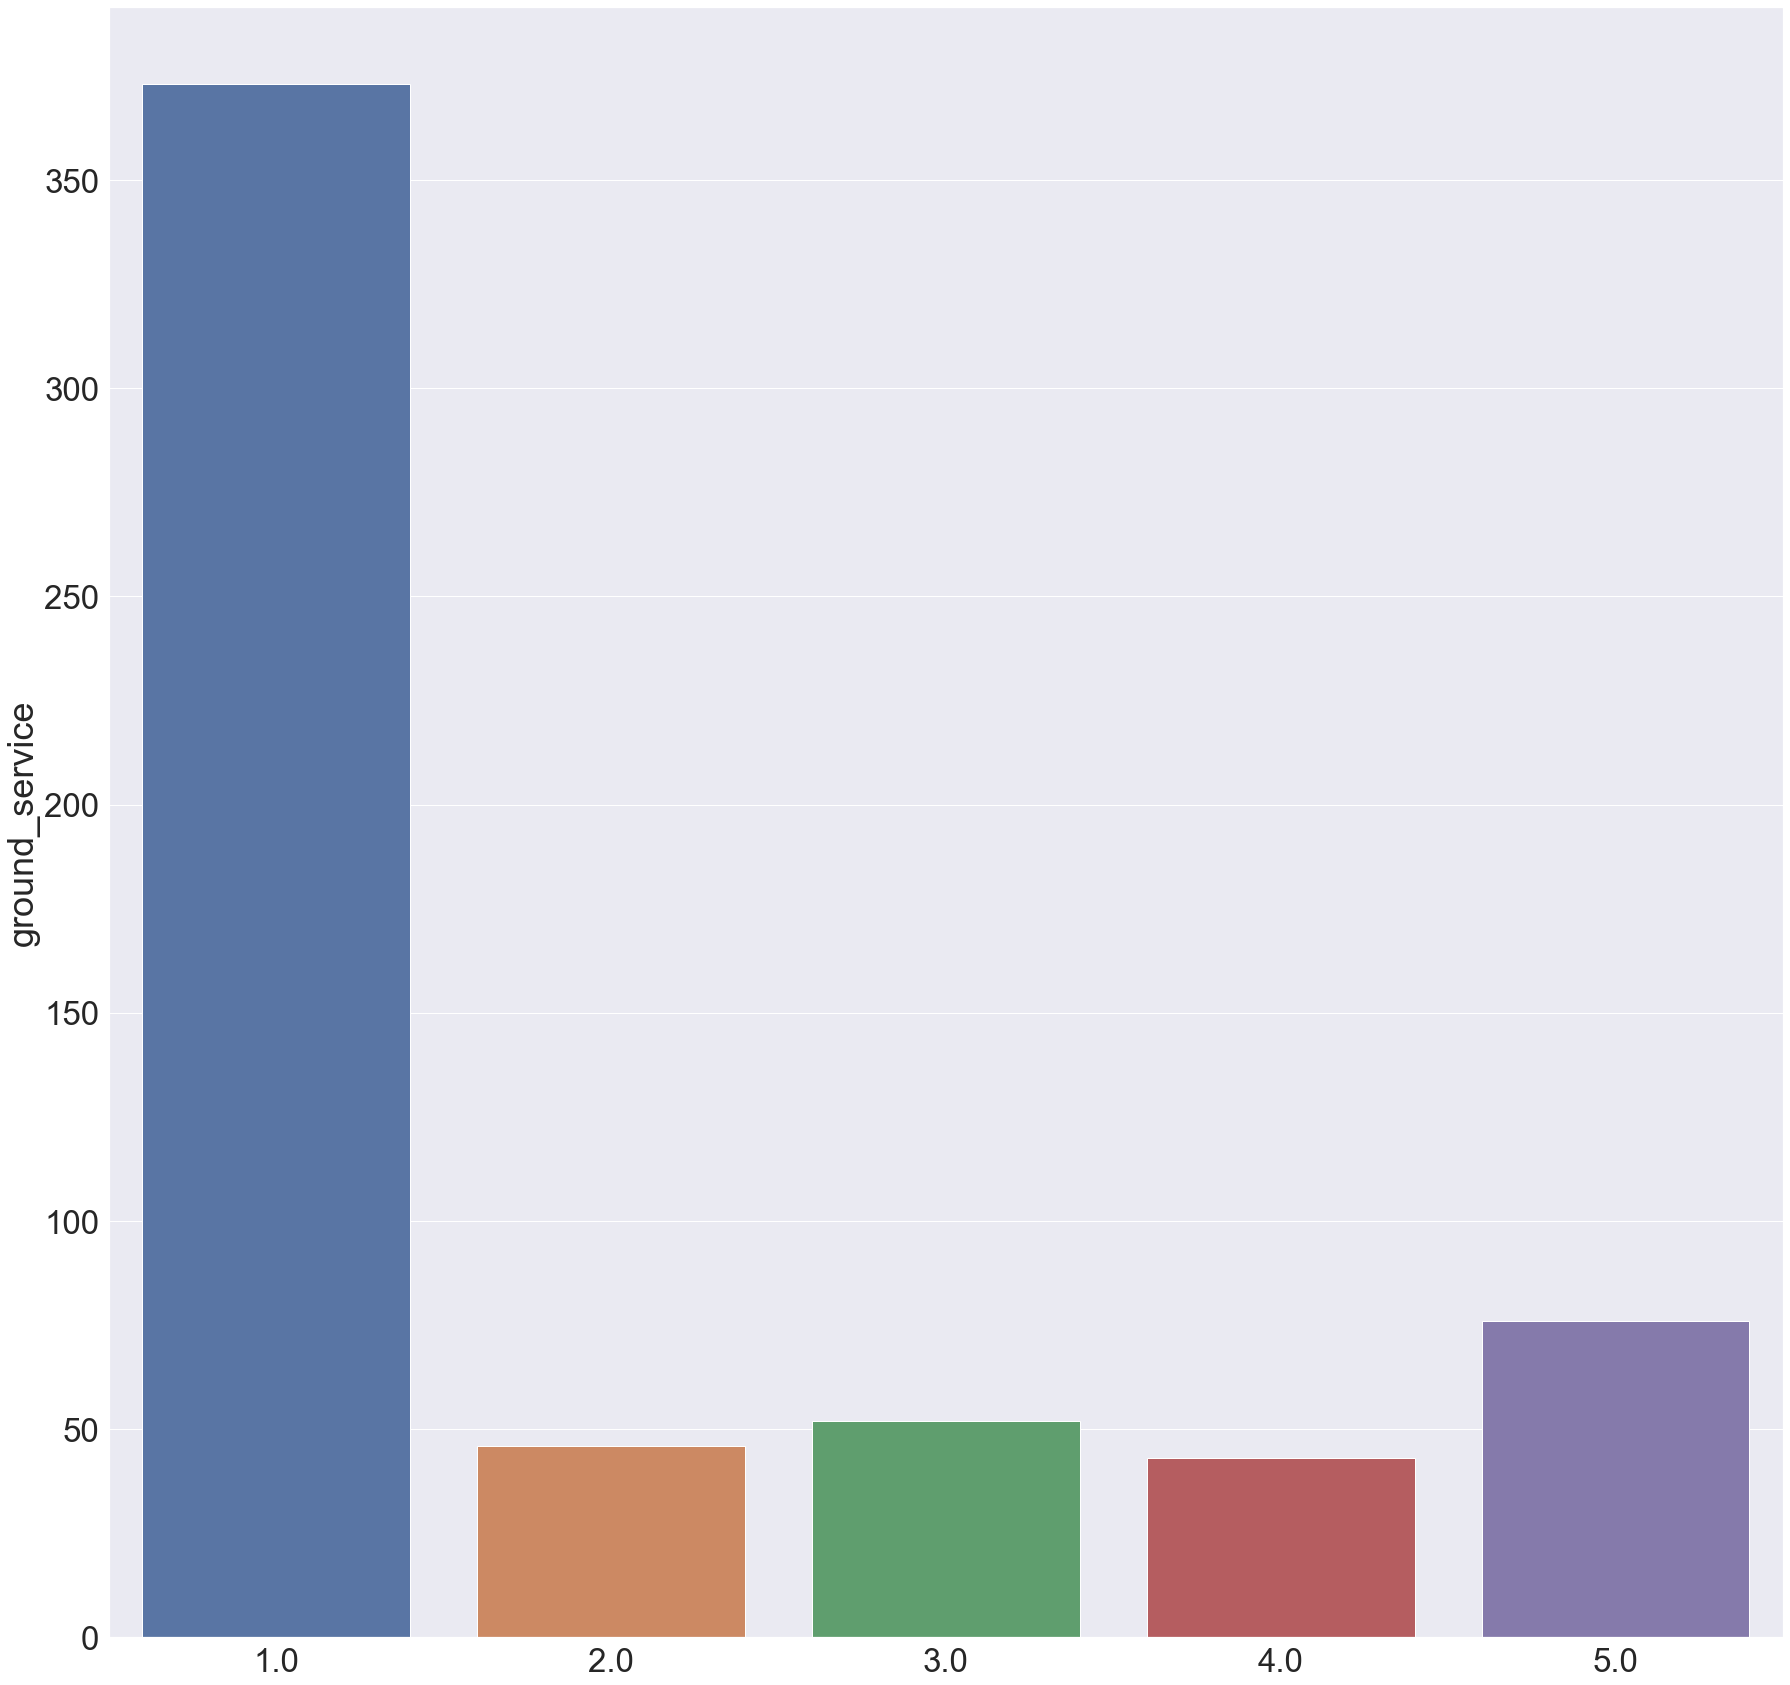

In [128]:
sns.barplot(df_Delta_Airlines.ground_service.value_counts().index,df_Delta_Airlines.ground_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='value_for_money'>

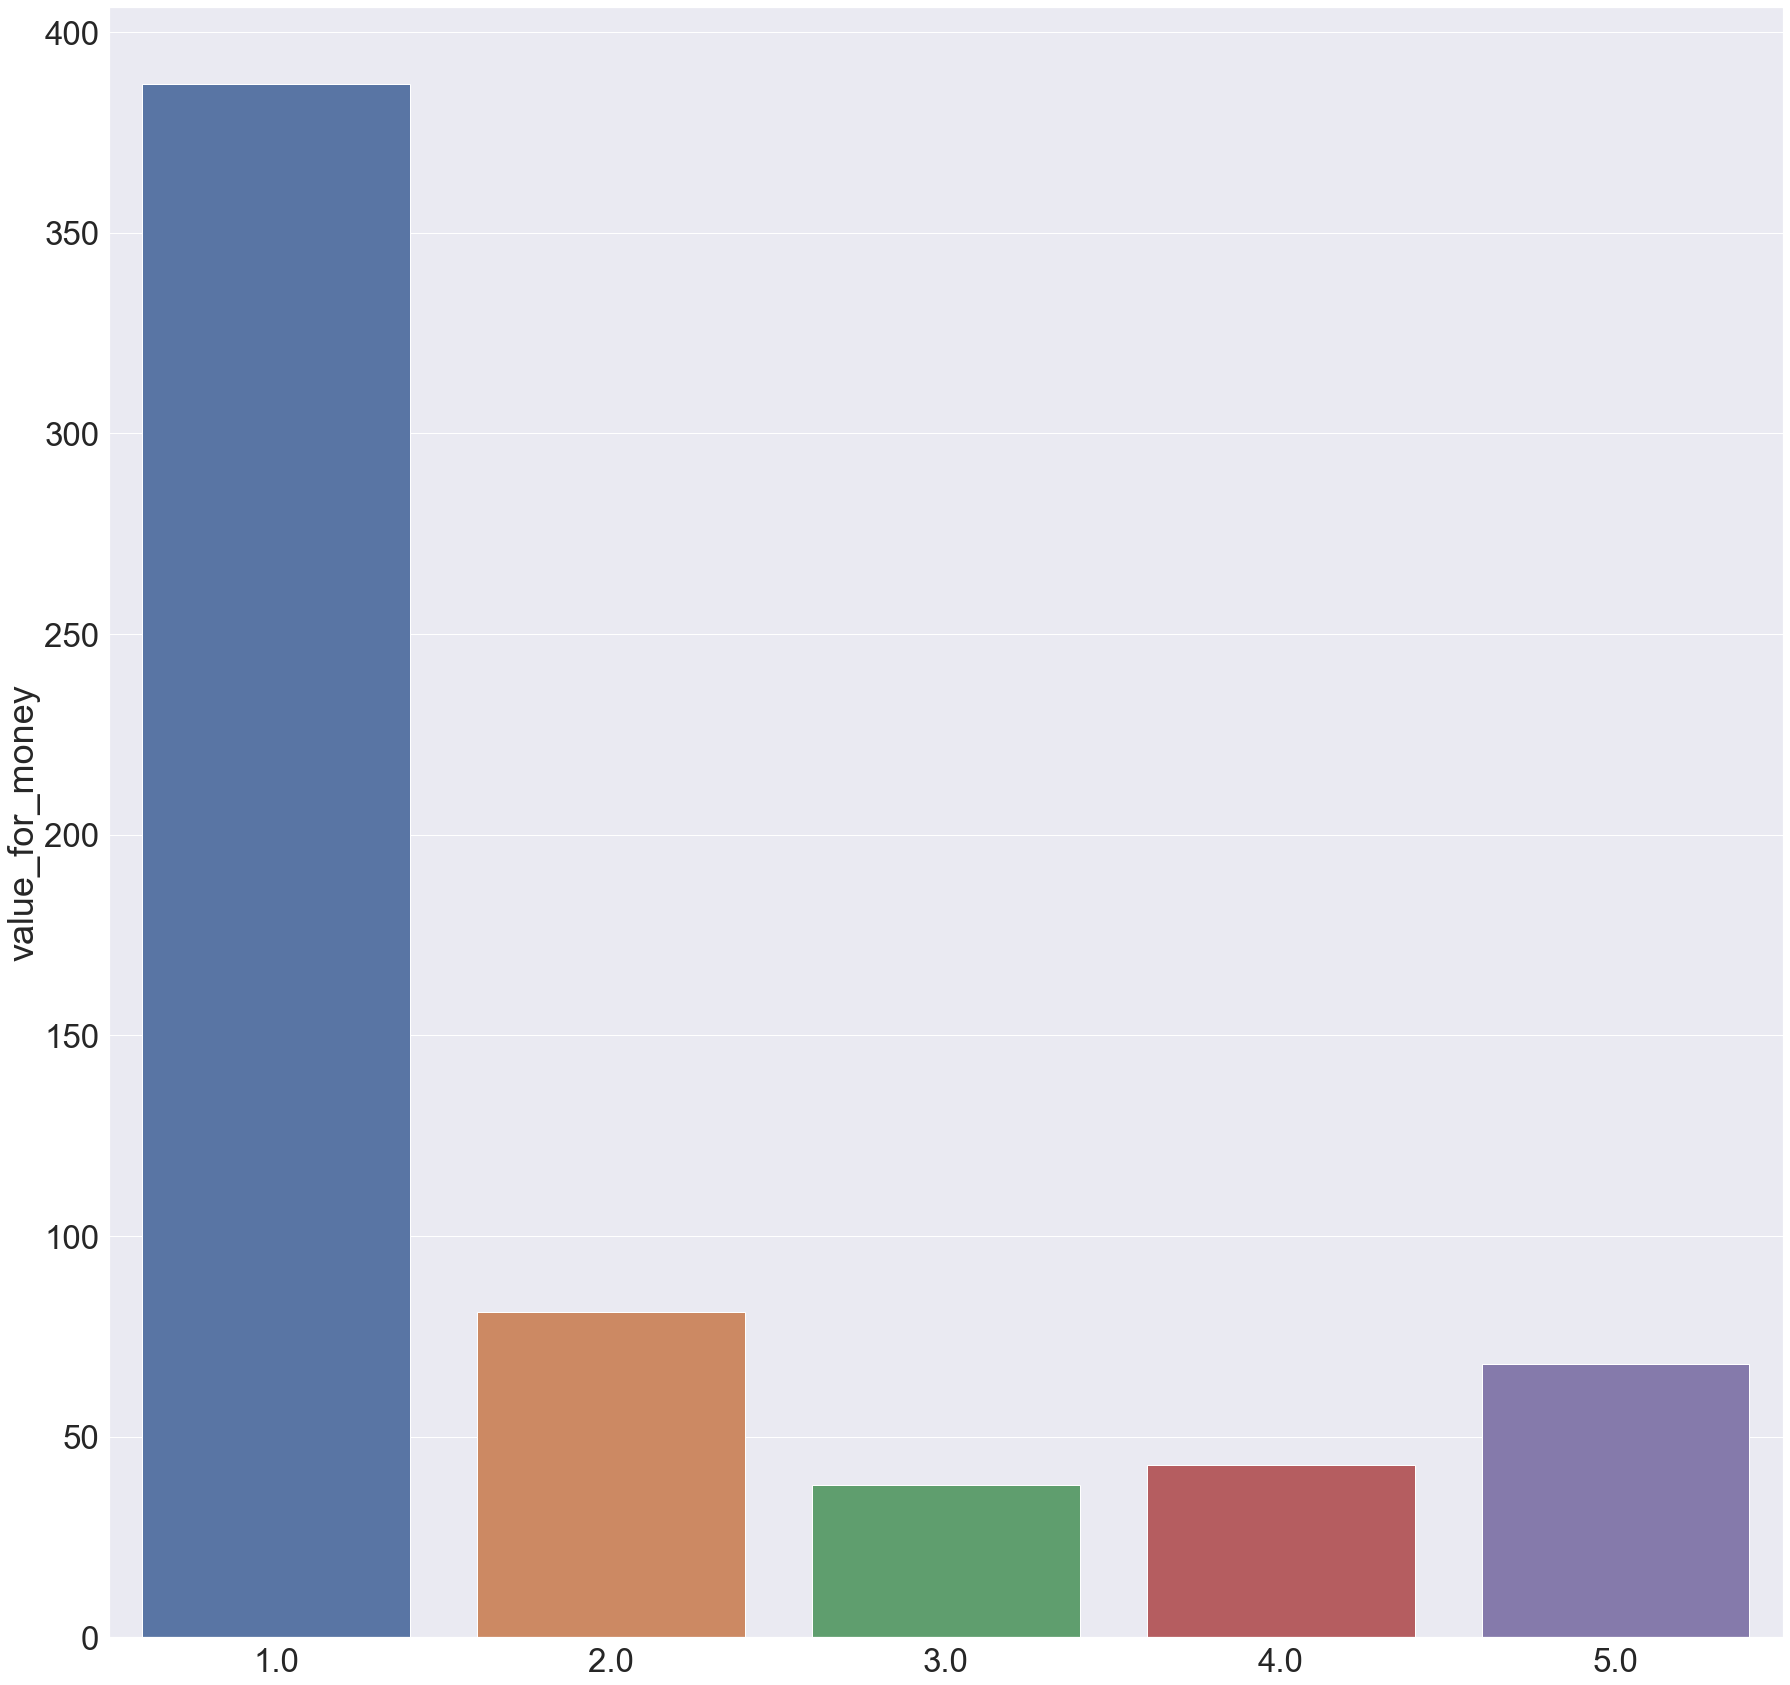

In [129]:
sns.barplot(df_Delta_Airlines.value_for_money.value_counts().index,df_Delta_Airlines.value_for_money.value_counts())

## NLP part

In [130]:
df_Delta_Airlines["flair_sentiment_score"] = df_Delta_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))

<ipython-input-130-37575533868e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Delta_Airlines["flair_sentiment_score"] = df_Delta_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))


In [131]:
df_Delta_Airlines["flair_sentiment_sentiment"] = df_Delta_Airlines.customer_review.apply(lambda x: sentiment_value(x))

<ipython-input-131-3ba7b8c8e589>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Delta_Airlines["flair_sentiment_sentiment"] = df_Delta_Airlines.customer_review.apply(lambda x: sentiment_value(x))


In [132]:
df_Delta_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,flair_sentiment_score,flair_sentiment_sentiment
6186,6186,Delta Air Lines,1.0,J Tyler,23rd May 2022,Not Verified | Imagine not scheduling pilots f...,NaN,Solo Leisure,Economy Class,Atlanta to Omaha,NaN,1.0,3.0,2.0,1.0,1.0,1.0,no,0.999976,NEGATIVE
6187,6187,Delta Air Lines,1.0,Alan Lappy,23rd May 2022,Not Verified | Something changed since I used ...,NaN,Couple Leisure,Economy Class,Jamaica to Detroit via New York,NaN,5.0,4.0,2.0,5.0,1.0,1.0,no,0.999744,NEGATIVE
6188,6188,Delta Air Lines,1.0,R Heale,22nd May 2022,"✅ Trip Verified | On Saturday, May 21, at 12 n...",NaN,Couple Leisure,First Class,Fort Myers to Detroit,NaN,1.0,1.0,NaN,NaN,1.0,1.0,no,0.999974,NEGATIVE
6189,6189,Delta Air Lines,1.0,Rosonna Comers,22nd May 2022,Not Verified | Delta canceled my flight with l...,NaN,Family Leisure,Economy Class,Huntsville to Milwaukee via Atlantia,NaN,NaN,NaN,NaN,NaN,2.0,1.0,no,0.999982,NEGATIVE
6190,6190,Delta Air Lines,1.0,J Rayne,22nd May 2022,✅ Trip Verified | Sad to say that Delta isn't ...,NaN,Couple Leisure,First Class,La Guardia to Milwaukee,NaN,4.0,3.0,1.0,1.0,1.0,1.0,no,0.999939,NEGATIVE


In [133]:
df_Delta_Airlines.describe()

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,flair_sentiment_score
count,618.000000,618.000000,577.000000,577.000000,408.000000,387.000000,590.000000,617.000000,618.000000
mean,6494.500000,2.807443,2.225303,2.469671,2.200980,2.439276,1.988136,1.904376,0.988722
std,178.545512,3.046928,1.398605,1.557753,1.398068,1.561621,1.474697,1.397678,0.056757
min,6186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.502038
25%,6340.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999747
50%,6494.500000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.999966
75%,6648.750000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000,0.999991
max,6803.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.999999


In [134]:
df_Delta_Airlines["recommended_new"] = df_Delta_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)

<ipython-input-134-f0a7e4995832>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Delta_Airlines["recommended_new"] = df_Delta_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)


In [135]:
df_Delta_Airlines["flair_sentiment_sentiment_new"] = df_Delta_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)

<ipython-input-135-77e0395adb63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Delta_Airlines["flair_sentiment_sentiment_new"] = df_Delta_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)


In [136]:
confusion_matrix(df_Delta_Airlines["flair_sentiment_sentiment_new"], df_Delta_Airlines["recommended_new"])

array([[496,  48],
       [  2,  72]], dtype=int64)

In [137]:
df_Delta_Airlines["flair_sentiment_sentiment_new"].corr(df_Delta_Airlines["recommended_new"])

0.7261469850824314

## NLP - ngrams (Delta Airlines)

In [33]:
customer_review_corpus_Delta_Airlines = ""

for i,row in df_Delta_Airlines.iterrows():
    
    customer_review_corpus_Delta_Airlines += str(row["customer_review"])

In [34]:
customer_review_corpus_Delta_Airlines = re.sub(r'[^A-Za-z0-9 ]+', '', customer_review_corpus_Delta_Airlines.lower())

In [35]:
customer_review_corpus_Delta_Airlines = re.sub('[,\.!?â€™]', '', customer_review_corpus_Delta_Airlines.lower())
customer_review_corpus_word_tokens_Delta_Airlines = word_tokenize(customer_review_corpus_Delta_Airlines)
filtered_customer_review_corpus_word_tokens_Delta_Airlines = [w for w in customer_review_corpus_word_tokens_Delta_Airlines if not w.lower() in stop_words]
filtered_customer_review_corpus_word_tokens_string_Delta_Airlines = " ".join(filtered_customer_review_corpus_word_tokens_Delta_Airlines)
filtered_customer_review_corpus_word_tokens_string_Delta_Airlines = re.sub('[!()-;[]{}:\,<>./?@#$%^&*_~]', '', filtered_customer_review_corpus_word_tokens_string_Delta_Airlines)
filtered_customer_review_corpus_word_tokens_string_Delta_Airlines = re.sub('":()', '', filtered_customer_review_corpus_word_tokens_string_Delta_Airlines)
filtered_customer_review_corpus_word_tokens_string_Delta_Airlines = re.sub("'", '', filtered_customer_review_corpus_word_tokens_string_Delta_Airlines)
filtered_customer_review_corpus_word_tokens_string_Delta_Airlines = re.sub("[:()<>]", '', filtered_customer_review_corpus_word_tokens_string_Delta_Airlines)
filtered_customer_review_corpus_word_tokens_string_Delta_Airlines = " ".join(lemma.lemmatize(word) for word in filtered_customer_review_corpus_word_tokens_string_Delta_Airlines.split())

In [36]:
unigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Delta_Airlines):
    unigrams_dye[word] += 1
df_unigrams = pd.DataFrame(sorted(unigrams_dye.items(), key=lambda x: x[1])[::-1])
bigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Delta_Airlines, n_gram=2):
    bigrams_dye[word] += 1
df_bigrams = pd.DataFrame(sorted(bigrams_dye.items(), key=lambda x: x[1])[::-1])
trigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Delta_Airlines, n_gram=3):
    trigrams_dye[word] += 1
df_trigrams = pd.DataFrame(sorted(trigrams_dye.items(), key=lambda x: x[1])[::-1])
fourgrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Delta_Airlines, n_gram=4):
    fourgrams_dye[word] += 1
df_fourgrams = pd.DataFrame(sorted(fourgrams_dye.items(), key=lambda x: x[1])[::-1])

<AxesSubplot:>

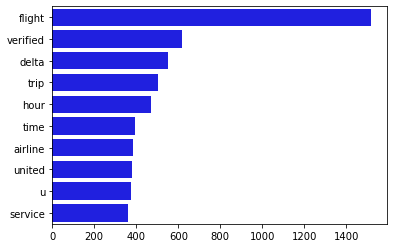

In [37]:
sns.barplot(y=df_unigrams[0].values[:N], x=df_unigrams[1].values[:N], color='blue')

<AxesSubplot:>

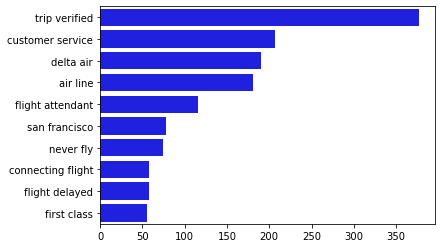

In [38]:
sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N], color='blue')

<AxesSubplot:>

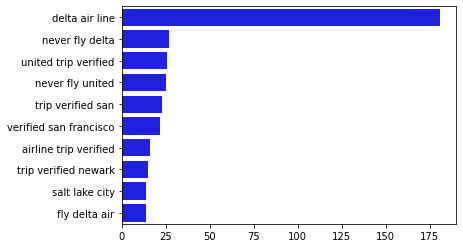

In [39]:
sns.barplot(y=df_trigrams[0].values[0:N], x=df_trigrams[1].values[0:N], color='blue')

<AxesSubplot:>

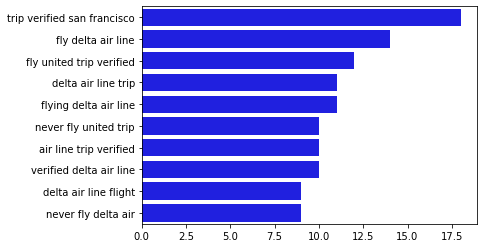

In [40]:
sns.barplot(y=df_fourgrams[0].values[0:N], x=df_fourgrams[1].values[0:N], color='blue')

# Alaska Airlines - EDA

In [145]:
df_Alaska_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
6804,6804,Alaska Airlines,10.0,G Marten,16th May 2022,✅ Trip Verified | Alaska Airlines impressed me...,NaN,Couple Leisure,Economy Class,San Diego to Seattle,22-May,4.0,5.0,5.0,5.0,5.0,5.0,yes
6805,6805,Alaska Airlines,1.0,T Chapman,13th May 2022,"✅ Trip Verified | TSA took forever, more than ...",NaN,Solo Leisure,Economy Class,Seattle to Ontario,22-Feb,3.0,3.0,3.0,3.0,1.0,1.0,no
6806,6806,Alaska Airlines,2.0,M Carney,7th May 2022,✅ Trip Verified | My company booked a round tr...,Boeing 737,Business,Economy Class,Seattle to Nashville,22-May,2.0,4.0,NaN,NaN,1.0,1.0,no
6807,6807,Alaska Airlines,1.0,D Pierce,2nd May 2022,Not Verified | We were returning home from Por...,A320,Business,First Class,Orange County to Portland,22-Apr,NaN,NaN,NaN,NaN,1.0,1.0,no
6808,6808,Alaska Airlines,1.0,A Rayne,1st May 2022,✅ Trip Verified | They cancel flights without ...,NaN,Business,Economy Class,San Francisco to New York,22-May,1.0,1.0,NaN,NaN,1.0,1.0,no


In [146]:
df_Alaska_Airlines.shape

(806, 18)

In [147]:
df_Alaska_Airlines.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [148]:
df_Alaska_Airlines.recommended.nunique()

2

In [149]:
df_Alaska_Airlines.recommended.value_counts()

no     496
yes    310
Name: recommended, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='recommended'>

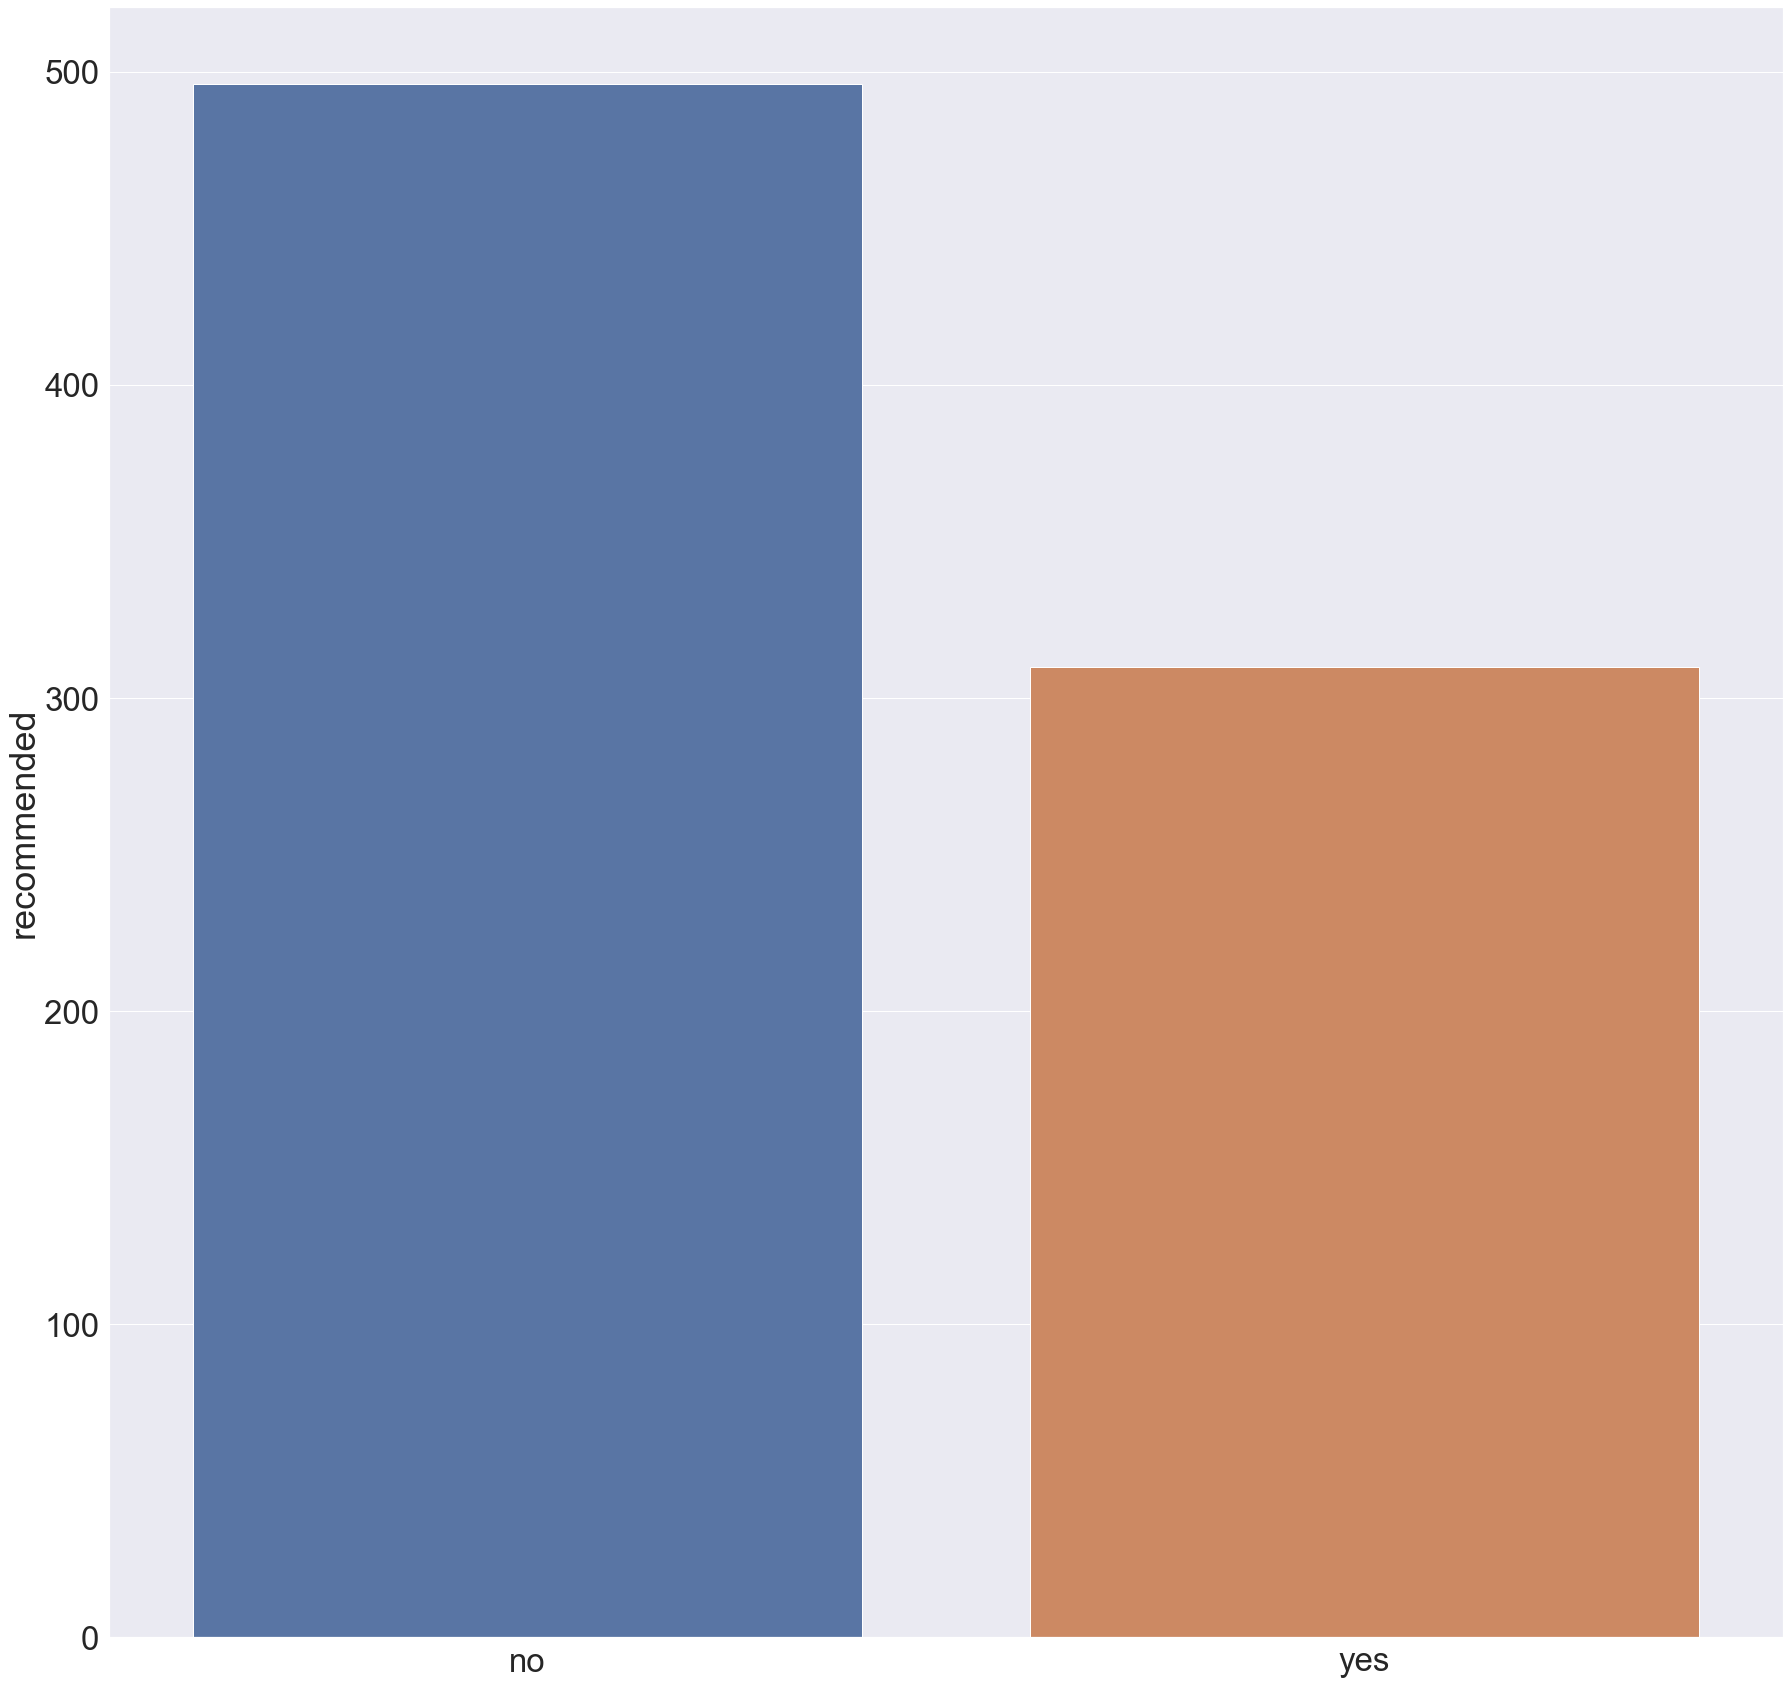

In [150]:
sns.barplot(df_Alaska_Airlines.recommended.value_counts().index,df_Alaska_Airlines.recommended.value_counts())

In [151]:
df_Alaska_Airlines.overall.value_counts()

1.0     298
10.0    126
9.0      89
2.0      88
8.0      44
3.0      42
4.0      34
5.0      29
7.0      21
6.0      16
Name: overall, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='overall'>

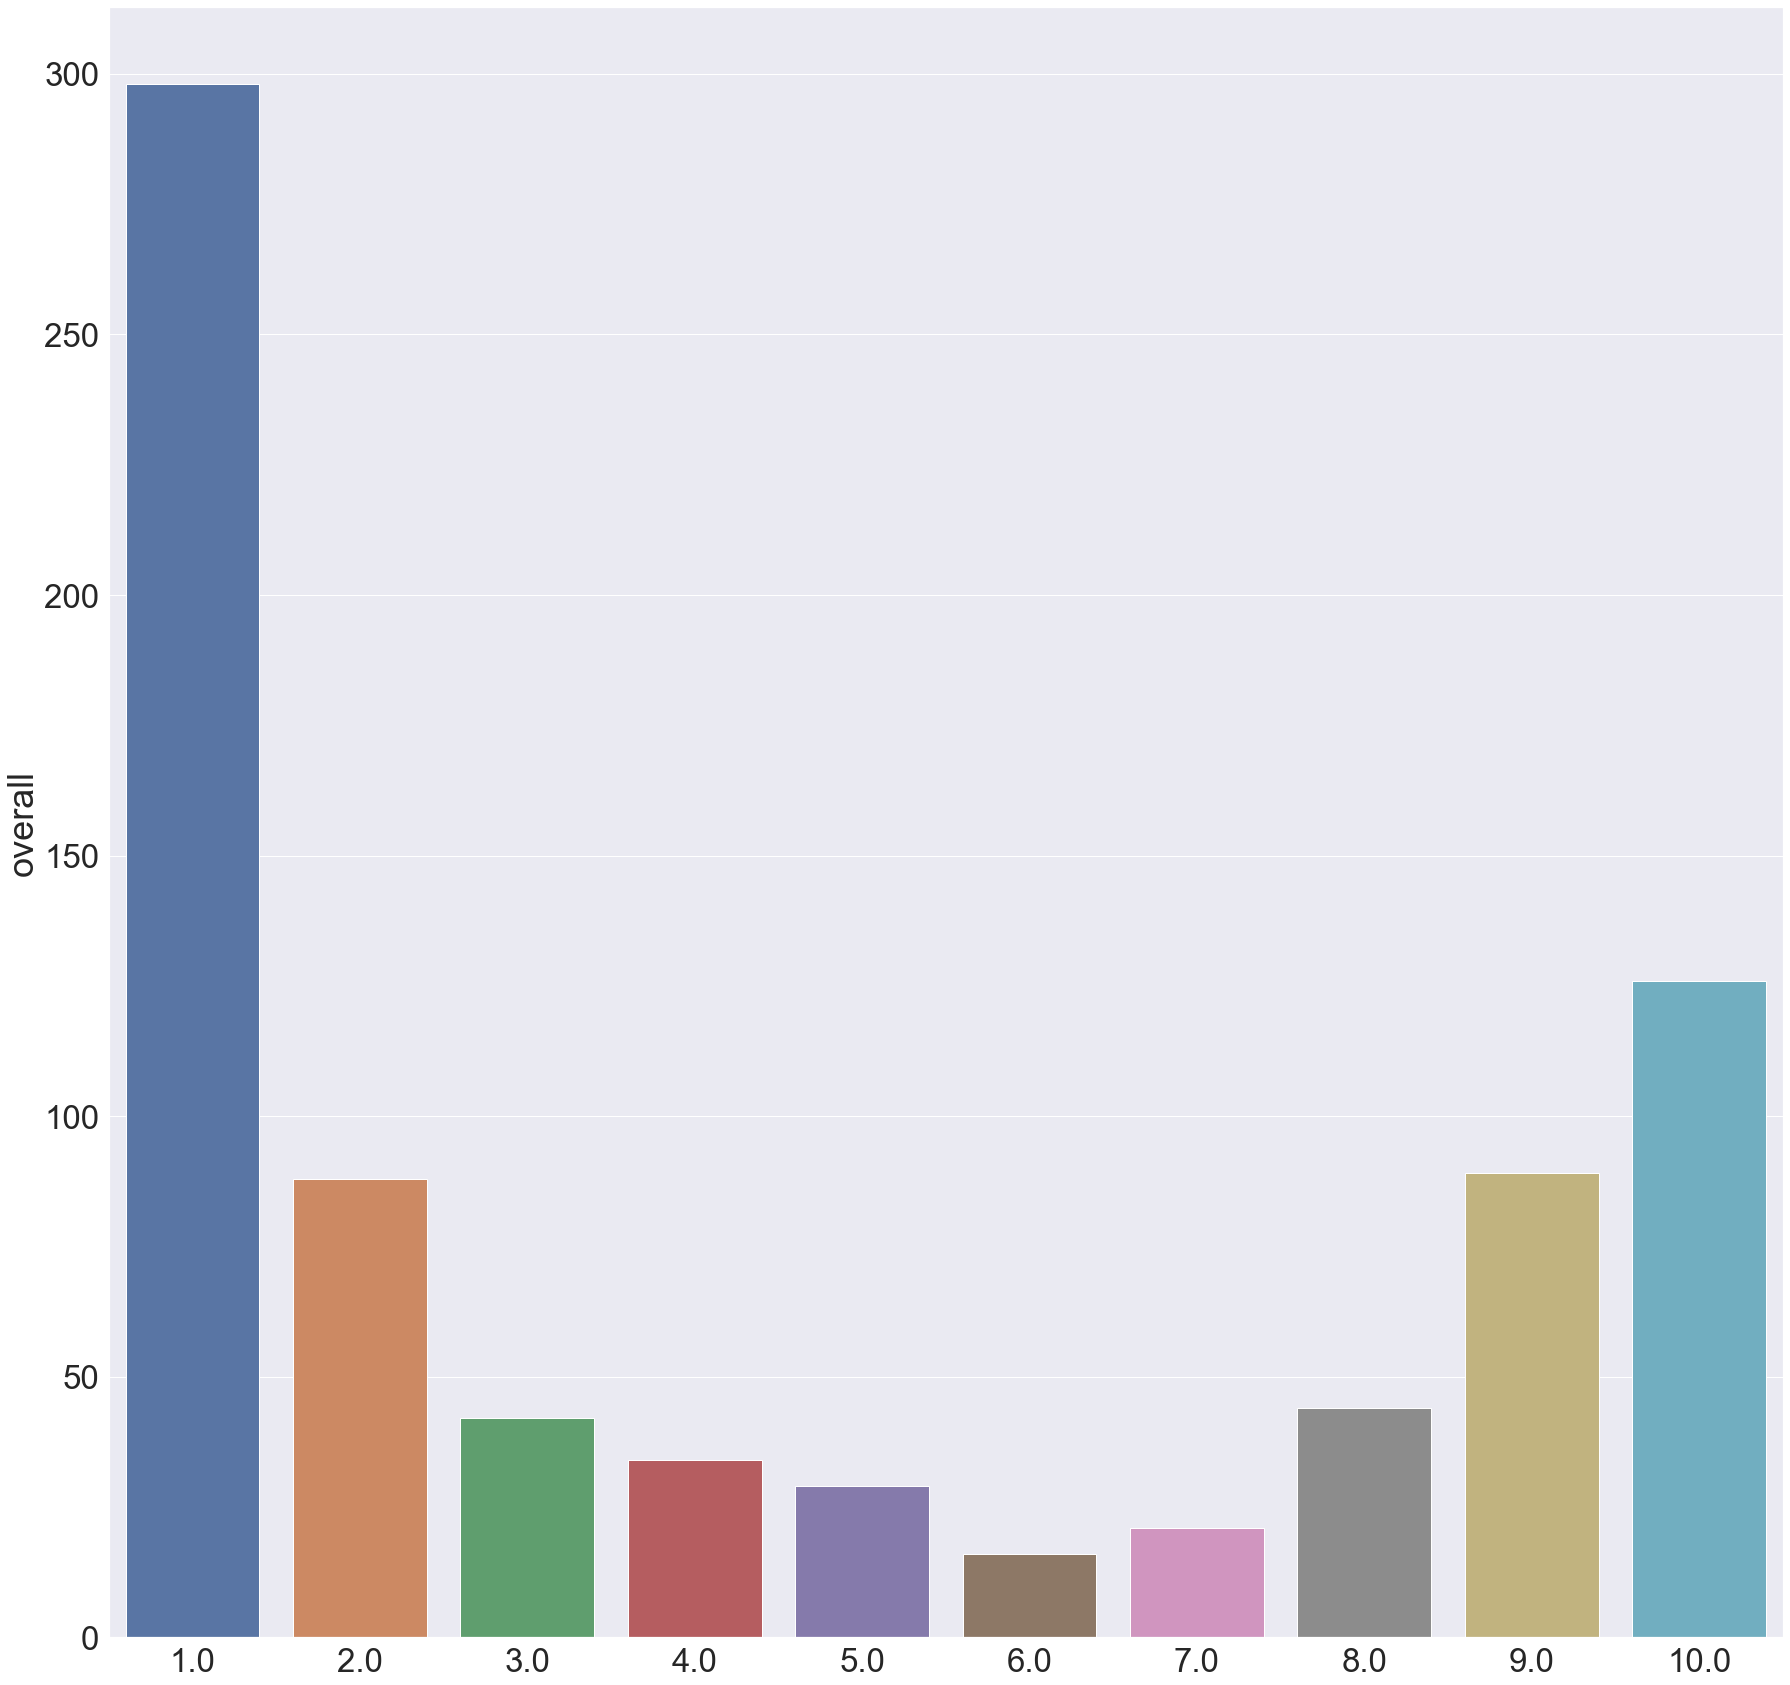

In [152]:
sns.barplot(df_Alaska_Airlines.overall.value_counts().index,df_Alaska_Airlines.overall.value_counts())

In [153]:
df_Alaska_Airlines.aircraft.nunique()

49

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aircraft'>

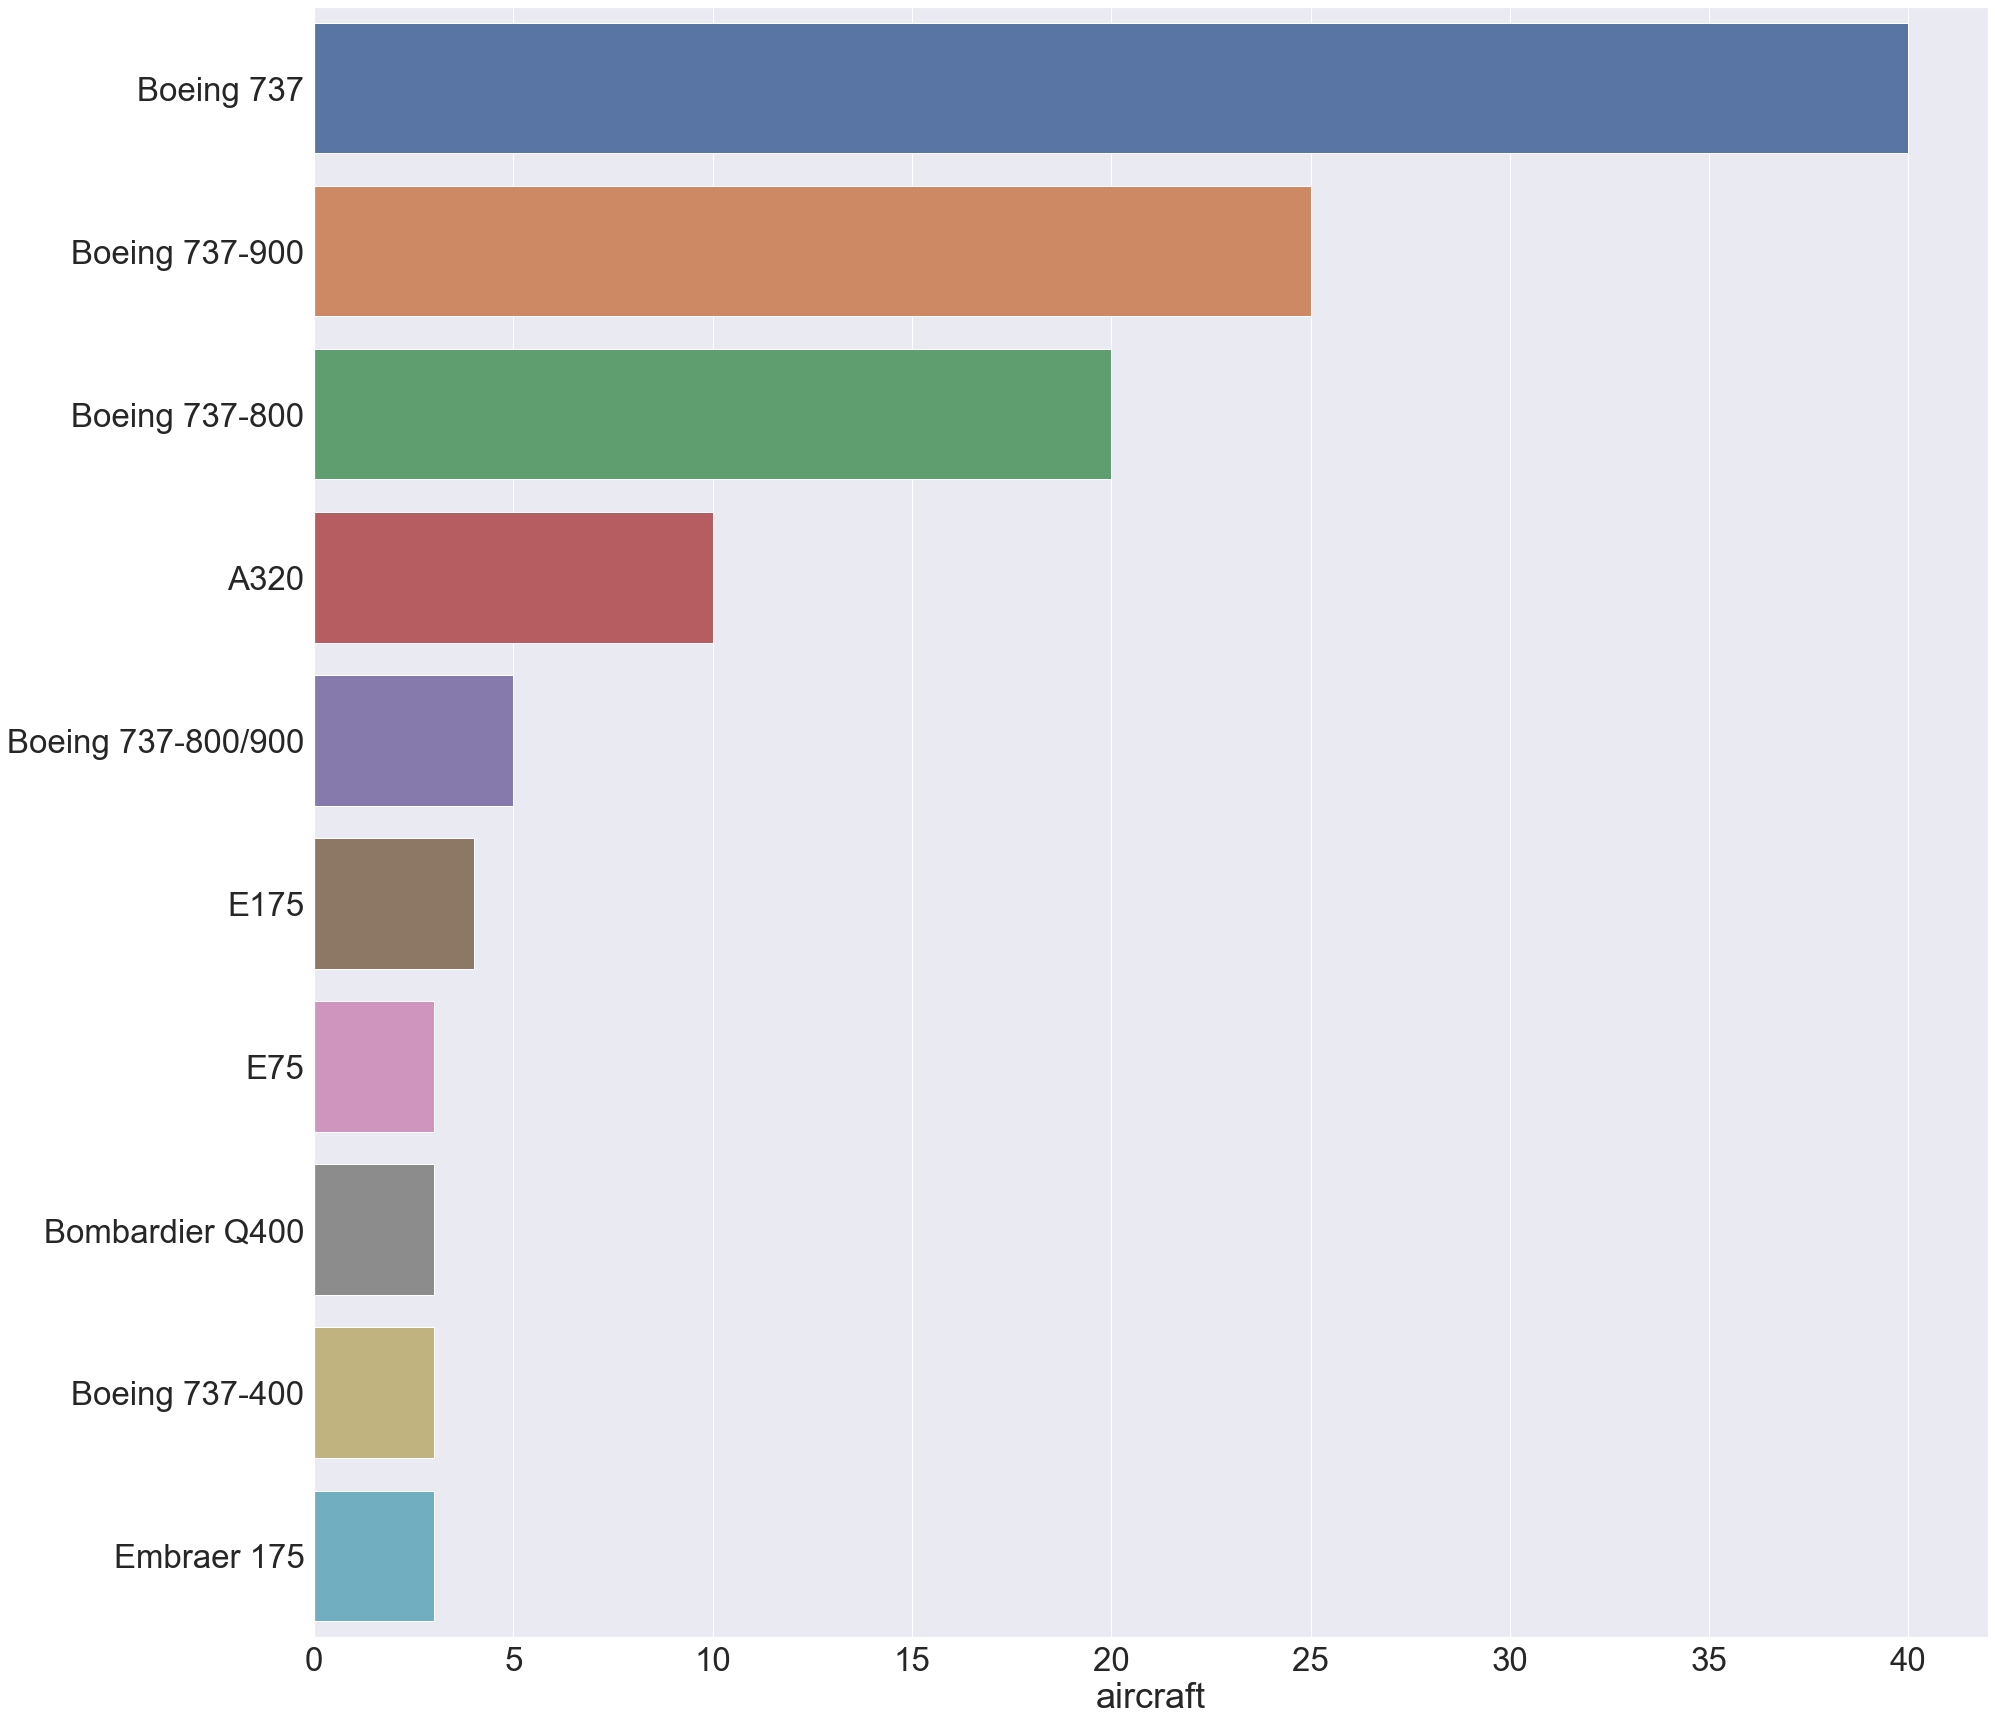

In [154]:
sns.barplot(df_Alaska_Airlines.aircraft.value_counts()[:10],df_Alaska_Airlines.aircraft.value_counts()[:10].index,orient = "h")

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='traveller_type'>

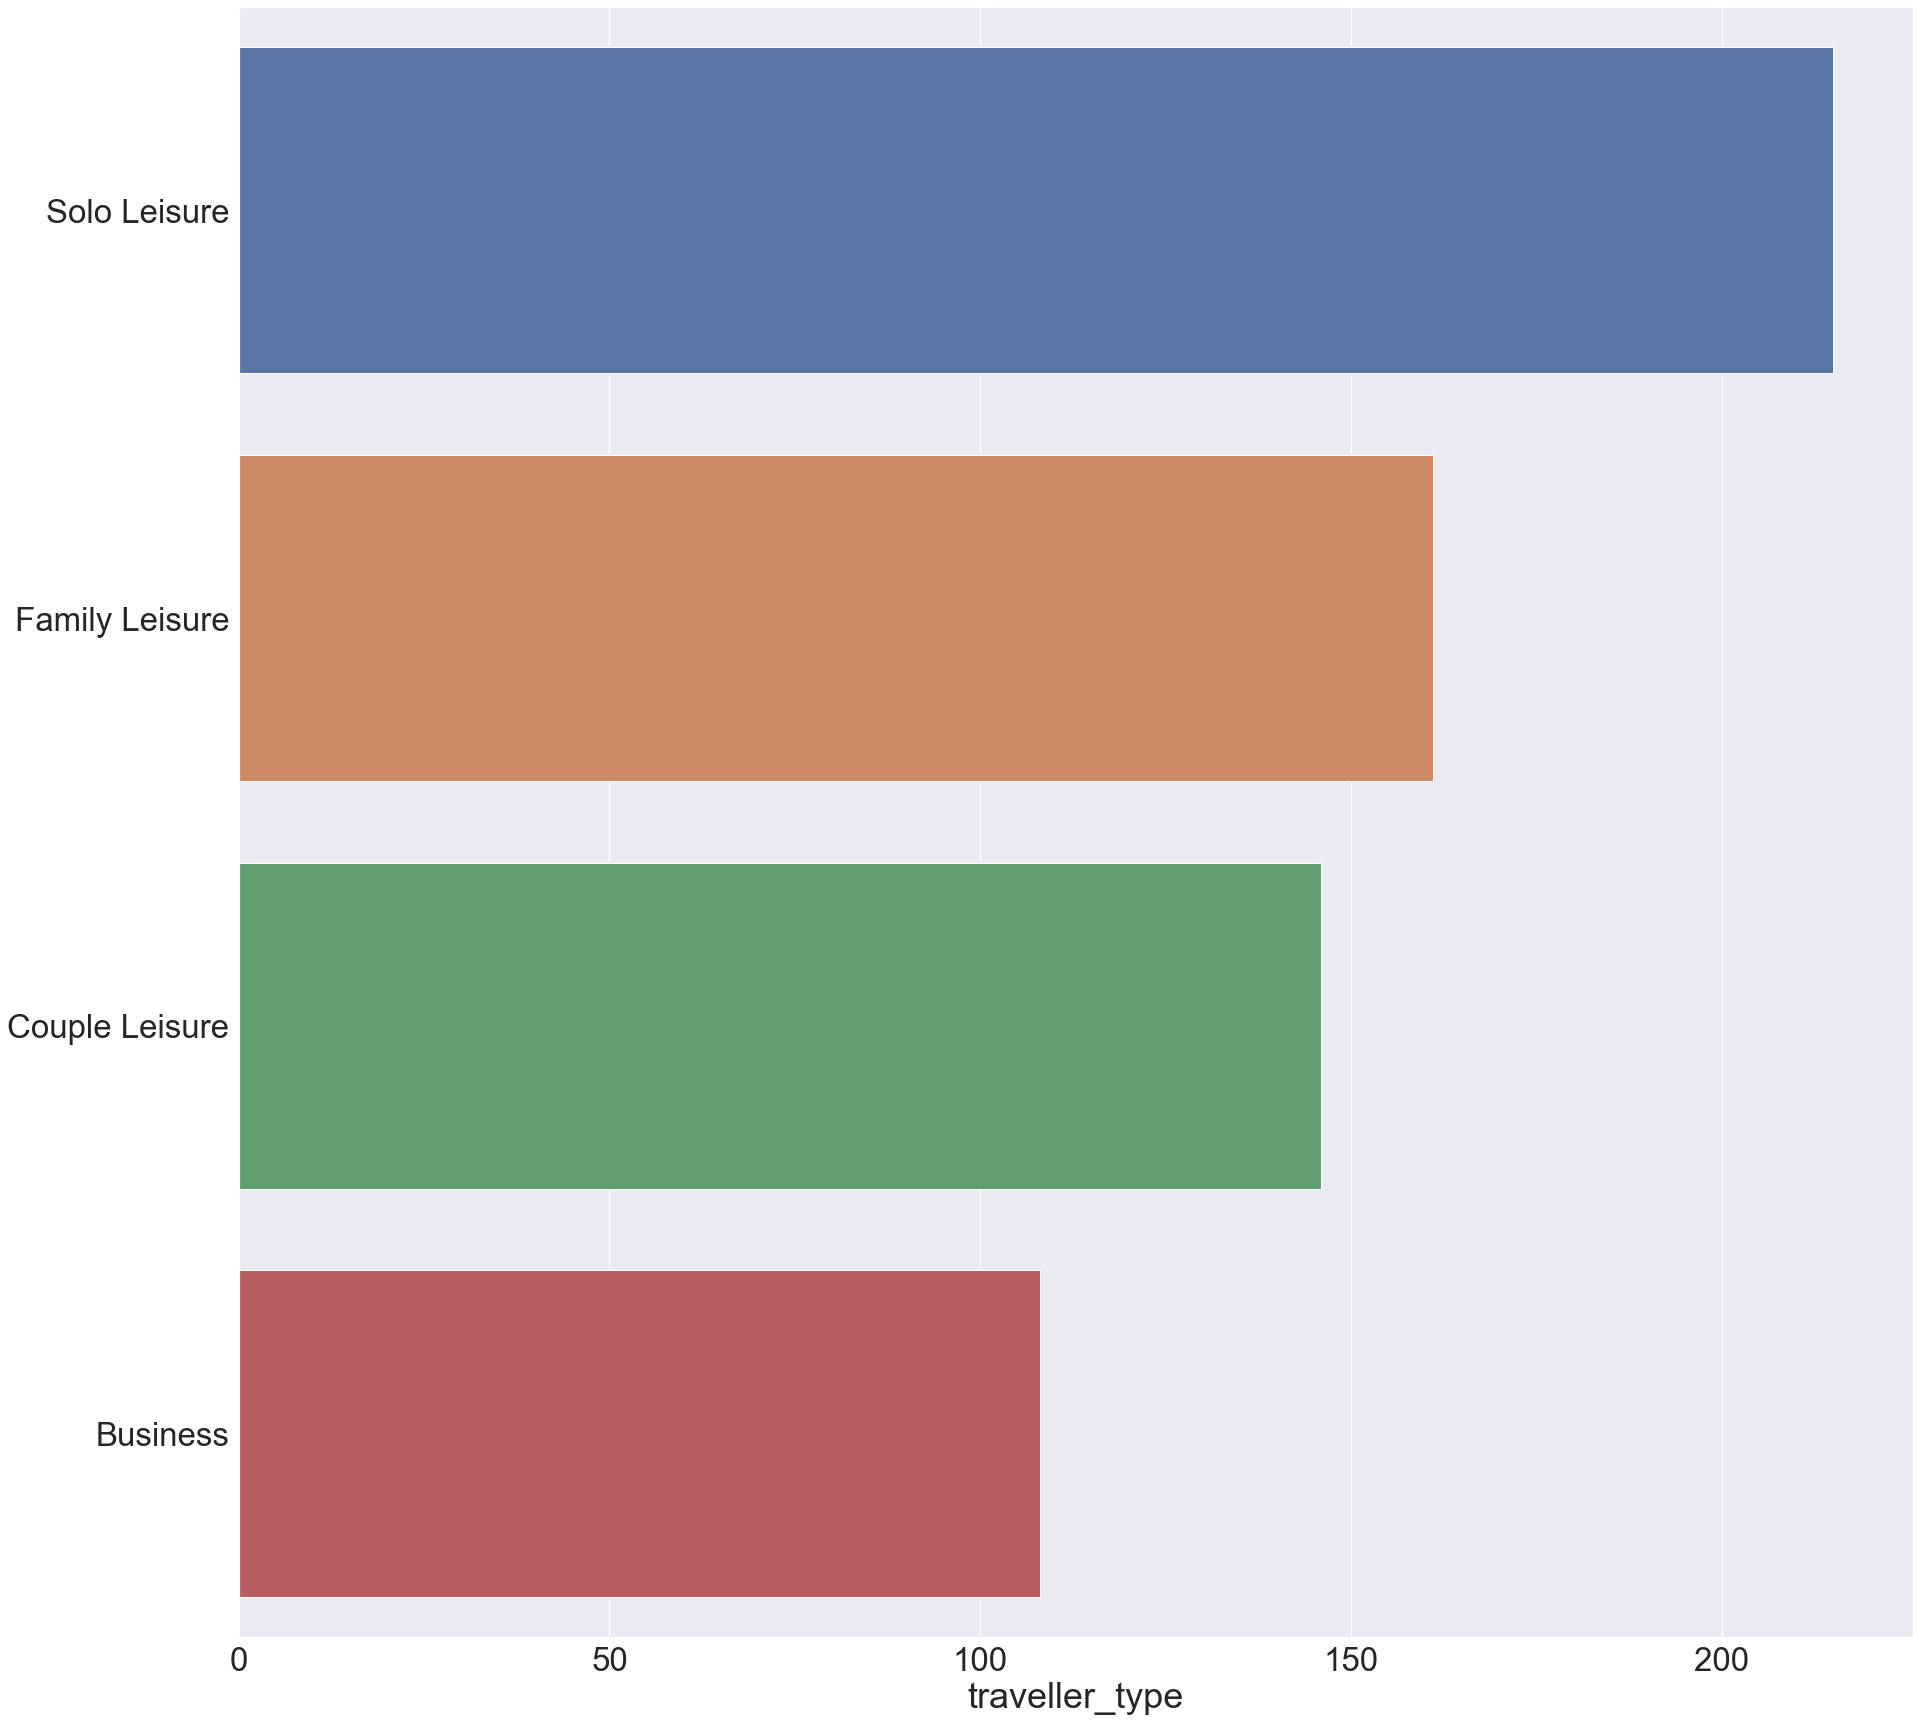

In [155]:
sns.barplot(df_Alaska_Airlines.traveller_type.value_counts(),df_Alaska_Airlines.traveller_type.value_counts().index)

In [156]:
df_Alaska_Airlines.cabin.value_counts()

Economy Class      621
First Class        136
Premium Economy     35
Business Class      14
Name: cabin, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabin'>

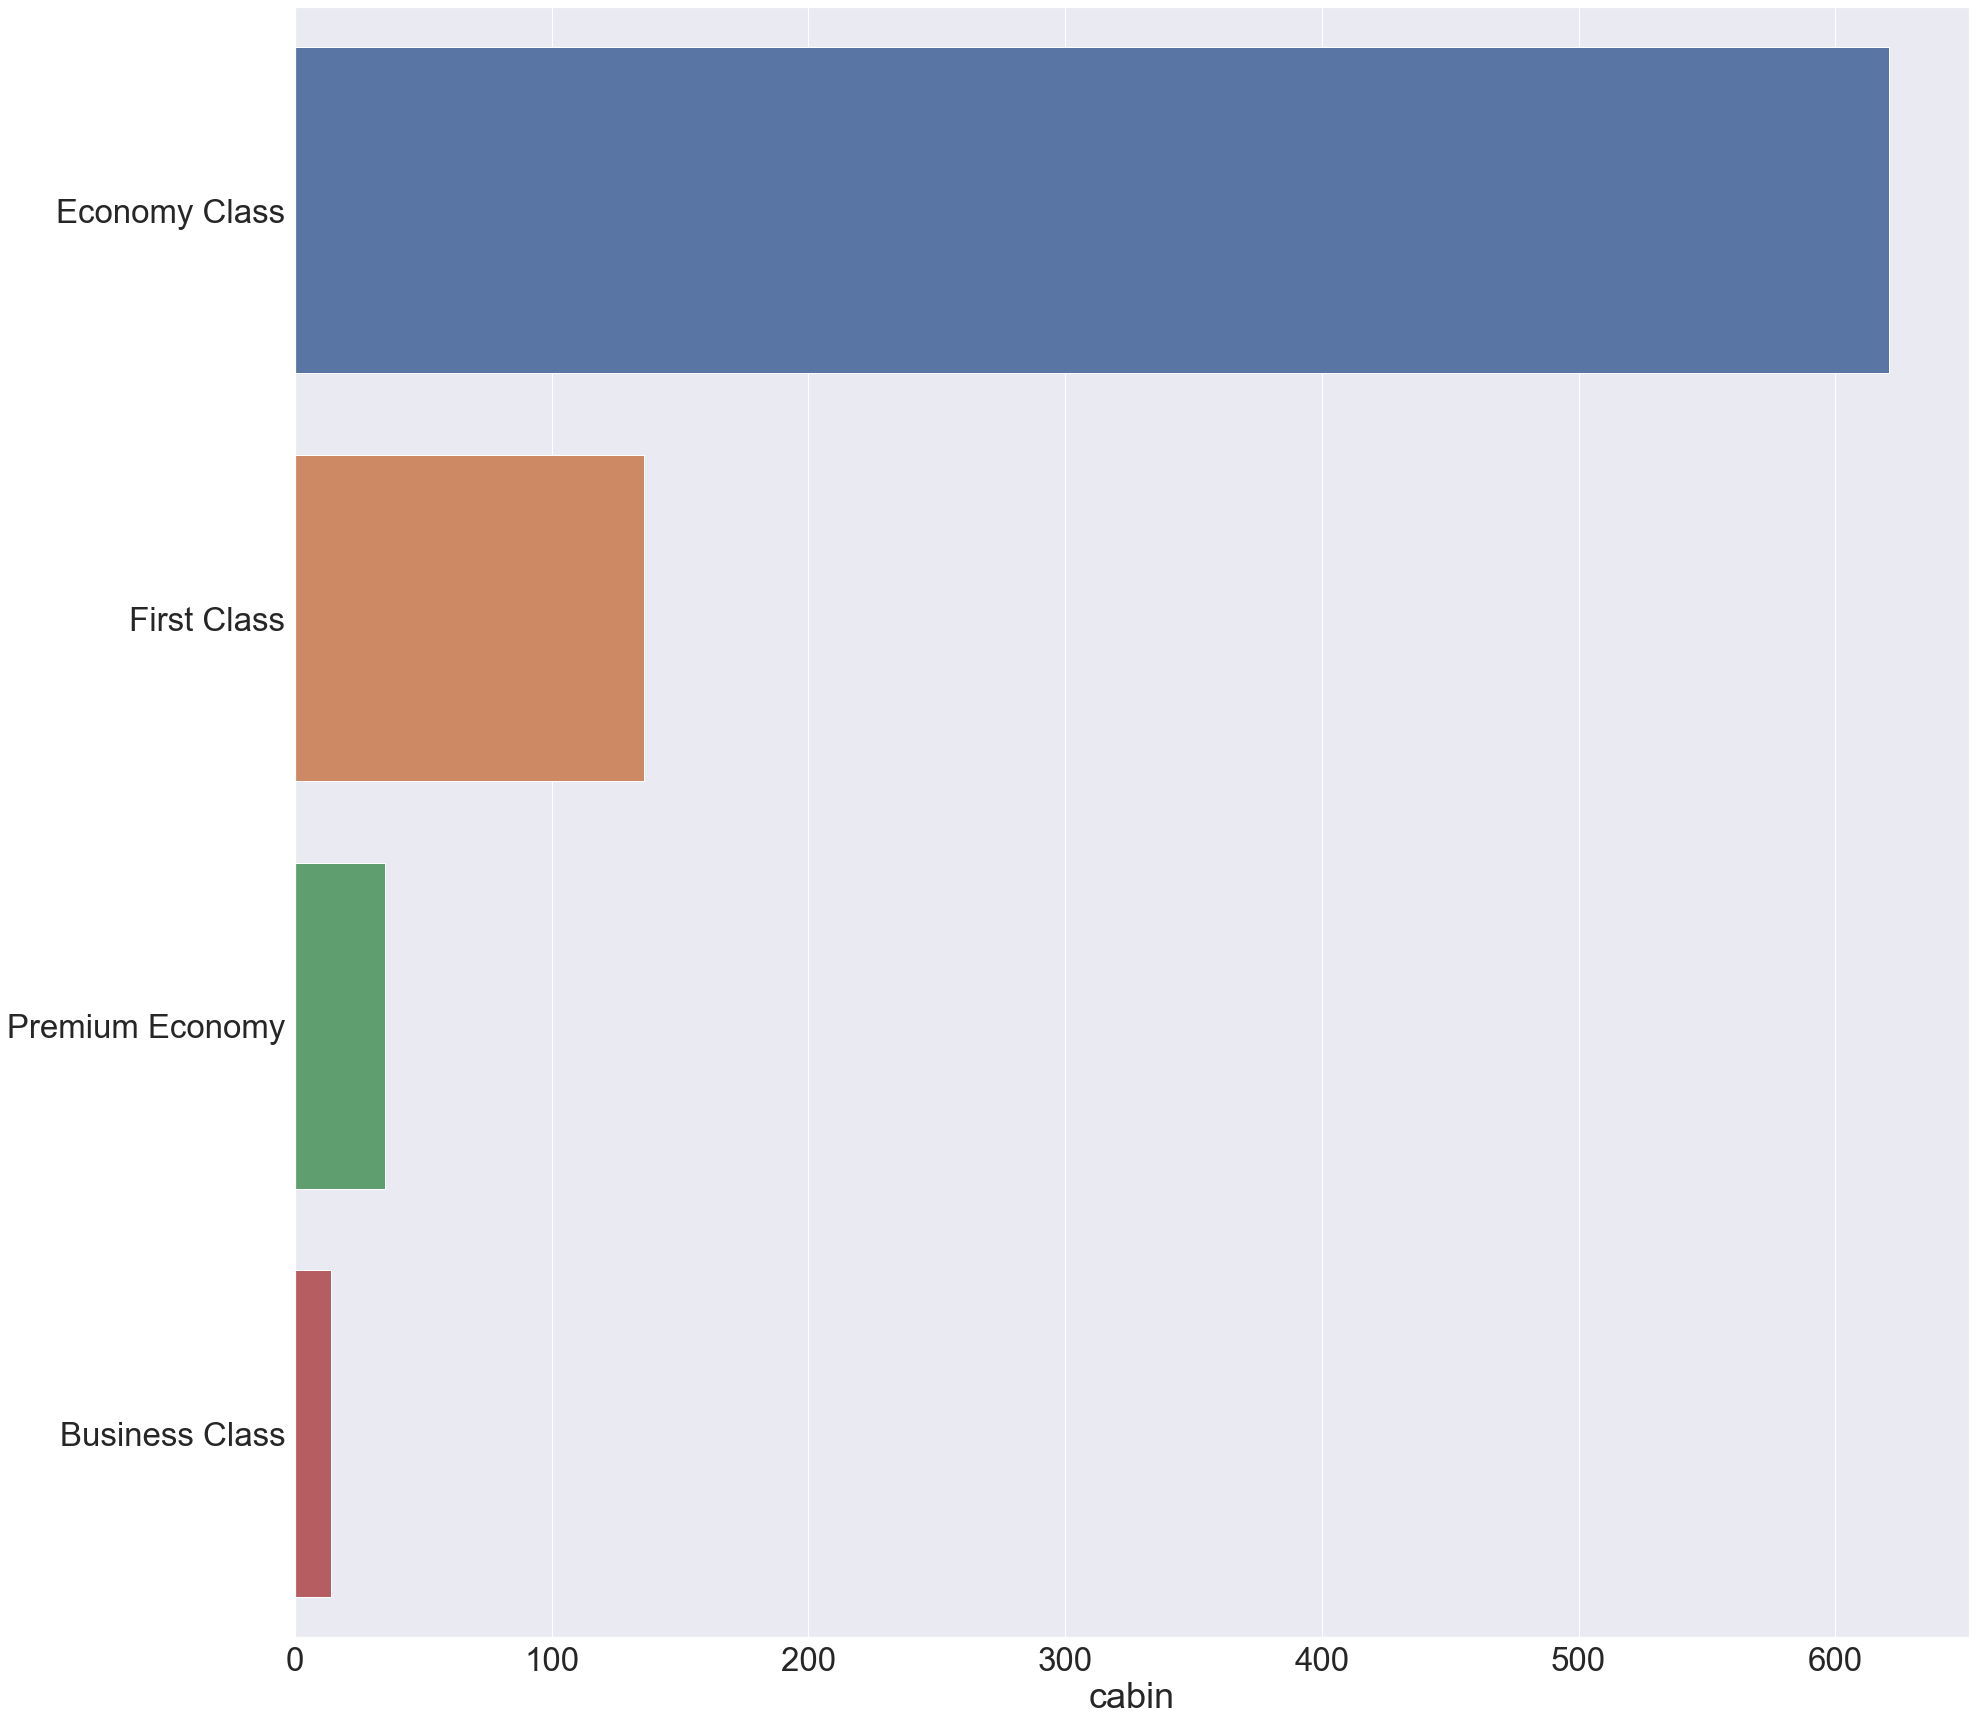

In [157]:
sns.barplot(df_Alaska_Airlines.cabin.value_counts(),df_Alaska_Airlines.cabin.value_counts().index)

In [158]:
df_Alaska_Airlines.route.nunique()

458

In [159]:
df_Alaska_Airlines.route.value_counts()[:10]

Boston to Seattle             7
Seattle to Phoenix            6
Las Vegas to San Francisco    6
Los Angeles to Seattle        6
San Diego to Seattle          5
ANC to BNA via SEA            5
Newark to Los Angeles         5
Denver to Seattle             5
San Francisco to New York     5
Seattle to Atlanta            5
Name: route, dtype: int64

In [160]:
df_Alaska_Airlines[["seat_comfort",'cabin_service', 'food_bev', 'entertainment','ground_service', 'value_for_money']].describe()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,743.000000,740.000000,574.000000,440.000000,595.000000,801.000000
mean,2.874832,3.074324,2.778746,2.665909,2.420168,2.556804
std,1.448747,1.663471,1.518301,1.553810,1.682229,1.606108
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='seat_comfort'>

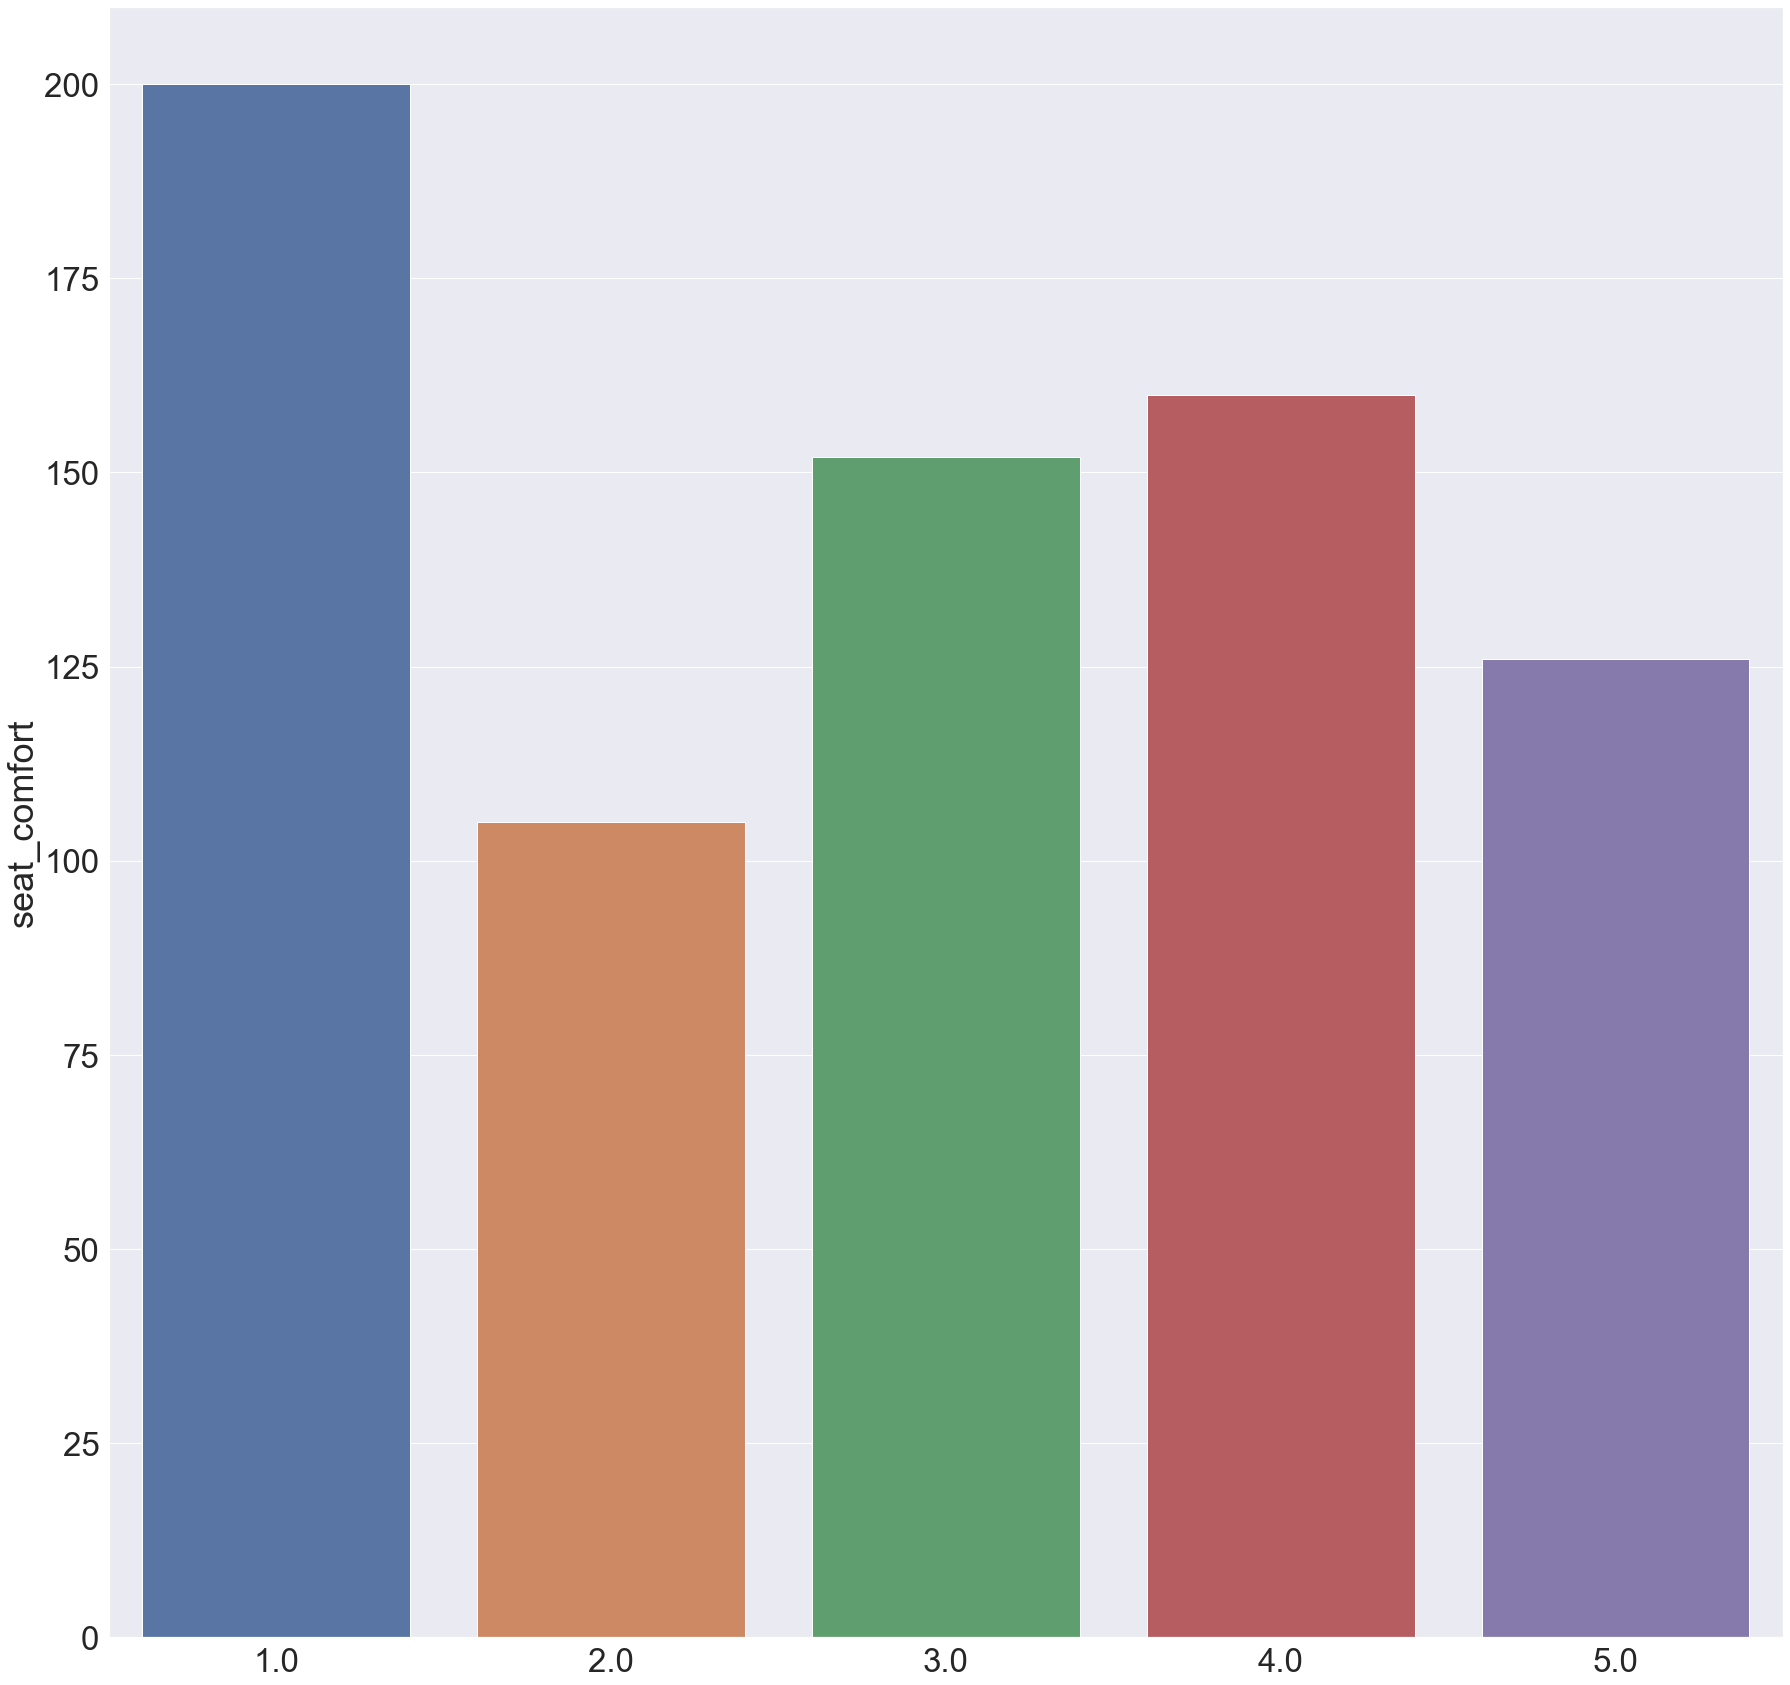

In [161]:
sns.barplot(df_Alaska_Airlines.seat_comfort.value_counts().index,df_Alaska_Airlines.seat_comfort.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='cabin_service'>

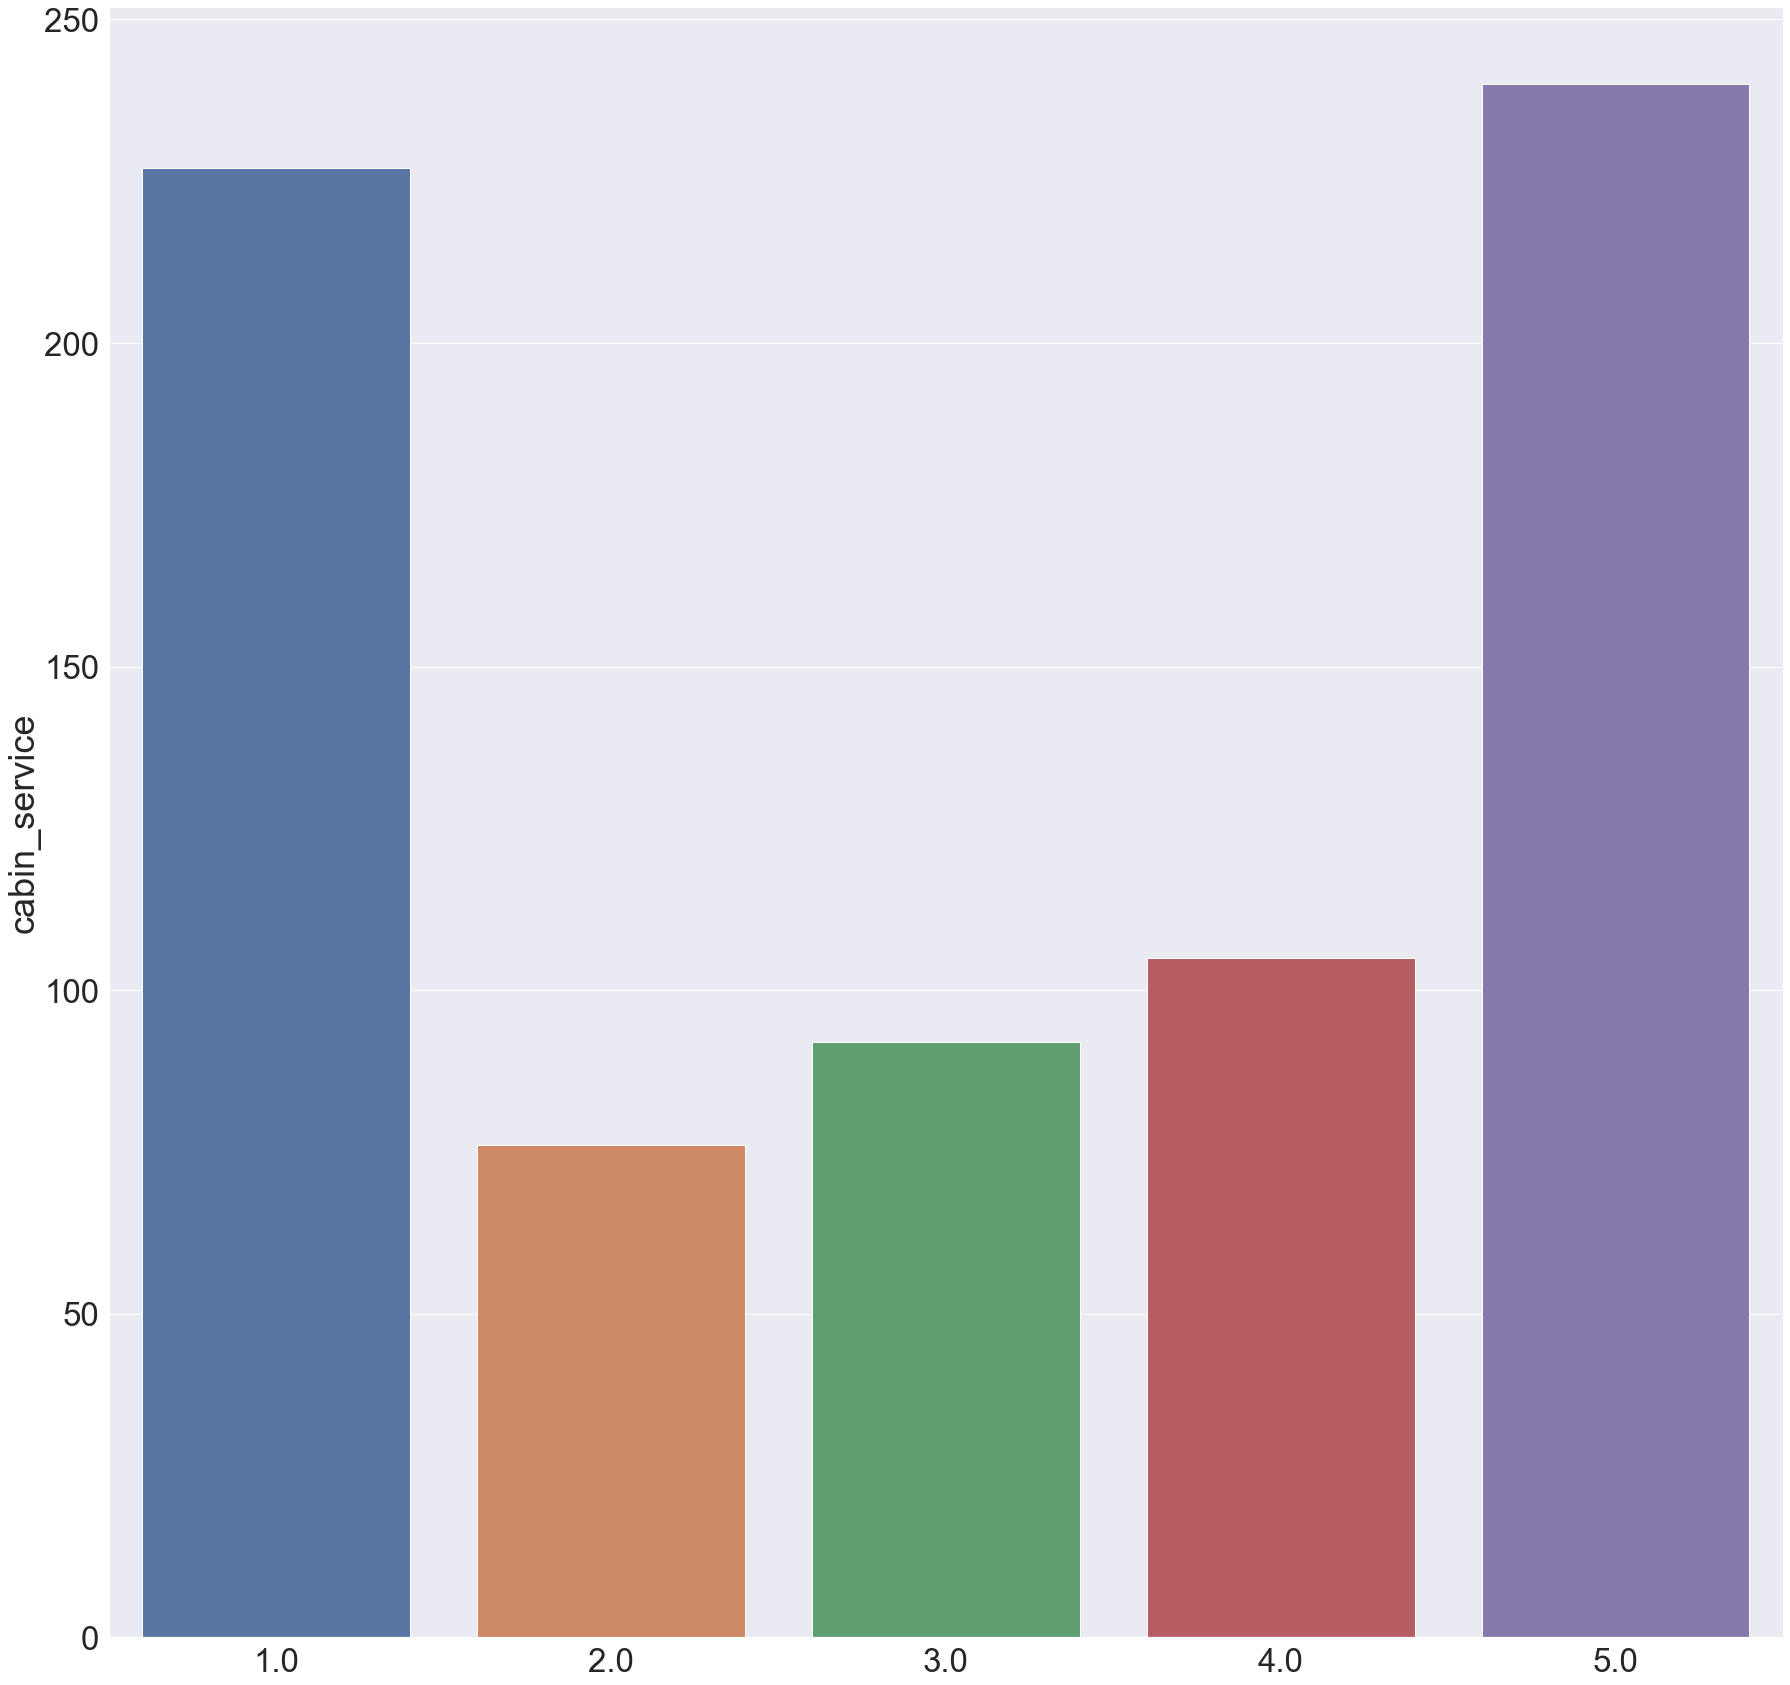

In [162]:
sns.barplot(df_Alaska_Airlines.cabin_service.value_counts().index,df_Alaska_Airlines.cabin_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='food_bev'>

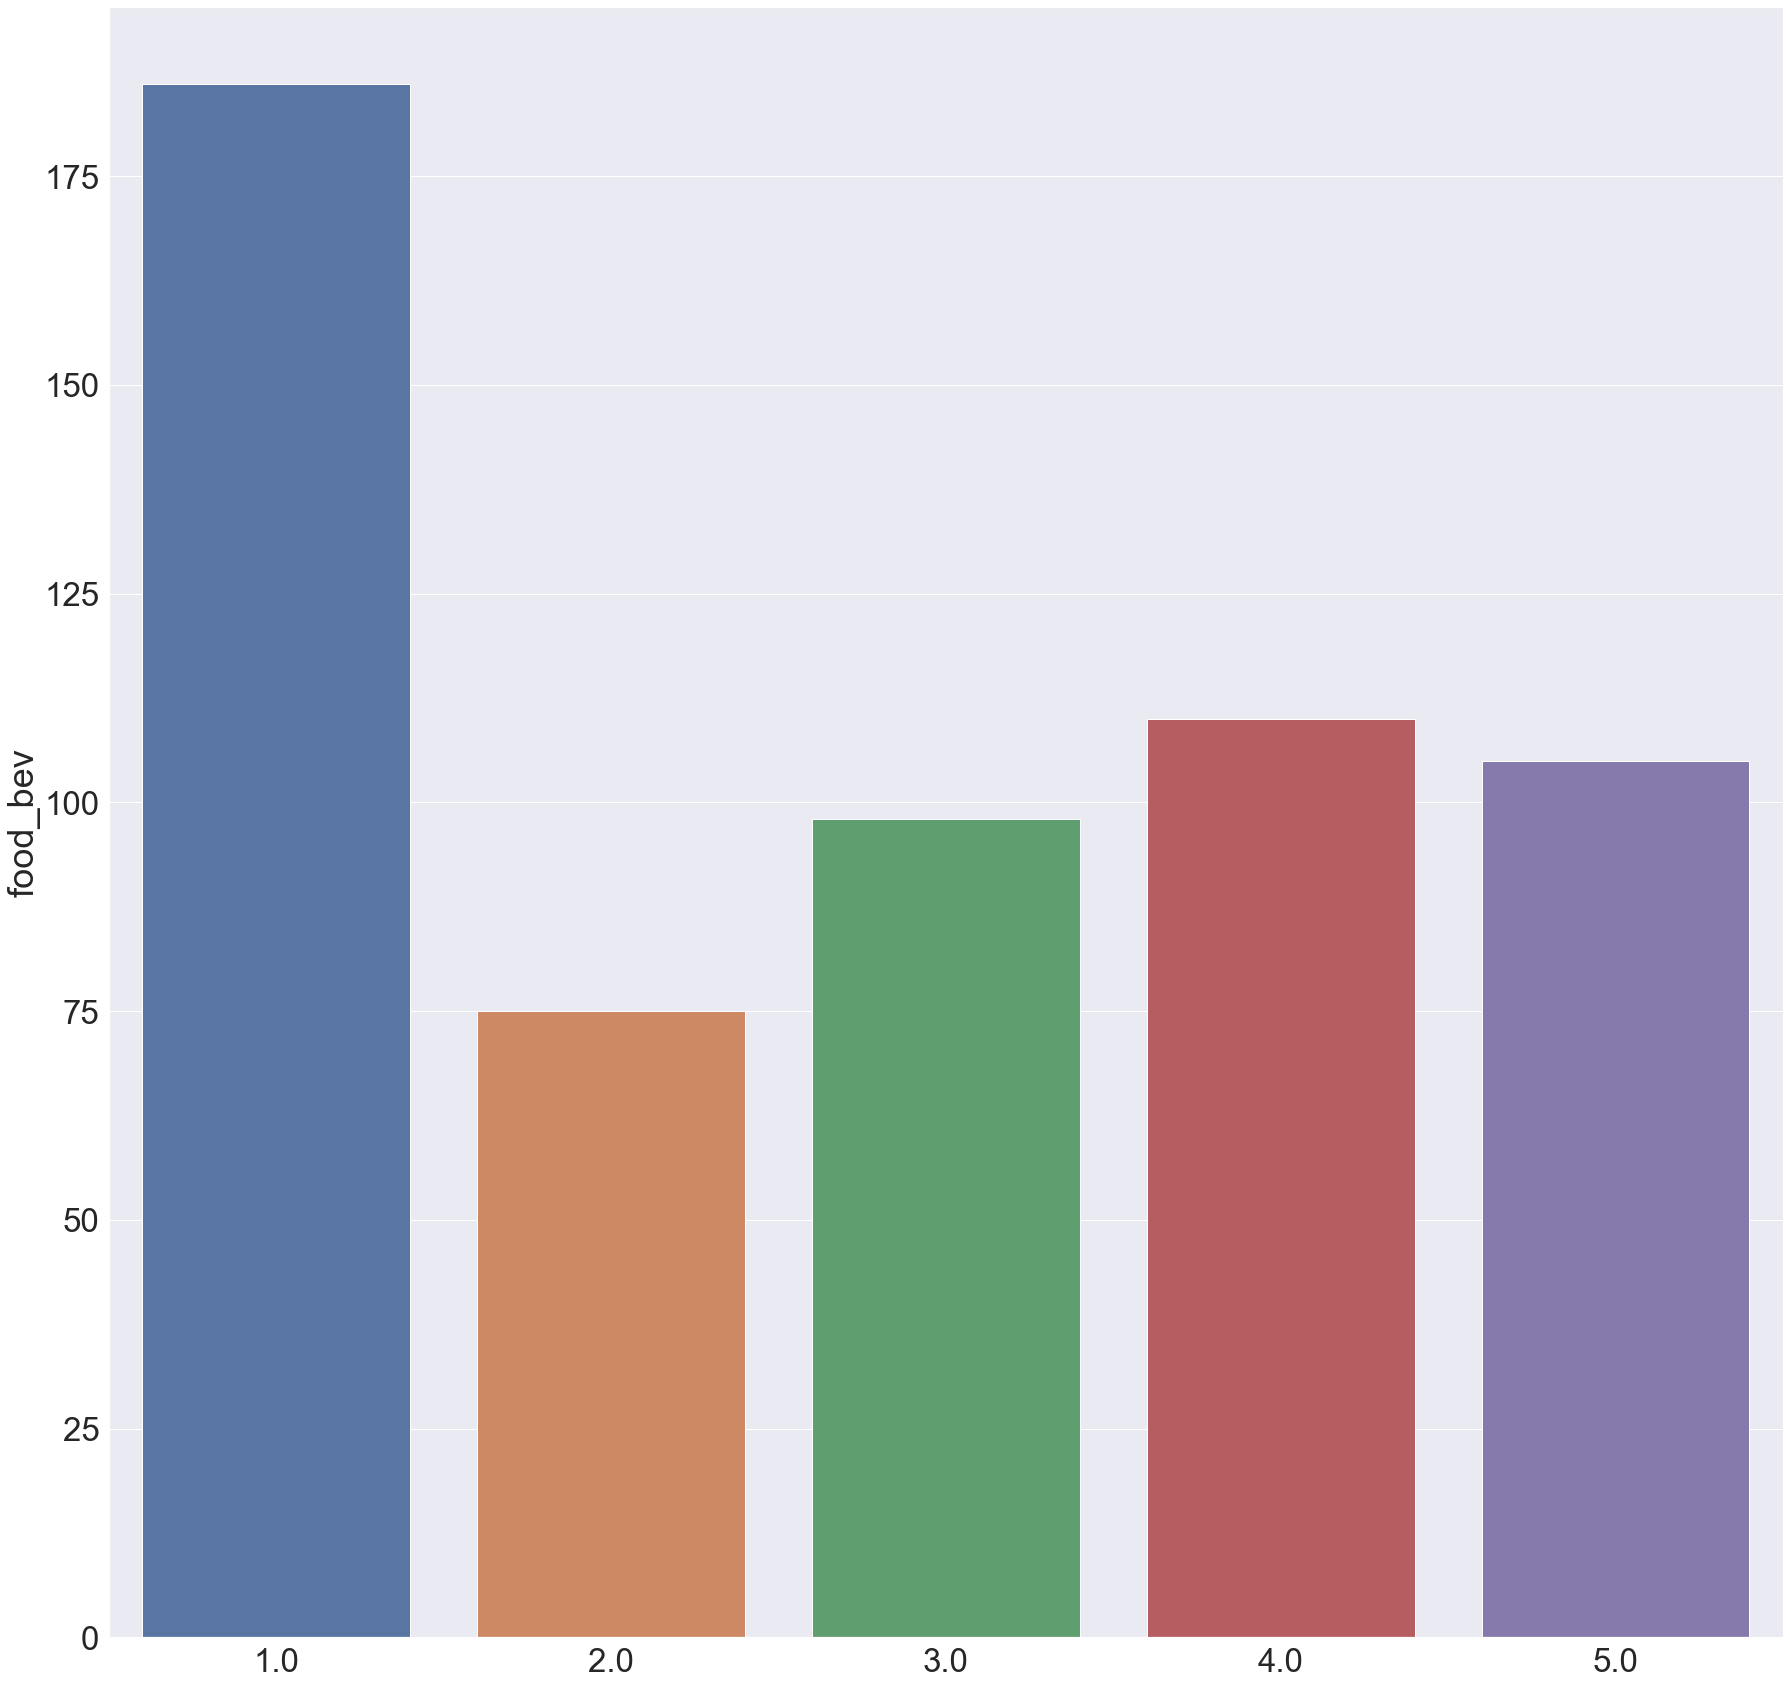

In [163]:
sns.barplot(df_Alaska_Airlines.food_bev.value_counts().index,df_Alaska_Airlines.food_bev.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='entertainment'>

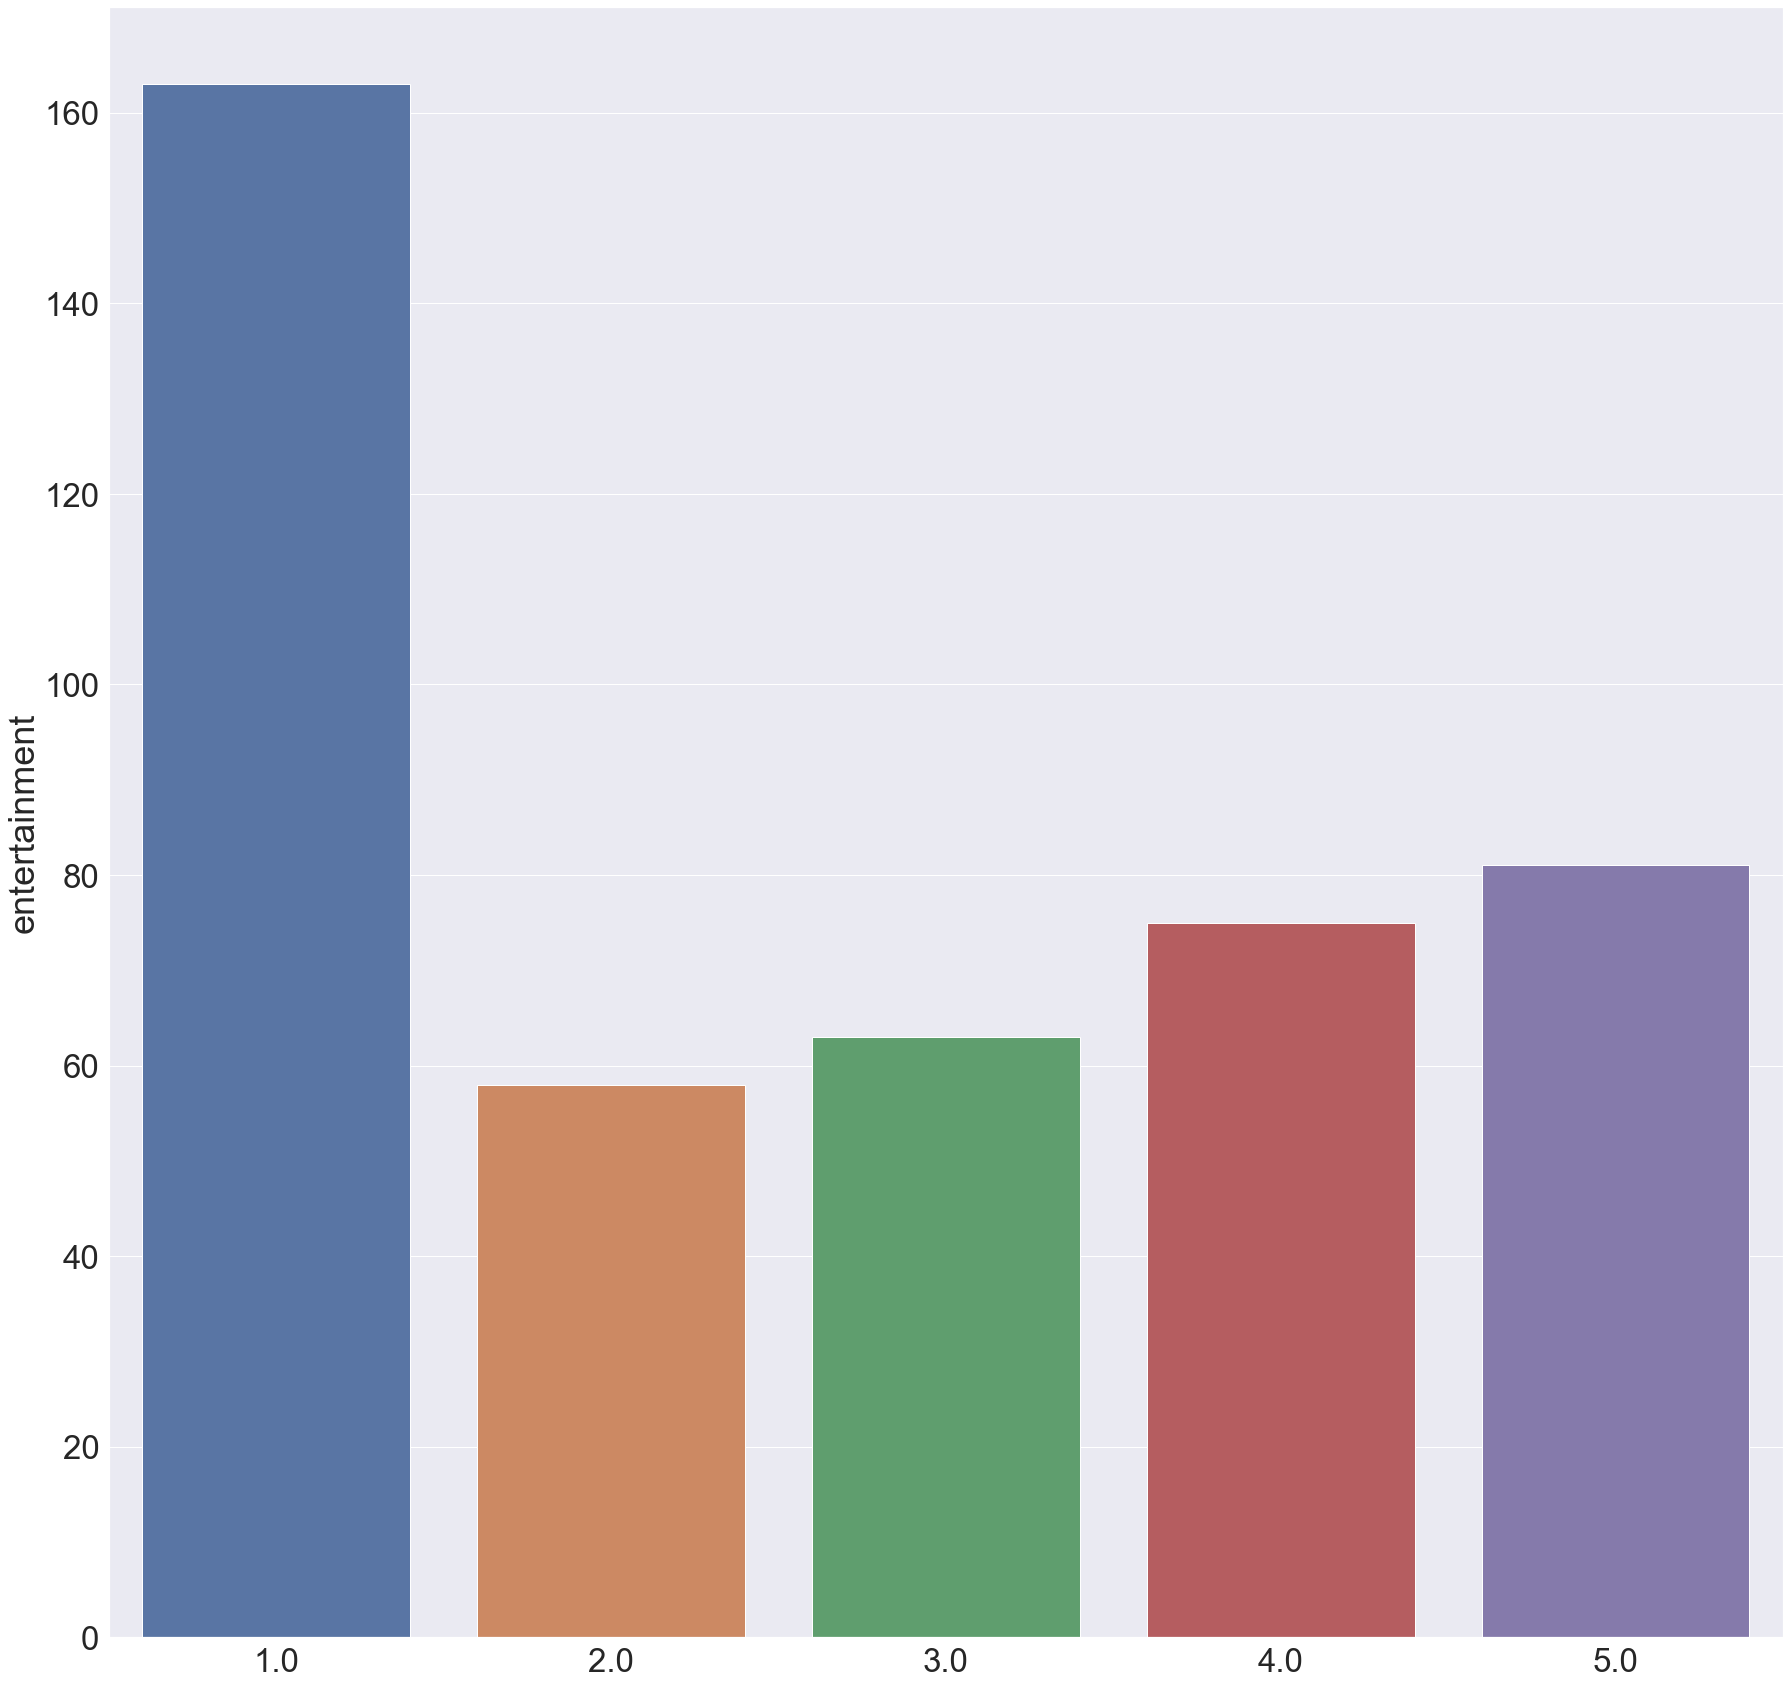

In [164]:
sns.barplot(df_Alaska_Airlines.entertainment.value_counts().index,df_Alaska_Airlines.entertainment.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='ground_service'>

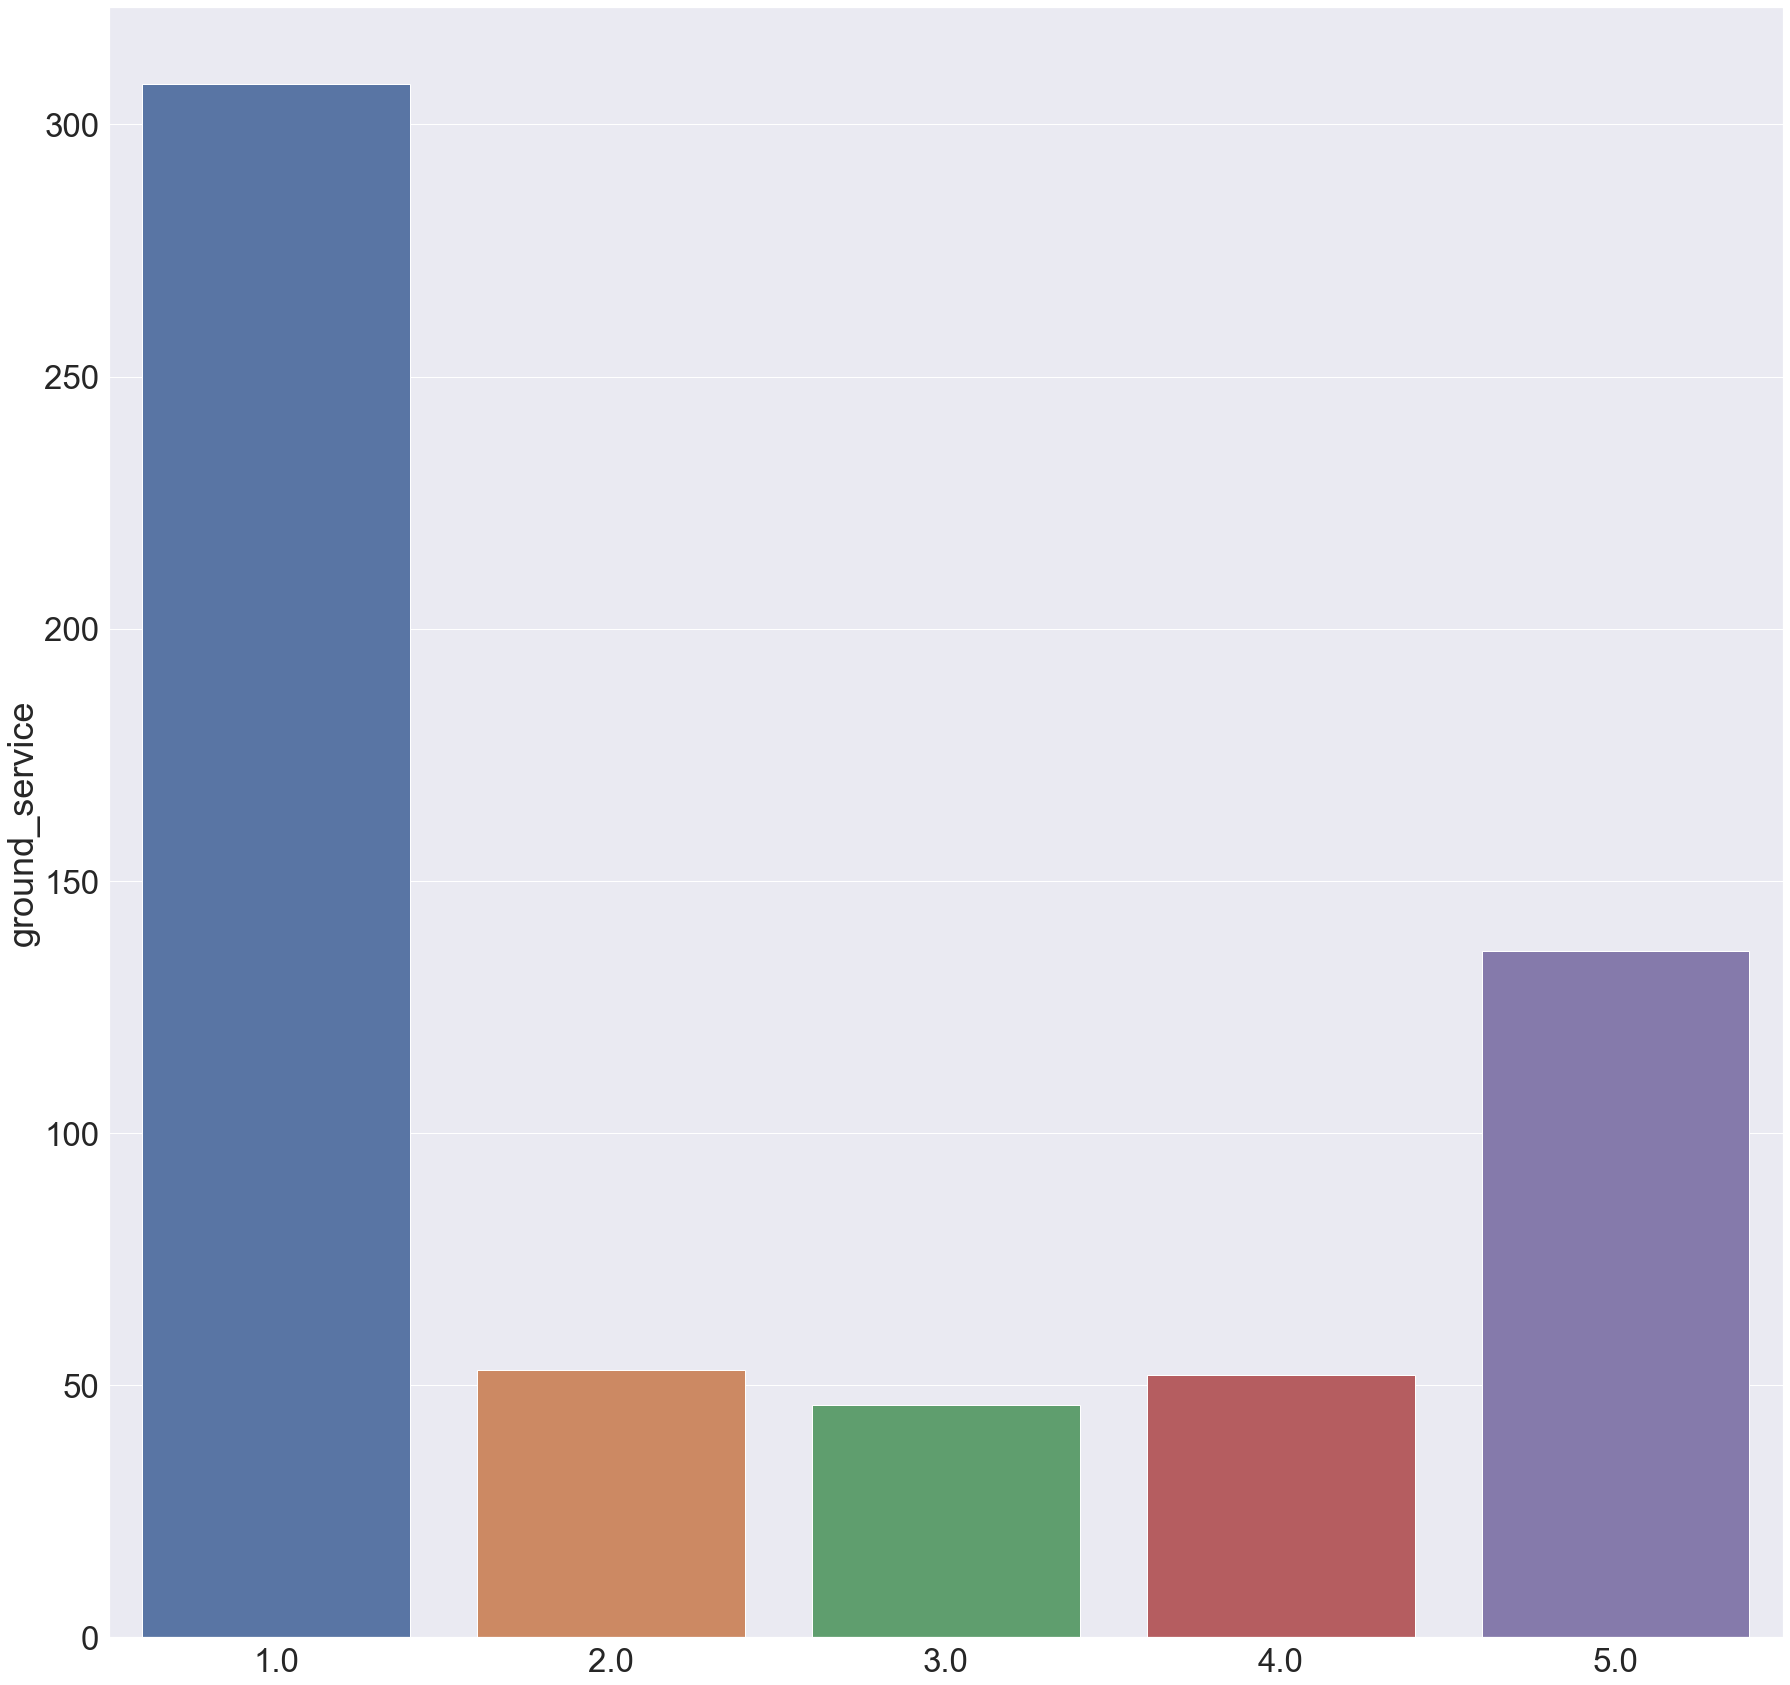

In [165]:
sns.barplot(df_Alaska_Airlines.ground_service.value_counts().index,df_Alaska_Airlines.ground_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='value_for_money'>

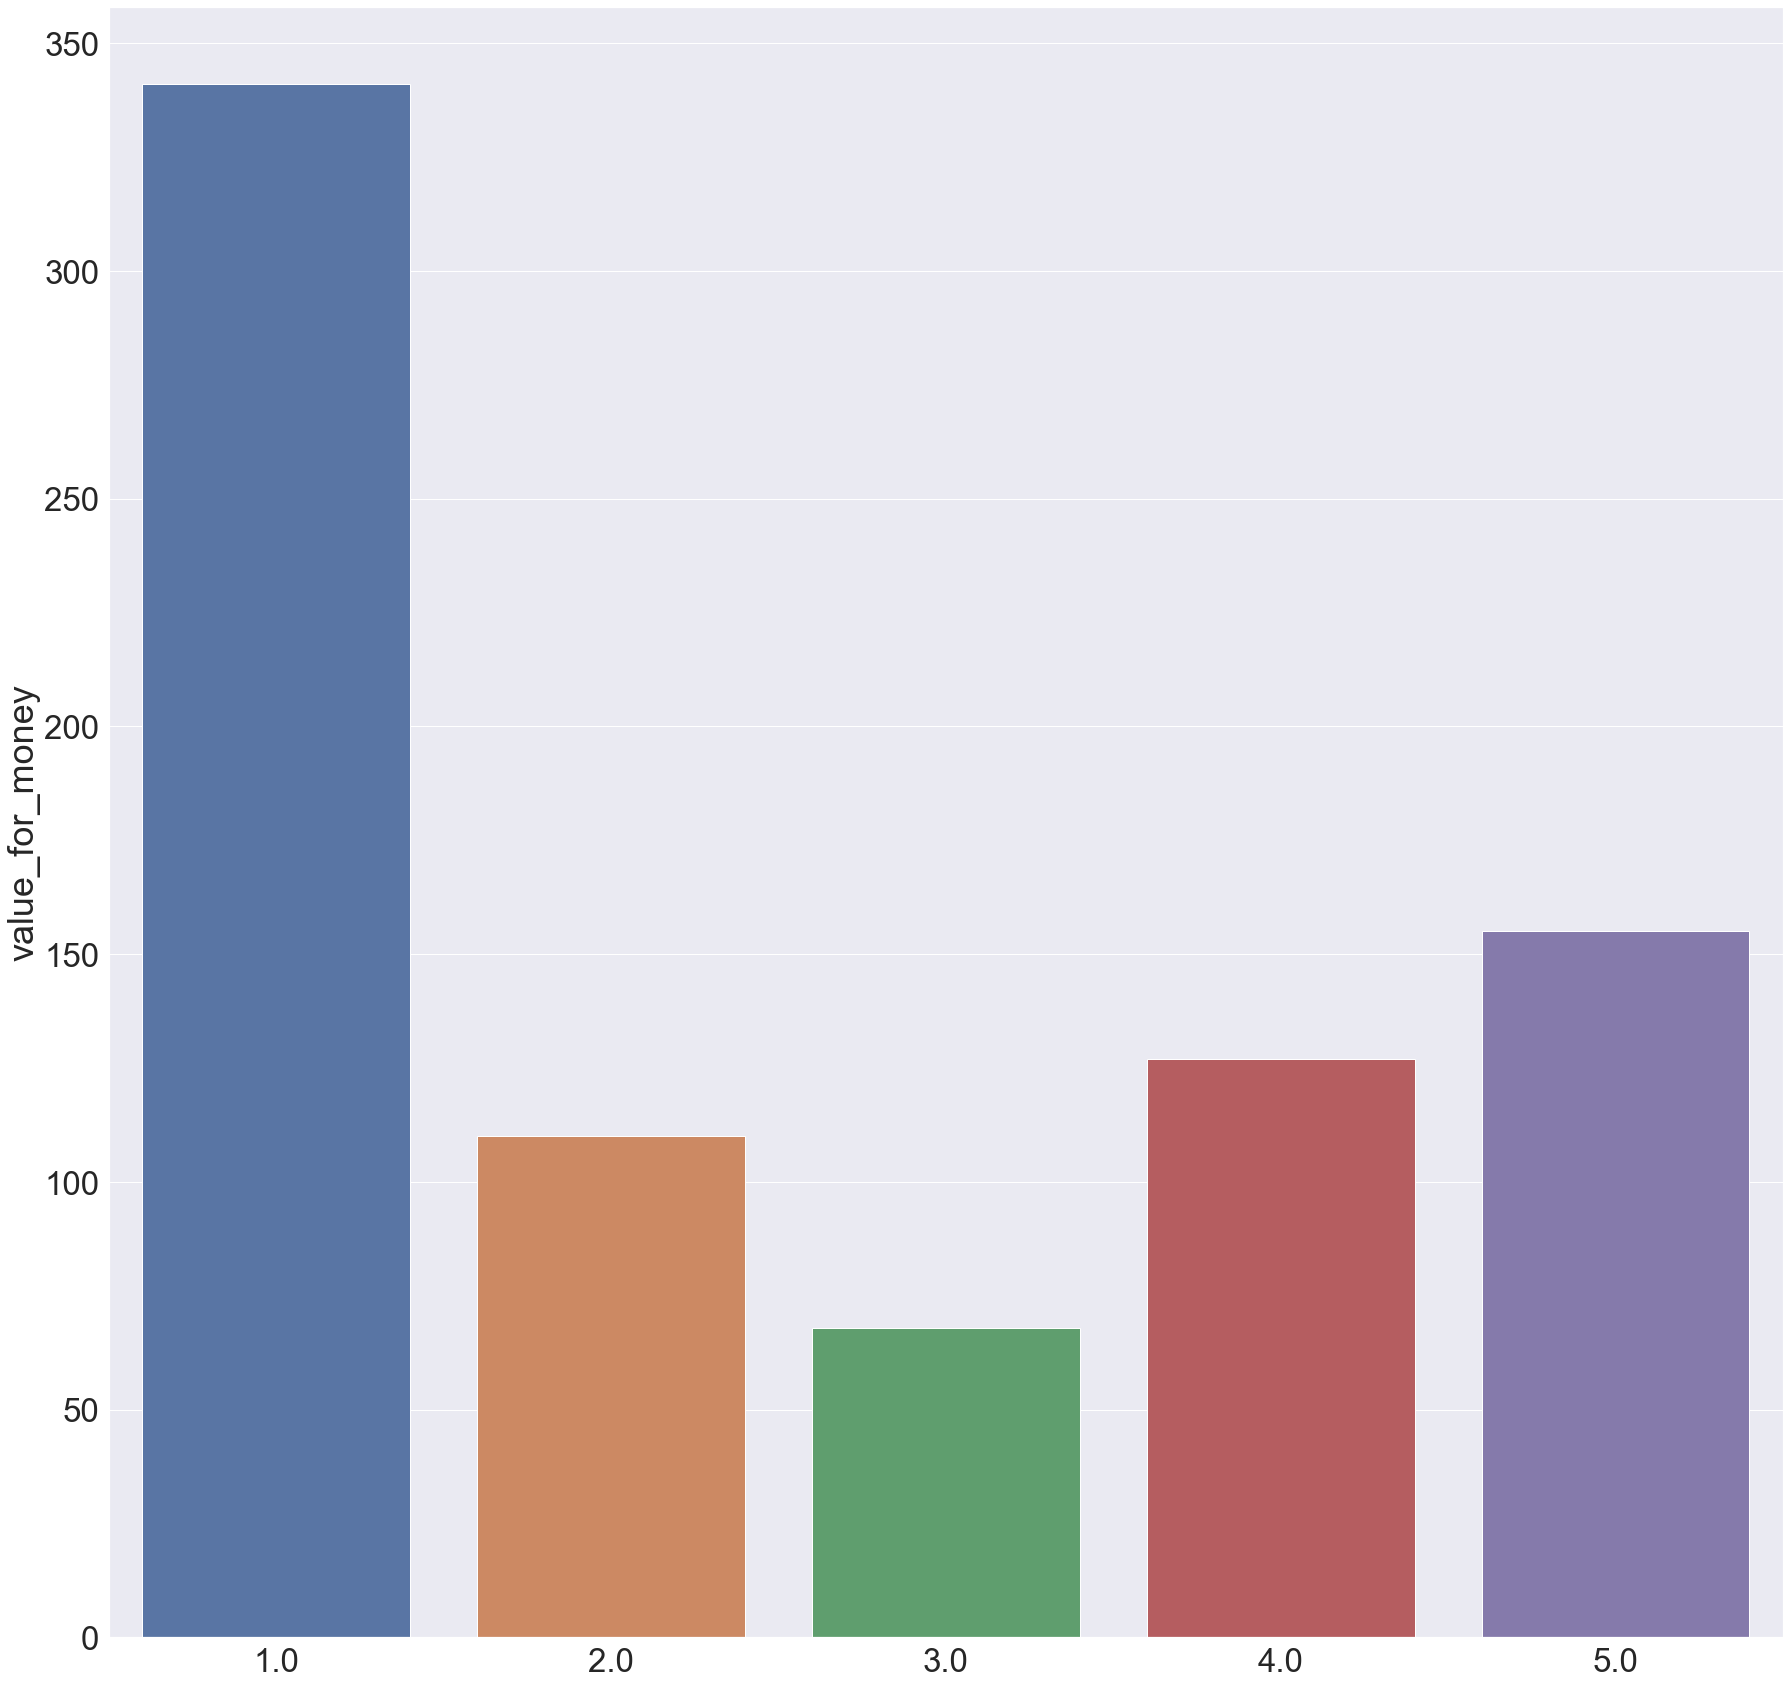

In [166]:
sns.barplot(df_Alaska_Airlines.value_for_money.value_counts().index,df_Alaska_Airlines.value_for_money.value_counts())

In [167]:
df_Alaska_Airlines["flair_sentiment_score"] = df_Alaska_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))

<ipython-input-167-99683db5b9b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alaska_Airlines["flair_sentiment_score"] = df_Alaska_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))


In [168]:
df_Alaska_Airlines["flair_sentiment_sentiment"] = df_Alaska_Airlines.customer_review.apply(lambda x: sentiment_value(x))

<ipython-input-168-41fa5186e20f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alaska_Airlines["flair_sentiment_sentiment"] = df_Alaska_Airlines.customer_review.apply(lambda x: sentiment_value(x))


In [169]:
df_Alaska_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,flair_sentiment_score,flair_sentiment_sentiment
6804,6804,Alaska Airlines,10.0,G Marten,16th May 2022,✅ Trip Verified | Alaska Airlines impressed me...,NaN,Couple Leisure,Economy Class,San Diego to Seattle,22-May,4.0,5.0,5.0,5.0,5.0,5.0,yes,0.983789,POSITIVE
6805,6805,Alaska Airlines,1.0,T Chapman,13th May 2022,"✅ Trip Verified | TSA took forever, more than ...",NaN,Solo Leisure,Economy Class,Seattle to Ontario,22-Feb,3.0,3.0,3.0,3.0,1.0,1.0,no,0.999976,NEGATIVE
6806,6806,Alaska Airlines,2.0,M Carney,7th May 2022,✅ Trip Verified | My company booked a round tr...,Boeing 737,Business,Economy Class,Seattle to Nashville,22-May,2.0,4.0,NaN,NaN,1.0,1.0,no,0.999989,NEGATIVE
6807,6807,Alaska Airlines,1.0,D Pierce,2nd May 2022,Not Verified | We were returning home from Por...,A320,Business,First Class,Orange County to Portland,22-Apr,NaN,NaN,NaN,NaN,1.0,1.0,no,0.999967,NEGATIVE
6808,6808,Alaska Airlines,1.0,A Rayne,1st May 2022,✅ Trip Verified | They cancel flights without ...,NaN,Business,Economy Class,San Francisco to New York,22-May,1.0,1.0,NaN,NaN,1.0,1.0,no,0.999993,NEGATIVE


In [170]:
df_Alaska_Airlines.describe()

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,flair_sentiment_score
count,806.000000,787.000000,743.000000,740.000000,574.000000,440.000000,595.000000,801.000000,806.000000
mean,7206.500000,4.494282,2.874832,3.074324,2.778746,2.665909,2.420168,2.556804,0.986834
std,232.816451,3.677648,1.448747,1.663471,1.518301,1.553810,1.682229,1.606108,0.054617
min,6804.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.510903
25%,7005.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998556
50%,7206.500000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,0.999888
75%,7407.750000,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,0.999986
max,7609.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.999998


In [171]:
df_Alaska_Airlines["recommended_new"] = df_Alaska_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)

<ipython-input-171-491ec759e0f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alaska_Airlines["recommended_new"] = df_Alaska_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)


In [172]:
df_Alaska_Airlines["flair_sentiment_sentiment_new"] = df_Alaska_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)

<ipython-input-172-591d1b895c47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Alaska_Airlines["flair_sentiment_sentiment_new"] = df_Alaska_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)


In [173]:
confusion_matrix(df_Alaska_Airlines["flair_sentiment_sentiment_new"], df_Alaska_Airlines["recommended_new"])

array([[493,  77],
       [  3, 233]], dtype=int64)

In [174]:
df_Alaska_Airlines["flair_sentiment_sentiment_new"].corr(df_Alaska_Airlines["recommended_new"])

0.7971012426410669

## NLP - ngrams (Alaska Airlines)

In [41]:
customer_review_corpus_Alaska_Airlines = ""

for i,row in df_Alaska_Airlines.iterrows():
    
    customer_review_corpus_Alaska_Airlines += str(row["customer_review"])

In [42]:
customer_review_corpus_Alaska_Airlines = re.sub(r'[^A-Za-z0-9 ]+', '', customer_review_corpus_Alaska_Airlines.lower())

In [43]:
customer_review_corpus_Alaska_Airlines = re.sub('[,\.!?â€™]', '', customer_review_corpus_Alaska_Airlines.lower())
customer_review_corpus_word_tokens_Alaska_Airlines = word_tokenize(customer_review_corpus_Alaska_Airlines)
filtered_customer_review_corpus_word_tokens_Alaska_Airlines = [w for w in customer_review_corpus_word_tokens_Alaska_Airlines if not w.lower() in stop_words]
filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines = " ".join(filtered_customer_review_corpus_word_tokens_Alaska_Airlines)
filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines = re.sub('[!()-;[]{}:\,<>./?@#$%^&*_~]', '', filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines)
filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines = re.sub('":()', '', filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines)
filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines = re.sub("'", '', filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines)
filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines = re.sub("[:()<>]", '', filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines)
filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines = " ".join(lemma.lemmatize(word) for word in filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines.split())

In [45]:
unigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines):
    unigrams_dye[word] += 1
df_unigrams = pd.DataFrame(sorted(unigrams_dye.items(), key=lambda x: x[1])[::-1])
bigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines, n_gram=2):
    bigrams_dye[word] += 1
df_bigrams = pd.DataFrame(sorted(bigrams_dye.items(), key=lambda x: x[1])[::-1])
trigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines, n_gram=3):
    trigrams_dye[word] += 1
df_trigrams = pd.DataFrame(sorted(trigrams_dye.items(), key=lambda x: x[1])[::-1])
fourgrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_Alaska_Airlines, n_gram=4):
    fourgrams_dye[word] += 1
df_fourgrams = pd.DataFrame(sorted(fourgrams_dye.items(), key=lambda x: x[1])[::-1])

<AxesSubplot:>

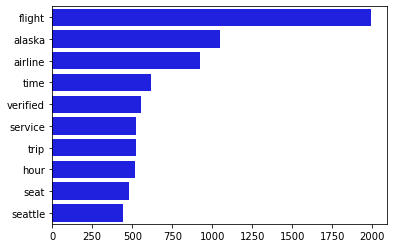

In [46]:
sns.barplot(y=df_unigrams[0].values[:N], x=df_unigrams[1].values[:N], color='blue')

<AxesSubplot:>

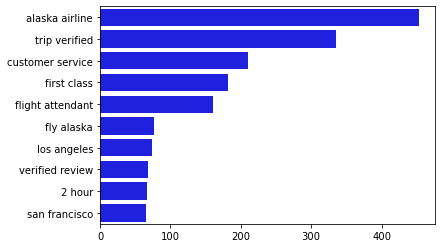

In [47]:
sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N], color='blue')

<AxesSubplot:>

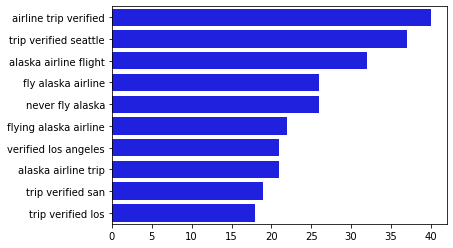

In [48]:
sns.barplot(y=df_trigrams[0].values[0:N], x=df_trigrams[1].values[0:N], color='blue')

<AxesSubplot:>

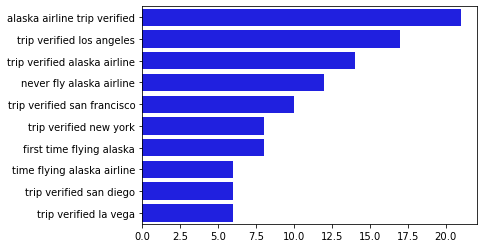

In [49]:
sns.barplot(y=df_fourgrams[0].values[0:N], x=df_fourgrams[1].values[0:N], color='blue')

# American Airlines - EDA

In [182]:
df_American_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7610,0,American Airlines,1.0,Tony DeBerry,28th May 2022,Not Verified | This airline has no regard for ...,NaN,Solo Leisure,Business Class,Miami to Cleveland,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
7611,1,American Airlines,1.0,Malori Parks,27th May 2022,"✅ Trip Verified | Terrible, terrible, terrible...",NaN,Solo Leisure,Economy Class,Dallas to Oklahoma City,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
7612,2,American Airlines,2.0,Sheri Bashaw,27th May 2022,✅ Trip Verified | I haven’t flown American Air...,NaN,Solo Leisure,Economy Class,Las Vegas to Tallahassee via Charlotte,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
7613,3,American Airlines,2.0,R Virmasan,26th May 2022,✅ Trip Verified | Flew on May 23/24 from Honol...,A321 neo / Boeing 777-200 / A320,Family Leisure,Economy Class,"Honolulu to Wichita via Los Angeles, Dallas",22-May,2.0,4.0,1.0,2.0,1.0,3.0,no
7614,4,American Airlines,1.0,Darius Tambasco,26th May 2022,✅ Trip Verified | I was in line at DFW to boar...,Boeing 737,Business,Economy Class,Dallas Ft Worth to La Guardia,22-May,3.0,2.0,1.0,4.0,5.0,3.0,yes


In [183]:
df_American_Airlines.shape

(3963, 18)

In [184]:
df_American_Airlines.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [185]:
df_American_Airlines.recommended.nunique()

2

In [186]:
df_American_Airlines.recommended.value_counts()

no     3297
yes     666
Name: recommended, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='recommended'>

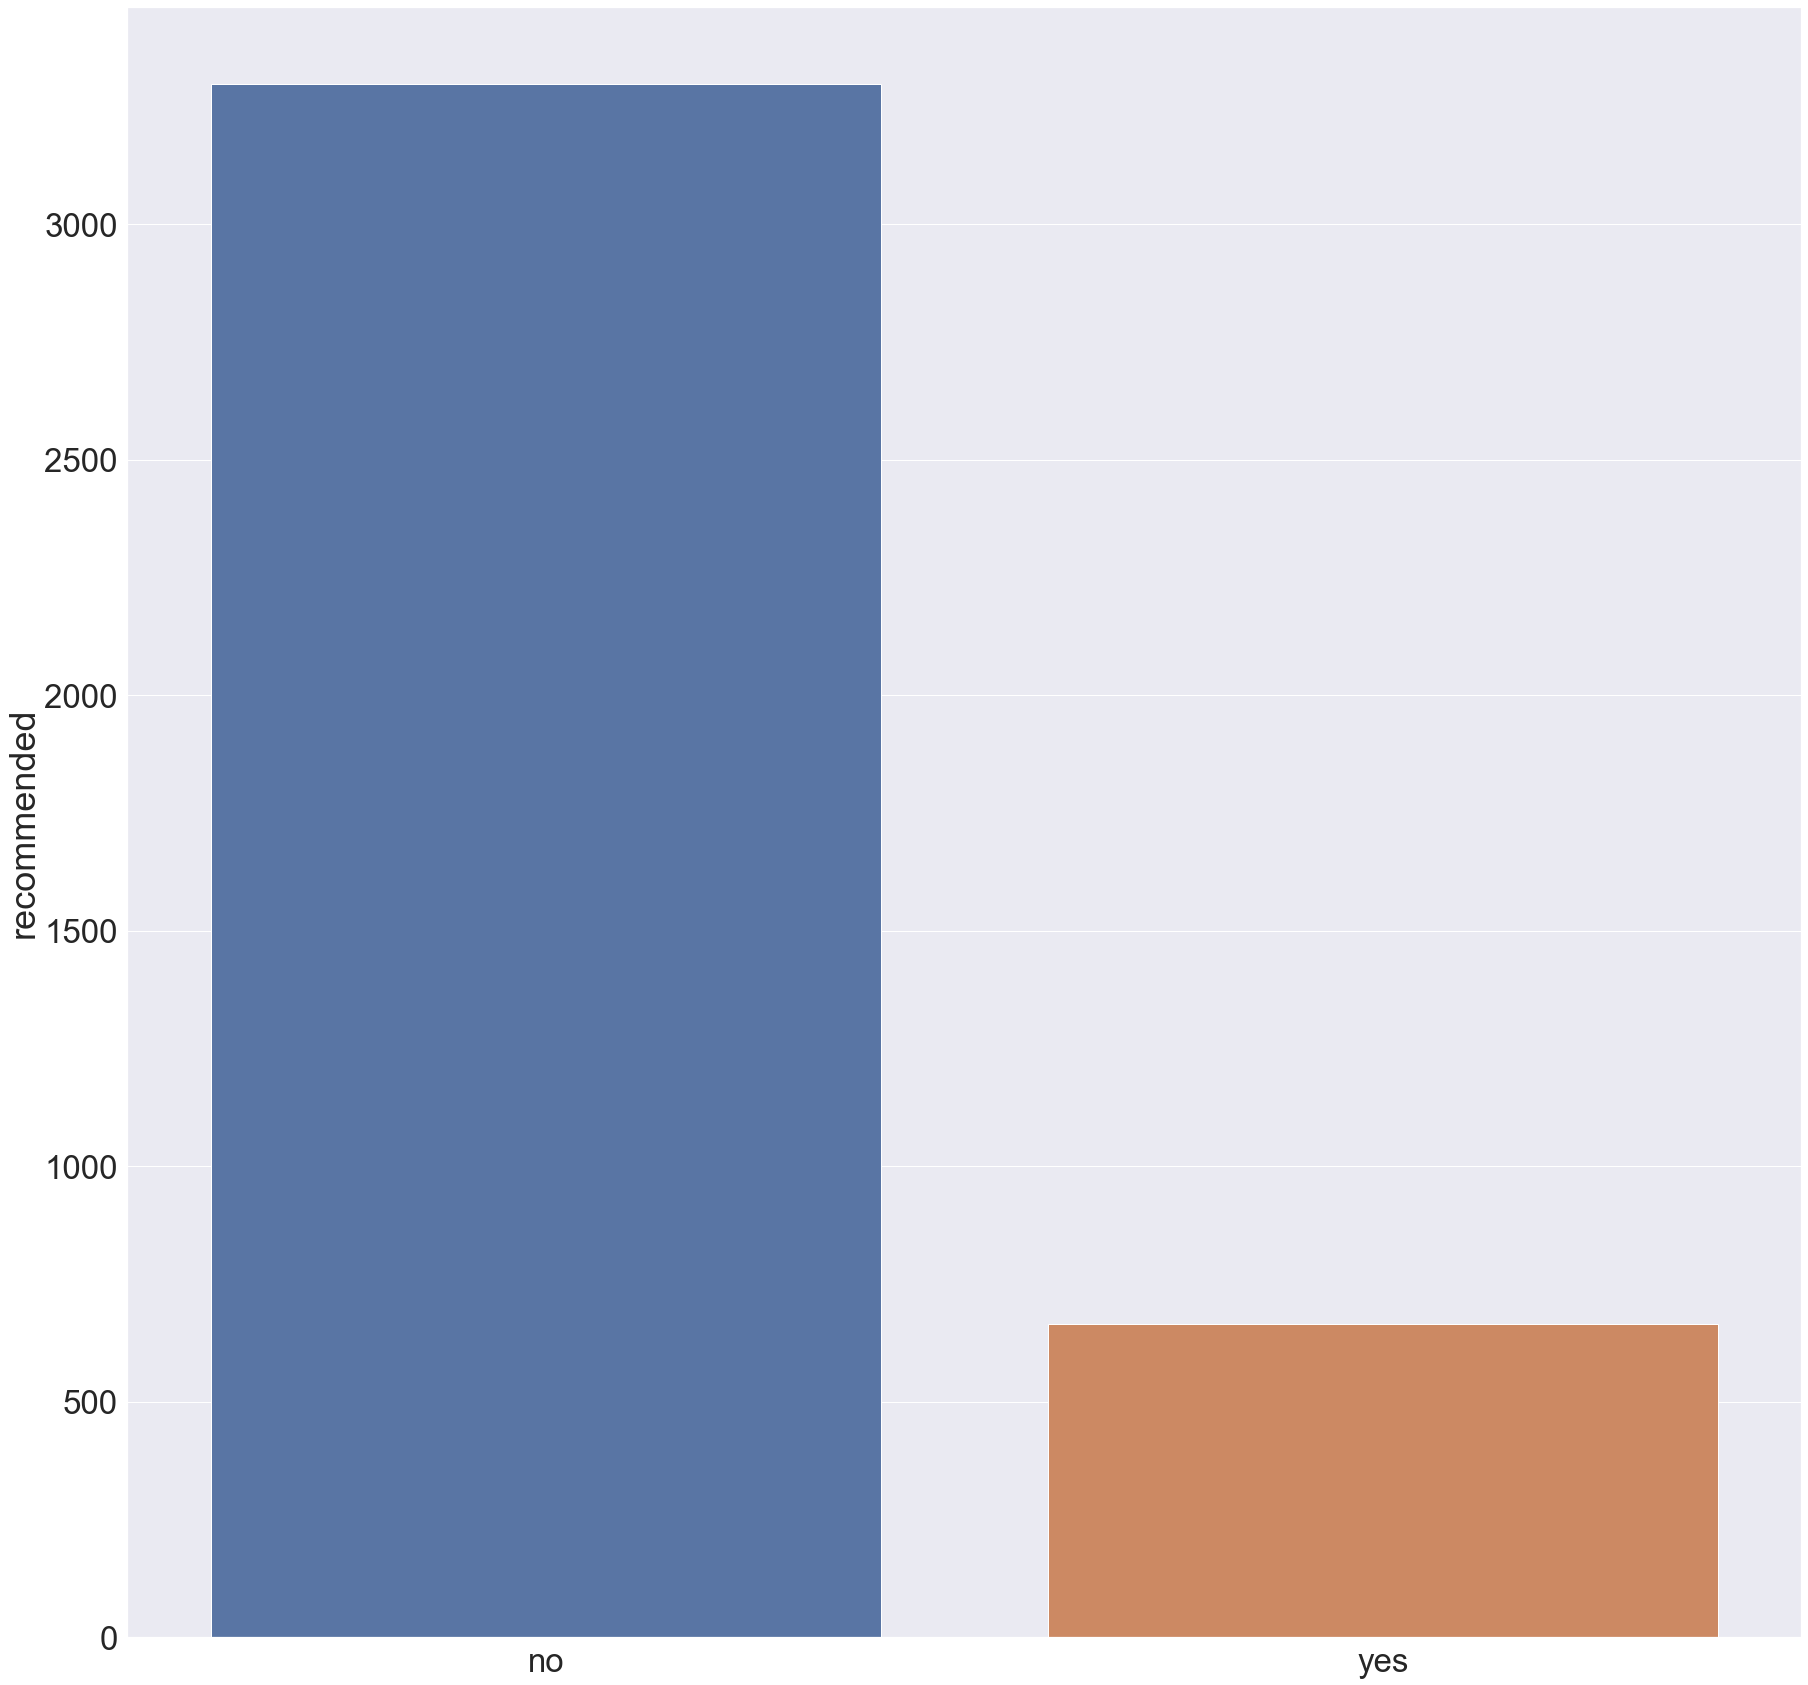

In [187]:
sns.barplot(df_American_Airlines.recommended.value_counts().index,df_American_Airlines.recommended.value_counts())

In [188]:
df_American_Airlines.overall.value_counts()

1.0     2331
2.0      549
3.0      237
10.0     184
8.0      151
9.0      126
4.0      115
7.0      113
5.0       89
6.0       62
Name: overall, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='overall'>

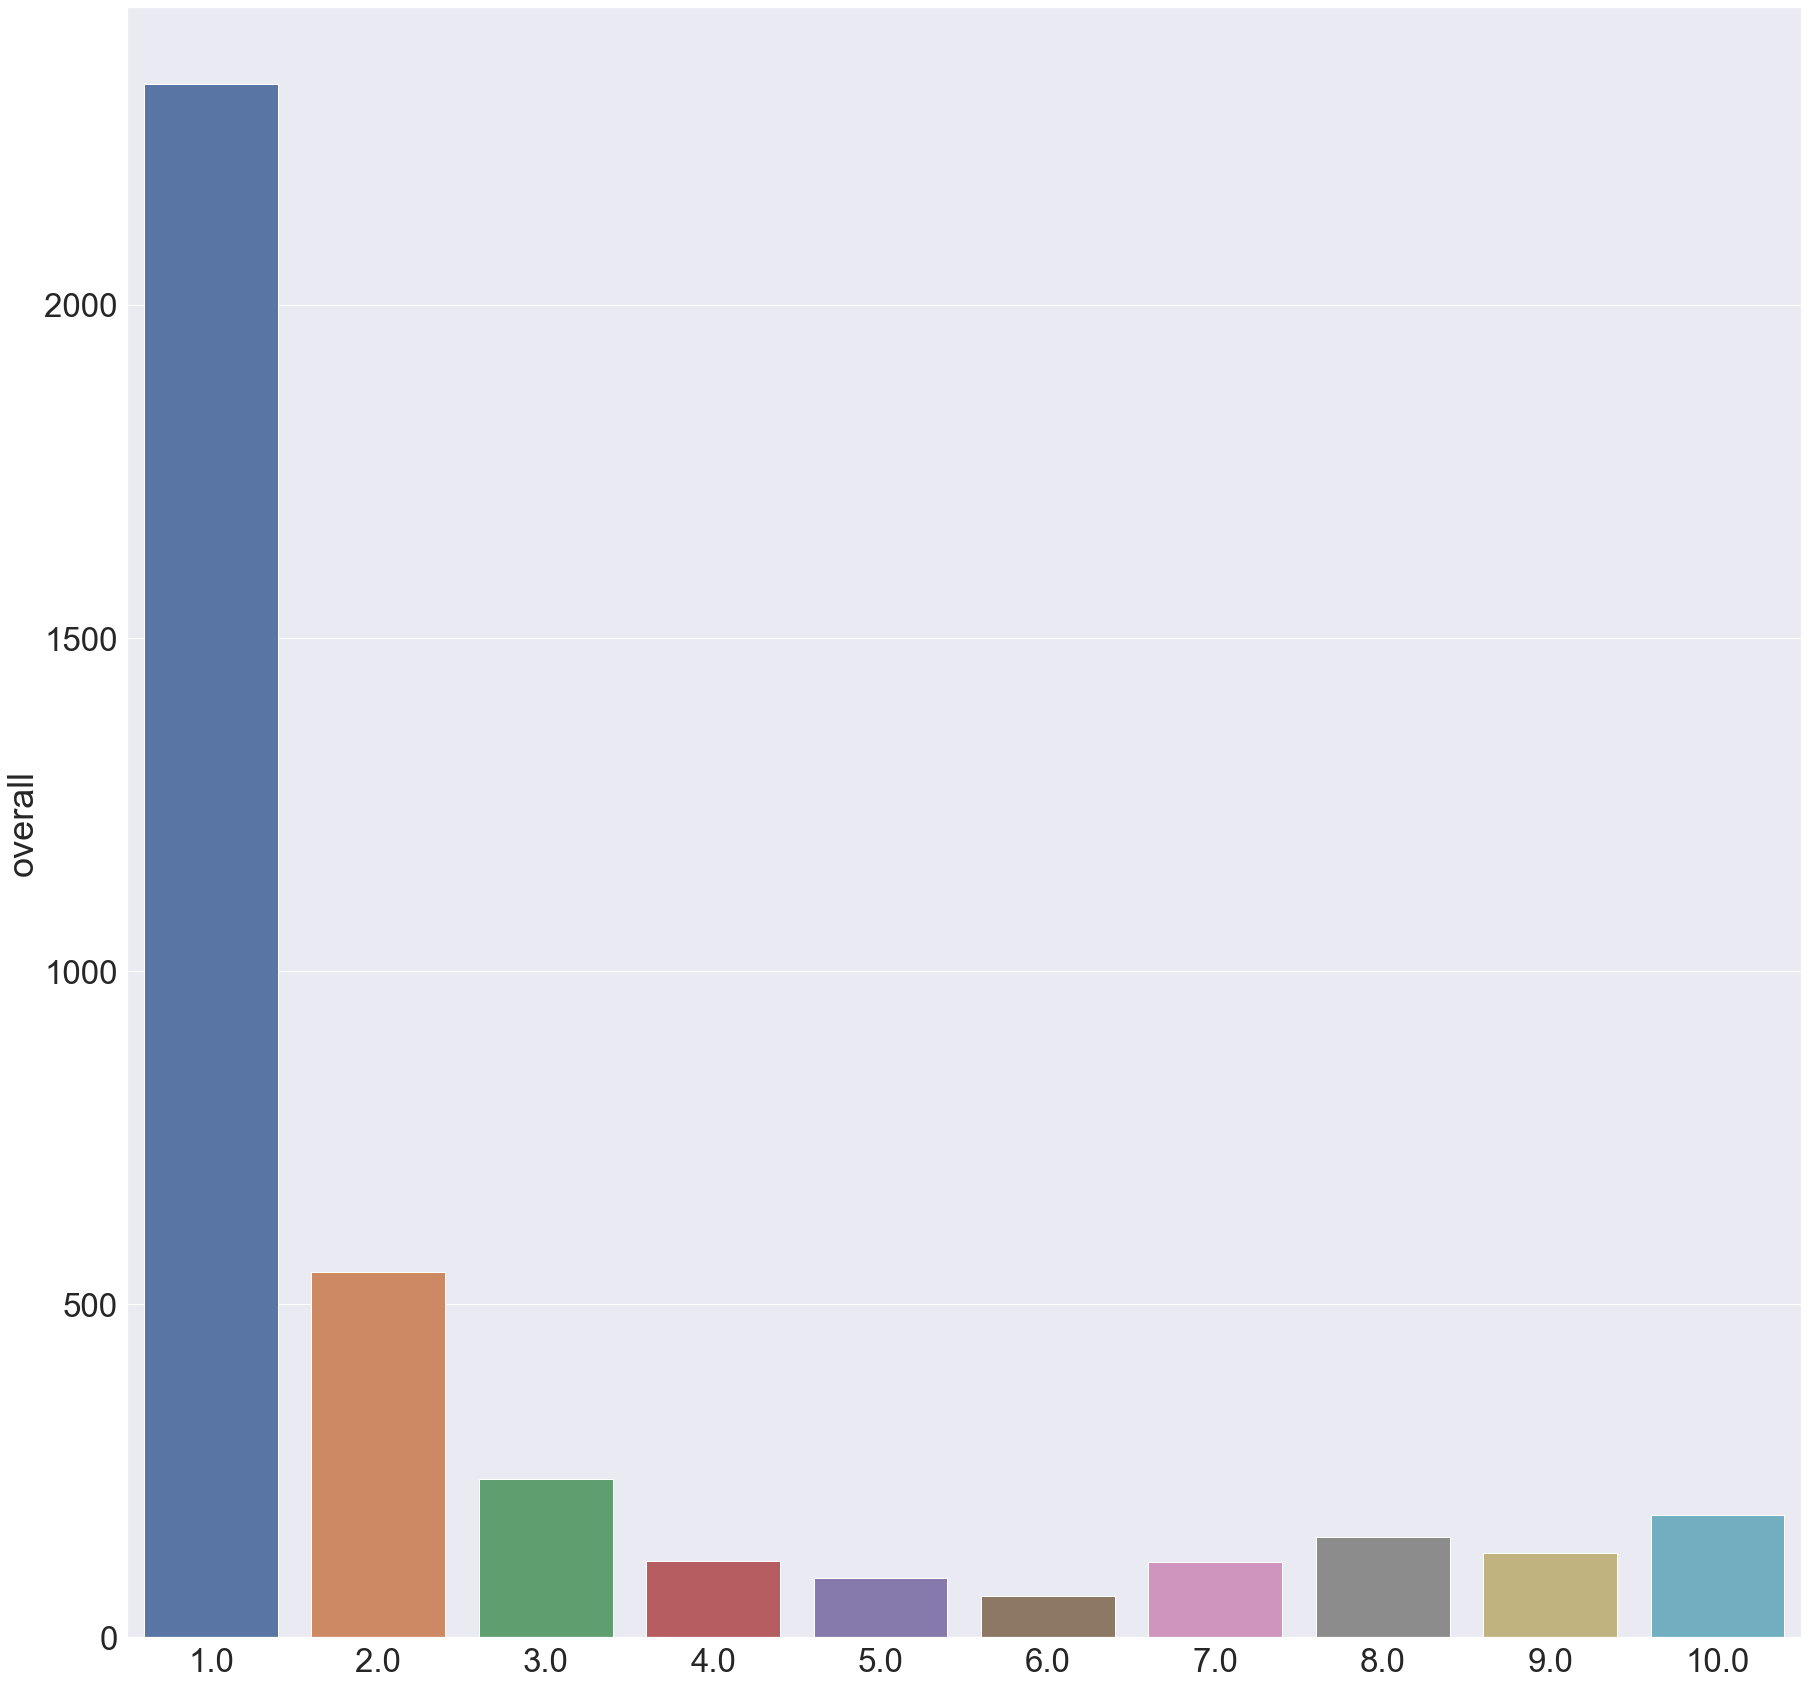

In [189]:
sns.barplot(df_American_Airlines.overall.value_counts().index,df_American_Airlines.overall.value_counts())

In [190]:
df_American_Airlines.aircraft.nunique()

206

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aircraft'>

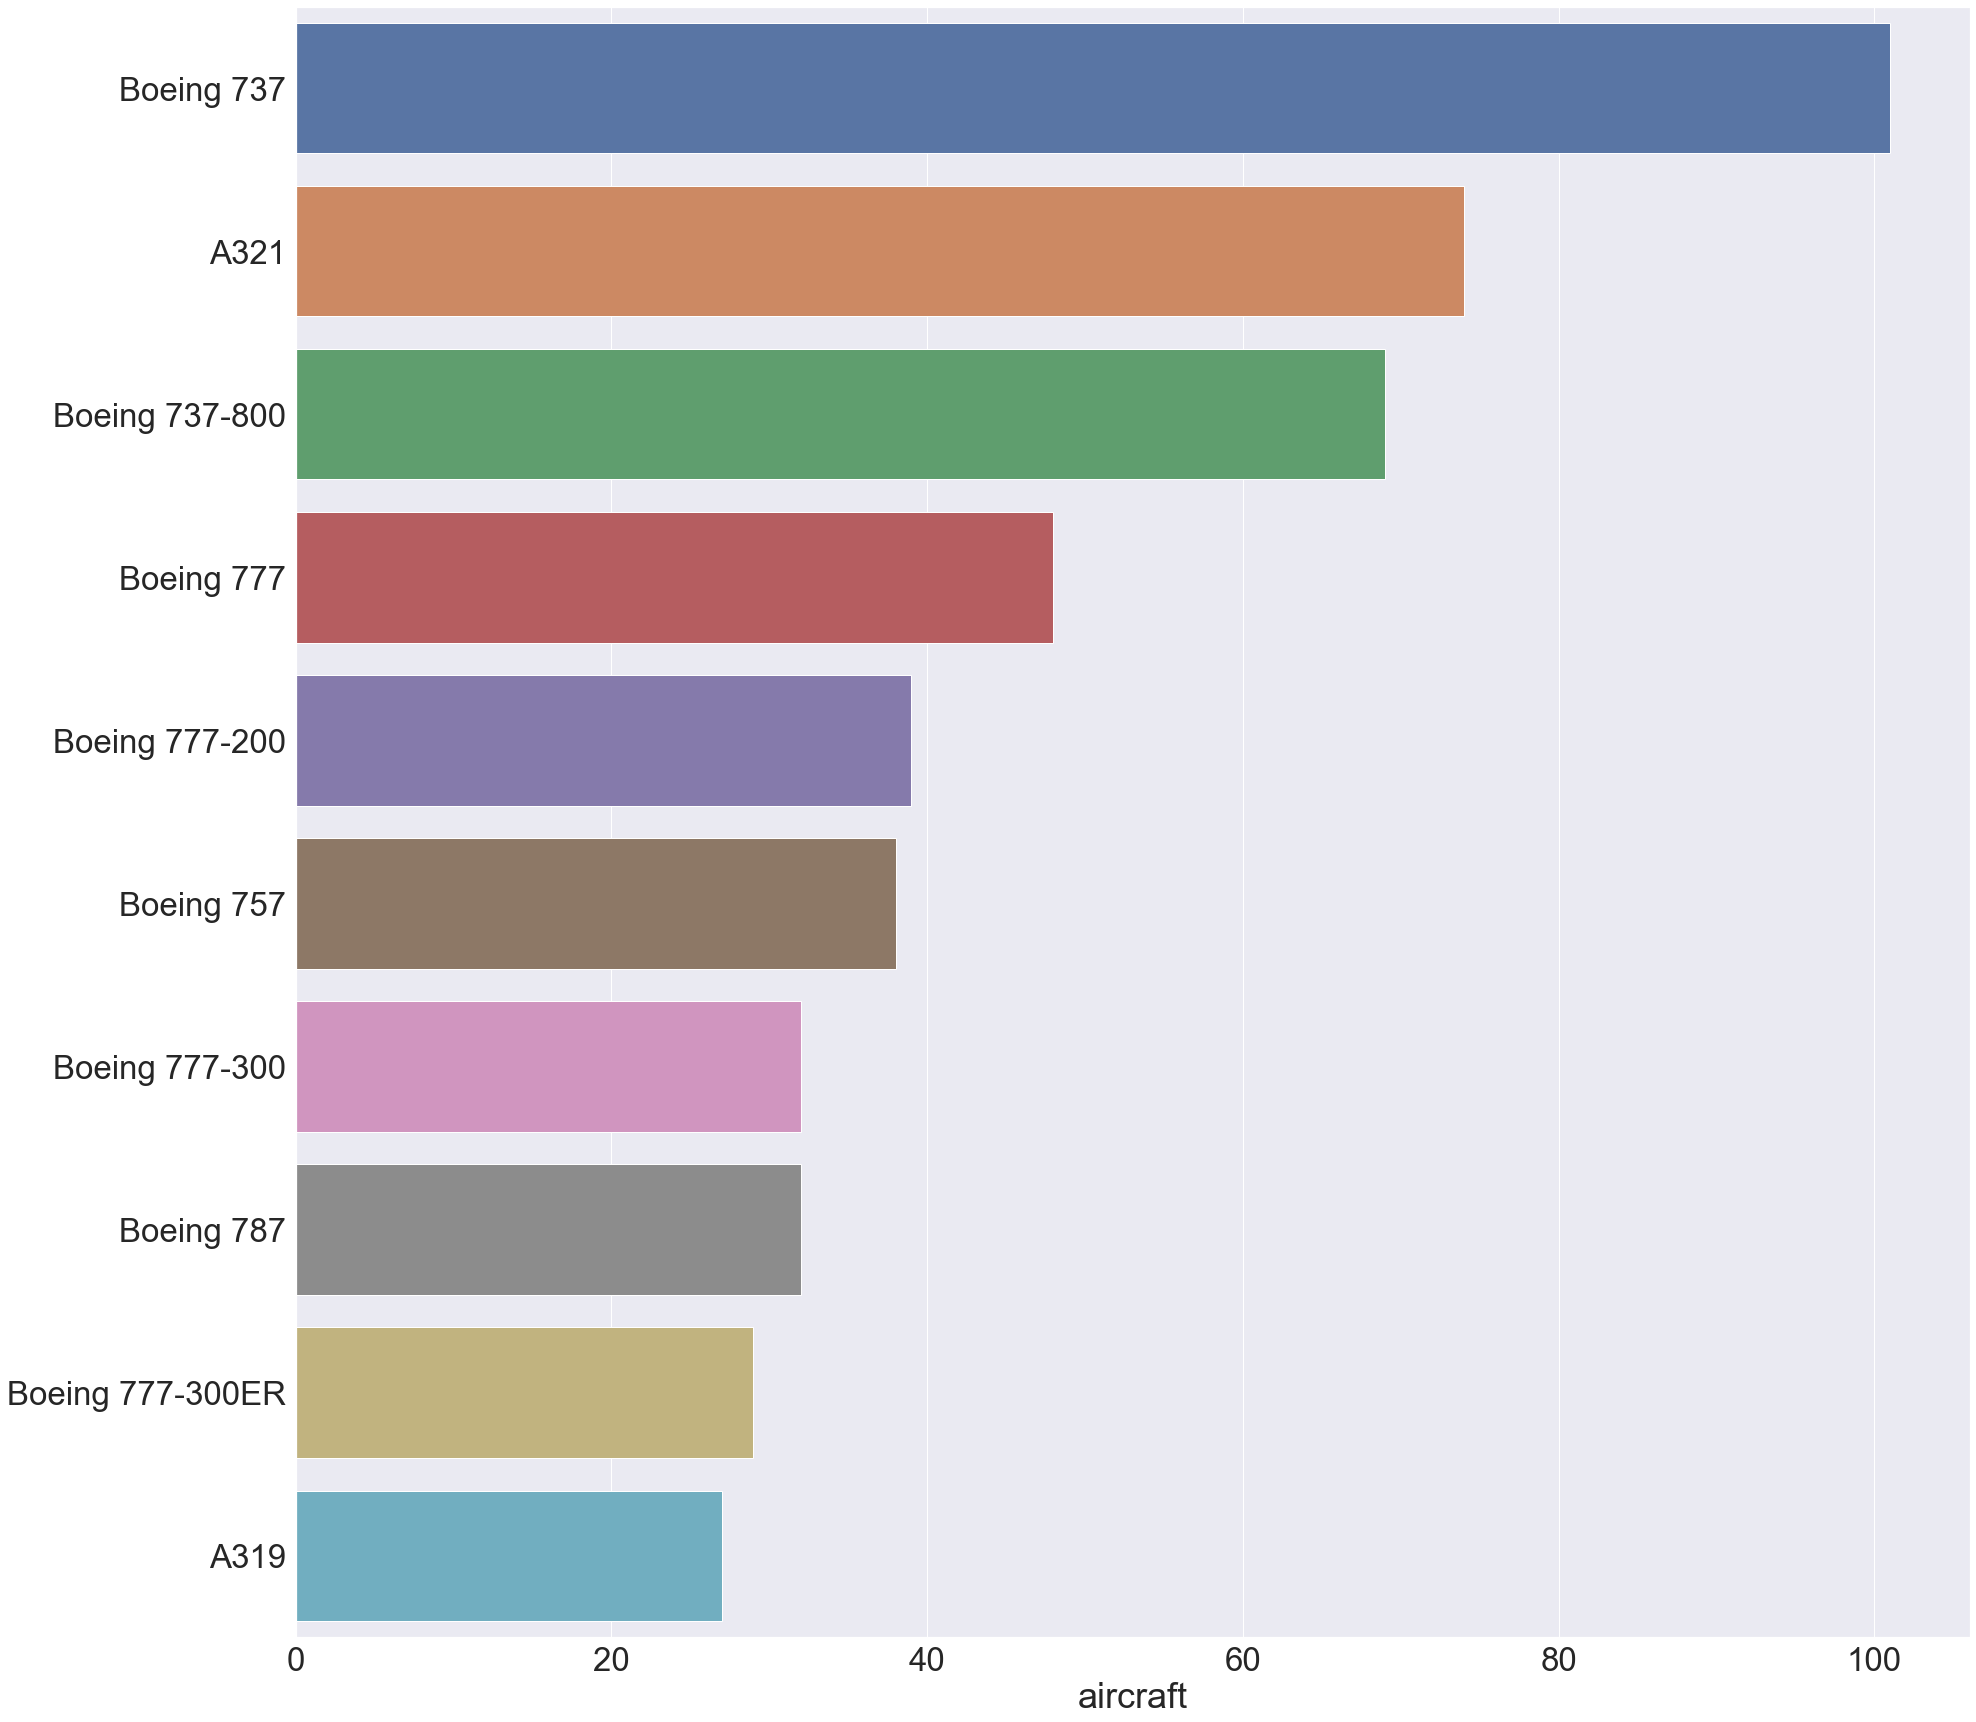

In [191]:
sns.barplot(df_American_Airlines.aircraft.value_counts()[:10],df_American_Airlines.aircraft.value_counts()[:10].index,orient = "h")

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='traveller_type'>

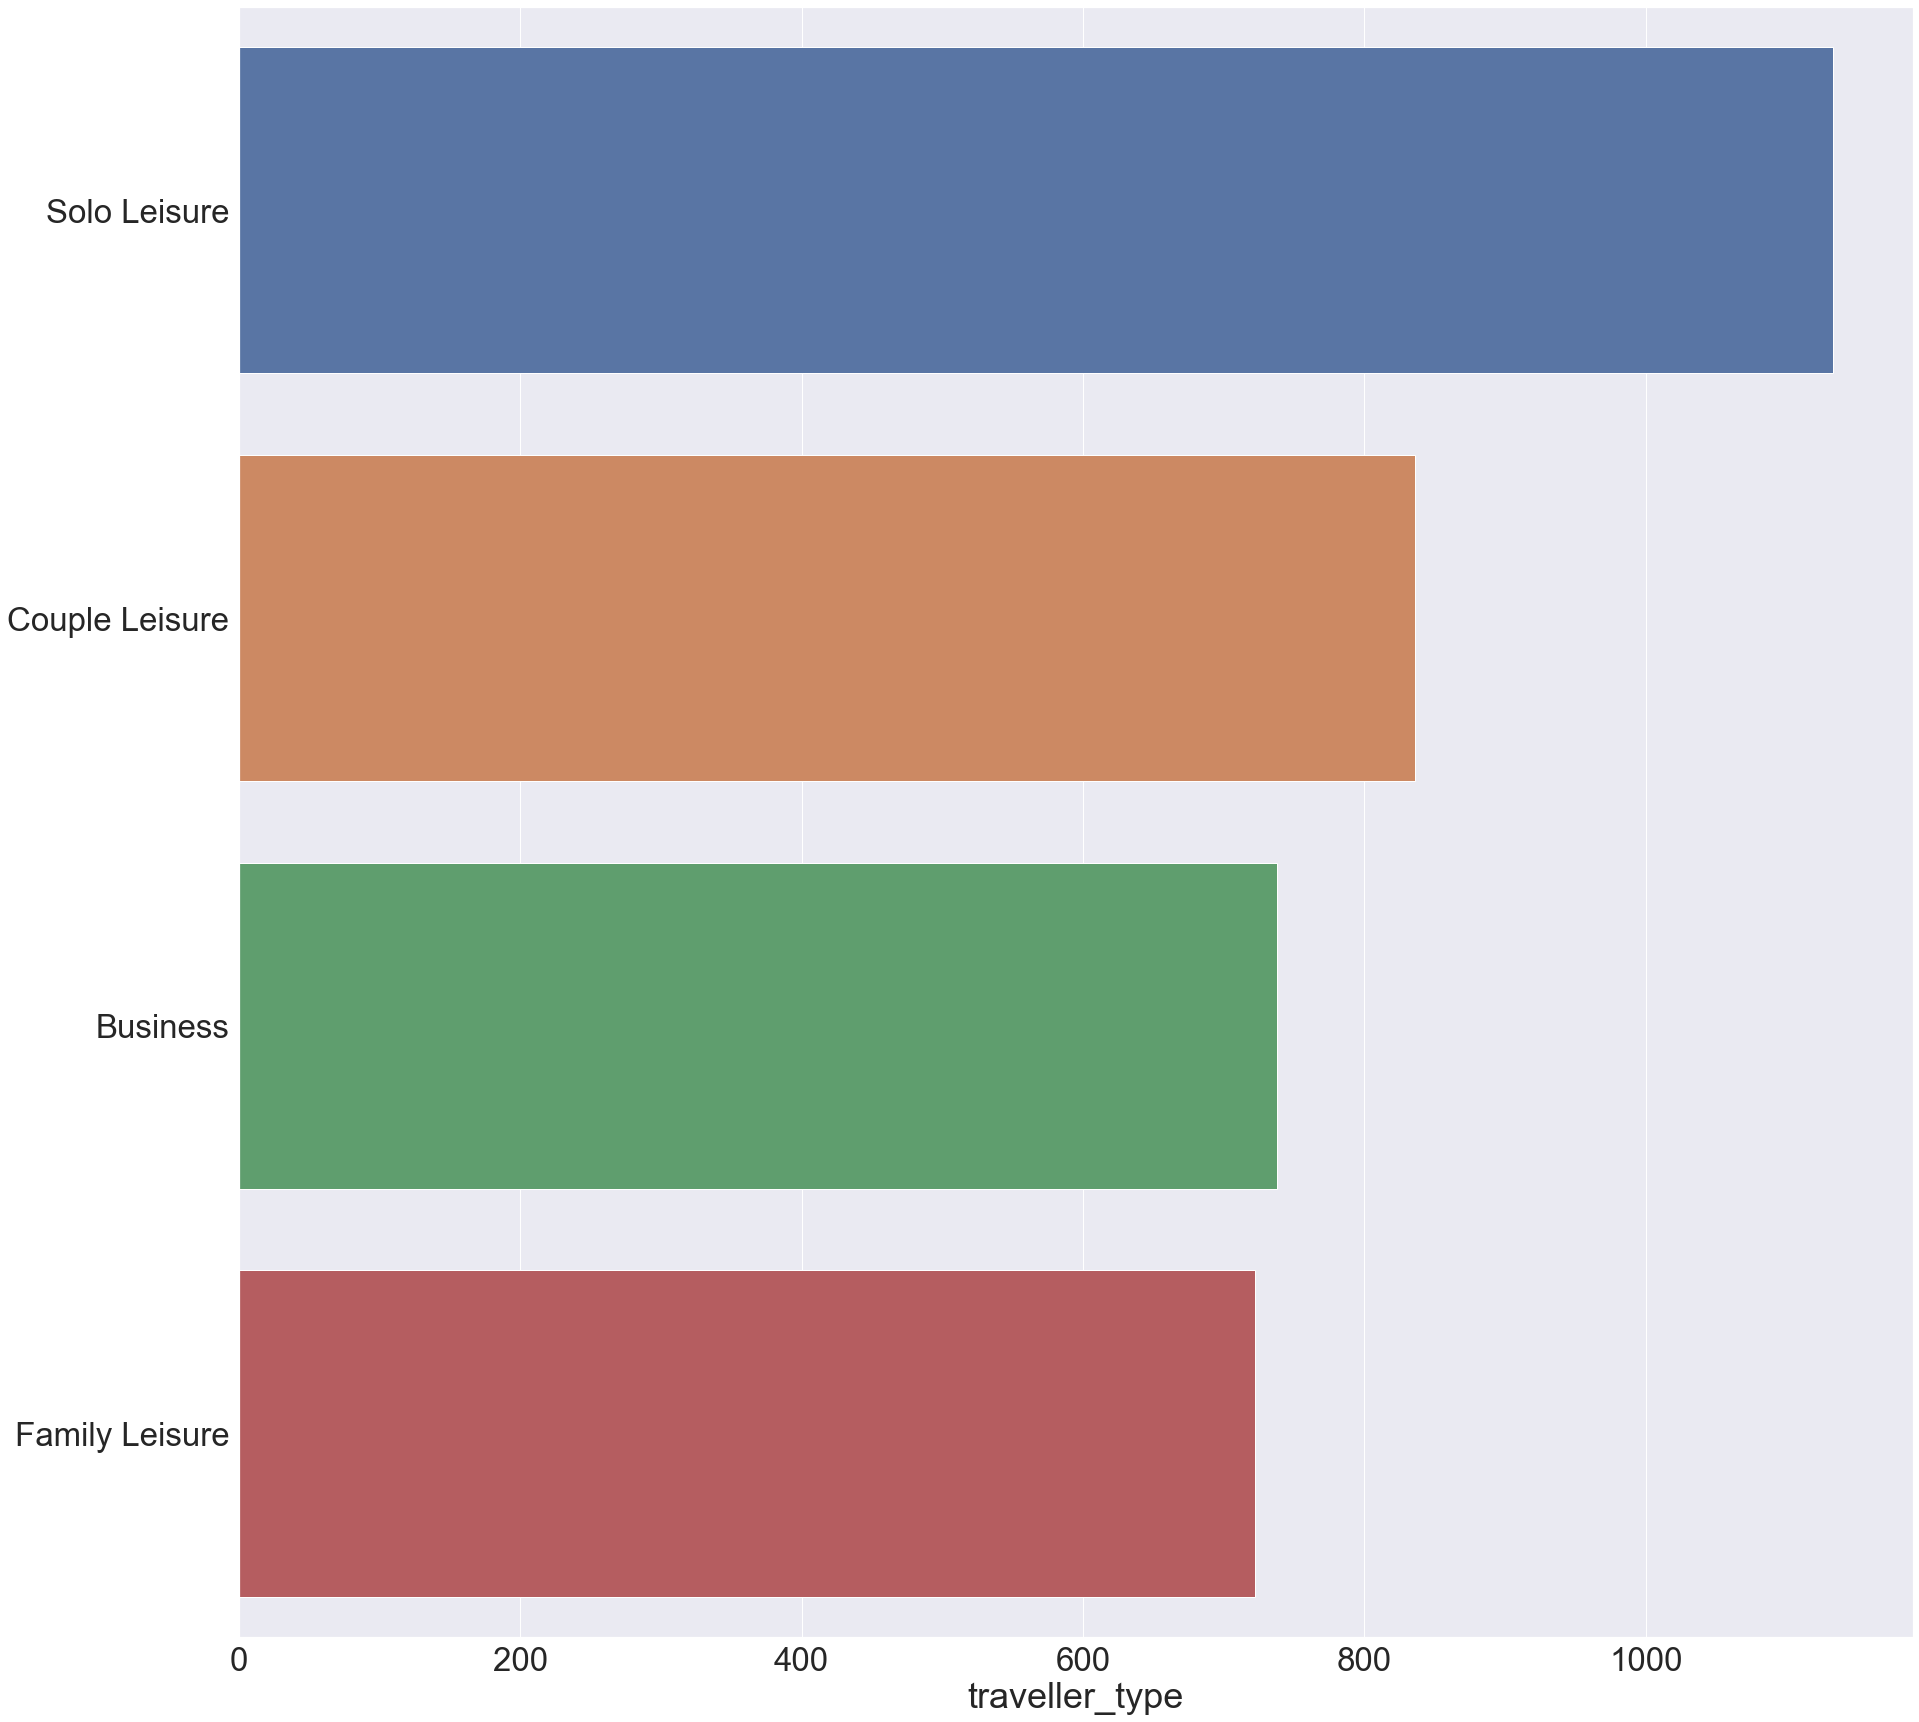

In [192]:
sns.barplot(df_American_Airlines.traveller_type.value_counts(),df_American_Airlines.traveller_type.value_counts().index)

In [193]:
df_American_Airlines.cabin.value_counts()

Economy Class      3217
First Class         305
Business Class      290
Premium Economy     150
Name: cabin, dtype: int64

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabin'>

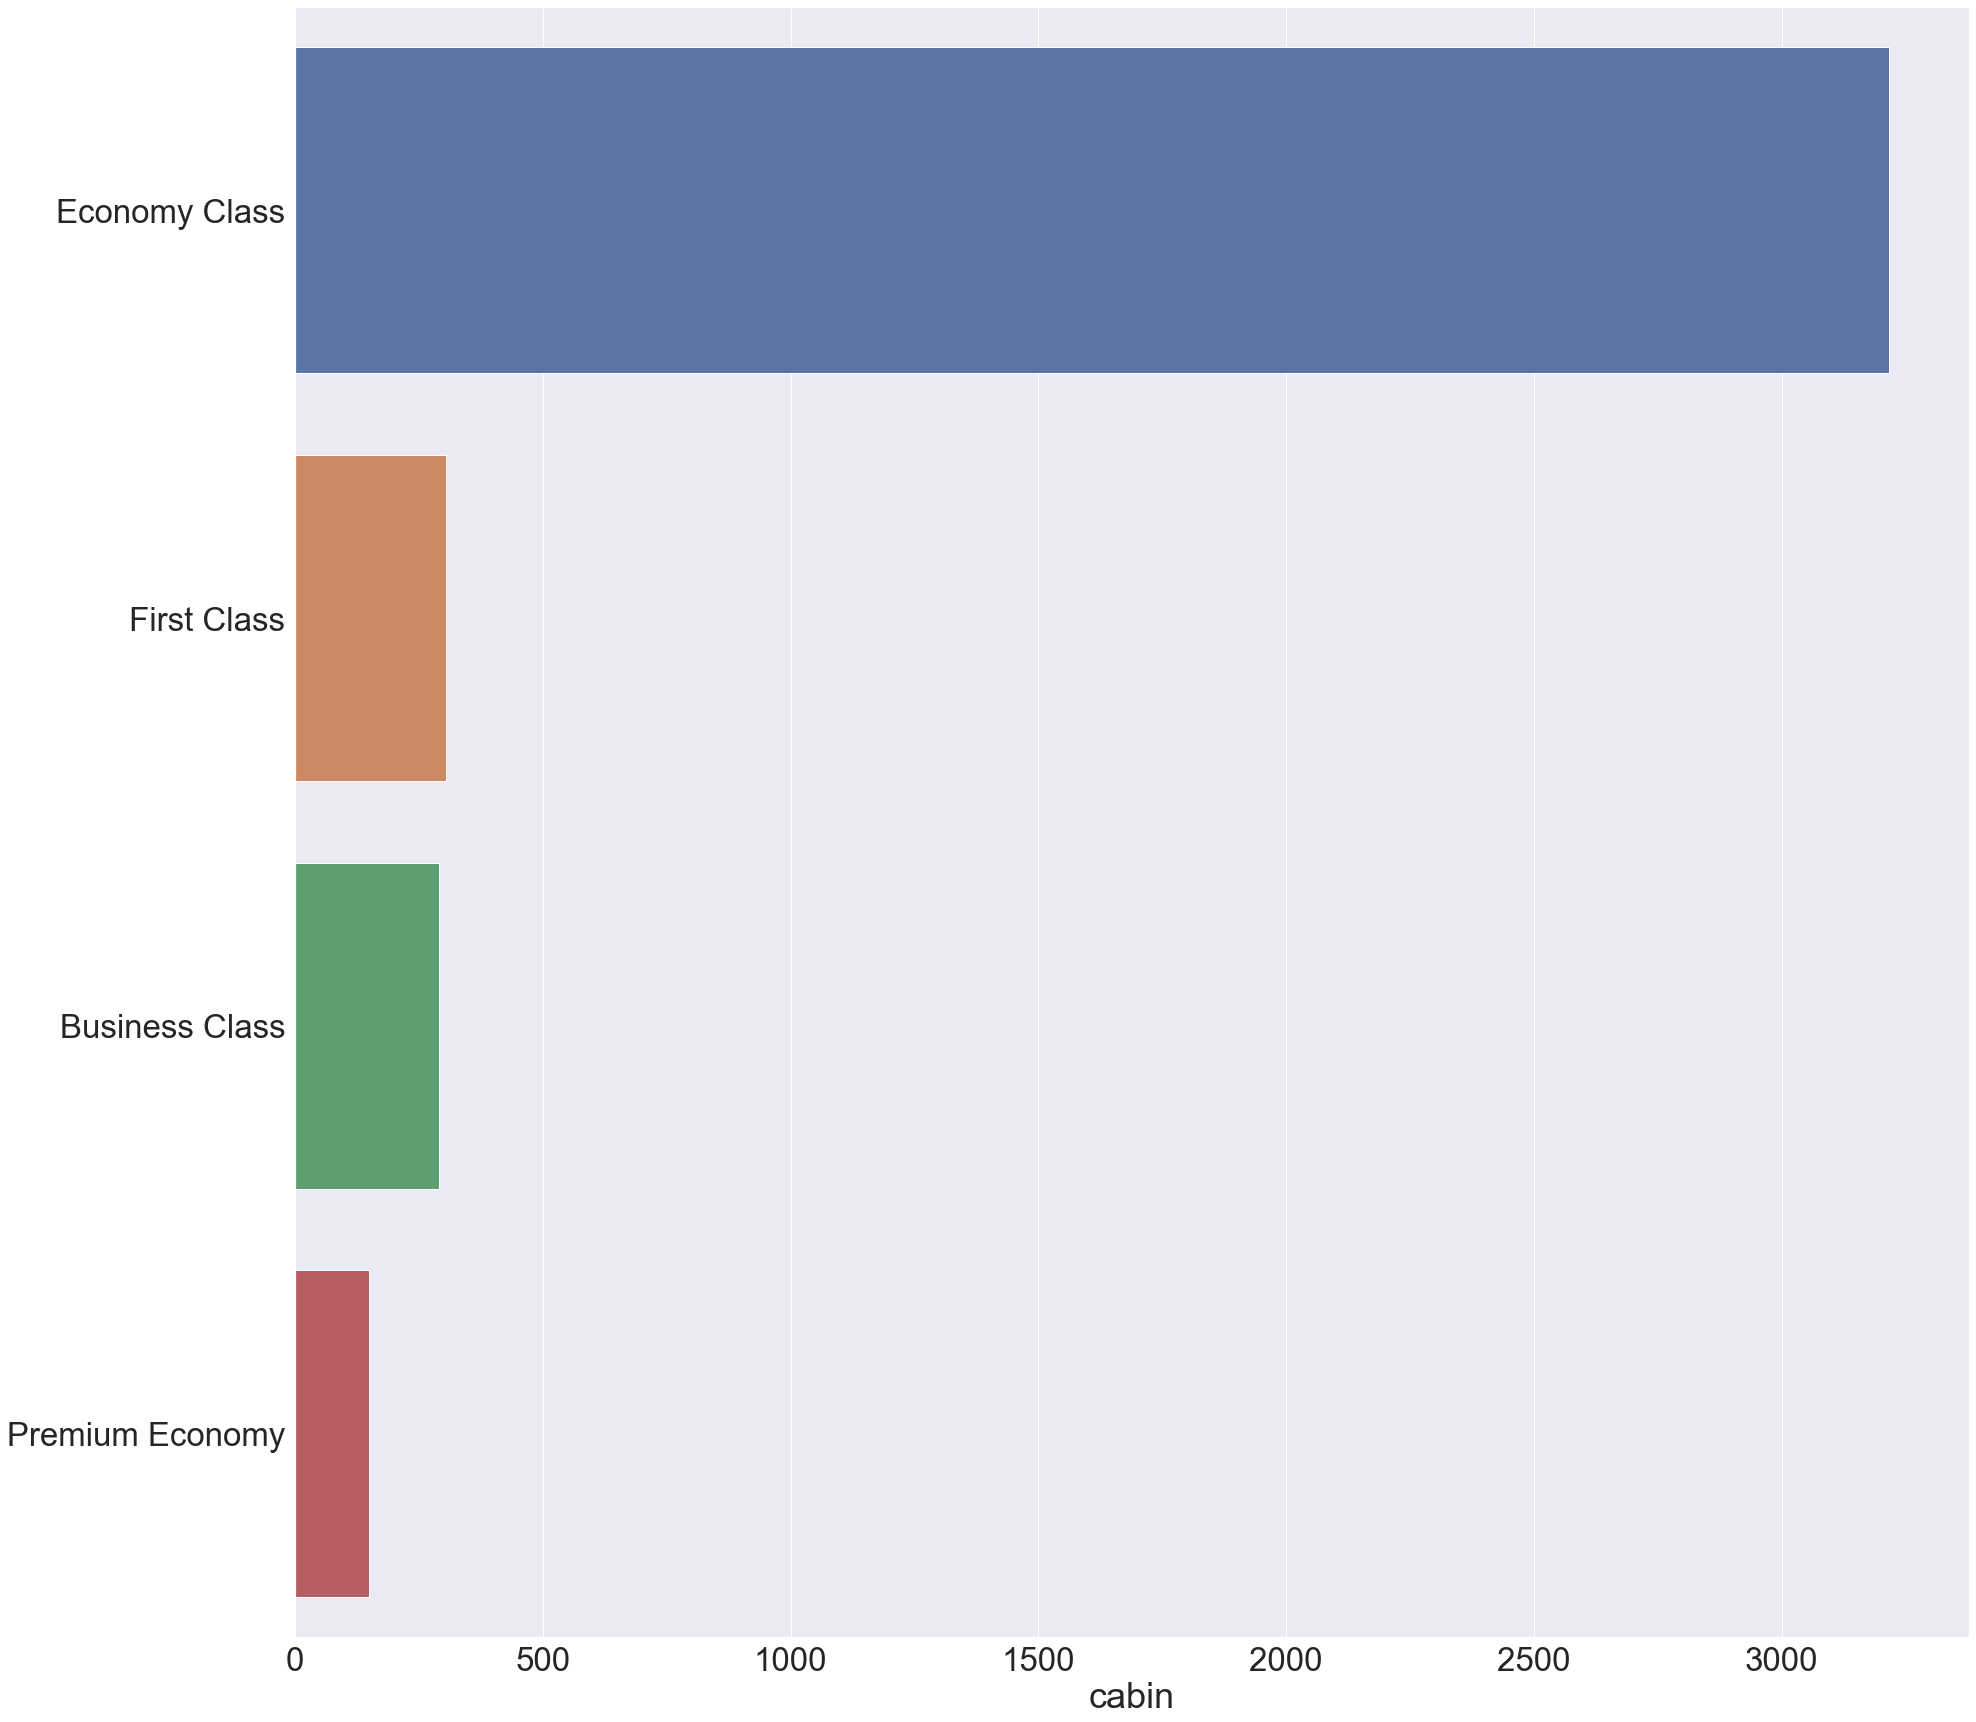

In [194]:
sns.barplot(df_American_Airlines.cabin.value_counts(),df_American_Airlines.cabin.value_counts().index)

In [195]:
df_American_Airlines.route.nunique()

2735

In [196]:
df_American_Airlines.route.value_counts()[:10]

LHR to JFK                 10
Miami to London             8
Miami to Washington         7
LAX to MIA                  7
New York to Miami           7
Philadelphia to Orlando     7
Atlanta to Miami            7
Los Angeles to London       7
Washington to Miami         6
JFK to LHR                  6
Name: route, dtype: int64

In [197]:
df_American_Airlines[["seat_comfort",'cabin_service', 'food_bev', 'entertainment','ground_service', 'value_for_money']].describe()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,3825.000000,3823.000000,2952.000000,2631.000000,3369.000000,3963.000000
mean,2.133333,2.282762,2.028455,2.028886,1.746512,1.831188
std,1.304562,1.437275,1.280092,1.377964,1.280393,1.314124
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='seat_comfort'>

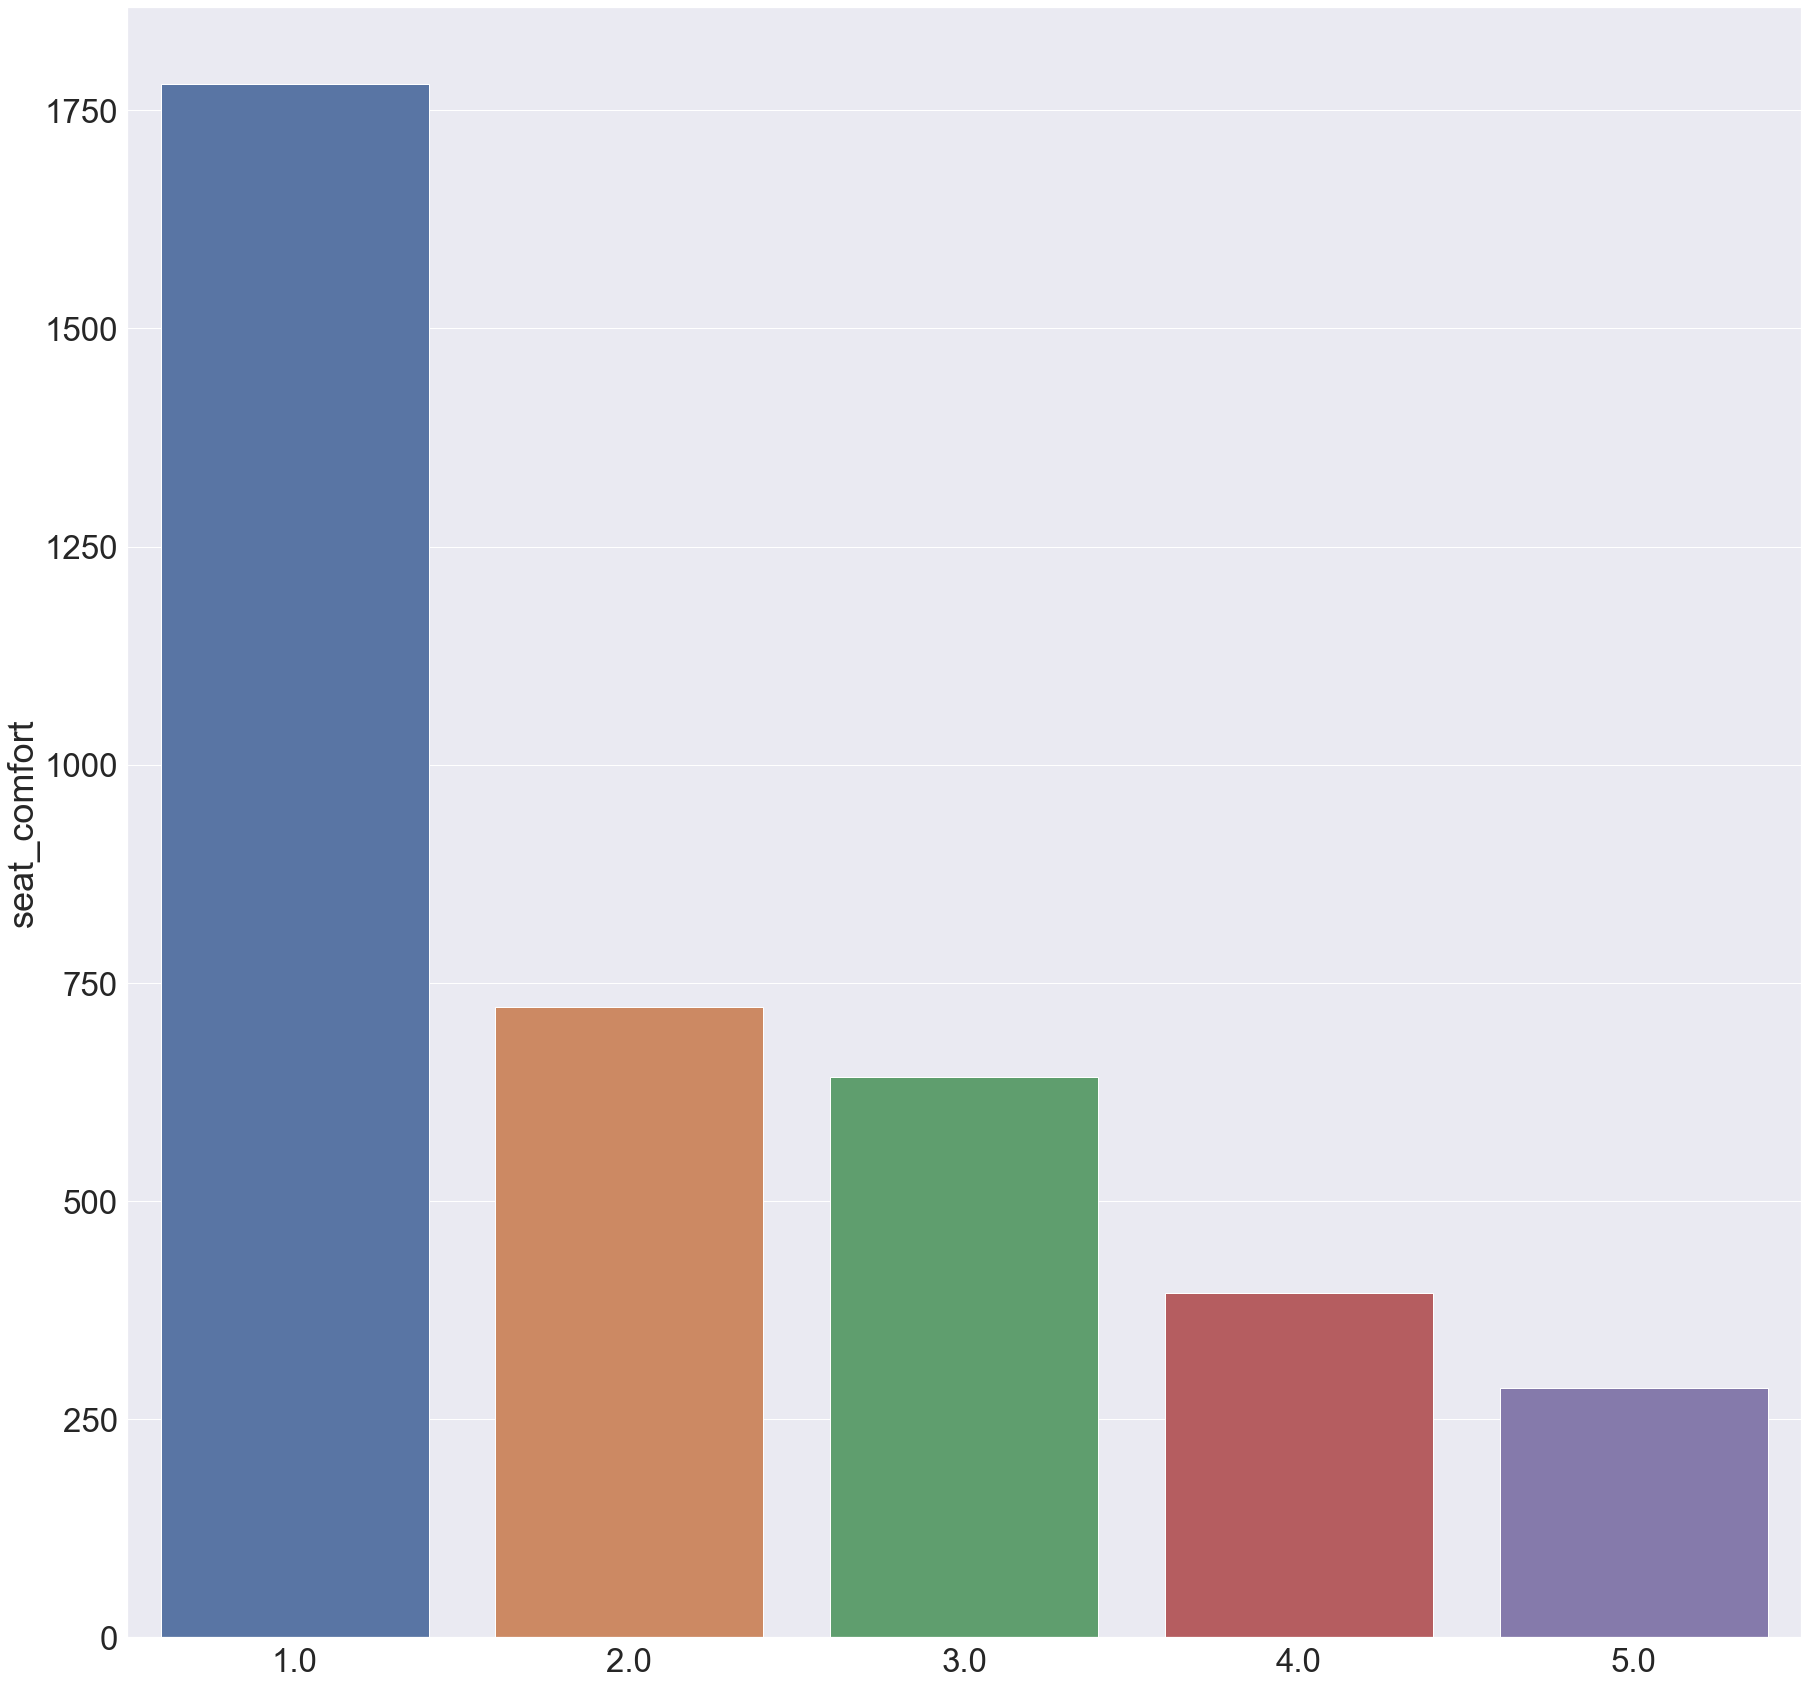

In [198]:
sns.barplot(df_American_Airlines.seat_comfort.value_counts().index,df_American_Airlines.seat_comfort.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='cabin_service'>

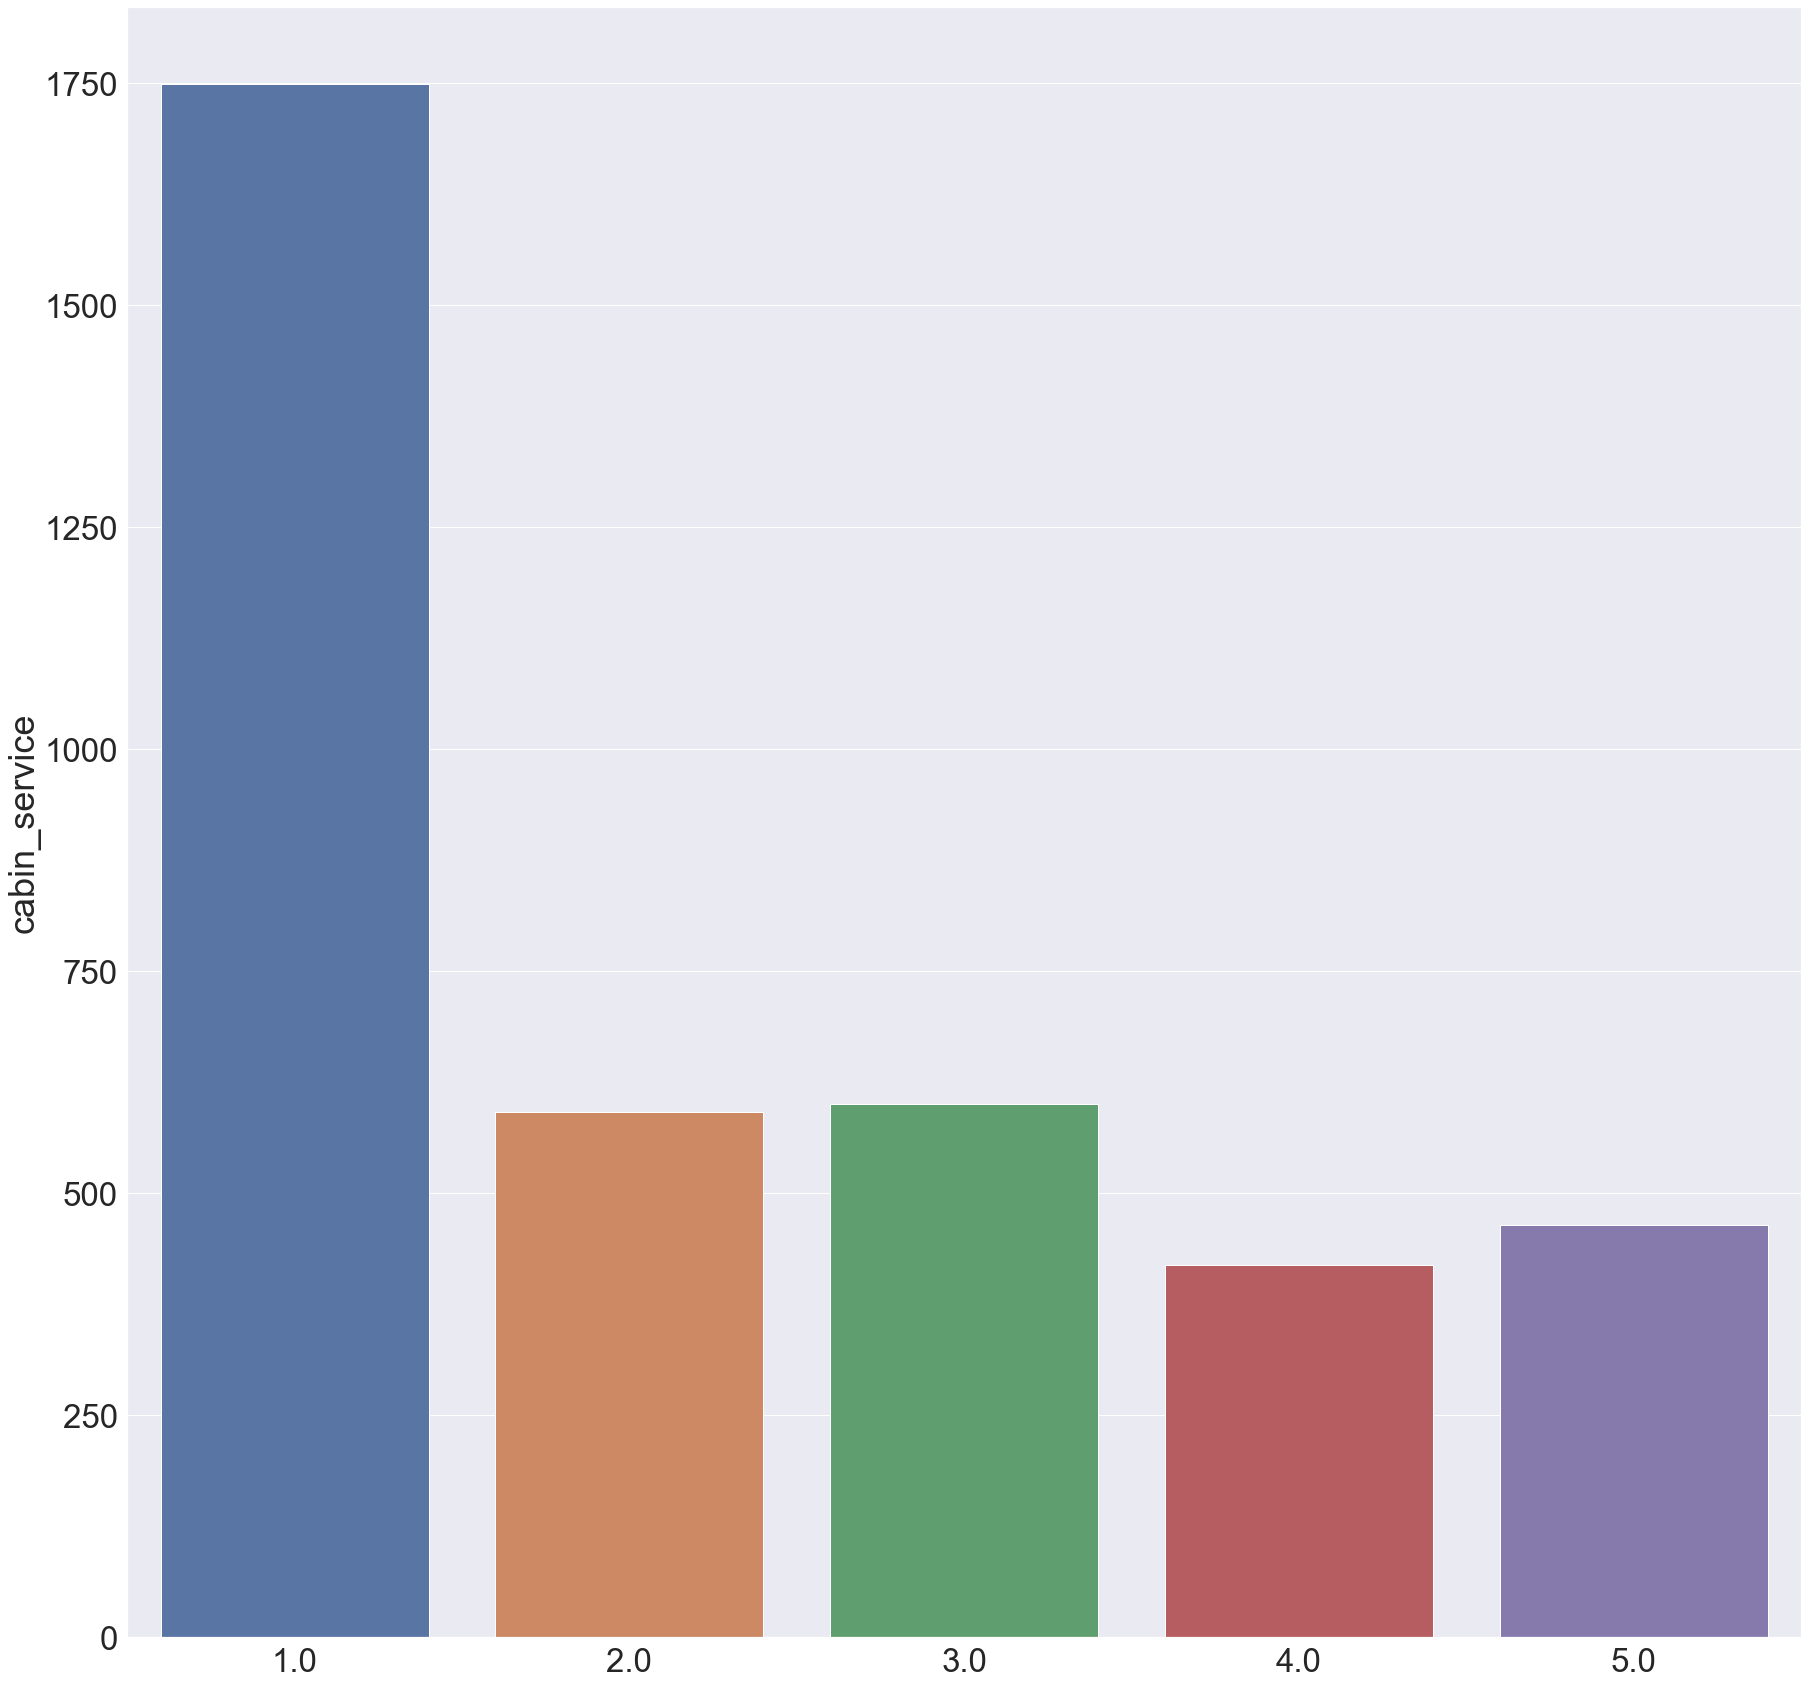

In [199]:
sns.barplot(df_American_Airlines.cabin_service.value_counts().index,df_American_Airlines.cabin_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='food_bev'>

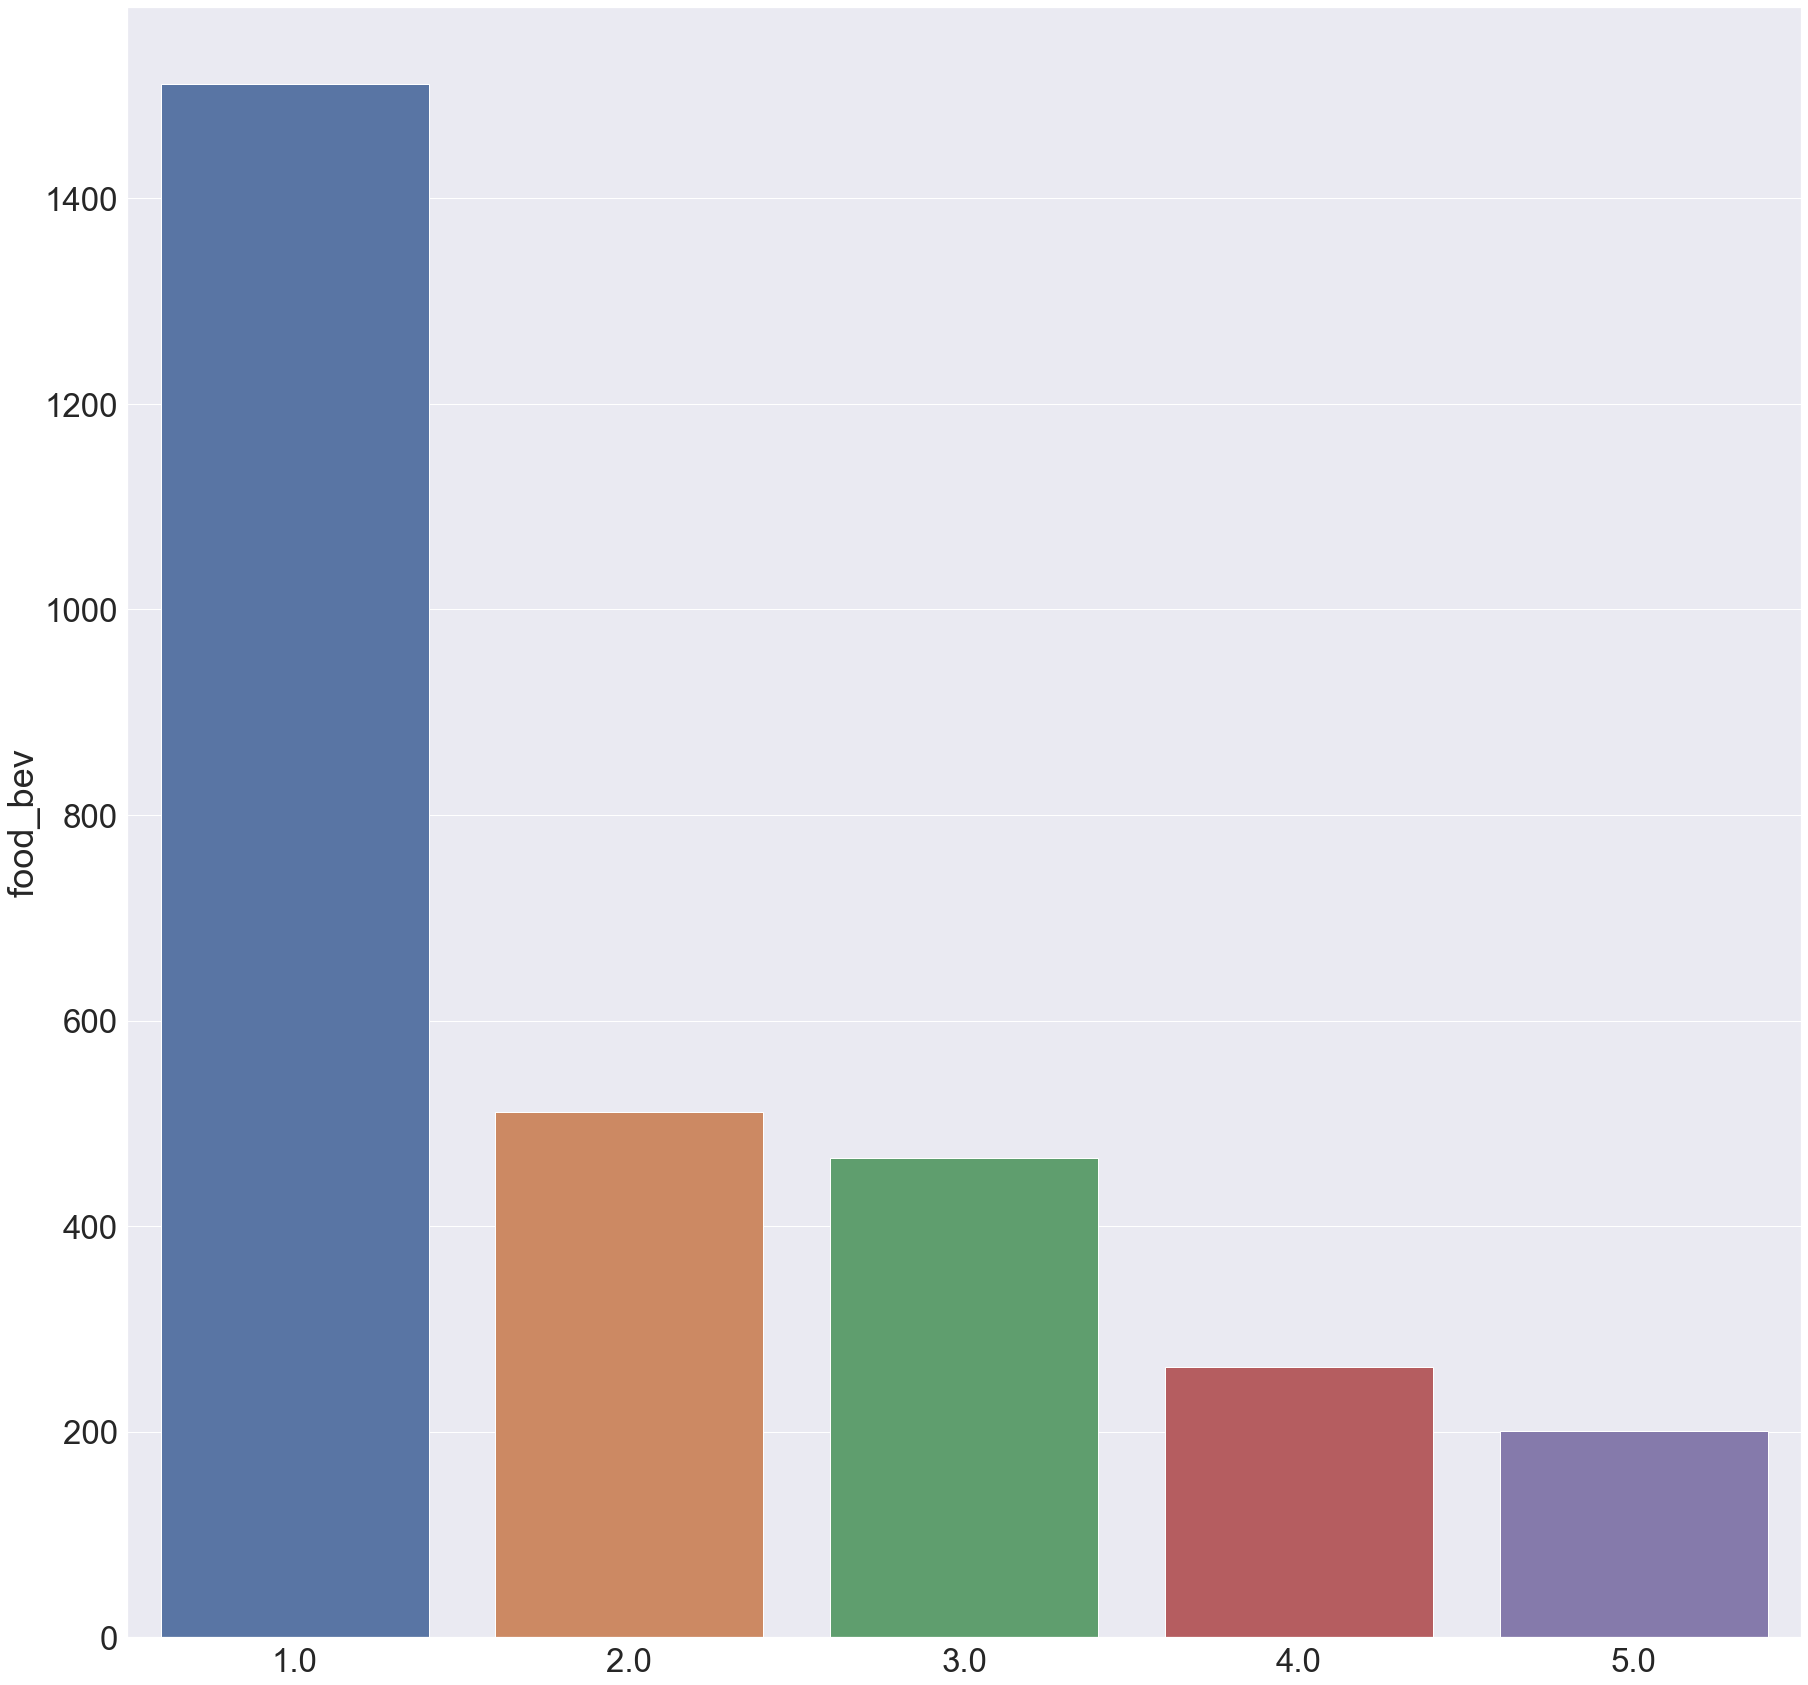

In [200]:
sns.barplot(df_American_Airlines.food_bev.value_counts().index,df_American_Airlines.food_bev.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='entertainment'>

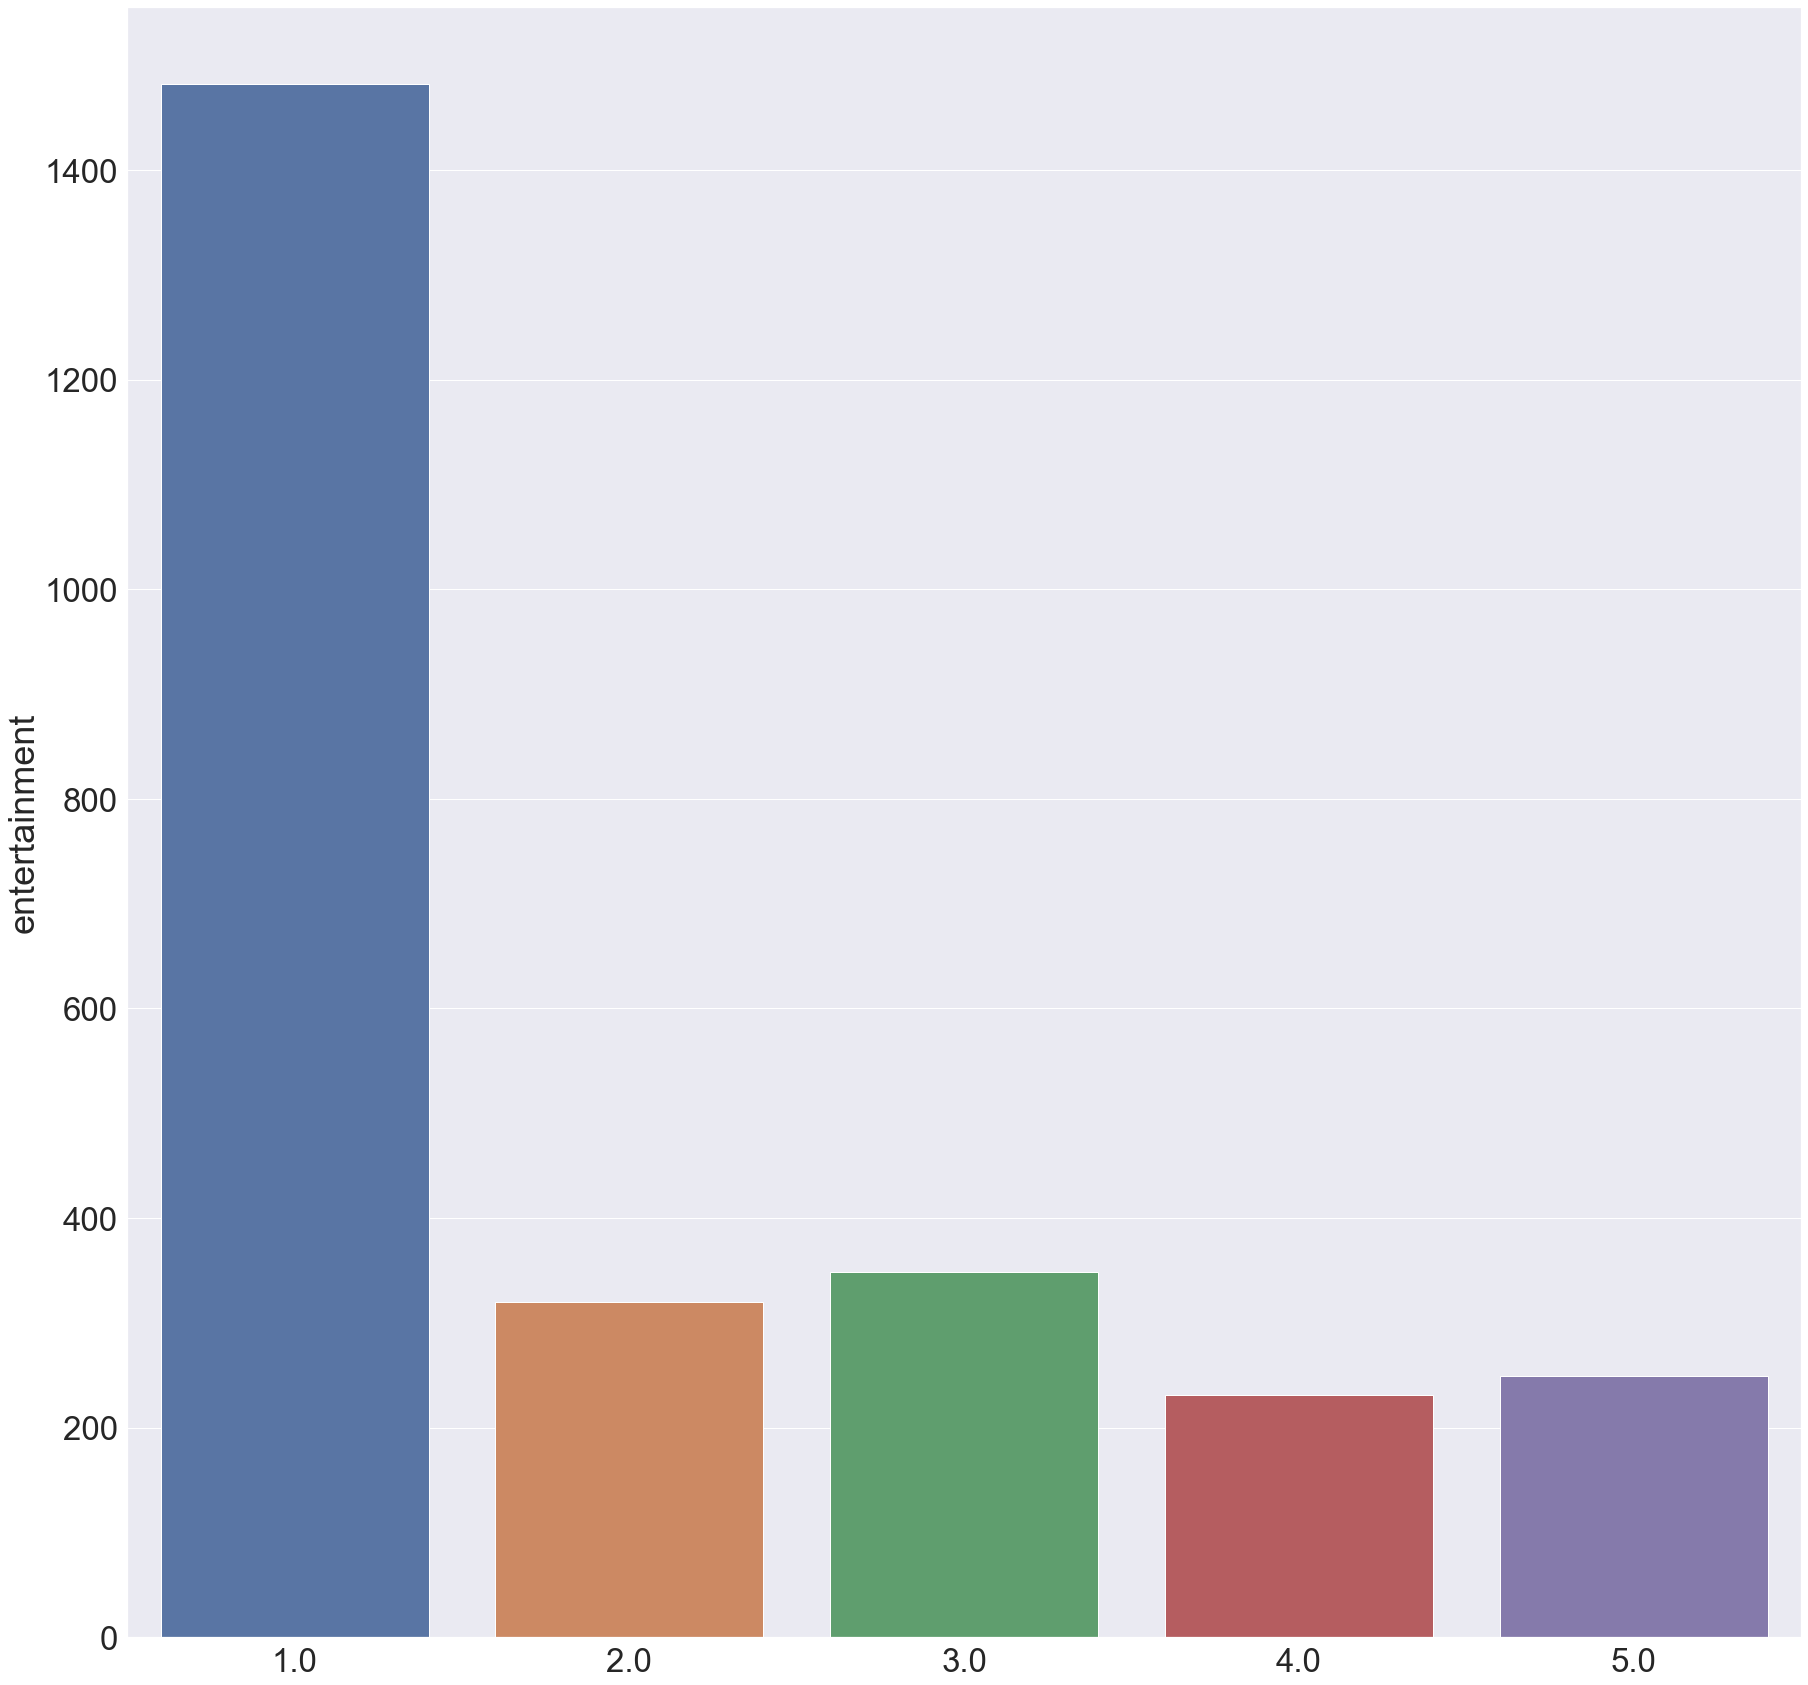

In [201]:
sns.barplot(df_American_Airlines.entertainment.value_counts().index,df_American_Airlines.entertainment.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='ground_service'>

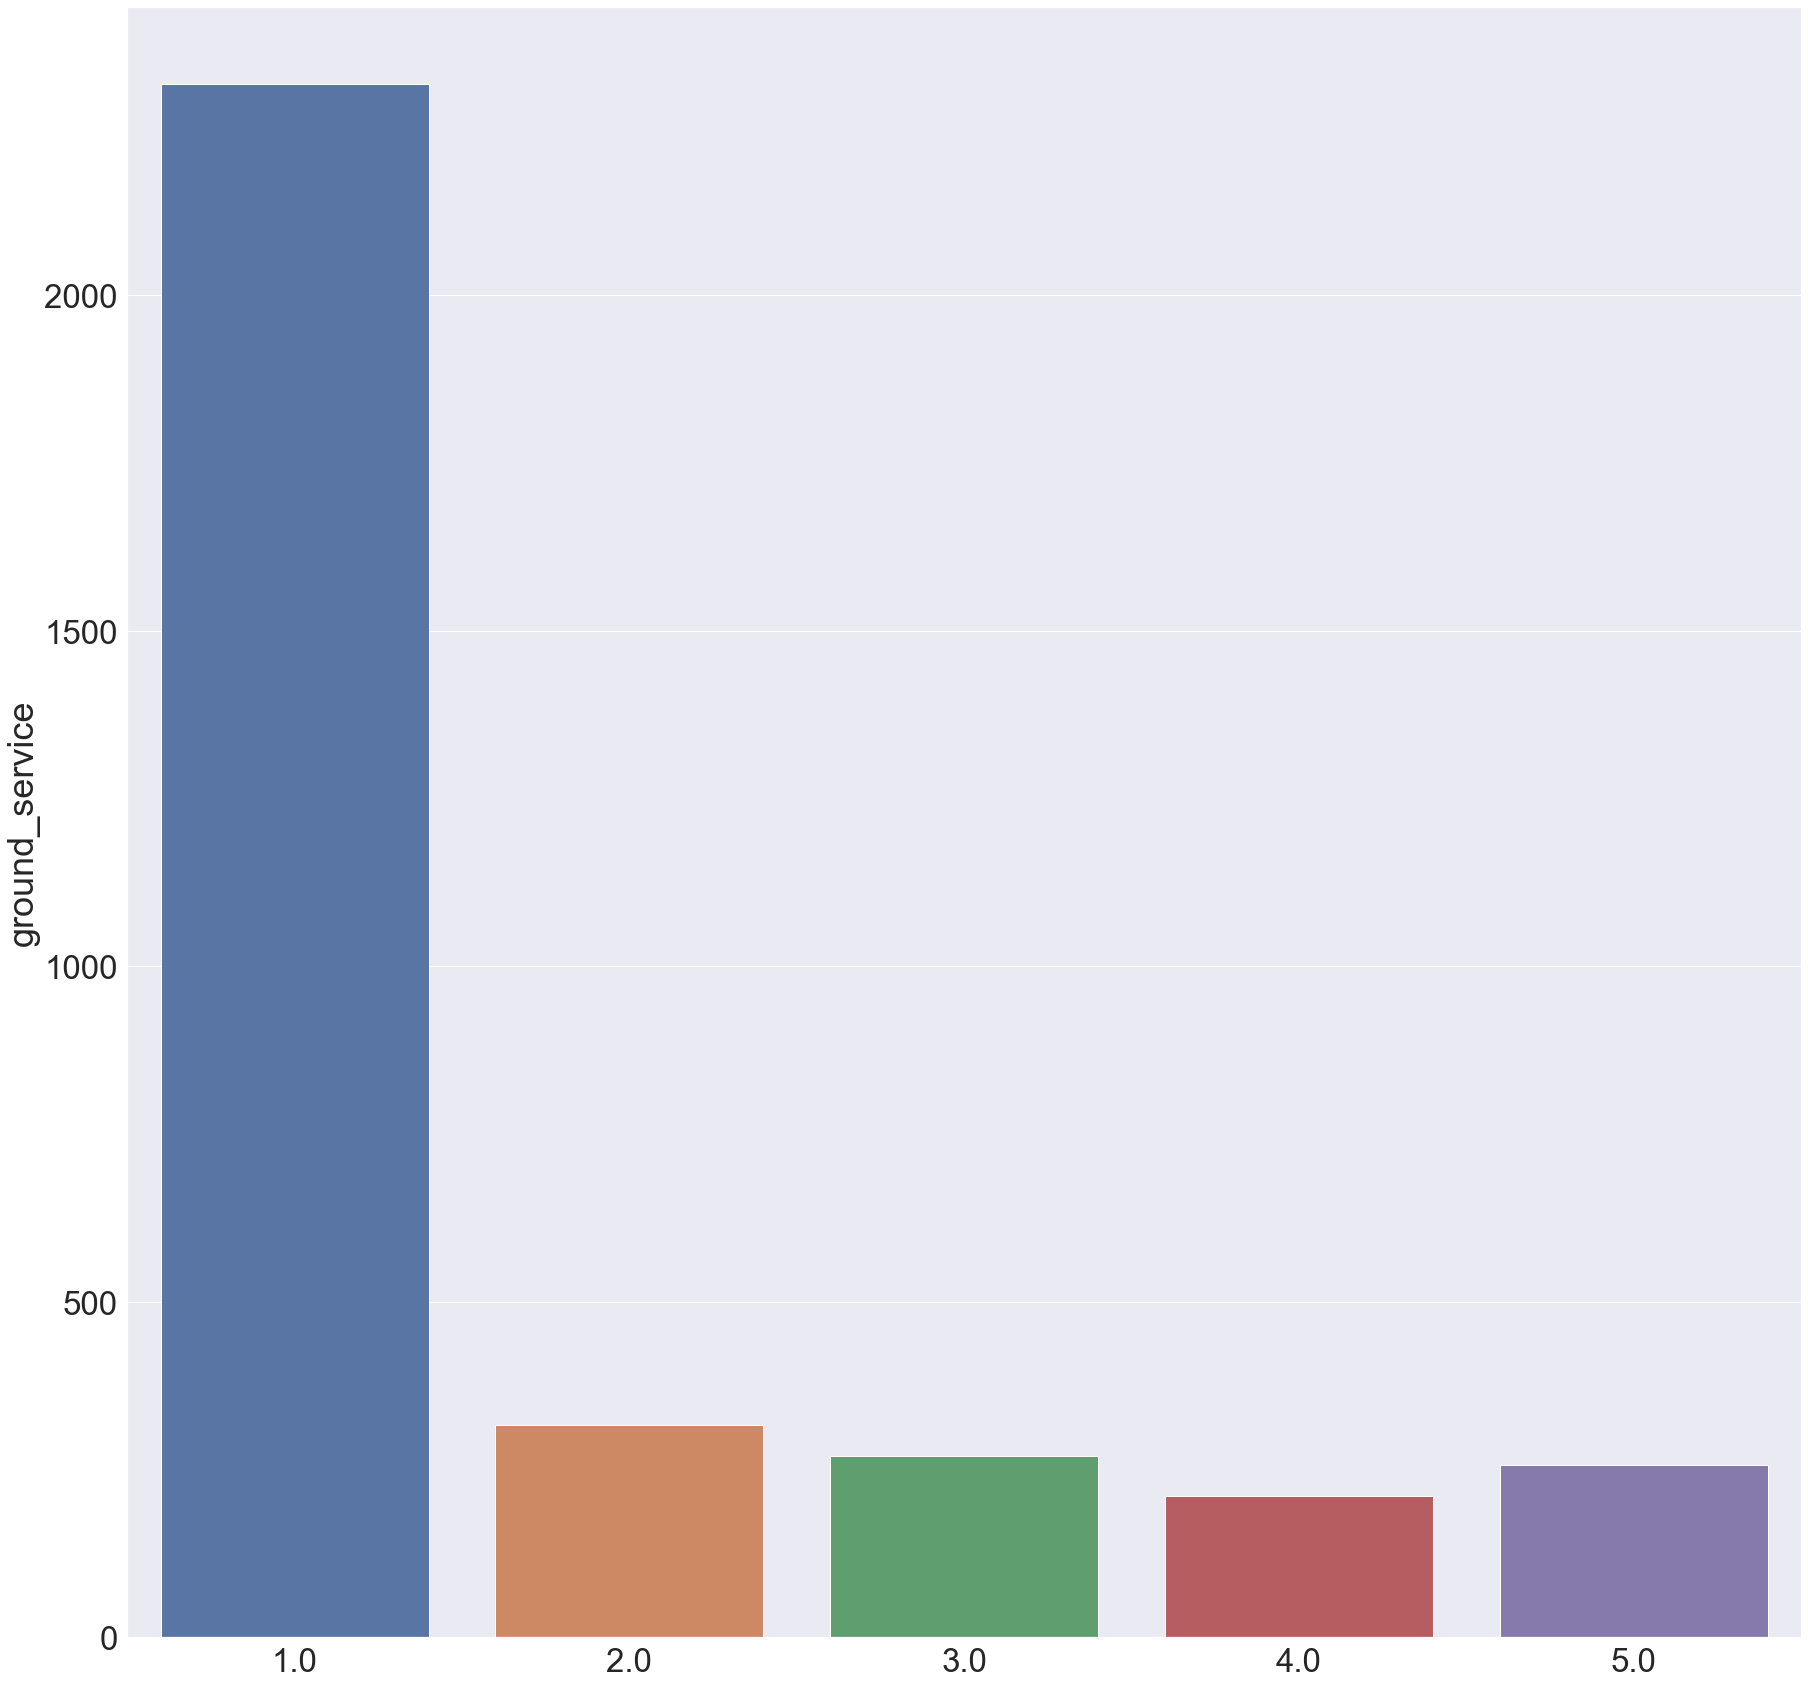

In [202]:
sns.barplot(df_American_Airlines.ground_service.value_counts().index,df_American_Airlines.ground_service.value_counts())

E:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='value_for_money'>

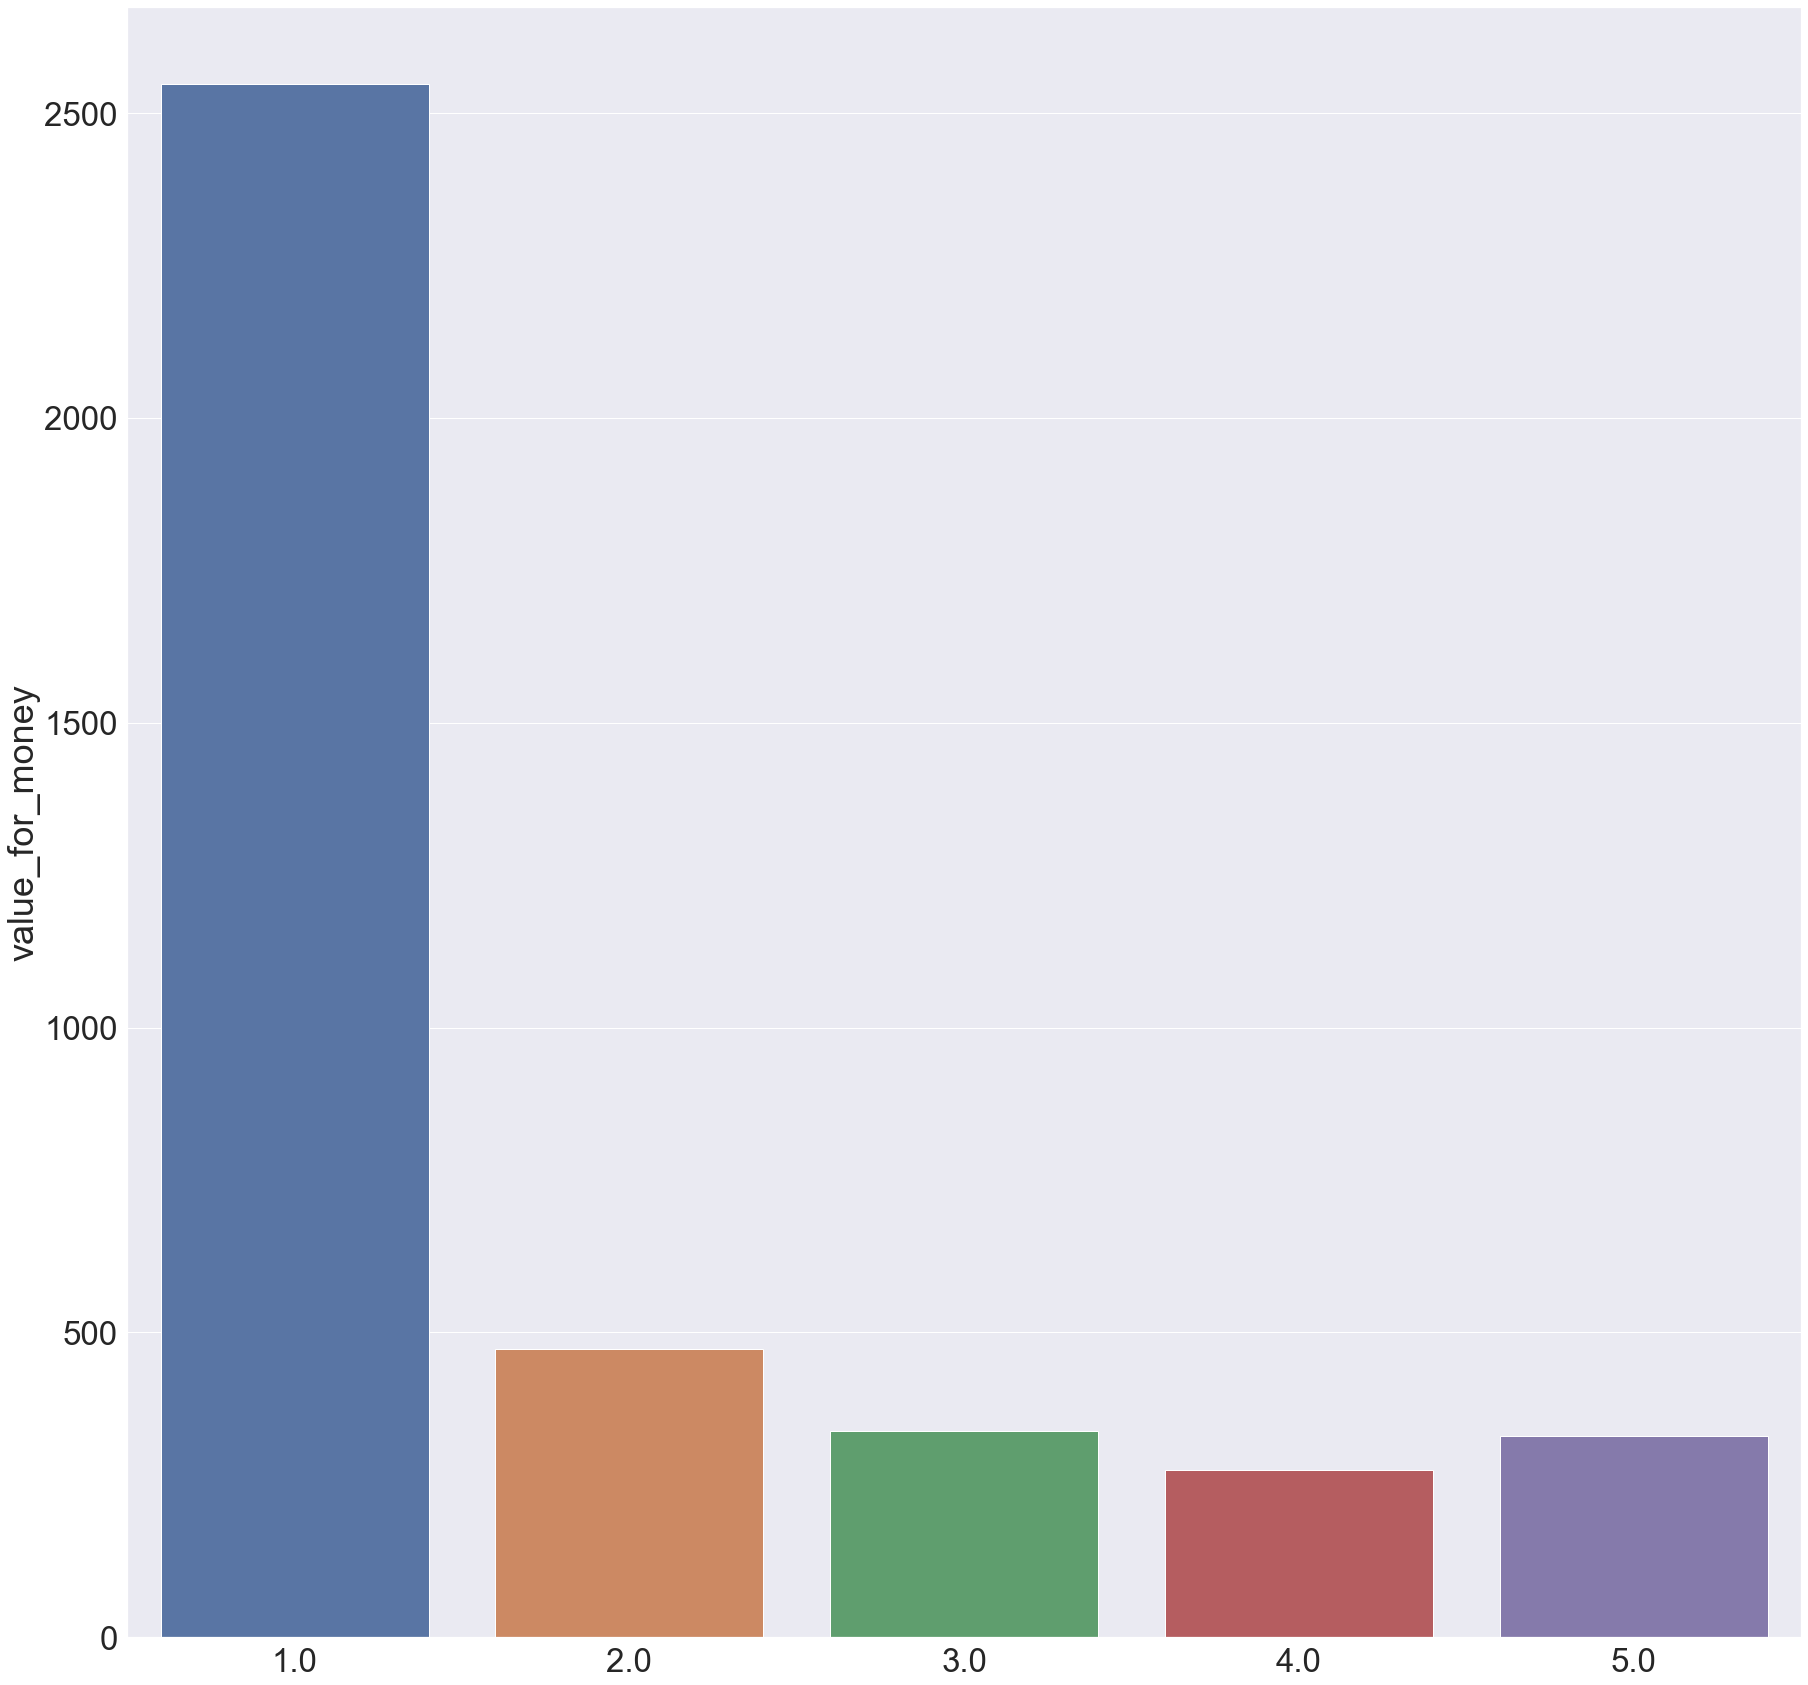

In [203]:
sns.barplot(df_American_Airlines.value_for_money.value_counts().index,df_American_Airlines.value_for_money.value_counts())

In [204]:
df_American_Airlines["flair_sentiment_score"] = df_American_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))

<ipython-input-204-bce2ea6c771a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_American_Airlines["flair_sentiment_score"] = df_American_Airlines.customer_review.apply(lambda x: sentiment_confidence(x))


In [205]:
df_American_Airlines["flair_sentiment_sentiment"] = df_American_Airlines.customer_review.apply(lambda x: sentiment_value(x))

<ipython-input-205-7f587c592b35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_American_Airlines["flair_sentiment_sentiment"] = df_American_Airlines.customer_review.apply(lambda x: sentiment_value(x))


In [206]:
df_American_Airlines.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,flair_sentiment_score,flair_sentiment_sentiment
7610,0,American Airlines,1.0,Tony DeBerry,28th May 2022,Not Verified | This airline has no regard for ...,NaN,Solo Leisure,Business Class,Miami to Cleveland,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no,0.999808,NEGATIVE
7611,1,American Airlines,1.0,Malori Parks,27th May 2022,"✅ Trip Verified | Terrible, terrible, terrible...",NaN,Solo Leisure,Economy Class,Dallas to Oklahoma City,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no,0.999996,NEGATIVE
7612,2,American Airlines,2.0,Sheri Bashaw,27th May 2022,✅ Trip Verified | I haven’t flown American Air...,NaN,Solo Leisure,Economy Class,Las Vegas to Tallahassee via Charlotte,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no,0.999933,NEGATIVE
7613,3,American Airlines,2.0,R Virmasan,26th May 2022,✅ Trip Verified | Flew on May 23/24 from Honol...,A321 neo / Boeing 777-200 / A320,Family Leisure,Economy Class,"Honolulu to Wichita via Los Angeles, Dallas",22-May,2.0,4.0,1.0,2.0,1.0,3.0,no,0.999742,NEGATIVE
7614,4,American Airlines,1.0,Darius Tambasco,26th May 2022,✅ Trip Verified | I was in line at DFW to boar...,Boeing 737,Business,Economy Class,Dallas Ft Worth to La Guardia,22-May,3.0,2.0,1.0,4.0,5.0,3.0,yes,0.999885,NEGATIVE


In [207]:
df_American_Airlines.describe()

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,flair_sentiment_score
count,3963.000000,3957.000000,3825.000000,3823.000000,2952.000000,2631.000000,3369.000000,3963.000000,3963.000000
mean,1981.000000,2.625727,2.133333,2.282762,2.028455,2.028886,1.746512,1.831188,0.990061
std,1144.163887,2.729955,1.304562,1.437275,1.280092,1.377964,1.280393,1.314124,0.049247
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.506764
25%,990.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999650
50%,1981.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.999959
75%,2971.500000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,0.999989
max,3962.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.999999


In [208]:
df_American_Airlines["recommended_new"] = df_American_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)

<ipython-input-208-784fdcd66026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_American_Airlines["recommended_new"] = df_American_Airlines["recommended"].apply(lambda x: 1 if x=="yes" else 0)


In [209]:
df_American_Airlines["flair_sentiment_sentiment_new"] = df_American_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)

<ipython-input-209-a8852d4dda91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_American_Airlines["flair_sentiment_sentiment_new"] = df_American_Airlines["flair_sentiment_sentiment"].apply(lambda x: 1 if x=="POSITIVE" else 0)


In [210]:
confusion_matrix(df_American_Airlines["flair_sentiment_sentiment_new"], df_American_Airlines["recommended_new"])

array([[3270,  220],
       [  27,  446]], dtype=int64)

In [211]:
df_American_Airlines["flair_sentiment_sentiment_new"].corr(df_American_Airlines["recommended_new"])

0.7629046975604579

## NLP - ngrams (American Airlines)

In [50]:
customer_review_corpus_American_Airlines = ""

for i,row in df_American_Airlines.iterrows():
    
    customer_review_corpus_American_Airlines += str(row["customer_review"])

In [51]:
customer_review_corpus_American_Airlines = re.sub(r'[^A-Za-z0-9 ]+', '', customer_review_corpus_American_Airlines.lower())

In [52]:
customer_review_corpus_American_Airlines = re.sub('[,\.!?â€™]', '', customer_review_corpus_American_Airlines.lower())
customer_review_corpus_word_tokens_American_Airlines = word_tokenize(customer_review_corpus_American_Airlines)
filtered_customer_review_corpus_word_tokens_American_Airlines = [w for w in customer_review_corpus_word_tokens_American_Airlines if not w.lower() in stop_words]
filtered_customer_review_corpus_word_tokens_string_American_Airlines = " ".join(filtered_customer_review_corpus_word_tokens_American_Airlines)
filtered_customer_review_corpus_word_tokens_string_American_Airlines = re.sub('[!()-;[]{}:\,<>./?@#$%^&*_~]', '', filtered_customer_review_corpus_word_tokens_string_American_Airlines)
filtered_customer_review_corpus_word_tokens_string_American_Airlines = re.sub('":()', '', filtered_customer_review_corpus_word_tokens_string_American_Airlines)
filtered_customer_review_corpus_word_tokens_string_American_Airlines = re.sub("'", '', filtered_customer_review_corpus_word_tokens_string_American_Airlines)
filtered_customer_review_corpus_word_tokens_string_American_Airlines = re.sub("[:()<>]", '', filtered_customer_review_corpus_word_tokens_string_American_Airlines)
filtered_customer_review_corpus_word_tokens_string_American_Airlines = " ".join(lemma.lemmatize(word) for word in filtered_customer_review_corpus_word_tokens_string_American_Airlines.split())

In [53]:
unigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_American_Airlines):
    unigrams_dye[word] += 1
df_unigrams = pd.DataFrame(sorted(unigrams_dye.items(), key=lambda x: x[1])[::-1])
bigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_American_Airlines, n_gram=2):
    bigrams_dye[word] += 1
df_bigrams = pd.DataFrame(sorted(bigrams_dye.items(), key=lambda x: x[1])[::-1])
trigrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_American_Airlines, n_gram=3):
    trigrams_dye[word] += 1
df_trigrams = pd.DataFrame(sorted(trigrams_dye.items(), key=lambda x: x[1])[::-1])
fourgrams_dye = defaultdict(int)
for word in generate_ngrams(filtered_customer_review_corpus_word_tokens_string_American_Airlines, n_gram=4):
    fourgrams_dye[word] += 1
df_fourgrams = pd.DataFrame(sorted(fourgrams_dye.items(), key=lambda x: x[1])[::-1])

<AxesSubplot:>

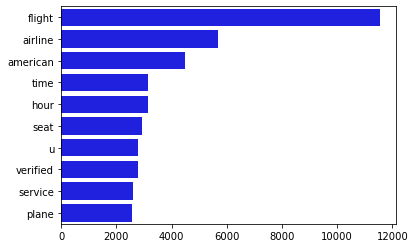

In [54]:
sns.barplot(y=df_unigrams[0].values[:N], x=df_unigrams[1].values[:N], color='blue')

<AxesSubplot:>

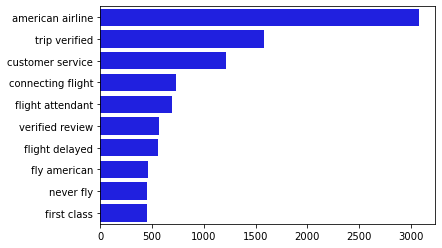

In [55]:
sns.barplot(y=df_bigrams[0].values[:N], x=df_bigrams[1].values[:N], color='blue')

<AxesSubplot:>

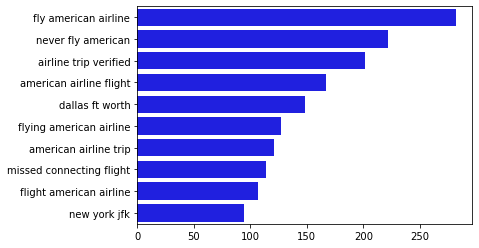

In [56]:
sns.barplot(y=df_trigrams[0].values[0:N], x=df_trigrams[1].values[0:N], color='blue')

<AxesSubplot:>

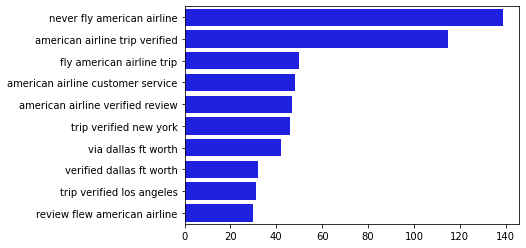

In [57]:
sns.barplot(y=df_fourgrams[0].values[0:N], x=df_fourgrams[1].values[0:N], color='blue')

In [ ]:
# df_American_Airlines